***
# Supervised Learning : Leveraging Ensemble Learning With Bagging, Boosting, Stacking and Blending Approaches

***
### [**John Pauline Pineda**](https://github.com/JohnPaulinePineda) <br> <br> *March 12, 2025*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Splitting](#1.4.1)
        * [1.4.2 Data Profiling](#1.4.2)
        * [1.4.3 Category Aggregation and Encoding](#1.4.3)
        * [1.4.4 Outlier and Distributional Shape Analysis](#1.4.4)
        * [1.4.5 Collinearity](#1.4.5)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Premodelling Data Preparation](#1.6)
        * [1.6.1 Preprocessed Data Description](#1.6.1)
        * [1.6.2 Preprocessing Pipeline Development](#1.6.2)
    * [1.7 Bagged Model Development](#1.7)
        * [1.7.1 Random Forest](#1.7.1)
        * [1.7.2 Extra Trees](#1.7.2)
        * [1.7.3 Bagged Decision Trees](#1.7.3)
        * [1.7.4 Bagged Logistic Regression](#1.7.4)
        * [1.7.5 Bagged Support Vector Machine](#1.7.5)
    * [1.8 Boosted Model Development](#1.8)
        * [1.8.1 AdaBoost](#1.8.1)
        * [1.8.2 Gradient Boosting](#1.8.2)
        * [1.8.3 XGBoost](#1.8.3)
        * [1.8.4 Light GBM](#1.8.4)
        * [1.8.5 CatBoost](#1.8.5)
    * [1.9 Stacked Model Development](#1.9)
        * [1.9.1 Base Learner - K-Nearest Neighbors](#1.9.1)
        * [1.9.2 Base Learner - Support Vector Machine](#1.9.2)
        * [1.9.3 Base Learner - Ridge Classifier](#1.9.3)
        * [1.9.4 Base Learner - Neural Network](#1.9.4)
        * [1.9.5 Base Learner - Decision Tree](#1.9.5)
        * [1.9.6 Meta Learner - Logistic Regression](#1.9.6)
    * [1.10 Blended Model Development](#1.10)
        * [1.10.1 Base Learner - K-Nearest Neighbors](#1.10.1)
        * [1.10.2 Base Learner - Support Vector Machine](#1.10.2)
        * [1.10.3 Base Learner - Ridge Classifier](#1.10.3)
        * [1.10.4 Base Learner - Neural Network](#1.10.4)
        * [1.10.5 Base Learner - Decision Tree](#1.10.5)
        * [1.10.6 Meta Learner - Logistic Regression](#1.10.6)
    * [1.11 Consolidated Findings](#1.11)
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***


# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project explores different **Ensemble Learning** approaches which combine the predictions from multiple models in an effort to achieve better predictive performance using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. The ensemble frameworks applied in the analysis were grouped into three classes including the **Bagging Approach** which fits many individual learners on different samples of the same dataset and averages the predictions; **Boosting Approach** which adds ensemble members sequentially that correct the predictions made by prior models and outputs a weighted average of the predictions;  and **Stacking or Blending Approach** which consolidates many different and diverse learners on the same data and uses another model to learn how to best combine the predictions. Bagged models applied were the **Random Forest**, **Extra Trees**, **Bagged Decision Tree**, **Bagged Logistic Regression** and **Bagged Support Vector Machine** algorithms. Boosting models included the **AdaBoost**, **Stochastic Gradient Boosting**, **Extreme Gradient Boosting**, **Light Gradient Boosting Machines** and **CatBoost** algorithms.  Individual base learners including the **K-Nearest Neighbors**, **Support Vector Machine**, **Ridge Classifier**, **Neural Network** and **Decision Tree** algorithms were stacked or blended together as contributors to the **Logistic Regression** meta-model. The resulting predictions derived from all ensemble learning models were independtly evaluated on a test set based on accuracy and F1 score metrics. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document. 

[Ensemble Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) is a machine learning technique that improves predictive accuracy by combining multiple models to leverage their collective strengths. Traditional machine learning models often struggle with either high bias, which leads to overly simplistic predictions, or high variance, which makes them too sensitive to fluctuations in the data. Ensemble learning addresses these challenges by aggregating the outputs of several models, creating a more robust and reliable predictor. In classification problems, this can be done through majority voting, weighted averaging, or more advanced meta-learning techniques. The key advantage of ensemble learning is its ability to reduce both bias and variance, leading to better generalization on unseen data. However, this comes at the cost of increased computational complexity and interpretability, as managing multiple models requires more resources and makes it harder to explain predictions.

[Bagging (Bootstrap Aggregating)](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble learning technique that reduces model variance by training multiple instances of the same algorithm on different randomly sampled subsets of the training data. The fundamental problem bagging aims to solve is overfitting, particularly in high-variance models. By generating multiple bootstrap samples—random subsets created through sampling with replacement — bagging ensures that each model is trained on slightly different data, making the overall prediction more stable. In classification problems, the final output is obtained by majority voting among the individual models, while in regression, their predictions are averaged. Bagging is particularly effective when dealing with noisy datasets, as it smooths out individual model errors. However, its effectiveness is limited for low-variance models, and the requirement to train multiple models increases computational cost.

[Boosting](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble learning method that builds a strong classifier by training models sequentially, where each new model focuses on correcting the mistakes of its predecessors. Boosting assigns higher weights to misclassified instances, ensuring that subsequent models pay more attention to these hard-to-classify cases. The motivation behind boosting is to reduce both bias and variance by iteratively refining weak learners — models that perform only slightly better than random guessing — until they collectively form a strong classifier. In classification tasks, predictions are refined by combining weighted outputs of multiple weak models, typically decision stumps or shallow trees. This makes boosting highly effective in uncovering complex patterns in data. However, the sequential nature of boosting makes it computationally expensive compared to bagging, and it is more prone to overfitting if the number of weak learners is too high.

[Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning), or stacked generalization, is an advanced ensemble method that improves predictive performance by training a meta-model to learn the optimal way to combine multiple base models using their out-of-fold predictions. Unlike traditional ensemble techniques such as bagging and boosting, which aggregate predictions through simple rules like averaging or majority voting, stacking introduces a second-level model that intelligently learns how to integrate diverse base models. The process starts by training multiple classifiers on the training dataset. However, instead of directly using their predictions, stacking employs k-fold cross-validation to generate out-of-fold predictions. Specifically, each base model is trained on a subset of the training data while leaving out a validation fold, and predictions on that unseen fold are recorded. This process is repeated across all folds, ensuring that each instance in the training data receives predictions from models that never saw it during training. These out-of-fold predictions are then used as input features for a meta-model, which learns the best way to combine them into a final decision. The advantage of stacking is that it allows different models to complement each other, capturing diverse aspects of the data that a single model might miss. This often results in superior classification accuracy compared to individual models or simpler ensemble approaches. However, stacking is computationally expensive, requiring multiple training iterations for base models and the additional meta-model. It also demands careful tuning to prevent overfitting, as the meta-model’s complexity can introduce new sources of error. Despite these challenges, stacking remains a powerful technique in applications where maximizing predictive performance is a priority.

[Blending](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble technique that enhances classification accuracy by training a meta-model on a holdout validation set, rather than using out-of-fold predictions like stacking. This simplifies implementation while maintaining the benefits of combining multiple base models. The process of blending starts by training base models on the full training dataset. Instead of applying cross-validation to obtain out-of-fold predictions, blending reserves a small portion of the training data as a holdout set. The base models make predictions on this unseen holdout set, and these predictions are then used as input features for a meta-model, which learns how to optimally combine them into a final classification decision. Since the meta-model is trained on predictions from unseen data, it avoids the risk of overfitting that can sometimes occur when base models are evaluated on the same data they were trained on. Blending is motivated by its simplicity and ease of implementation compared to stacking, as it eliminates the need for repeated k-fold cross-validation to generate training data for the meta-model. However, one drawback is that the meta-model has access to fewer training examples, as a portion of the data is withheld for validation rather than being used for training. This can limit the generalization ability of the final model, especially if the holdout set is too small. Despite this limitation, blending remains a useful approach in applications where a quick and effective ensemble method is needed without the computational overhead of stacking.


## 1.1. Data Background <a class="anchor" id="1.1"></a>

An open [Thyroid Disease Dataset](https://www.kaggle.com/datasets/jainaru/thyroid-disease-data/data) from [Kaggle](https://www.kaggle.com/) (with all credits attributed to [Jai Naru](https://www.kaggle.com/jainaru) and [Abuchi Onwuegbusi](https://www.kaggle.com/datasets/abuchionwuegbusi/thyroid-cancer-recurrence-prediction/data)) was used for the analysis as consolidated from the following primary sources: 
1. Reference Repository entitled **Differentiated Thyroid Cancer Recurrence** from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence)
2. Research Paper entitled **Machine Learning for Risk Stratification of Thyroid Cancer Patients: a 15-year Cohort Study** from the [European Archives of Oto-Rhino-Laryngology](https://link.springer.com/article/10.1007/s00405-023-08299-w)

This study hypothesized that the various clinicopathological characteristics influence differentiated thyroid cancer recurrence between patients.

The dichotomous categorical variable for the study is:
* <span style="color: #FF0000">Recurred</span> - Status of the patient (Yes, Recurrence of differentiated thyroid cancer | No, No recurrence of differentiated thyroid cancer)

The predictor variables for the study are:
* <span style="color: #FF0000">Age</span> - Patient's age (Years)
* <span style="color: #FF0000">Gender</span> - Patient's sex (M | F)
* <span style="color: #FF0000">Smoking</span> - Indication of smoking (Yes | No)
* <span style="color: #FF0000">Hx Smoking</span> - Indication of smoking history (Yes | No)
* <span style="color: #FF0000">Hx Radiotherapy</span> - Indication of radiotherapy history for any condition (Yes | No)
* <span style="color: #FF0000">Thyroid Function</span> - Status of thyroid function (Clinical Hyperthyroidism, Hypothyroidism | Subclinical Hyperthyroidism, Hypothyroidism | Euthyroid)
* <span style="color: #FF0000">Physical Examination</span> - Findings from physical examination including palpation of the thyroid gland and surrounding structures (Normal | Diffuse Goiter | Multinodular Goiter | Single Nodular Goiter Left, Right)
* <span style="color: #FF0000">Adenopathy</span> - Indication of enlarged lymph nodes in the neck region (No | Right | Extensive | Left | Bilateral | Posterior)
* <span style="color: #FF0000">Pathology</span> - Specific thyroid cancer type as determined by pathology examination of biopsy samples (Follicular | Hurthel Cell | Micropapillary | Papillary)
* <span style="color: #FF0000">Focality</span> - Indication if the cancer is limited to one location or present in multiple locations (Uni-Focal | Multi-Focal)
* <span style="color: #FF0000">Risk</span> - Risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type (Low | Intermediate | High)
* <span style="color: #FF0000">T</span> - Tumor classification based on its size and extent of invasion into nearby structures (T1a | T1b | T2 | T3a | T3b | T4a | T4b)
* <span style="color: #FF0000">N</span> - Nodal classification indicating the involvement of lymph nodes (N0 | N1a | N1b)
* <span style="color: #FF0000">M</span> - Metastasis classification indicating the presence or absence of distant metastases (M0 | M1)
* <span style="color: #FF0000">Stage</span> - Overall stage of the cancer, typically determined by combining T, N, and M classifications (I | II | III | IVa | IVb)
* <span style="color: #FF0000">Response</span> - Cancer's response to treatment (Biochemical Incomplete | Indeterminate | Excellent | Structural Incomplete)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The initial tabular dataset was comprised of 383 observations and 17 variables (including 1 target and 16 predictors).
    * **383 rows** (observations)
    * **17 columns** (variables)
        * **1/17 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/17 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **16/17 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Hx_Smoking</span>
             * <span style="color: #FF0000">Hx_Radiotherapy</span>
             * <span style="color: #FF0000">Thyroid_Function</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Pathology</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">N</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>
            																

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import itertools
import os
import pickle
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from scipy import stats
from scipy.stats import pointbiserialr, chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold, KFold, cross_val_score
from sklearn.inspection import permutation_importance


In [2]:
##################################
# Defining file paths
##################################
DATASETS_ORIGINAL_PATH = r"datasets\original"
DATASETS_FINAL_PATH = r"datasets\final\complete"
DATASETS_FINAL_TRAIN_PATH = r"datasets\final\train"
DATASETS_FINAL_TRAIN_FEATURES_PATH = r"datasets\final\train\features"
DATASETS_FINAL_TRAIN_TARGET_PATH = r"datasets\final\train\target"
DATASETS_FINAL_VALIDATION_PATH = r"datasets\final\validation"
DATASETS_FINAL_VALIDATION_FEATURES_PATH = r"datasets\final\validation\features"
DATASETS_FINAL_VALIDATION_TARGET_PATH = r"datasets\final\validation\target"
DATASETS_FINAL_TEST_PATH = r"datasets\final\test"
DATASETS_FINAL_TEST_FEATURES_PATH = r"datasets\final\test\features"
DATASETS_FINAL_TEST_TARGET_PATH = r"datasets\final\test\target"
DATASETS_PREPROCESSED_PATH = r"datasets\preprocessed"
DATASETS_PREPROCESSED_TRAIN_PATH = r"datasets\preprocessed\train"
DATASETS_PREPROCESSED_TRAIN_FEATURES_PATH = r"datasets\preprocessed\train\features"
DATASETS_PREPROCESSED_TRAIN_TARGET_PATH = r"datasets\preprocessed\train\target"
DATASETS_PREPROCESSED_VALIDATION_PATH = r"datasets\preprocessed\validation"
DATASETS_PREPROCESSED_VALIDATION_FEATURES_PATH = r"datasets\preprocessed\validation\features"
DATASETS_PREPROCESSED_VALIDATION_TARGET_PATH = r"datasets\preprocessed\validation\target"
DATASETS_PREPROCESSED_TEST_PATH = r"datasets\preprocessed\test"
DATASETS_PREPROCESSED_TEST_FEATURES_PATH = r"datasets\preprocessed\test\features"
DATASETS_PREPROCESSED_TEST_TARGET_PATH = r"datasets\preprocessed\test\target"
MODELS_PATH = r"models"


In [3]:
##################################
# Loading the dataset
# from the DATASETS_ORIGINAL_PATH
##################################
thyroid_cancer = pd.read_csv(os.path.join("..", DATASETS_ORIGINAL_PATH, "Thyroid_Diff.csv"))


In [4]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(thyroid_cancer.shape)


Dataset Dimensions: 


(383, 17)

In [5]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(thyroid_cancer.dtypes)


Column Names and Data Types:


Age                      int64
Gender                  object
Smoking                 object
Hx Smoking              object
Hx Radiotherapy         object
Thyroid Function        object
Physical Examination    object
Adenopathy              object
Pathology               object
Focality                object
Risk                    object
T                       object
N                       object
M                       object
Stage                   object
Response                object
Recurred                object
dtype: object

In [6]:
##################################
# Renaming and standardizing the column names
# to replace blanks with undercores
##################################
thyroid_cancer.columns = thyroid_cancer.columns.str.replace(" ", "_")


In [7]:
##################################
# Taking a snapshot of the dataset
##################################
thyroid_cancer.head()


Age Gender Smoking Hx_Smoking Hx_Radiotherapy Thyroid_Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical_Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0     I      Excellent       No  
2  T1a  N0  M0     I      Excellent       No  
3  T1a  N0  M0     I      Excellent       No  
4  T1a  N0  M0     I      Excellent       No

In [8]:
##################################
# Selecting categorical columns (both object and categorical types)
# and listing the unique categorical levels
##################################
cat_cols = thyroid_cancer.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    print(f"Categorical | Object Column: {col}")
    print(thyroid_cancer[col].unique())  
    print("-" * 40)
    

Categorical | Object Column: Gender
['F' 'M']
----------------------------------------
Categorical | Object Column: Smoking
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Hx_Smoking
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Hx_Radiotherapy
['No' 'Yes']
----------------------------------------
Categorical | Object Column: Thyroid_Function
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
----------------------------------------
Categorical | Object Column: Physical_Examination
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
----------------------------------------
Categorical | Object Column: Adenopathy
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
----------------------------------------
Categorical | Object Column: Pathology
['Micropapillary' 'Papillary' 'Folli

In [9]:
##################################
# Correcting a category level
##################################
thyroid_cancer["Pathology"] = thyroid_cancer["Pathology"].replace("Hurthel cell", "Hurthle Cell")


In [10]:
##################################
# Setting the levels of the categorical variables
##################################
thyroid_cancer['Recurred'] = thyroid_cancer['Recurred'].astype('category')
thyroid_cancer['Recurred'] = thyroid_cancer['Recurred'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Gender'] = thyroid_cancer['Gender'].astype('category')
thyroid_cancer['Gender'] = thyroid_cancer['Gender'].cat.set_categories(['M', 'F'], ordered=True)
thyroid_cancer['Smoking'] = thyroid_cancer['Smoking'].astype('category')
thyroid_cancer['Smoking'] = thyroid_cancer['Smoking'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Hx_Smoking'] = thyroid_cancer['Hx_Smoking'].astype('category')
thyroid_cancer['Hx_Smoking'] = thyroid_cancer['Hx_Smoking'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Hx_Radiotherapy'] = thyroid_cancer['Hx_Radiotherapy'].astype('category')
thyroid_cancer['Hx_Radiotherapy'] = thyroid_cancer['Hx_Radiotherapy'].cat.set_categories(['No', 'Yes'], ordered=True)
thyroid_cancer['Thyroid_Function'] = thyroid_cancer['Thyroid_Function'].astype('category')
thyroid_cancer['Thyroid_Function'] = thyroid_cancer['Thyroid_Function'].cat.set_categories(['Euthyroid', 'Subclinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Clinical Hyperthyroidism'], ordered=True)
thyroid_cancer['Physical_Examination'] = thyroid_cancer['Physical_Examination'].astype('category')
thyroid_cancer['Physical_Examination'] = thyroid_cancer['Physical_Examination'].cat.set_categories(['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right', 'Multinodular goiter', 'Diffuse goiter'], ordered=True)
thyroid_cancer['Adenopathy'] = thyroid_cancer['Adenopathy'].astype('category')
thyroid_cancer['Adenopathy'] = thyroid_cancer['Adenopathy'].cat.set_categories(['No', 'Left', 'Right', 'Bilateral', 'Posterior', 'Extensive'], ordered=True)
thyroid_cancer['Pathology'] = thyroid_cancer['Pathology'].astype('category')
thyroid_cancer['Pathology'] = thyroid_cancer['Pathology'].cat.set_categories(['Hurthle Cell', 'Follicular', 'Micropapillary', 'Papillary'], ordered=True)
thyroid_cancer['Focality'] = thyroid_cancer['Focality'].astype('category')
thyroid_cancer['Focality'] = thyroid_cancer['Focality'].cat.set_categories(['Uni-Focal', 'Multi-Focal'], ordered=True)
thyroid_cancer['Risk'] = thyroid_cancer['Risk'].astype('category')
thyroid_cancer['Risk'] = thyroid_cancer['Risk'].cat.set_categories(['Low', 'Intermediate', 'High'], ordered=True)
thyroid_cancer['T'] = thyroid_cancer['T'].astype('category')
thyroid_cancer['T'] = thyroid_cancer['T'].cat.set_categories(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], ordered=True)
thyroid_cancer['N'] = thyroid_cancer['N'].astype('category')
thyroid_cancer['N'] = thyroid_cancer['N'].cat.set_categories(['N0', 'N1a', 'N1b'], ordered=True)
thyroid_cancer['M'] = thyroid_cancer['M'].astype('category')
thyroid_cancer['M'] = thyroid_cancer['M'].cat.set_categories(['M0', 'M1'], ordered=True)
thyroid_cancer['Stage'] = thyroid_cancer['Stage'].astype('category')
thyroid_cancer['Stage'] = thyroid_cancer['Stage'].cat.set_categories(['I', 'II', 'III', 'IVA', 'IVB'], ordered=True)
thyroid_cancer['Response'] = thyroid_cancer['Response'].astype('category')
thyroid_cancer['Response'] = thyroid_cancer['Response'].cat.set_categories(['Excellent', 'Structural Incomplete', 'Biochemical Incomplete', 'Indeterminate'], ordered=True)


In [11]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(thyroid_cancer.describe(include='number').transpose())


Numeric Variable Summary:


count       mean        std   min   25%   50%   75%   max
Age  383.0  40.866841  15.134494  15.0  29.0  37.0  51.0  82.0

In [12]:
##################################
# Performing a general exploration of the categorical variables
##################################
print('Categorical Variable Summary:')
display(thyroid_cancer.describe(include='category').transpose())


Categorical Variable Summary:


count unique                          top freq
Gender                 383      2                            F  312
Smoking                383      2                           No  334
Hx_Smoking             383      2                           No  355
Hx_Radiotherapy        383      2                           No  376
Thyroid_Function       383      5                    Euthyroid  332
Physical_Examination   383      5  Single nodular goiter-right  140
Adenopathy             383      6                           No  277
Pathology              383      4                    Papillary  287
Focality               383      2                    Uni-Focal  247
Risk                   383      3                          Low  249
T                      383      7                           T2  151
N                      383      3                           N0  268
M                      383      2                           M0  365
Stage                  383      5                            I  333
Response               383      4                    Excellent  208
Recurred               383      2                           No  275

In [13]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer[col].value_counts().reindex(thyroid_cancer[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer[col].value_counts(normalize=True).reindex(thyroid_cancer[col].cat.categories))
    print("-" * 50)
   

Column: Gender
Absolute Frequencies:
M     71
F    312
Name: count, dtype: int64

Normalized Frequencies:
M    0.185379
F    0.814621
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     334
Yes     49
Name: count, dtype: int64

Normalized Frequencies:
No     0.872063
Yes    0.127937
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Smoking
Absolute Frequencies:
No     355
Yes     28
Name: count, dtype: int64

Normalized Frequencies:
No     0.926893
Yes    0.073107
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Radiotherapy
Absolute Frequencies:
No     376
Yes      7
Name: count, dtype: int64

Normalized Frequencies:
No     0.981723
Yes    0.018277
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                      332
Subclini

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. A total of 19 duplicated rows were identified.
    * In total, 34 observations were affected, consisting of 16 unique occurrences and 19 subsequent duplicates.
    * These 19 duplicates spanned 16 distinct variations, meaning some variations had multiple duplicates.
    * To clean the dataset, all 19 duplicate rows were removed, retaining only the first occurrence of each of the 16 unique variations.
2. No missing data noted for any variable with Null.Count>0 and Fill.Rate<1.0.
3. Low variance observed for 8 variables with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">Hx_Radiotherapy</span>: First.Second.Mode.Ratio = 51.000 (comprised 2 category levels)
    * <span style="color: #FF0000">M</span>: First.Second.Mode.Ratio = 19.222 (comprised 2 category levels)
    * <span style="color: #FF0000">Thyroid_Function</span>: First.Second.Mode.Ratio = 15.650 (comprised 5 category levels)
    * <span style="color: #FF0000">Hx_Smoking</span>: First.Second.Mode.Ratio = 12.000 (comprised 2 category levels)
    * <span style="color: #FF0000">Stage</span>: First.Second.Mode.Ratio = 9.812 (comprised 5 category levels)
    * <span style="color: #FF0000">Smoking</span>: First.Second.Mode.Ratio = 6.428 (comprised 2 category levels)
    * <span style="color: #FF0000">Pathology</span>: First.Second.Mode.Ratio = 6.022 (comprised 4 category levels)
    * <span style="color: #FF0000">Adenopathy</span>: First.Second.Mode.Ratio = 5.375 (comprised 5 category levels)
4. No low variance observed for any variable with Unique.Count.Ratio>10.
5. No high skewness observed for any variable with Skewness>3 or Skewness<(-3).


In [14]:
##################################
# Counting the number of duplicated rows
##################################
thyroid_cancer.duplicated().sum()


19

In [15]:
##################################
# Exploring the duplicated rows
##################################
duplicated_rows = thyroid_cancer[thyroid_cancer.duplicated(keep=False)]
display(duplicated_rows)


Age Gender Smoking Hx_Smoking Hx_Radiotherapy Thyroid_Function  \
8     51      F      No         No              No        Euthyroid   
9     40      F      No         No              No        Euthyroid   
22    36      F      No         No              No        Euthyroid   
32    36      F      No         No              No        Euthyroid   
38    40      F      No         No              No        Euthyroid   
40    51      F      No         No              No        Euthyroid   
61    35      F      No         No              No        Euthyroid   
66    35      F      No         No              No        Euthyroid   
67    51      F      No         No              No        Euthyroid   
69    51      F      No         No              No        Euthyroid   
73    29      F      No         No              No        Euthyroid   
77    29      F      No         No              No        Euthyroid   
106   26      F      No         No              No        Euthyroid   
110   31      F      No         No              No        Euthyroid   
113   32      F      No         No              No        Euthyroid   
115   37      F      No         No              No        Euthyroid   
119   28      F      No         No              No        Euthyroid   
120   37      F      No         No              No        Euthyroid   
121   26      F      No         No              No        Euthyroid   
123   28      F      No         No              No        Euthyroid   
132   32      F      No         No              No        Euthyroid   
136   21      F      No         No              No        Euthyroid   
137   32      F      No         No              No        Euthyroid   
138   26      F      No         No              No        Euthyroid   
142   42      F      No         No              No        Euthyroid   
161   22      F      No         No              No        Euthyroid   
166   31      F      No         No              No        Euthyroid   
168   21      F      No         No              No        Euthyroid   
170   38      F      No         No              No        Euthyroid   
175   34      F      No         No              No        Euthyroid   
178   38      F      No         No              No        Euthyroid   
183   26      F      No         No              No        Euthyroid   
187   34      F      No         No              No        Euthyroid   
189   42      F      No         No              No        Euthyroid   
196   22      F      No         No              No        Euthyroid   

            Physical_Examination Adenopathy       Pathology   Focality Risk  \
8    Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
9    Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
22   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
32   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
38   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
40   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
61   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
66   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
67    Single nodular goiter-left         No       Papillary  Uni-Focal  Low   
69    Single nodular goiter-left         No       Papillary  Uni-Focal  Low   
73   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
77   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
106          Multinodular goiter         No       Papillary  Uni-Focal  Low   
110  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
113  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
115  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
119  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
120  Single nodular goiter

In [16]:
##################################
# Checking if duplicated rows have identical values across all columns
##################################
num_unique_dup_rows = duplicated_rows.drop_duplicates().shape[0]
num_total_dup_rows = duplicated_rows.shape[0]
if num_unique_dup_rows == 1:
    print("All duplicated rows have the same values across all columns.")
else:
    print(f"There are {num_unique_dup_rows} unique versions among the {num_total_dup_rows} duplicated rows.")
    

There are 16 unique versions among the 35 duplicated rows.


In [17]:
##################################
# Counting the unique variations among duplicated rows
##################################
unique_dup_variations = duplicated_rows.drop_duplicates()
variation_counts = duplicated_rows.value_counts().reset_index(name="Count")
print("Unique duplicated row variations and their counts:")
display(variation_counts)

Unique duplicated row variations and their counts:


Age Gender Smoking Hx_Smoking Hx_Radiotherapy Thyroid_Function  \
0    26      F      No         No              No        Euthyroid   
1    32      F      No         No              No        Euthyroid   
2    21      F      No         No              No        Euthyroid   
3    22      F      No         No              No        Euthyroid   
4    28      F      No         No              No        Euthyroid   
5    29      F      No         No              No        Euthyroid   
6    31      F      No         No              No        Euthyroid   
7    34      F      No         No              No        Euthyroid   
8    35      F      No         No              No        Euthyroid   
9    36      F      No         No              No        Euthyroid   
10   37      F      No         No              No        Euthyroid   
11   38      F      No         No              No        Euthyroid   
12   40      F      No         No              No        Euthyroid   
13   42      F      No         No              No        Euthyroid   
14   51      F      No         No              No        Euthyroid   
15   51      F      No         No              No        Euthyroid   

           Physical_Examination Adenopathy       Pathology   Focality Risk  \
0           Multinodular goiter         No       Papillary  Uni-Focal  Low   
1   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
2   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
3   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
4   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
5   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
6   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
7           Multinodular goiter         No       Papillary  Uni-Focal  Low   
8   Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
9   Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
10  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
11  Single nodular goiter-right         No       Papillary  Uni-Focal  Low   
12  Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   
13          Multinodular goiter         No       Papillary  Uni-Focal  Low   
14   Single nodular goiter-left         No       Papillary  Uni-Focal  Low   
15  Single nodular goiter-right         No  Micropapillary  Uni-Focal  Low   

      T   N   M Stage   Response Recurred  Count  
0    T2  N0  M0     I  Excellent       No      4  
1    T2  N0  M0     I  Excellent       No      3  
2    T2  N0  M0     I  Excellent       No      2  
3    T2  N0  M0     I  Excellent       No      2  
4    T2  N0  M0     I  Excellent       No      2  
5   T1b  N0  M0     I  Excellent       No      2  
6    T2  N0  M0     I  Excellent       No      2  
7    T2  N0  M0     I  Excellent       No      2  
8   T1b  N0  M0     I  Excellent       No      2  
9   T1a  N0  M0     I  Excellent       No      2  
10   T2  N0  M0     I  Excellent       No      2  
11   T2  N0  M0     I  Excellent       No      2  
12  T1a  N0  M0     I  Excellent       No      2  
13   T2  N0  M0     I  Excellent       No      2  
14  T1b  N0  M0     I  Excellent       No      2  
15  T1a  N0  M0     I  Excellent       No      2

In [18]:
##################################
# Removing the duplicated rows and
# retaining only the first occurrence
##################################
thyroid_cancer_row_filtered = thyroid_cancer.drop_duplicates(keep="first")
print('Dataset Dimensions: ')
display(thyroid_cancer_row_filtered.shape)


Dataset Dimensions: 


(364, 17)

In [19]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(thyroid_cancer_row_filtered.dtypes)


In [20]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(thyroid_cancer_row_filtered.columns)


In [21]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(thyroid_cancer_row_filtered)] * len(thyroid_cancer_row_filtered.columns))


In [22]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(thyroid_cancer_row_filtered.isna().sum(axis=0))


In [23]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(thyroid_cancer_row_filtered.count())


In [24]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)


In [25]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)


Column.Name Column.Type  Row.Count  Non.Null.Count  Null.Count  \
0                    Age       int64        364             364           0   
1                 Gender    category        364             364           0   
2                Smoking    category        364             364           0   
3             Hx_Smoking    category        364             364           0   
4        Hx_Radiotherapy    category        364             364           0   
5       Thyroid_Function    category        364             364           0   
6   Physical_Examination    category        364             364           0   
7             Adenopathy    category        364             364           0   
8              Pathology    category        364             364           0   
9               Focality    category        364             364           0   
10                  Risk    category        364             364           0   
11                     T    category        364             364           0   
12                     N    category        364             364           0   
13                     M    category        364             364           0   
14                 Stage    category        364             364           0   
15              Response    category        364             364           0   
16              Recurred    category        364             364           0   

    Fill.Rate  
0         1.0  
1         1.0  
2         1.0  
3         1.0  
4         1.0  
5         1.0  
6         1.0  
7         1.0  
8         1.0  
9         1.0  
10        1.0  
11        1.0  
12        1.0  
13        1.0  
14        1.0  
15        1.0  
16        1.0

In [26]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])


0

In [27]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]


In [28]:
##################################
# Gathering the indices for each observation
##################################
row_index_list = thyroid_cancer_row_filtered.index


In [29]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(thyroid_cancer_row_filtered.columns)] * len(thyroid_cancer_row_filtered))


In [30]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(thyroid_cancer_row_filtered.isna().sum(axis=1))


In [31]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)


In [32]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_index_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)


Row.Name  Column.Count  Null.Count  Missing.Rate
0           0            17           0           0.0
1           1            17           0           0.0
2           2            17           0           0.0
3           3            17           0           0.0
4           4            17           0           0.0
..        ...           ...         ...           ...
359       378            17           0           0.0
360       379            17           0           0.0
361       380            17           0           0.0
362       381            17           0           0.0
363       382            17           0           0.0

[364 rows x 4 columns]

In [33]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])


0

In [34]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
thyroid_cancer_numeric = thyroid_cancer_row_filtered.select_dtypes(include='number')


In [35]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_numeric.columns


In [36]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = thyroid_cancer_numeric.min()


In [37]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = thyroid_cancer_numeric.mean()


In [38]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = thyroid_cancer_numeric.median()


In [39]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = thyroid_cancer_numeric.max()


In [40]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0] for x in thyroid_cancer_numeric]


In [41]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1] for x in thyroid_cancer_numeric]


In [42]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [thyroid_cancer_numeric[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in thyroid_cancer_numeric]


In [43]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [thyroid_cancer_numeric[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in thyroid_cancer_numeric]


In [44]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)


In [45]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = thyroid_cancer_numeric.nunique(dropna=True)


In [46]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(thyroid_cancer_numeric)] * len(thyroid_cancer_numeric.columns))


In [47]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)


In [48]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_numeric.skew()


In [49]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = thyroid_cancer_numeric.kurtosis()


In [50]:
##################################
# Generating a column quality summary for the numeric column
##################################
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)


Numeric.Column.Name  Minimum   Mean  Median  Maximum  First.Mode  \
0                 Age       15  41.25    38.0       82          31   

   Second.Mode  First.Mode.Count  Second.Mode.Count  First.Second.Mode.Ratio  \
0           27                21                 13                 1.615385   

   Unique.Count  Row.Count  Unique.Count.Ratio  Skewness  Kurtosis  
0            65        364            0.178571  0.678269 -0.359255

In [51]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])


0

In [52]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])


0

In [53]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])


0

In [54]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
thyroid_cancer_categorical = thyroid_cancer_row_filtered.select_dtypes(include='category')


In [55]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = thyroid_cancer_categorical.columns


In [56]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [thyroid_cancer_row_filtered[x].value_counts().index.tolist()[0] for x in thyroid_cancer_categorical]


In [57]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [thyroid_cancer_row_filtered[x].value_counts().index.tolist()[1] for x in thyroid_cancer_categorical]


In [58]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [thyroid_cancer_categorical[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in thyroid_cancer_categorical]


In [59]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [thyroid_cancer_categorical[x].isin([thyroid_cancer_row_filtered[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in thyroid_cancer_categorical]


In [60]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)


In [61]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = thyroid_cancer_categorical.nunique(dropna=True)


In [62]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(thyroid_cancer_categorical)] * len(thyroid_cancer_categorical.columns))


In [63]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)


In [64]:
##################################
# Generating a column quality summary for the categorical columns
##################################
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)


Categorical.Column.Name           First.Mode                  Second.Mode  \
0                   Gender                    F                            M   
1                  Smoking                   No                          Yes   
2               Hx_Smoking                   No                          Yes   
3          Hx_Radiotherapy                   No                          Yes   
4         Thyroid_Function            Euthyroid     Clinical Hyperthyroidism   
5     Physical_Examination  Multinodular goiter  Single nodular goiter-right   
6               Adenopathy                   No                        Right   
7                Pathology            Papillary               Micropapillary   
8                 Focality            Uni-Focal                  Multi-Focal   
9                     Risk                  Low                 Intermediate   
10                       T                   T2                          T3a   
11                       N                   N0                          N1b   
12                       M                   M0                           M1   
13                   Stage                    I                           II   
14                Response            Excellent        Structural Incomplete   
15                Recurred                   No                          Yes   

    First.Mode.Count  Second.Mode.Count  First.Second.Mode.Ratio  \
0                293                 71                 4.126761   
1                315                 49                 6.428571   
2                336                 28                12.000000   
3                357                  7                51.000000   
4                313                 20                15.650000   
5                135                127                 1.062992   
6                258                 48                 5.375000   
7                271                 45                 6.022222   
8                228                136                 1.676471   
9                230                102                 2.254902   
10               138                 96                 1.437500   
11               249                 93                 2.677419   
12               346                 18                19.222222   
13               314                 32                 9.812500   
14               189                 91                 2.076923   
15               256                108                 2.370370   

    Unique.Count  Row.Count  Unique.Count.Ratio  
0              2        364            0.005495  
1              2        364            0.005495  
2              2        364            0.005495  
3              2        364            0.005495  
4              5        364            0.013736  
5              5        364            0.013736  
6              6        364            0.016484  
7              4        364            0.010989  
8              2        364            0.005495  
9              3        364            0.008242  
10             7        364            0.019231  
11             3        364            0.008242  
12             2        364            0.005495  
13             5        364            0.013736  
14             4        364            0.010989  
15             2        364            0.005495

In [65]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])


8

In [66]:
##################################
# Identifying the categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

Categorical.Column.Name First.Mode               Second.Mode  \
3          Hx_Radiotherapy         No                       Yes   
12                       M         M0                        M1   
4         Thyroid_Function  Euthyroid  Clinical Hyperthyroidism   
2               Hx_Smoking         No                       Yes   
13                   Stage          I                        II   
1                  Smoking         No                       Yes   
7                Pathology  Papillary            Micropapillary   
6               Adenopathy         No                     Right   

    First.Mode.Count  Second.Mode.Count  First.Second.Mode.Ratio  \
3                357                  7                51.000000   
12               346                 18                19.222222   
4                313                 20                15.650000   
2                336                 28                12.000000   
13               314                 32                 9.812500   
1                315                 49                 6.428571   
7                271                 45                 6.022222   
6                258                 48                 5.375000   

    Unique.Count  Row.Count  Unique.Count.Ratio  
3              2        364            0.005495  
12             2        364            0.005495  
4              5        364            0.013736  
2              2        364            0.005495  
13             5        364            0.013736  
1              2        364            0.005495  
7              4        364            0.010989  
6              6        364            0.016484

In [67]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])


0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>

### 1.4.1 Data Splitting <a class="anchor" id="1.4.1"></a>

1. The baseline dataset (with duplicate rows removed from the original dataset) is comprised of:
    * **364 rows** (observations)
        * **256 Recurred=No**: 70.33%
        * **108 Recurred=Yes**: 29.67%
    * **17 columns** (variables)
        * **1/17 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/17 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **15/17 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Hx_Smoking</span>
             * <span style="color: #FF0000">Hx_Radiotherapy</span>
             * <span style="color: #FF0000">Thyroid_Function</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Pathology</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">N</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>
2. The baseline dataset was divided into three subsets using a fixed random seed:
    * **test data**: 25% of the original data with class stratification applied
    * **train data (initial)**: 75% of the original data with class stratification applied
        * **train data (final)**: 75% of the **train (initial)** data with class stratification applied
        * **validation data**: 25% of the **train (initial)** data with class stratification applied
3. Models were developed from the **train data (final)**. Using the same dataset, a subset of models with optimal hyperparameters were selected, based on cross-validation.
4. Among candidate models with optimal hyperparameters, the final model were selected based on performance on the **validation data**. 
5. Performance of the selected final model (and other candidate models for post-model selection comparison) were evaluated using the **test data**. 
6. The **train data (final)** subset is comprised of:
    * **204 rows** (observations)
        * **143 Recurred=No**: 70.10%
        * **61 Recurred=Yes**: 29.90%
    * **17 columns** (variables)
7. The **validation data** subset is comprised of:
    * **69 rows** (observations)
        * **49 Recurred=No**: 71.01%
        * **20 Recurred=Yes**: 28.98%
    * **17 columns** (variables)
8. The **test data** subset is comprised of:
    * **91 rows** (observations)
        * **64 Recurred=No**: 70.33%
        * **27 Recurred=Yes**: 29.67%
    * **17 columns** (variables)


In [68]:
##################################
# Creating a dataset copy
# of the row filtered data
##################################
thyroid_cancer_baseline = thyroid_cancer_row_filtered.copy()


In [69]:
##################################
# Performing a general exploration
# of the baseline dataset
##################################
print('Final Dataset Dimensions: ')
display(thyroid_cancer_baseline.shape)


Final Dataset Dimensions: 


(364, 17)

In [70]:
print('Target Variable Breakdown: ')
thyroid_cancer_breakdown = thyroid_cancer_baseline.groupby('Recurred', observed=True).size().reset_index(name='Count')
thyroid_cancer_breakdown['Percentage'] = (thyroid_cancer_breakdown['Count'] / len(thyroid_cancer_baseline)) * 100
display(thyroid_cancer_breakdown)


Target Variable Breakdown: 


Recurred  Count  Percentage
0       No    256    70.32967
1      Yes    108    29.67033

In [71]:
##################################
# Formulating the train and test data
# from the final dataset
# by applying stratification and
# using a 75-25 ratio
##################################
thyroid_cancer_train_initial, thyroid_cancer_test = train_test_split(thyroid_cancer_baseline, 
                                                               test_size=0.25, 
                                                               stratify=thyroid_cancer_baseline['Recurred'], 
                                                               random_state=987654321)


In [72]:
##################################
# Performing a general exploration
# of the initial training dataset
##################################
X_train_initial = thyroid_cancer_train_initial.drop('Recurred', axis = 1)
y_train_initial = thyroid_cancer_train_initial['Recurred']
print('Initial Train Dataset Dimensions: ')
display(X_train_initial.shape)
display(y_train_initial.shape)
print('Initial Train Target Variable Breakdown: ')
display(y_train_initial.value_counts())
print('Initial Train Target Variable Proportion: ')
display(y_train_initial.value_counts(normalize = True))


Initial Train Dataset Dimensions: 


(273, 16)

(273,)

Initial Train Target Variable Breakdown: 


Recurred
No     192
Yes     81
Name: count, dtype: int64

Initial Train Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

In [73]:
##################################
# Performing a general exploration
# of the test dataset
##################################
X_test = thyroid_cancer_test.drop('Recurred', axis = 1)
y_test = thyroid_cancer_test['Recurred']
print('Test Dataset Dimensions: ')
display(X_test.shape)
display(y_test.shape)
print('Test Target Variable Breakdown: ')
display(y_test.value_counts())
print('Test Target Variable Proportion: ')
display(y_test.value_counts(normalize = True))


Test Dataset Dimensions: 


(91, 16)

(91,)

Test Target Variable Breakdown: 


Recurred
No     64
Yes    27
Name: count, dtype: int64

Test Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

In [74]:
##################################
# Formulating the train and validation data
# from the train dataset
# by applying stratification and
# using a 75-25 ratio
##################################
thyroid_cancer_train, thyroid_cancer_validation = train_test_split(thyroid_cancer_train_initial, 
                                                             test_size=0.25, 
                                                             stratify=thyroid_cancer_train_initial['Recurred'], 
                                                             random_state=987654321)


In [75]:
##################################
# Performing a general exploration
# of the final training dataset
##################################
X_train = thyroid_cancer_train.drop('Recurred', axis = 1)
y_train = thyroid_cancer_train['Recurred']
print('Final Train Dataset Dimensions: ')
display(X_train.shape)
display(y_train.shape)
print('Final Train Target Variable Breakdown: ')
display(y_train.value_counts())
print('Final Train Target Variable Proportion: ')
display(y_train.value_counts(normalize = True))


Final Train Dataset Dimensions: 


(204, 16)

(204,)

Final Train Target Variable Breakdown: 


Recurred
No     143
Yes     61
Name: count, dtype: int64

Final Train Target Variable Proportion: 


Recurred
No     0.70098
Yes    0.29902
Name: proportion, dtype: float64

In [76]:
##################################
# Performing a general exploration
# of the validation dataset
##################################
X_validation = thyroid_cancer_validation.drop('Recurred', axis = 1)
y_validation = thyroid_cancer_validation['Recurred']
print('Validation Dataset Dimensions: ')
display(X_validation.shape)
display(y_validation.shape)
print('Validation Target Variable Breakdown: ')
display(y_validation.value_counts())
print('Validation Target Variable Proportion: ')
display(y_validation.value_counts(normalize = True))


Validation Dataset Dimensions: 


(69, 16)

(69,)

Validation Target Variable Breakdown: 


Recurred
No     49
Yes    20
Name: count, dtype: int64

Validation Target Variable Proportion: 


Recurred
No     0.710145
Yes    0.289855
Name: proportion, dtype: float64

In [77]:
##################################
# Saving the training data
# to the DATASETS_FINAL_TRAIN_PATH
# and DATASETS_FINAL_TRAIN_FEATURES_PATH
# and DATASETS_FINAL_TRAIN_TARGET_PATH
##################################
thyroid_cancer_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_PATH, "thyroid_cancer_train.csv"), index=False)
X_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_FEATURES_PATH, "X_train.csv"), index=False)
y_train.to_csv(os.path.join("..", DATASETS_FINAL_TRAIN_TARGET_PATH, "y_train.csv"), index=False)


In [78]:
##################################
# Saving the validation data
# to the DATASETS_FINAL_VALIDATION_PATH
# and DATASETS_FINAL_VALIDATION_FEATURE_PATH
# and DATASETS_FINAL_VALIDATION_TARGET_PATH
##################################
thyroid_cancer_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_PATH, "thyroid_cancer_validation.csv"), index=False)
X_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_FEATURES_PATH, "X_validation.csv"), index=False)
y_validation.to_csv(os.path.join("..", DATASETS_FINAL_VALIDATION_TARGET_PATH, "y_validation.csv"), index=False)


In [79]:
##################################
# Saving the test data
# to the DATASETS_FINAL_TEST_PATH
# and DATASETS_FINAL_TEST_FEATURES_PATH
# and DATASETS_FINAL_TEST_TARGET_PATH
##################################
thyroid_cancer_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_PATH, "thyroid_cancer_test.csv"), index=False)
X_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_FEATURES_PATH, "X_test.csv"), index=False)
y_test.to_csv(os.path.join("..", DATASETS_FINAL_TEST_TARGET_PATH, "y_test.csv"), index=False)


### 1.4.2 Data Profiling <a class="anchor" id="1.4.2"></a>

1. No significant distributional anomalies were observed for the numeric predictor <span style="color: #FF0000">Age</span>.
2. 9 categorical predictors were observed with categories consisting of too few cases that risk poor generalization and cross-validation issues:
    * <span style="color: #FF0000">Thyroid_Function</span>: 
        * **171** <span style="color: #FF0000">Thyroid_Function=Euthyroid</span>: 83.82%
        * **10** <span style="color: #FF0000">Thyroid_Function=Subclinical Hypothyroidism</span>: 4.90%
        * **3** <span style="color: #FF0000">Thyroid_Function=Subclinical Hyperthyroidism</span>: 1.47%
        * **7** <span style="color: #FF0000">Thyroid_Function=Clinical Hypothyroidism</span>: 3.43%
        * **13** <span style="color: #FF0000">Thyroid_Function=Clinical Hyperthyroidism</span>: 6.37%
    * <span style="color: #FF0000">Physical_Examination</span>:
        * **4** <span style="color: #FF0000">Physical_Examination=Normal</span>: 1.96%
        * **50** <span style="color: #FF0000">Physical_Examination=Single nodular goiter-left</span>: 24.50%
        * **68** <span style="color: #FF0000">Physical_Examination=Single nodular goiter-right</span>: 33.33%
        * **79** <span style="color: #FF0000">Physical_Examination=Multinodular goiter</span>: 38.72%
        * **3** <span style="color: #FF0000">Physical_Examination=Diffuse goiter</span>: 1.47%
    * <span style="color: #FF0000">Adenopathy</span>:
        * **144** <span style="color: #FF0000">Adenopathy=No</span>: 70.59%
        * **14** <span style="color: #FF0000">Adenopathy=Left</span>: 6.86%
        * **21** <span style="color: #FF0000">Adenopathy=Right</span>: 10.29%
        * **19** <span style="color: #FF0000">Adenopathy=Bilateral</span>: 9.31%
        * **2** <span style="color: #FF0000">Adenopathy=Posterior</span>: 9.84%
        * **4** <span style="color: #FF0000">Adenopathy=Extensive</span>: 1.96%
    * <span style="color: #FF0000">Pathology</span>:
        * **15** <span style="color: #FF0000">Pathology=Hurthle Cell</span>: 7.35%
        * **14** <span style="color: #FF0000">Pathology=Follicular</span>: 6.86%
        * **26** <span style="color: #FF0000">Pathology=Micropapillary</span>: 12.74%
        * **149** <span style="color: #FF0000">Pathology=Papillary</span>: 73.03%
    * <span style="color: #FF0000">Risk</span>:
        * **127** <span style="color: #FF0000">Risk=Low</span>: 62.25%
        * **60** <span style="color: #FF0000">Risk=Intermediate</span>: 29.41%
        * **17** <span style="color: #FF0000">Risk=High</span>: 8.33%
    * <span style="color: #FF0000">T</span>:
        * **26** <span style="color: #FF0000">T=T1a</span>: 12.74%
        * **21** <span style="color: #FF0000">T=T1b</span>: 10.29%
        * **73** <span style="color: #FF0000">T=T2</span>: 35.78%
        * **58** <span style="color: #FF0000">T=T3a</span>: 28.43%
        * **10** <span style="color: #FF0000">T=T3b</span>: 4.90%
        * **12** <span style="color: #FF0000">T=T4a</span>: 5.88%
        * **4** <span style="color: #FF0000">T=T4b</span>: 1.96%
    * <span style="color: #FF0000">N</span>:
        * **139** <span style="color: #FF0000">N=N0</span>: 68.13%
        * **11** <span style="color: #FF0000">N=N1a</span>: 5.39%
        * **54** <span style="color: #FF0000">N=N1b</span>: 26.47%
    * <span style="color: #FF0000">Stage</span>:
        * **174** <span style="color: #FF0000">Stage=I</span>: 85.29%
        * **21** <span style="color: #FF0000">Stage=II</span>: 10.29%
        * **2** <span style="color: #FF0000">Stage=III</span>: 0.98%
        * **2** <span style="color: #FF0000">Stage=IVA</span>: 0.98%
        * **5** <span style="color: #FF0000">Stage=IVB</span>: 2.45%
    * <span style="color: #FF0000">Response</span>:
        * **109** <span style="color: #FF0000">Response=Excellent</span>: 53.43%
        * **53** <span style="color: #FF0000">Response=Structural Incomplete</span>: 25.98%
        * **8** <span style="color: #FF0000">Response=Biochemical Incomplete</span>: 3.92%
        * **34** <span style="color: #FF0000">Response=Indeterminate</span>: 16.67%
3. 3 categorical predictors were excluded from the dataset after having been observed with extremely low variance containing categories with very few or almost no variations across observations that may have limited predictive power or drive increased model complexity without performance gains:
    * <span style="color: #FF0000">Hx_Smoking</span>: 
        * **193** <span style="color: #FF0000">Hx_Smoking=No</span>: 94.61%
        * **11** <span style="color: #FF0000">Hx_Smoking=Yes</span>: 5.39%
    * <span style="color: #FF0000">Hx_Radiotherapy</span>: 
        * **202** <span style="color: #FF0000">Hx_Radiotherapy=No</span>: 99.02%
        * **2** <span style="color: #FF0000">Hx_Radiotherapy=Yes</span>: 0.98%
    * <span style="color: #FF0000">M</span>: 
        * **194** <span style="color: #FF0000">M=M0</span>: 95.10%
        * **10** <span style="color: #FF0000">M=M1</span>: 4.90%


In [80]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_predictors = thyroid_cancer_train.iloc[:,:-1].columns
thyroid_cancer_train_predictors_numeric = thyroid_cancer_train.iloc[:,:-1].loc[:, thyroid_cancer_train.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_predictors_categorical = thyroid_cancer_train.iloc[:,:-1].loc[:,thyroid_cancer_train.iloc[:,:-1].columns != 'Age'].columns


In [81]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_train_predictors_numeric


In [82]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
histogram_grouping_variable = 'Recurred'
histogram_frequency_variable = numeric_variable_name_list.values[0]


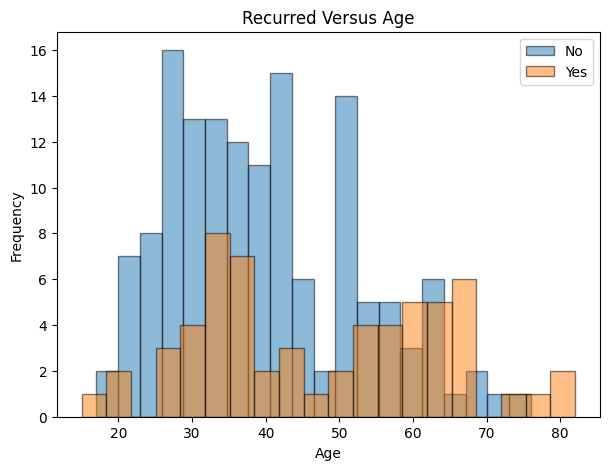

In [83]:
##################################
# Comparing the numeric predictors
# grouped by the target variable
##################################
colors = plt.get_cmap('tab10').colors
plt.figure(figsize=(7, 5))
group_no = thyroid_cancer_train[thyroid_cancer_train[histogram_grouping_variable] == 'No'][histogram_frequency_variable]
group_yes = thyroid_cancer_train[thyroid_cancer_train[histogram_grouping_variable] == 'Yes'][histogram_frequency_variable]
plt.hist(group_no, bins=20, alpha=0.5, color=colors[0], label='No', edgecolor='black')
plt.hist(group_yes, bins=20, alpha=0.5, color=colors[1], label='Yes', edgecolor='black')
plt.title(f'{histogram_grouping_variable} Versus {histogram_frequency_variable}')
plt.xlabel(histogram_frequency_variable)
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [84]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer_train.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer_train[col].value_counts().reindex(thyroid_cancer_train[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer_train[col].value_counts(normalize=True).reindex(thyroid_cancer_train[col].cat.categories))
    print("-" * 50)
    

Column: Gender
Absolute Frequencies:
M     44
F    160
Name: count, dtype: int64

Normalized Frequencies:
M    0.215686
F    0.784314
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     177
Yes     27
Name: count, dtype: int64

Normalized Frequencies:
No     0.867647
Yes    0.132353
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Smoking
Absolute Frequencies:
No     193
Yes     11
Name: count, dtype: int64

Normalized Frequencies:
No     0.946078
Yes    0.053922
Name: proportion, dtype: float64
--------------------------------------------------
Column: Hx_Radiotherapy
Absolute Frequencies:
No     202
Yes      2
Name: count, dtype: int64

Normalized Frequencies:
No     0.990196
Yes    0.009804
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                      171
Subclini

In [85]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_predictors_categorical
proportion_x_variable = 'Recurred'


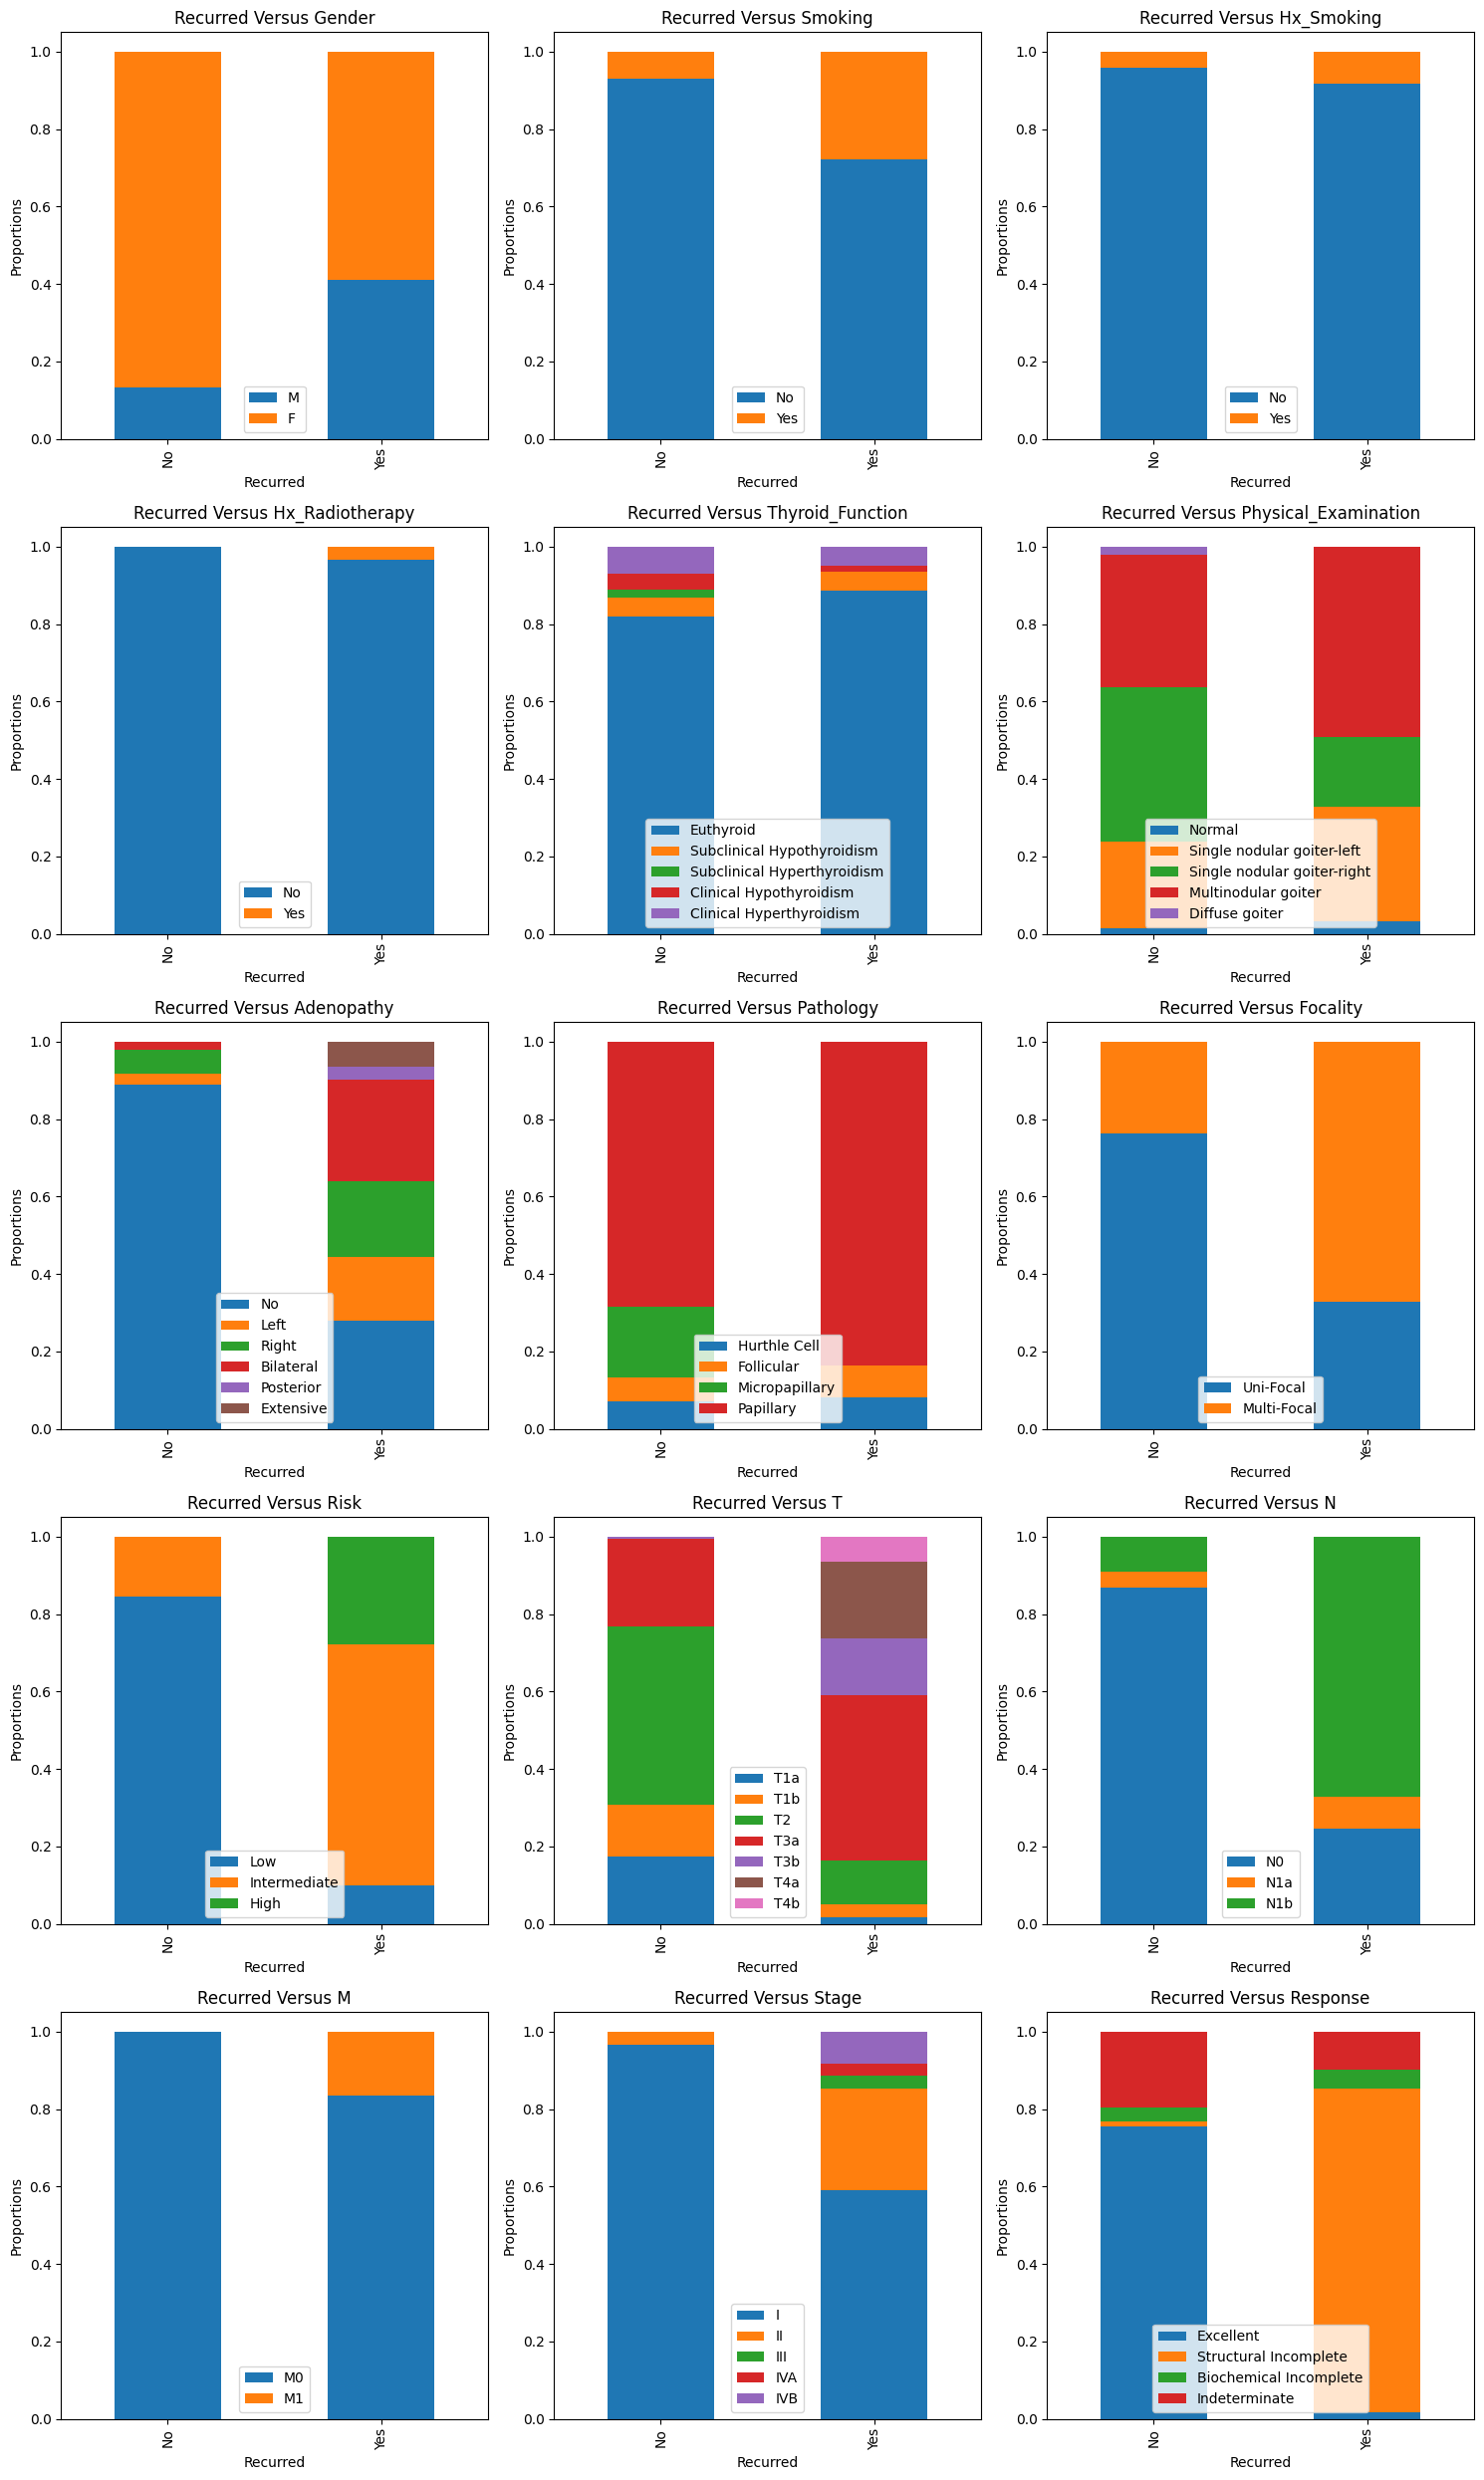

In [86]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 5
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 25))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()


In [87]:
##################################
# Removing predictors observed with extreme
# near-zero variance and a limited number of levels
##################################
thyroid_cancer_train_column_filtered = thyroid_cancer_train.drop(columns=['Hx_Radiotherapy','M','Hx_Smoking'])
thyroid_cancer_train_column_filtered.head()


Age Gender Smoking            Thyroid_Function  \
140   28      F      No                   Euthyroid   
205   36      F      No                   Euthyroid   
277   41      M     Yes                   Euthyroid   
294   42      M      No  Subclinical Hypothyroidism   
268   32      F      No                   Euthyroid   

            Physical_Examination Adenopathy     Pathology     Focality  \
140          Multinodular goiter         No     Papillary    Uni-Focal   
205  Single nodular goiter-right      Right     Papillary    Uni-Focal   
277  Single nodular goiter-right         No  Hurthle Cell  Multi-Focal   
294  Single nodular goiter-right         No     Papillary  Multi-Focal   
268   Single nodular goiter-left         No     Papillary    Uni-Focal   

             Risk    T    N Stage       Response Recurred  
140           Low   T2   N0     I      Excellent       No  
205           Low   T2  N1b     I  Indeterminate       No  
277  Intermediate  T3a   N0     I      Excellent       No  
294  Intermediate  T3a  N1a     I  Indeterminate       No  
268           Low  T3a   N0     I      Excellent       No

### 1.4.3 Category Aggregration and Encoding <a class="anchor" id="1.4.8"></a>

1. Category aggregation was applied to the previously identified categorical predictors observed with many levels (high-cardinality) containing only a few observations to improve model stability during cross-validation and enhance generalization:
    * <span style="color: #FF0000">Thyroid_Function</span>: 
        * **171** <span style="color: #FF0000">Thyroid_Function=Euthyroid</span>: 83.82%
        * **33** <span style="color: #FF0000">Thyroid_Function=Hypothyroidism or Hyperthyroidism</span>: 16.18%
    * <span style="color: #FF0000">Physical_Examination</span>:
        * **122** <span style="color: #FF0000">Physical_Examination=Normal or Single Nodular Goiter </span>: 59.80%
        * **82** <span style="color: #FF0000">Physical_Examination=Multinodular or Diffuse Goiter</span>: 40.20%
    * <span style="color: #FF0000">Adenopathy</span>:
        * **144** <span style="color: #FF0000">Adenopathy=No</span>: 70.59%
        * **60** <span style="color: #FF0000">Adenopathy=Yes</span>: 29.41%
    * <span style="color: #FF0000">Pathology</span>:
        * **29** <span style="color: #FF0000">Pathology=Non-Papillary </span>: 14.22%
        * **175** <span style="color: #FF0000">Pathology=Papillary</span>: 85.78%
    * <span style="color: #FF0000">Risk</span>:
        * **127** <span style="color: #FF0000">Risk=Low</span>: 62.25%
        * **77** <span style="color: #FF0000">Risk=Intermediate to High</span>: 37.75%
    * <span style="color: #FF0000">T</span>:
        * **120** <span style="color: #FF0000">T=T1 to T2</span>: 58.82%
        * **84** <span style="color: #FF0000">T=T3 to T4b</span>: 41.18%
    * <span style="color: #FF0000">N</span>:
        * **139** <span style="color: #FF0000">N=N0</span>: 68.14%
        * **65** <span style="color: #FF0000">N=N1</span>: 31.86%
    * <span style="color: #FF0000">Stage</span>:
        * **174** <span style="color: #FF0000">Stage=I</span>: 85.29%
        * **30** <span style="color: #FF0000">Stage=II to IVB</span>: 14.71%
    * <span style="color: #FF0000">Response</span>:
        * **109** <span style="color: #FF0000">Response=Excellent</span>: 53.43%
        * **95** <span style="color: #FF0000">Response=Indeterminate or Incomplete</span>: 46.57%


In [88]:
##################################
# Merging small categories into broader groups 
# for certain categorical predictors
# to ensure sufficient representation in statistical models 
# and prevent sparsity issues in cross-validation
##################################
thyroid_cancer_train_column_filtered['Thyroid_Function'] = thyroid_cancer_train_column_filtered['Thyroid_Function'].map(lambda x: 'Euthyroid' if (x in ['Euthyroid'])  else 'Hypothyroidism or Hyperthyroidism').astype('category')
thyroid_cancer_train_column_filtered['Physical_Examination'] = thyroid_cancer_train_column_filtered['Physical_Examination'].map(lambda x: 'Normal or Single Nodular Goiter' if (x in ['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right'])  else 'Multinodular or Diffuse Goiter').astype('category')
thyroid_cancer_train_column_filtered['Adenopathy'] = thyroid_cancer_train_column_filtered['Adenopathy'].map(lambda x: 'No' if x == 'No' else ('Yes' if pd.notna(x) and x != '' else x)).astype('category')
thyroid_cancer_train_column_filtered['Pathology'] = thyroid_cancer_train_column_filtered['Pathology'].map(lambda x: 'Non-Papillary' if (x in ['Hurthle Cell', 'Follicular'])  else 'Papillary').astype('category')
thyroid_cancer_train_column_filtered['Risk'] = thyroid_cancer_train_column_filtered['Risk'].map(lambda x: 'Low' if (x in ['Low'])  else 'Intermediate to High').astype('category')
thyroid_cancer_train_column_filtered['T'] = thyroid_cancer_train_column_filtered['T'].map(lambda x: 'T1 to T2' if (x in ['T1a', 'T1b', 'T2'])  else 'T3 to T4b').astype('category')
thyroid_cancer_train_column_filtered['N'] = thyroid_cancer_train_column_filtered['N'].map(lambda x: 'N0' if (x in ['N0'])  else 'N1').astype('category')
thyroid_cancer_train_column_filtered['Stage'] = thyroid_cancer_train_column_filtered['Stage'].map(lambda x: 'I' if (x in ['I'])  else 'II to IVB').astype('category')
thyroid_cancer_train_column_filtered['Response'] = thyroid_cancer_train_column_filtered['Response'].map(lambda x: 'Indeterminate or Incomplete' if (x in ['Indeterminate', 'Structural Incomplete', 'Biochemical Incomplete'])  else 'Excellent').astype('category')
thyroid_cancer_train_column_filtered.head()


Age Gender Smoking                   Thyroid_Function  \
140   28      F      No                          Euthyroid   
205   36      F      No                          Euthyroid   
277   41      M     Yes                          Euthyroid   
294   42      M      No  Hypothyroidism or Hyperthyroidism   
268   32      F      No                          Euthyroid   

                Physical_Examination Adenopathy      Pathology     Focality  \
140   Multinodular or Diffuse Goiter         No      Papillary    Uni-Focal   
205  Normal or Single Nodular Goiter        Yes      Papillary    Uni-Focal   
277  Normal or Single Nodular Goiter         No  Non-Papillary  Multi-Focal   
294  Normal or Single Nodular Goiter         No      Papillary  Multi-Focal   
268  Normal or Single Nodular Goiter         No      Papillary    Uni-Focal   

                     Risk          T   N Stage                     Response  \
140                   Low   T1 to T2  N0     I                    Excellent   
205                   Low   T1 to T2  N1     I  Indeterminate or Incomplete   
277  Intermediate to High  T3 to T4b  N0     I                    Excellent   
294  Intermediate to High  T3 to T4b  N1     I  Indeterminate or Incomplete   
268                   Low  T3 to T4b  N0     I                    Excellent   

    Recurred  
140       No  
205       No  
277       No  
294       No  
268       No

In [89]:
##################################
# Performing a general exploration of the categorical variable levels
# based on the ordered categories
##################################
ordered_cat_cols = thyroid_cancer_train_column_filtered.select_dtypes(include=["category"]).columns
for col in ordered_cat_cols:
    print(f"Column: {col}")
    print("Absolute Frequencies:")
    print(thyroid_cancer_train_column_filtered[col].value_counts().reindex(thyroid_cancer_train_column_filtered[col].cat.categories))
    print("\nNormalized Frequencies:")
    print(thyroid_cancer_train_column_filtered[col].value_counts(normalize=True).reindex(thyroid_cancer_train_column_filtered[col].cat.categories))
    print("-" * 50)
    

Column: Gender
Absolute Frequencies:
M     44
F    160
Name: count, dtype: int64

Normalized Frequencies:
M    0.215686
F    0.784314
Name: proportion, dtype: float64
--------------------------------------------------
Column: Smoking
Absolute Frequencies:
No     177
Yes     27
Name: count, dtype: int64

Normalized Frequencies:
No     0.867647
Yes    0.132353
Name: proportion, dtype: float64
--------------------------------------------------
Column: Thyroid_Function
Absolute Frequencies:
Euthyroid                            171
Hypothyroidism or Hyperthyroidism     33
Name: count, dtype: int64

Normalized Frequencies:
Euthyroid                            0.838235
Hypothyroidism or Hyperthyroidism    0.161765
Name: proportion, dtype: float64
--------------------------------------------------
Column: Physical_Examination
Absolute Frequencies:
Multinodular or Diffuse Goiter      82
Normal or Single Nodular Goiter    122
Name: count, dtype: int64

Normalized Frequencies:
Multinodular or Dif

In [90]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_predictors = thyroid_cancer_train_column_filtered.iloc[:,:-1].columns
thyroid_cancer_train_predictors_numeric = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:, thyroid_cancer_train_column_filtered.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_predictors_categorical = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:,thyroid_cancer_train_column_filtered.iloc[:,:-1].columns != 'Age'].columns


In [91]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_predictors_categorical
proportion_x_variable = 'Recurred'


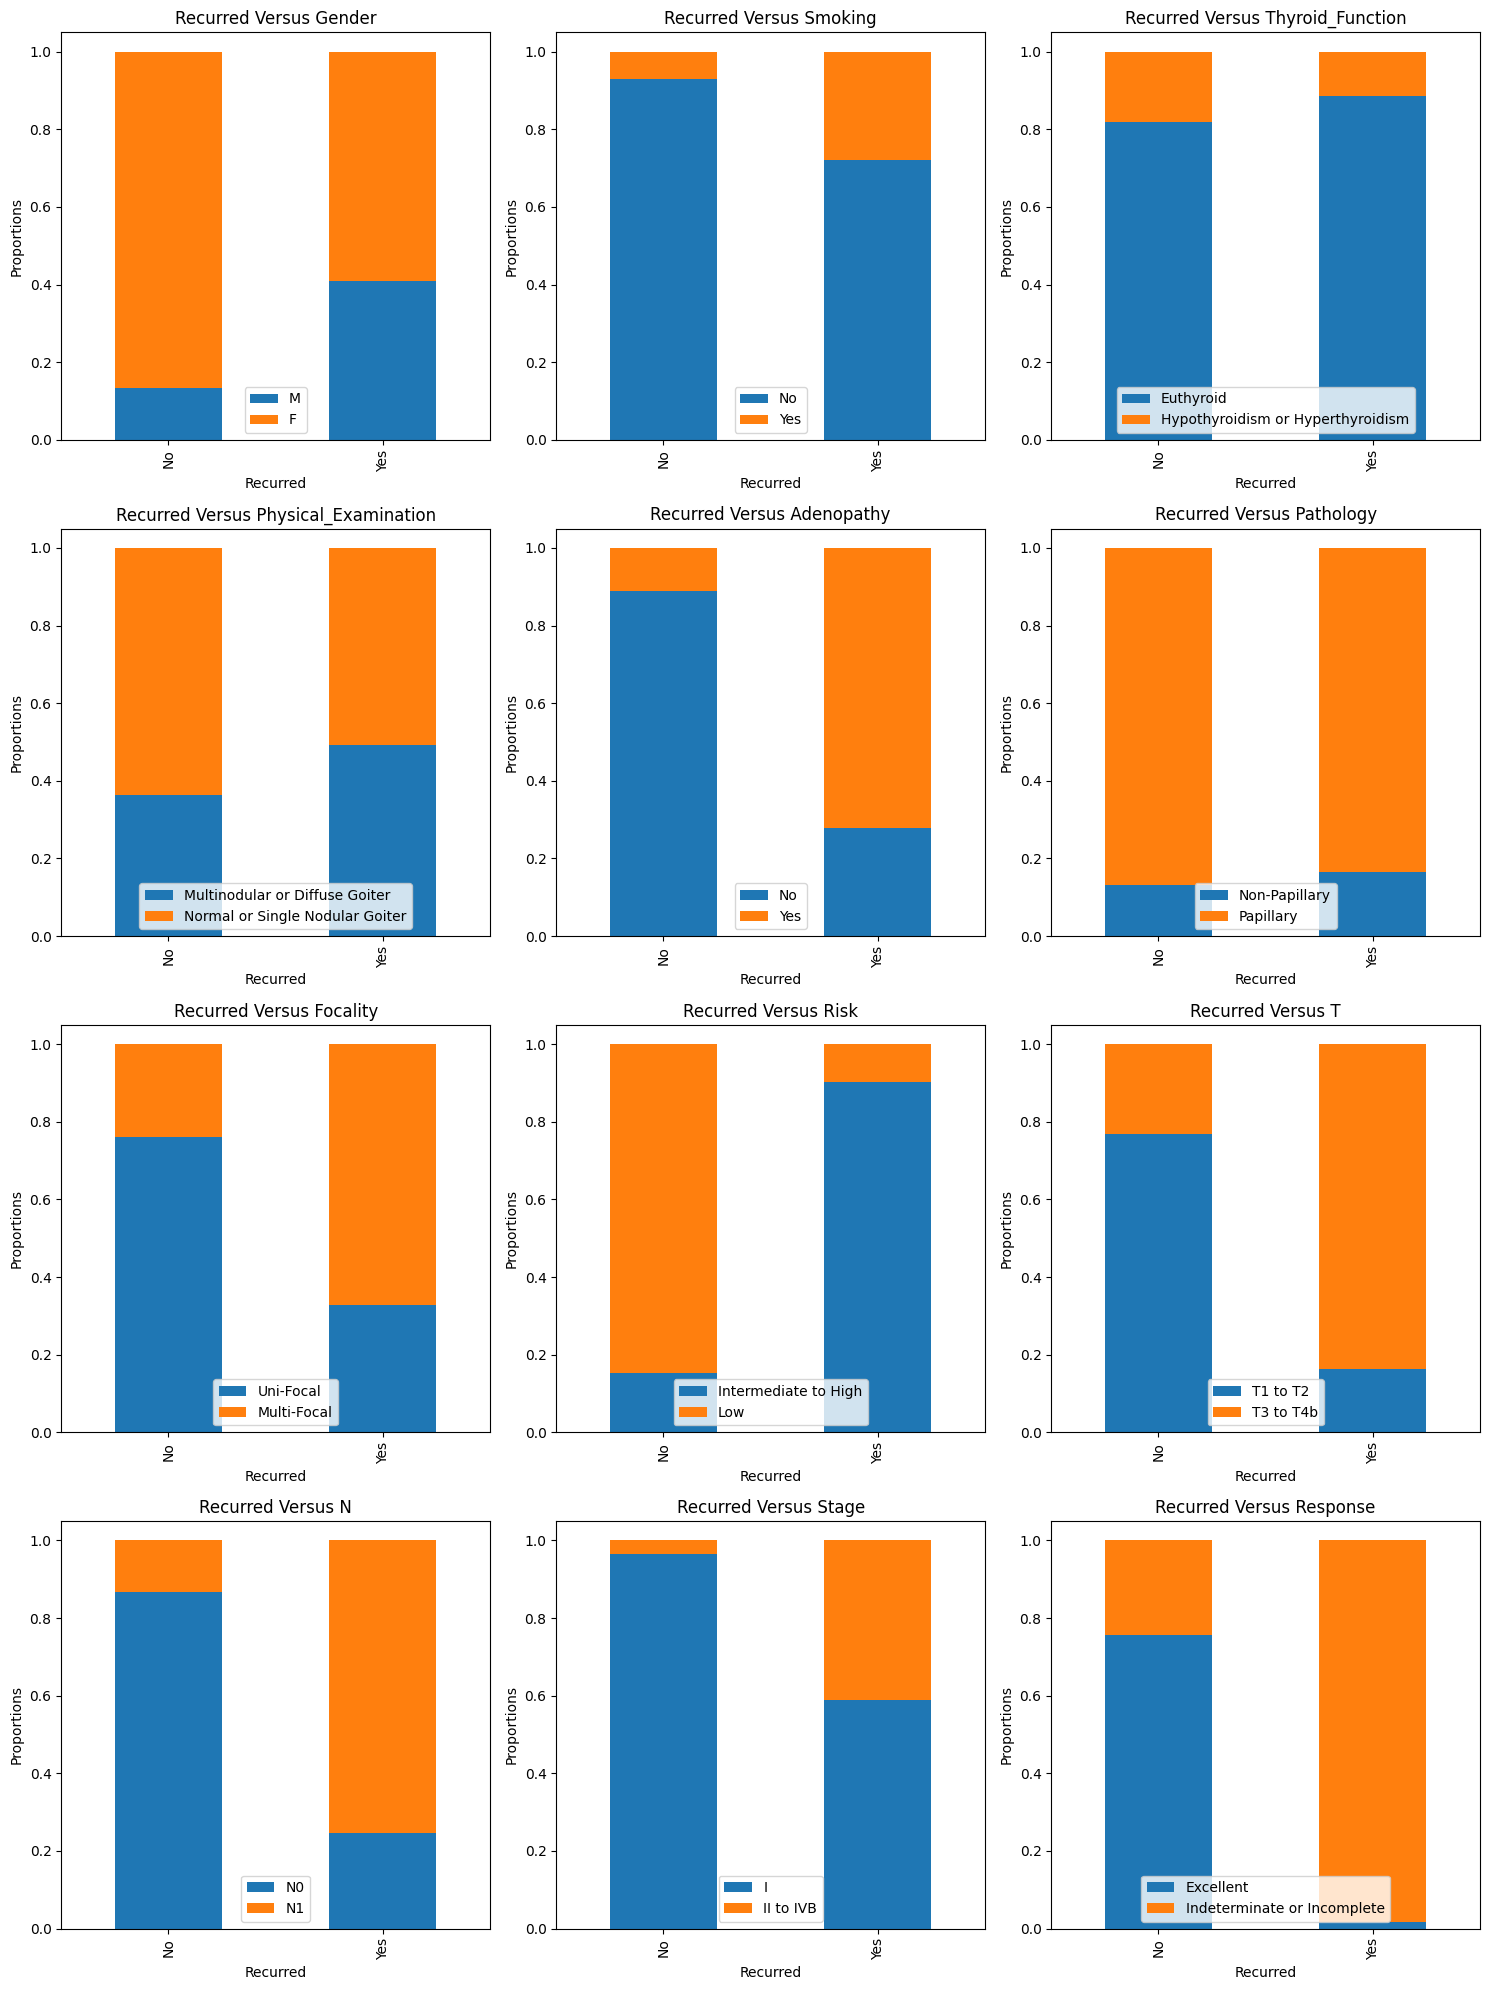

In [92]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 4
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train_column_filtered.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()


### 1.4.4 Outlier and Distributional Shape Analysis <a class="anchor" id="1.4.4"></a>

1. No outliers (Outlier.Count>0, Outlier.Ratio>0.000), high skewness (Skewness>3 or Skewness<(-3)) or abnormal kurtosis (Skewness>2 or Skewness<(-2)) observed for the numeric predictor.
    * <span style="color: #FF0000">Age</span>: Outlier.Count = 0, Outlier.Ratio = 0.000, Skewness = 0.525, Kurtosis = -0.494


In [93]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
thyroid_cancer_train_column_filtered['Age'] = pd.to_numeric(thyroid_cancer_train_column_filtered['Age'])
thyroid_cancer_train_column_filtered_numeric = thyroid_cancer_train_column_filtered.select_dtypes(include='number')
thyroid_cancer_train_column_filtered_numeric = thyroid_cancer_train_column_filtered_numeric.to_frame() if isinstance(thyroid_cancer_train_column_filtered_numeric, pd.Series) else thyroid_cancer_train_column_filtered_numeric


In [94]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(thyroid_cancer_train_column_filtered_numeric.columns)


In [95]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_train_column_filtered_numeric.skew()


In [96]:
##################################
# Computing the interquartile range
# for all columns
##################################
thyroid_cancer_train_column_filtered_numeric_q1 = thyroid_cancer_train_column_filtered_numeric.quantile(0.25)
thyroid_cancer_train_column_filtered_numeric_q3 = thyroid_cancer_train_column_filtered_numeric.quantile(0.75)
thyroid_cancer_train_column_filtered_numeric_iqr = thyroid_cancer_train_column_filtered_numeric_q3 - thyroid_cancer_train_column_filtered_numeric_q1


In [97]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((thyroid_cancer_train_column_filtered_numeric < (thyroid_cancer_train_column_filtered_numeric_q1 - 1.5 * thyroid_cancer_train_column_filtered_numeric_iqr)) | (thyroid_cancer_train_column_filtered_numeric > (thyroid_cancer_train_column_filtered_numeric_q3 + 1.5 * thyroid_cancer_train_column_filtered_numeric_iqr))).sum() 


In [98]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(thyroid_cancer_train_column_filtered_numeric)] * len(thyroid_cancer_train_column_filtered_numeric.columns))


In [99]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)


In [100]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = thyroid_cancer_train_column_filtered_numeric.skew()


In [101]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = thyroid_cancer_train_column_filtered_numeric.kurtosis()


In [102]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list,
                                                  numeric_skewness_list,
                                                  numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_outlier_summary)


Numeric.Column.Name  Skewness  Outlier.Count  Row.Count  Outlier.Ratio  \
0                 Age  0.525218              0        204            0.0   

   Skewness  Kurtosis  
0  0.525218 -0.494286

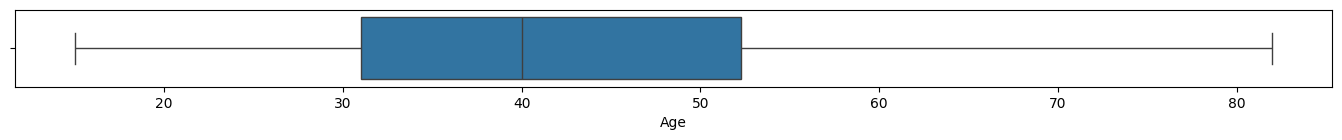

In [103]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in thyroid_cancer_train_column_filtered_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=thyroid_cancer_train_column_filtered_numeric, x=column)
    

### 1.4.5 Collinearity <a class="anchor" id="1.4.5"></a>

1. Majority of the predictors reported low (<0.50) to moderate (0.50 to 0.75) correlation.
2. Among pairwise combinations of categorical predictors, high Phi.Coefficient values were noted for:
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Adenopathy</span>: Phi.Coefficient = +0.805
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Risk</span>: Phi.Coefficient = +0.726
    * <span style="color: #FF0000">Adenopathy</span> and <span style="color: #FF0000">Risk</span>: Phi.Coefficient = +0.674
   

In [104]:
##################################
# Creating a dataset copy and
# converting all values to numeric
# for correlation analysis
##################################
pd.set_option('future.no_silent_downcasting', True)
thyroid_cancer_train_correlation = thyroid_cancer_train_column_filtered.copy()
thyroid_cancer_train_correlation_object = thyroid_cancer_train_correlation.iloc[:,1:13].columns
custom_category_orders = {
    'Gender': ['M', 'F'],  
    'Smoking': ['No', 'Yes'],  
    'Thyroid_Function': ['Euthyroid', 'Hypothyroidism or Hyperthyroidism'],  
    'Physical_Examination': ['Normal or Single Nodular Goiter', 'Multinodular or Diffuse Goiter'],  
    'Adenopathy': ['No', 'Yes'],  
    'Pathology': ['Non-Papillary', 'Papillary'],  
    'Focality': ['Uni-Focal', 'Multi-Focal'],  
    'Risk': ['Low', 'Intermediate to High'],  
    'T': ['T1 to T2', 'T3 to T4b'],  
    'N': ['N0', 'N1'],  
    'Stage': ['I', 'II to IVB'],  
    'Response': ['Excellent', 'Indeterminate or Incomplete'] 
}
encoder = OrdinalEncoder(categories=[custom_category_orders[col] for col in thyroid_cancer_train_correlation_object])
thyroid_cancer_train_correlation[thyroid_cancer_train_correlation_object] = encoder.fit_transform(
    thyroid_cancer_train_correlation[thyroid_cancer_train_correlation_object]
)
thyroid_cancer_train_correlation = thyroid_cancer_train_correlation.drop(['Recurred'], axis=1)
display(thyroid_cancer_train_correlation)


Age  Gender  Smoking  Thyroid_Function  Physical_Examination  Adenopathy  \
140   28     1.0      0.0               0.0                   1.0         0.0   
205   36     1.0      0.0               0.0                   0.0         1.0   
277   41     0.0      1.0               0.0                   0.0         0.0   
294   42     0.0      0.0               1.0                   0.0         0.0   
268   32     1.0      0.0               0.0                   0.0         0.0   
..   ...     ...      ...               ...                   ...         ...   
300   67     1.0      0.0               0.0                   1.0         0.0   
115   37     1.0      0.0               0.0                   0.0         0.0   
67    51     1.0      0.0               0.0                   0.0         0.0   
161   22     1.0      0.0               0.0                   0.0         0.0   
55    21     1.0      0.0               0.0                   0.0         0.0   

     Pathology  Focality  Risk    T    N  Stage  Response  
140        1.0       0.0   0.0  0.0  0.0    0.0       0.0  
205        1.0       0.0   0.0  0.0  1.0    0.0       1.0  
277        0.0       1.0   1.0  1.0  0.0    0.0       0.0  
294        1.0       1.0   1.0  1.0  1.0    0.0       1.0  
268        1.0       0.0   0.0  1.0  0.0    0.0       0.0  
..         ...       ...   ...  ...  ...    ...       ...  
300        0.0       0.0   1.0  1.0  0.0    1.0       1.0  
115        1.0       0.0   0.0  0.0  0.0    0.0       0.0  
67         1.0       0.0   0.0  0.0  0.0    0.0       0.0  
161        1.0       0.0   0.0  0.0  0.0    0.0       0.0  
55         1.0       0.0   0.0  0.0  0.0    0.0       1.0  

[204 rows x 13 columns]

In [105]:
##################################
# Initializing the correlation matrix
##################################
thyroid_cancer_train_correlation_matrix = pd.DataFrame(np.zeros((len(thyroid_cancer_train_correlation.columns), len(thyroid_cancer_train_correlation.columns))),
                                                       columns=thyroid_cancer_train_correlation.columns,
                                                       index=thyroid_cancer_train_correlation.columns)


In [106]:
##################################
# Creating an empty correlation matrix
##################################
thyroid_cancer_train_correlation_matrix = pd.DataFrame(
    np.zeros((len(thyroid_cancer_train_correlation.columns), len(thyroid_cancer_train_correlation.columns))),
    index=thyroid_cancer_train_correlation.columns,
    columns=thyroid_cancer_train_correlation.columns
)


##################################
# Calculating different types
# of correlation coefficients
# per variable type
##################################
for i in range(len(thyroid_cancer_train_correlation.columns)):
    for j in range(i, len(thyroid_cancer_train_correlation.columns)):
        if i == j:
            thyroid_cancer_train_correlation_matrix.iloc[i, j] = 1.0  
        else:
            col_i = thyroid_cancer_train_correlation.iloc[:, i]
            col_j = thyroid_cancer_train_correlation.iloc[:, j]

            # Detecting binary variables (assumes binary variables are coded as 0/1)
            is_binary_i = col_i.nunique() == 2
            is_binary_j = col_j.nunique() == 2

            # Computing the Pearson correlation for two continuous variables
            if col_i.dtype in ['int64', 'float64'] and col_j.dtype in ['int64', 'float64']:
                corr = col_i.corr(col_j)

            # Computing the Point-Biserial correlation for continuous and binary variables
            elif (col_i.dtype in ['int64', 'float64'] and is_binary_j) or (col_j.dtype in ['int64', 'float64'] and is_binary_i):
                continuous_var = col_i if col_i.dtype in ['int64', 'float64'] else col_j
                binary_var = col_j if is_binary_j else col_i

                # Convert binary variable to 0/1 (if not already)
                binary_var = binary_var.astype('category').cat.codes
                corr, _ = pointbiserialr(continuous_var, binary_var)

            # Computing the Phi coefficient for two binary variables
            elif is_binary_i and is_binary_j:
                corr = col_i.corr(col_j) 

            # Computing the Cramér's V for two categorical variables (if more than 2 categories)
            else:
                contingency_table = pd.crosstab(col_i, col_j)
                chi2, _, _, _ = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                phi2 = chi2 / n
                r, k = contingency_table.shape
                corr = np.sqrt(phi2 / min(k - 1, r - 1))  # Cramér's V formula

            # Assigning correlation values to the matrix
            thyroid_cancer_train_correlation_matrix.iloc[i, j] = corr
            thyroid_cancer_train_correlation_matrix.iloc[j, i] = corr

# Displaying the correlation matrix
display(thyroid_cancer_train_correlation_matrix)
            

Age    Gender   Smoking  Thyroid_Function  \
Age                   1.000000 -0.185530  0.299971          0.077845   
Gender               -0.185530  1.000000 -0.604101         -0.093290   
Smoking               0.299971 -0.604101  1.000000          0.064124   
Thyroid_Function      0.077845 -0.093290  0.064124          1.000000   
Physical_Examination  0.012021 -0.031935  0.004339          0.019964   
Adenopathy            0.073931 -0.158480  0.192350         -0.137486   
Pathology            -0.215274  0.127817 -0.338086         -0.049893   
Focality              0.195272 -0.218103  0.182212          0.051564   
Risk                  0.205360 -0.255507  0.233024         -0.012519   
T                     0.246838 -0.215101  0.231679         -0.042960   
N                     0.013195 -0.178550  0.105463         -0.043275   
Stage                 0.528144 -0.219727  0.327952          0.080702   
Response              0.317978 -0.179431  0.215362         -0.036498   

                      Physical_Examination  Adenopathy  Pathology  Focality  \
Age                               0.012021    0.073931  -0.215274  0.195272   
Gender                           -0.031935   -0.158480   0.127817 -0.218103   
Smoking                           0.004339    0.192350  -0.338086  0.182212   
Thyroid_Function                  0.019964   -0.137486  -0.049893  0.051564   
Physical_Examination              1.000000    0.063246   0.018806  0.245779   
Adenopathy                        0.063246    1.000000   0.047117  0.288750   
Pathology                         0.018806    0.047117   1.000000 -0.126299   
Focality                          0.245779    0.288750  -0.126299  1.000000   
Risk                              0.166012    0.673638  -0.117392  0.454926   
T                                 0.086039    0.421762  -0.286899  0.518864   
N                                 0.104553    0.805406   0.157869  0.307716   
Stage                             0.054799    0.278749  -0.187683  0.372331   
Response                          0.116526    0.518887  -0.154637  0.388741   

                          Risk         T         N     Stage  Response  
Age                   0.205360  0.246838  0.013195  0.528144  0.317978  
Gender               -0.255507 -0.215101 -0.178550 -0.219727 -0.179431  
Smoking               0.233024  0.231679  0.105463  0.327952  0.215362  
Thyroid_Function     -0.012519 -0.042960 -0.043275  0.080702 -0.036498  
Physical_Examination  0.166012  0.086039  0.104553  0.054799  0.116526  
Adenopathy            0.673638  0.421762  0.805406  0.278749  0.518887  
Pathology            -0.117392 -0.286899  0.157869 -0.187683 -0.154637  
Focality              0.454926  0.518864  0.307716  0.372331  0.388741  
Risk                  1.000000  0.622459  0.726304  0.533264  0.631330  
T                     0.622459  1.000000  0.368430  0.468168  0.556742  
N                     0.726304  0.368430  1.000000  0.310156  0.542672  
Stage                 0.533264  0.468168  0.310156  1.000000  0.417025  
Response              0.631330  0.556742  0.542672  0.417025  1.000000

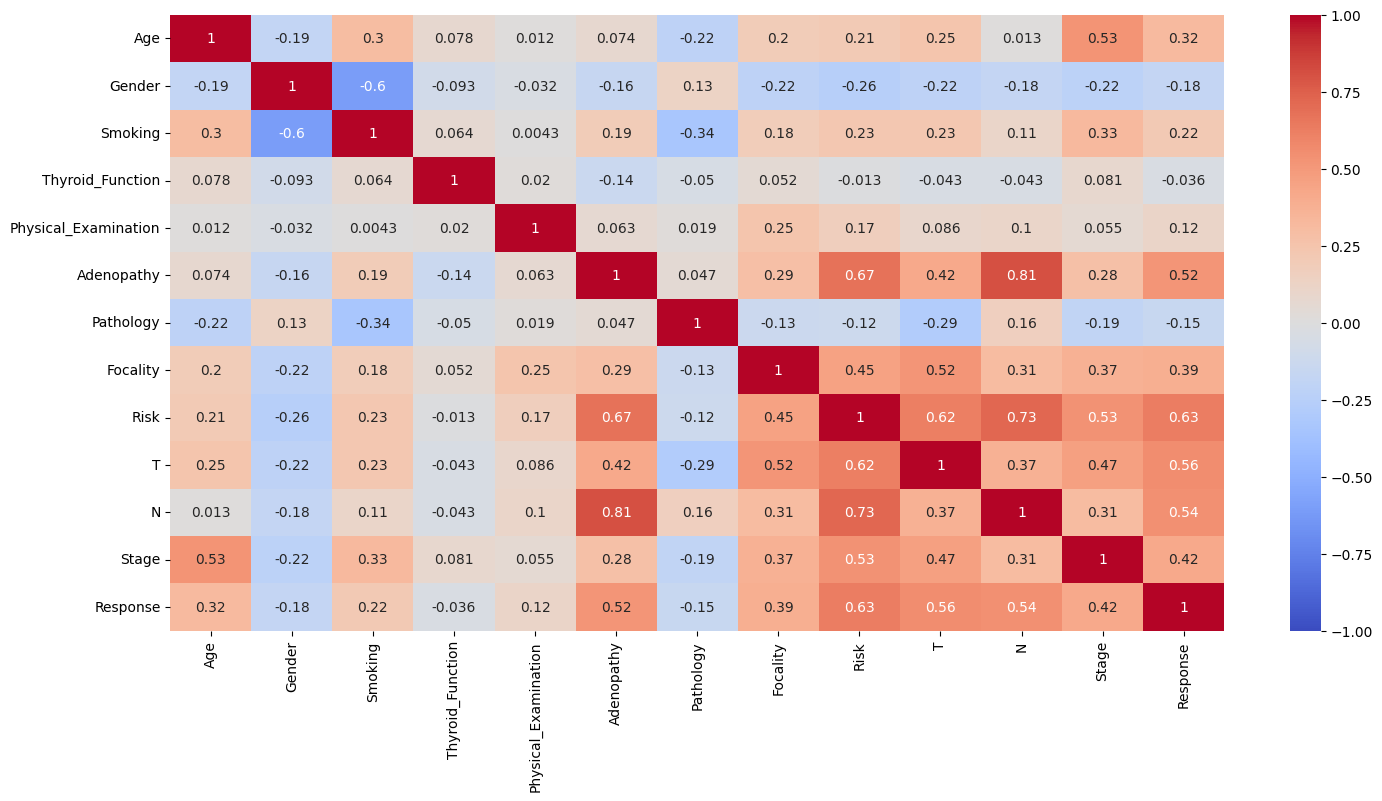

In [107]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric and categorical columns
##################################
plt.figure(figsize=(17, 8))
sns.heatmap(thyroid_cancer_train_correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. Bivariate analysis identified individual predictors with generally positive association to the target variable based on visual inspection.
2. Higher values or higher proportions for the following predictors are associated with the <span style="color: #FF0000">Recurred=Yes</span> category: 
    * <span style="color: #FF0000">Age</span>
    * <span style="color: #FF0000">Gender=M</span>    
    * <span style="color: #FF0000">Smoking=Yes</span>    
    * <span style="color: #FF0000">Physical_Examination=Multinodular or Diffuse Goiter</span>    
    * <span style="color: #FF0000">Adenopathy=Yes</span>
    * <span style="color: #FF0000">Focality=Multi-Focal</span>    
    * <span style="color: #FF0000">Risk=Intermediate to High</span>
    * <span style="color: #FF0000">T=T3 to T4b</span>    
    * <span style="color: #FF0000">N=N1</span>
    * <span style="color: #FF0000">Stage=II to IVB</span>    
    * <span style="color: #FF0000">Response=Indeterminate or Incomplete</span>
3. Proportions for the following predictors are not associated with the <span style="color: #FF0000">Recurred=Yes</span> or <span style="color: #FF0000">Recurred=No</span> categories: 
    * <span style="color: #FF0000">Thyroid_Function</span>
    * <span style="color: #FF0000">Pathology</span>    


In [108]:
##################################
# Segregating the target
# and predictor variables
##################################
thyroid_cancer_train_column_filtered_predictors = thyroid_cancer_train_column_filtered.iloc[:,:-1].columns
thyroid_cancer_train_column_filtered_predictors_numeric = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:, thyroid_cancer_train_column_filtered.iloc[:,:-1].columns == 'Age'].columns
thyroid_cancer_train_column_filtered_predictors_categorical = thyroid_cancer_train_column_filtered.iloc[:,:-1].loc[:,thyroid_cancer_train_column_filtered.iloc[:,:-1].columns != 'Age'].columns


In [109]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = thyroid_cancer_train_column_filtered_predictors_numeric


In [110]:
##################################
# Segregating the target variable
# and numeric predictors
##################################
boxplot_y_variable = 'Recurred'
boxplot_x_variable = numeric_variable_name_list.values[0]


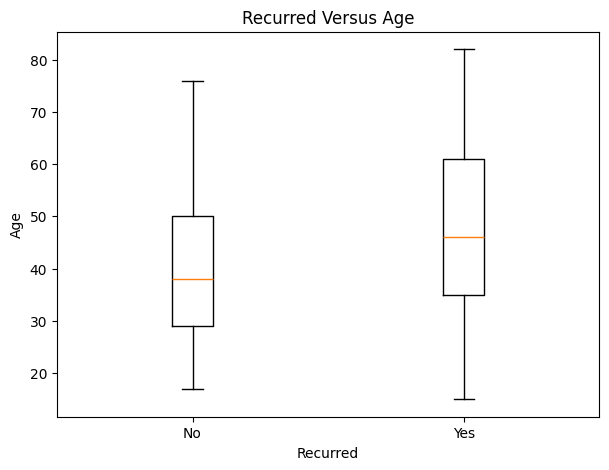

In [111]:
##################################
# Evaluating the numeric predictors
# against the target variable
##################################
plt.figure(figsize=(7, 5))
plt.boxplot([group[boxplot_x_variable] for name, group in thyroid_cancer_train_column_filtered.groupby(boxplot_y_variable, observed=True)])
plt.title(f'{boxplot_y_variable} Versus {boxplot_x_variable}')
plt.xlabel(boxplot_y_variable)
plt.ylabel(boxplot_x_variable)
plt.xticks(range(1, len(thyroid_cancer_train_column_filtered[boxplot_y_variable].unique()) + 1), ['No', 'Yes'])
plt.show()


In [112]:
##################################
# Segregating the target variable
# and categorical predictors
##################################
proportion_y_variables = thyroid_cancer_train_column_filtered_predictors_categorical
proportion_x_variable = 'Recurred'


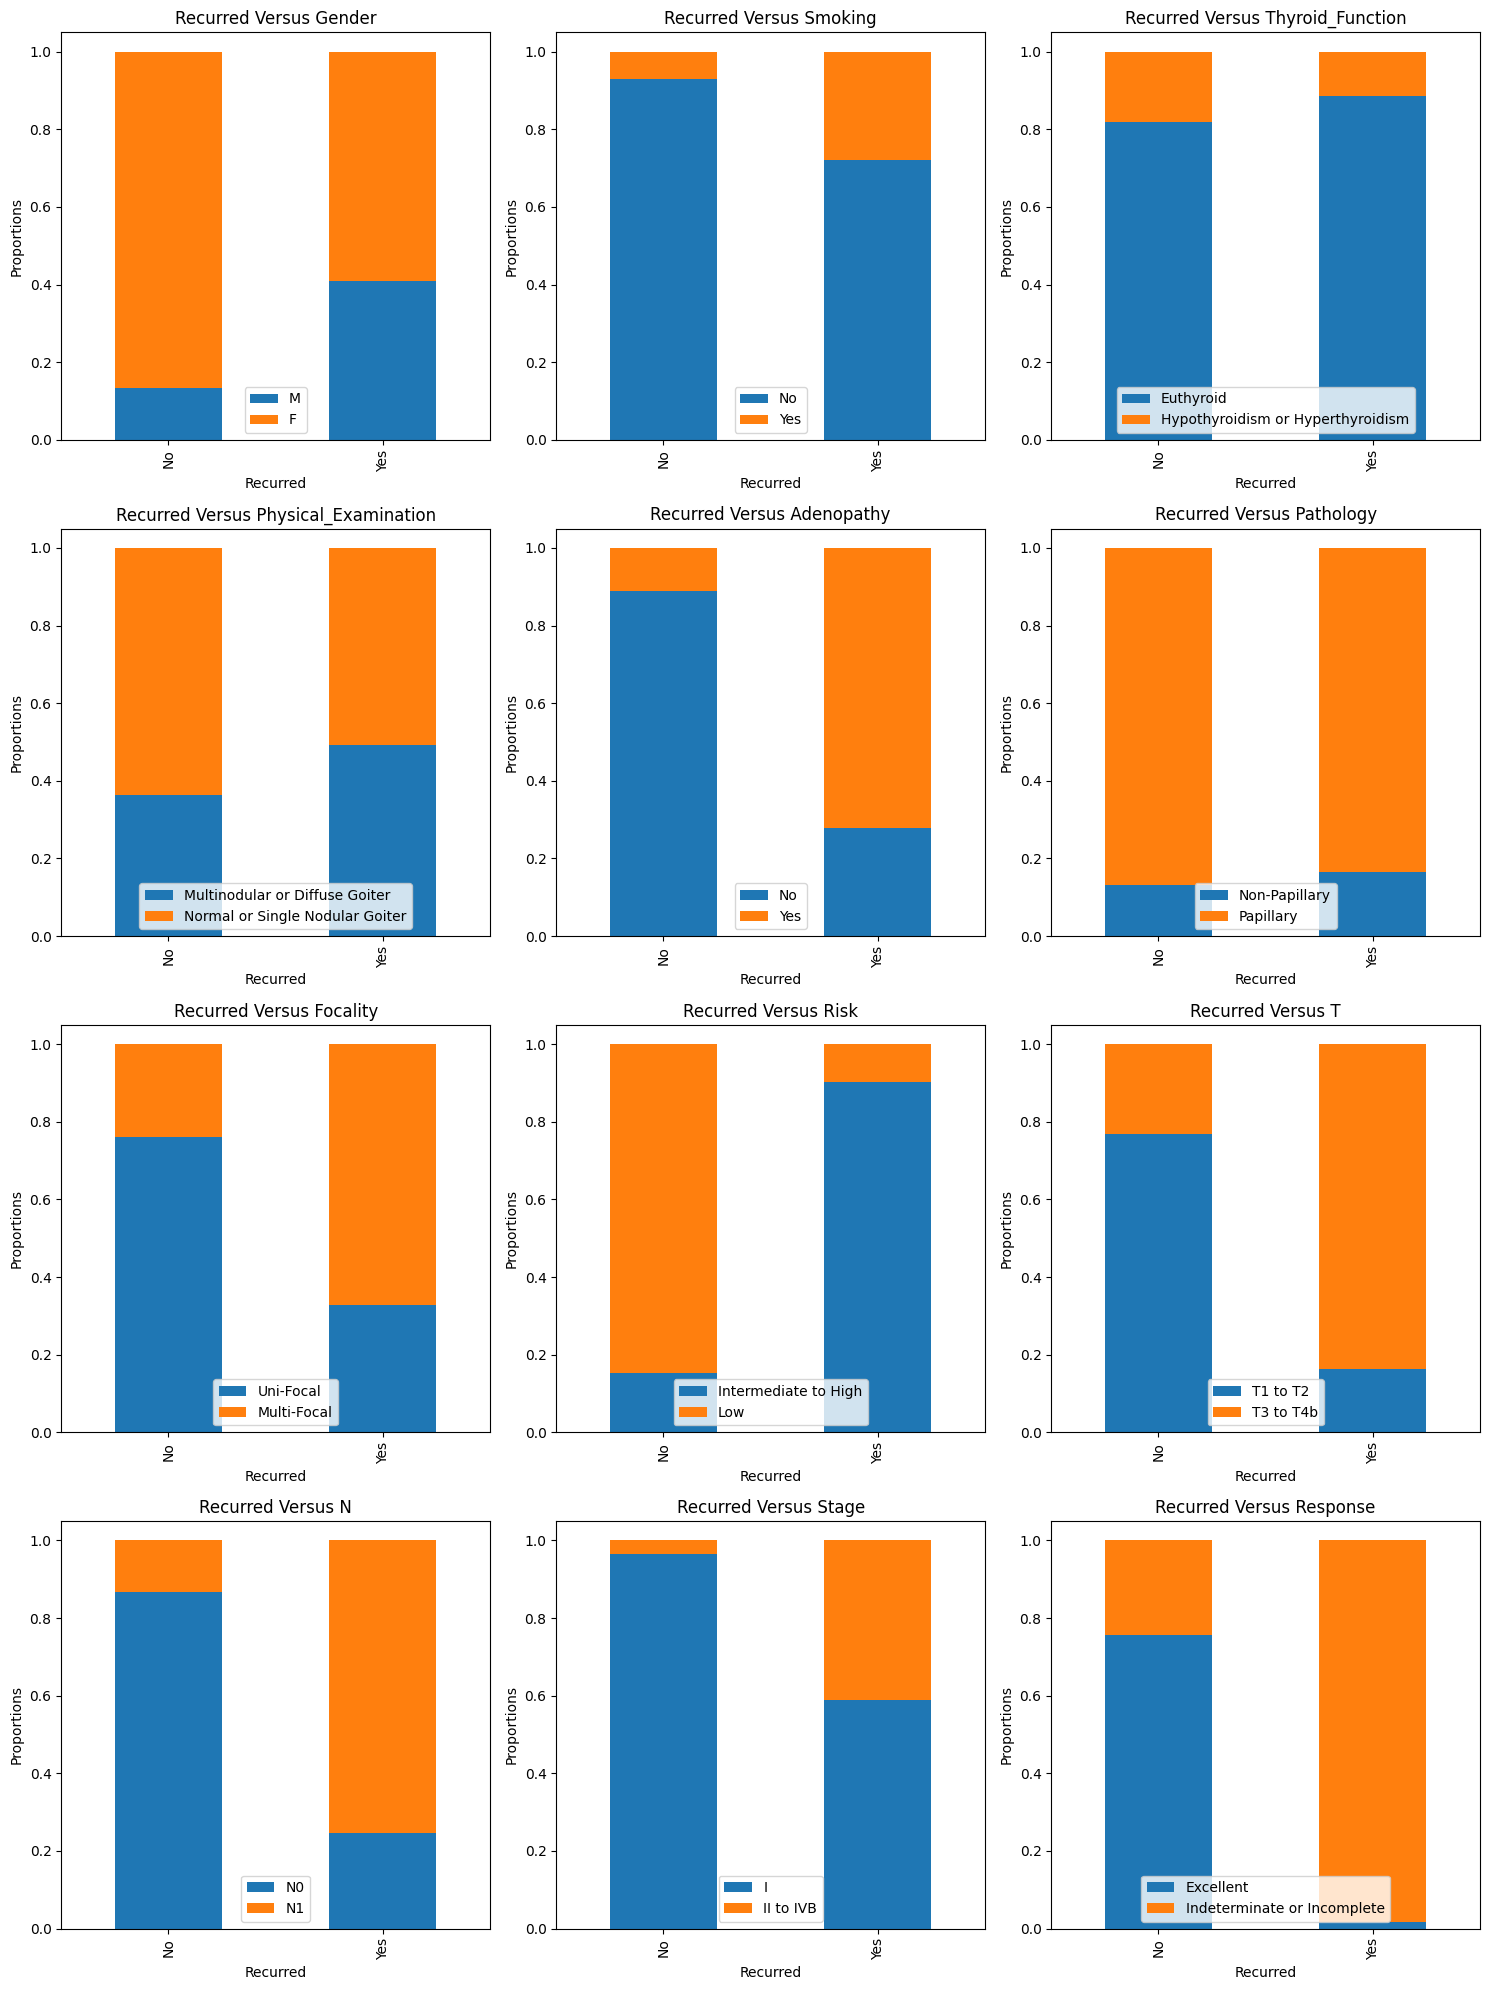

In [113]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 4
num_cols = 3

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(proportion_y_variables):
    ax = axes[i]
    category_counts = thyroid_cancer_train_column_filtered.groupby([proportion_x_variable, y_variable], observed=True).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{proportion_x_variable} Versus {y_variable}')
    ax.set_xlabel(proportion_x_variable)
    ax.set_ylabel('Proportions')
    ax.legend(loc="lower center")

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()


### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictor to the <span style="color: #FF0000">Recurred</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups Yes and No is equal to zero  
    * **Alternative**: Difference in the means between groups Yes and No is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable in 1 of 1 numeric predictor given its high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Age</span>: T.Test.Statistic=-3.791, T.Test.PValue=0.000
3. The relationship between the categorical predictors to the <span style="color: #FF0000">Recurred</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: The categorical predictor is independent of the categorical target variable 
    * **Alternative**: The categorical predictor is dependent of the categorical target variable    
4. There is sufficient evidence to conclude of a statistically significant relationship between the categories of the categorical predictors and the Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable in 9 of 12 categorical predictors given their high chisquare statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">Risk</span>: ChiSquare.Test.Statistic=98.599, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Response</span>: ChiSquare.Test.Statistic=90.866, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Adenopathy</span>: ChiSquare.Test.Statistic=73.585, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">N</span>: ChiSquare.Test.Statistic=73.176, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">T</span>: ChiSquare.Test.Statistic=62.205, ChiSquare.Test.PValue=0.000   
    * <span style="color: #FF0000">Stage</span>: ChiSquare.Test.Statistic=44.963, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Focality</span>: ChiSquare.Test.Statistic=32.859, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Gender</span>: ChiSquare.Test.Statistic=17.787, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">Smoking</span>: ChiSquare.Test.Statistic=14.460, ChiSquare.Test.PValue=0.001
5. There is marginal evidence to conclude of a statistically significant relationship between the categories of the categorical predictors and the Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable in 1 of 12 categorical predictors given its sufficiently high chisquare statistic values with reported low p-values near the significance level of 0.10.    
    * <span style="color: #FF0000">Physical_Examination</span>: ChiSquare.Test.Statistic=2.413, ChiSquare.Test.PValue=0.120



In [114]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and numeric predictor columns
##################################
thyroid_cancer_numeric_ttest_target = {}
thyroid_cancer_numeric = thyroid_cancer_train_column_filtered.loc[:,(thyroid_cancer_train_column_filtered.columns == 'Age') | (thyroid_cancer_train_column_filtered.columns == 'Recurred')]
thyroid_cancer_numeric_columns = thyroid_cancer_train_column_filtered_predictors_numeric
for numeric_column in thyroid_cancer_numeric_columns:
    group_0 = thyroid_cancer_numeric[thyroid_cancer_numeric.loc[:,'Recurred']=='No']
    group_1 = thyroid_cancer_numeric[thyroid_cancer_numeric.loc[:,'Recurred']=='Yes']
    thyroid_cancer_numeric_ttest_target['Recurred_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)


In [115]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and numeric predictor columns
##################################
thyroid_cancer_numeric_summary = thyroid_cancer_numeric.from_dict(thyroid_cancer_numeric_ttest_target, orient='index')
thyroid_cancer_numeric_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(thyroid_cancer_numeric_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(len(thyroid_cancer_train_column_filtered_predictors_numeric)))


T.Test.Statistic  T.Test.PValue
Recurred_Age         -3.747942       0.000233

In [116]:
##################################
# Computing the chisquare
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
thyroid_cancer_categorical_chisquare_target = {}
thyroid_cancer_categorical = thyroid_cancer_train_column_filtered.loc[:,(thyroid_cancer_train_column_filtered.columns != 'Age') | (thyroid_cancer_train_column_filtered.columns == 'Recurred')]
thyroid_cancer_categorical_columns = thyroid_cancer_train_column_filtered_predictors_categorical
for categorical_column in thyroid_cancer_categorical_columns:
    contingency_table = pd.crosstab(thyroid_cancer_categorical[categorical_column], 
                                    thyroid_cancer_categorical['Recurred'])
    thyroid_cancer_categorical_chisquare_target['Recurred_' + categorical_column] = stats.chi2_contingency(
        contingency_table)[0:2]


In [117]:
##################################
# Formulating the pairwise chisquare summary
# between the target variable
# and categorical predictor columns
##################################
thyroid_cancer_categorical_summary = thyroid_cancer_categorical.from_dict(thyroid_cancer_categorical_chisquare_target, orient='index')
thyroid_cancer_categorical_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(thyroid_cancer_categorical_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True).head(len(thyroid_cancer_train_column_filtered_predictors_categorical)))


ChiSquare.Test.Statistic  ChiSquare.Test.PValue
Recurred_Risk                                 98.599608           3.090804e-23
Recurred_Response                             90.866461           1.537030e-21
Recurred_Adenopathy                           73.585561           9.636704e-18
Recurred_N                                    73.176134           1.185810e-17
Recurred_T                                    62.205367           3.094435e-15
Recurred_Stage                                44.963917           2.006987e-11
Recurred_Focality                             32.859398           9.907099e-09
Recurred_Gender                               17.787641           2.469824e-05
Recurred_Smoking                              14.460357           1.431406e-04
Recurred_Physical_Examination                  2.413115           1.203227e-01
Recurred_Thyroid_Function                      0.966826           3.254729e-01
Recurred_Pathology                             0.131614           7.167646e-01

## 1.6. Premodelling Data Preparation <a class="anchor" id="1.6"></a>

### 1.6.1 Preprocessed Data Description<a class="anchor" id="1.6.1"></a>

1. A total of 6 of the 16 predictors were excluded from the dataset based on the data preprocessing and exploration findings 
2. There were 3 categorical predictors excluded from the dataset after having been observed with extremely low variance containing categories with very few or almost no variations across observations that may have limited predictive power or drive increased model complexity without performance gains:
    * <span style="color: #FF0000">Hx_Smoking</span>: 
        * **193** <span style="color: #FF0000">Hx_Smoking=No</span>: 94.61%
        * **11** <span style="color: #FF0000">Hx_Smoking=Yes</span>: 5.39%
    * <span style="color: #FF0000">Hx_Radiotherapy</span>: 
        * **202** <span style="color: #FF0000">Hx_Radiotherapy=No</span>: 99.02%
        * **2** <span style="color: #FF0000">Hx_Radiotherapy=Yes</span>: 0.98%
    * <span style="color: #FF0000">M</span>: 
        * **194** <span style="color: #FF0000">M=M0</span>: 95.10%
        * **10** <span style="color: #FF0000">M=M1</span>: 4.90%
2. There was 1 categorical predictor excluded from the dataset after having been observed with high pairwise collinearity (Phi.Coefficient>0.70) with other 2 predictors that might provide redundant information, leading to potential instability in regression models.
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Adenopathy</span>: Phi.Coefficient = +0.805
    * <span style="color: #FF0000">N</span> and <span style="color: #FF0000">Risk</span>: Phi.Coefficient = +0.726
3. Another 2 categorical predictors were excluded from the dataset for not exhibiting a statistically significant association with the Yes and No groups of the <span style="color: #FF0000">Recurred</span> target variable, indicating weak predictive value.
    * <span style="color: #FF0000">Thyroid_Function</span>: ChiSquare.Test.Statistic=0.967, ChiSquare.Test.PValue=0.325
    * <span style="color: #FF0000">Pathology</span>: ChiSquare.Test.Statistic=0.132, ChiSquare.Test.PValue=0.717  
4. The **preprocessed train data (final)** subset is comprised of:
    * **204 rows** (observations)
        * **143 Recurred=No**: 70.10%
        * **61 Recurred=Yes**: 29.90%
    * **11 columns** (variables)
        * **1/11 target** (categorical)
             * <span style="color: #FF0000">Recurred</span>
        * **1/11 predictor** (numeric)
             * <span style="color: #FF0000">Age</span>
        * **9/11 predictor** (categorical)
             * <span style="color: #FF0000">Gender</span>
             * <span style="color: #FF0000">Smoking</span>
             * <span style="color: #FF0000">Physical_Examination</span>
             * <span style="color: #FF0000">Adenopathy</span>
             * <span style="color: #FF0000">Focality</span>
             * <span style="color: #FF0000">Risk</span>
             * <span style="color: #FF0000">T</span>
             * <span style="color: #FF0000">M</span>
             * <span style="color: #FF0000">Stage</span>
             * <span style="color: #FF0000">Response</span>


### 1.6.2 Preprocessing Pipeline Development<a class="anchor" id="1.6.2"></a>

1. A preprocessing pipeline was formulated and applied to the **train data (final)**, **validation data** and **test data** with the following actions:
    * Excluded specified columns noted with low variance, high collinearity and weak predictive power
    * Aggregated categories in multiclass categorical variables into binary levels
    * Converted categorical columns to the appropriate type
    * Set the order of category levels for ordinal encoding during modeling pipeline creation


In [118]:
##################################
# Formulating a preprocessing pipeline
# that removes the specified columns,
# aggregates categories in multiclass categorical variables,
# converts categorical columns to the appropriate type, and
# sets the order of category levels
##################################
def preprocess_dataset(df):
    # Removing the specified columns
    columns_to_remove = ['Hx_Smoking', 'Hx_Radiotherapy', 'M', 'N', 'Thyroid_Function', 'Pathology']
    df = df.drop(columns=columns_to_remove)
    
    # Applying category aggregation
    df['Physical_Examination'] = df['Physical_Examination'].map(
        lambda x: 'Normal or Single Nodular Goiter' if x in ['Normal', 'Single nodular goiter-left', 'Single nodular goiter-right'] 
        else 'Multinodular or Diffuse Goiter').astype('category')
    
    df['Adenopathy'] = df['Adenopathy'].map(
        lambda x: 'No' if x == 'No' else ('Yes' if pd.notna(x) and x != '' else x)).astype('category')
    
    df['Risk'] = df['Risk'].map(
        lambda x: 'Low' if x == 'Low' else 'Intermediate to High').astype('category')
    
    df['T'] = df['T'].map(
        lambda x: 'T1 to T2' if x in ['T1a', 'T1b', 'T2'] else 'T3 to T4b').astype('category')
    
    df['Stage'] = df['Stage'].map(
        lambda x: 'I' if x == 'I' else 'II to IVB').astype('category')
    
    df['Response'] = df['Response'].map(
        lambda x: 'Indeterminate or Incomplete' if x in ['Indeterminate', 'Structural Incomplete', 'Biochemical Incomplete'] 
        else 'Excellent').astype('category')
    
    # Setting category levels
    category_mappings = {
        'Gender': ['M', 'F'],
        'Smoking': ['No', 'Yes'],
        'Physical_Examination': ['Normal or Single Nodular Goiter', 'Multinodular or Diffuse Goiter'],
        'Adenopathy': ['No', 'Yes'],
        'Focality': ['Uni-Focal', 'Multi-Focal'],
        'Risk': ['Low', 'Intermediate to High'],
        'T': ['T1 to T2', 'T3 to T4b'],
        'Stage': ['I', 'II to IVB'],
        'Response': ['Excellent', 'Indeterminate or Incomplete']
    }
    
    for col, categories in category_mappings.items():
        df[col] = df[col].astype('category')
        df[col] = df[col].cat.set_categories(categories, ordered=True)
    
    return df
    

In [119]:
##################################
# Applying the preprocessing pipeline
# to the train data
##################################
thyroid_cancer_preprocessed_train = preprocess_dataset(thyroid_cancer_train)
X_preprocessed_train = thyroid_cancer_preprocessed_train.drop('Recurred', axis = 1)
y_preprocessed_train = thyroid_cancer_preprocessed_train['Recurred']
thyroid_cancer_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_PATH, "thyroid_cancer_preprocessed_train.csv"), index=False)
X_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_FEATURES_PATH, "X_preprocessed_train.csv"), index=False)
y_preprocessed_train.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TRAIN_TARGET_PATH, "y_preprocessed_train.csv"), index=False)
print('Final Preprocessed Train Dataset Dimensions: ')
display(X_preprocessed_train.shape)
display(y_preprocessed_train.shape)
print('Final Preprocessed Train Target Variable Breakdown: ')
display(y_preprocessed_train.value_counts())
print('Final Preprocessed Train Target Variable Proportion: ')
display(y_preprocessed_train.value_counts(normalize = True))
thyroid_cancer_preprocessed_train.head()


Final Preprocessed Train Dataset Dimensions: 


(204, 10)

(204,)

Final Preprocessed Train Target Variable Breakdown: 


Recurred
No     143
Yes     61
Name: count, dtype: int64

Final Preprocessed Train Target Variable Proportion: 


Recurred
No     0.70098
Yes    0.29902
Name: proportion, dtype: float64

Age Gender Smoking             Physical_Examination Adenopathy  \
140   28      F      No   Multinodular or Diffuse Goiter         No   
205   36      F      No  Normal or Single Nodular Goiter        Yes   
277   41      M     Yes  Normal or Single Nodular Goiter         No   
294   42      M      No  Normal or Single Nodular Goiter         No   
268   32      F      No  Normal or Single Nodular Goiter         No   

        Focality                  Risk          T Stage  \
140    Uni-Focal                   Low   T1 to T2     I   
205    Uni-Focal                   Low   T1 to T2     I   
277  Multi-Focal  Intermediate to High  T3 to T4b     I   
294  Multi-Focal  Intermediate to High  T3 to T4b     I   
268    Uni-Focal                   Low  T3 to T4b     I   

                        Response Recurred  
140                    Excellent       No  
205  Indeterminate or Incomplete       No  
277                    Excellent       No  
294  Indeterminate or Incomplete       No  
268                    Excellent       No

In [120]:
##################################
# Applying the preprocessing pipeline
# to the validation data
##################################
thyroid_cancer_preprocessed_validation = preprocess_dataset(thyroid_cancer_validation)
X_preprocessed_validation = thyroid_cancer_preprocessed_validation.drop('Recurred', axis = 1)
y_preprocessed_validation = thyroid_cancer_preprocessed_validation['Recurred']
thyroid_cancer_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_PATH, "thyroid_cancer_preprocessed_validation.csv"), index=False)
X_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_FEATURES_PATH, "X_preprocessed_validation.csv"), index=False)
y_preprocessed_validation.to_csv(os.path.join("..", DATASETS_PREPROCESSED_VALIDATION_TARGET_PATH, "y_preprocessed_validation.csv"), index=False)
print('Final Preprocessed Validation Dataset Dimensions: ')
display(X_preprocessed_validation.shape)
display(y_preprocessed_validation.shape)
print('Final Preprocessed Validation Target Variable Breakdown: ')
display(y_preprocessed_validation.value_counts())
print('Final Preprocessed Validation Target Variable Proportion: ')
display(y_preprocessed_validation.value_counts(normalize = True))
thyroid_cancer_preprocessed_validation.head()


Final Preprocessed Validation Dataset Dimensions: 


(69, 10)

(69,)

Final Preprocessed Validation Target Variable Breakdown: 


Recurred
No     49
Yes    20
Name: count, dtype: int64

Final Preprocessed Validation Target Variable Proportion: 


Recurred
No     0.710145
Yes    0.289855
Name: proportion, dtype: float64

Age Gender Smoking             Physical_Examination Adenopathy  \
173   30      F      No  Normal or Single Nodular Goiter         No   
164   29      F      No  Normal or Single Nodular Goiter         No   
256   21      M     Yes  Normal or Single Nodular Goiter         No   
348   58      F      No   Multinodular or Diffuse Goiter        Yes   
131   31      F      No  Normal or Single Nodular Goiter         No   

        Focality                  Risk          T      Stage  \
173    Uni-Focal                   Low   T1 to T2          I   
164  Multi-Focal                   Low   T1 to T2          I   
256    Uni-Focal                   Low  T3 to T4b          I   
348  Multi-Focal  Intermediate to High  T3 to T4b  II to IVB   
131    Uni-Focal                   Low   T1 to T2          I   

                        Response Recurred  
173  Indeterminate or Incomplete       No  
164                    Excellent       No  
256  Indeterminate or Incomplete       No  
348  Indeterminate or Incomplete      Yes  
131                    Excellent       No

In [121]:
##################################
# Applying the preprocessing pipeline
# to the test data
##################################
thyroid_cancer_preprocessed_test = preprocess_dataset(thyroid_cancer_test)
X_preprocessed_test = thyroid_cancer_preprocessed_test.drop('Recurred', axis = 1)
y_preprocessed_test = thyroid_cancer_preprocessed_test['Recurred']
thyroid_cancer_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_PATH, "thyroid_cancer_preprocessed_test.csv"), index=False)
X_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_FEATURES_PATH, "X_preprocessed_test.csv"), index=False)
y_preprocessed_test.to_csv(os.path.join("..", DATASETS_PREPROCESSED_TEST_TARGET_PATH, "y_preprocessed_test.csv"), index=False)
print('Final Preprocessed Test Dataset Dimensions: ')
display(X_preprocessed_test.shape)
display(y_preprocessed_test.shape)
print('Final Preprocessed Test Target Variable Breakdown: ')
display(y_preprocessed_test.value_counts())
print('Final Preprocessed Test Target Variable Proportion: ')
display(y_preprocessed_test.value_counts(normalize = True))
thyroid_cancer_preprocessed_test.head()


Final Preprocessed Test Dataset Dimensions: 


(91, 10)

(91,)

Final Preprocessed Test Target Variable Breakdown: 


Recurred
No     64
Yes    27
Name: count, dtype: int64

Final Preprocessed Test Target Variable Proportion: 


Recurred
No     0.703297
Yes    0.296703
Name: proportion, dtype: float64

Age Gender Smoking             Physical_Examination Adenopathy  \
345   25      F      No   Multinodular or Diffuse Goiter        Yes   
249   46      F      No  Normal or Single Nodular Goiter         No   
83    40      F      No  Normal or Single Nodular Goiter         No   
184   67      F      No  Normal or Single Nodular Goiter         No   
146   25      F      No   Multinodular or Diffuse Goiter         No   

        Focality                  Risk          T Stage  \
345  Multi-Focal  Intermediate to High  T3 to T4b     I   
249  Multi-Focal                   Low  T3 to T4b     I   
83     Uni-Focal  Intermediate to High   T1 to T2     I   
184    Uni-Focal                   Low   T1 to T2     I   
146    Uni-Focal                   Low   T1 to T2     I   

                        Response Recurred  
345  Indeterminate or Incomplete      Yes  
249                    Excellent       No  
83                     Excellent       No  
184                    Excellent       No  
146  Indeterminate or Incomplete       No

In [122]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)
    

## 1.7. Bagged Model Development <a class="anchor" id="1.7"></a>

[Bagging (Boostrap Aggregating)](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble learning technique that reduces model variance by training multiple instances of the same algorithm on different randomly sampled subsets of the training data. The fundamental problem bagging aims to solve is overfitting, particularly in high-variance models. By generating multiple bootstrap samples—random subsets created through sampling with replacement — bagging ensures that each model is trained on slightly different data, making the overall prediction more stable. In classification problems, the final output is obtained by majority voting among the individual models, while in regression, their predictions are averaged. Bagging is particularly effective when dealing with noisy datasets, as it smooths out individual model errors. However, its effectiveness is limited for low-variance models, and the requirement to train multiple models increases computational cost.


### 1.7.1 Random Forest <a class="anchor" id="1.7.1"></a>

[Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is an ensemble learning method that builds multiple decision trees and combines their outputs to improve prediction accuracy and robustness in binary classification. Instead of relying on a single decision tree, it aggregates multiple trees, reducing overfitting and increasing generalizability. The algorithm works by training individual decision trees on bootstrapped samples of the dataset, where each tree is trained on a slightly different subset of data. Additionally, at each decision node, a random subset of features is considered for splitting, adding further diversity among the trees. The final classification is determined by majority voting across all trees. The main advantages of Random Forest include its resilience to overfitting, ability to handle high-dimensional data, and robustness against noisy data. However, it has limitations, such as higher computational cost due to multiple trees and reduced interpretability compared to a single decision tree. It can also struggle with highly imbalanced data unless additional techniques like class weighting are applied.

1. The [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between gini and entropy
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of base estimators in the ensemble made to vary between 100 and 200
3. A special hyperparameter (<span style="color: #FF0000">class_weight</span> = balanced) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">max_depth</span> = 6
    * <span style="color: #FF0000">min_samples_leaf</span> = 10
    * <span style="color: #FF0000">n_estimators</span> = 200
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8985
    * **Precision** = 0.7826
    * **Recall** = 0.9000
    * **F1 Score** = 0.8372
    * **AUROC** = 0.8989
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8985
    * **Precision** = 0.7826
    * **Recall** = 0.9000
    * **F1 Score** = 0.8372
    * **AUROC** = 0.8989
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [123]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [124]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
bagged_rf_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('bagged_rf_model', RandomForestClassifier(class_weight='balanced', 
                                               random_state=987654321))
])


In [125]:
##################################
# Defining hyperparameter grid
##################################
bagged_rf_hyperparameter_grid = {
    'bagged_rf_model__criterion': ['gini', 'entropy'],
    'bagged_rf_model__max_depth': [3, 6],
    'bagged_rf_model__min_samples_leaf': [5, 10],
    'bagged_rf_model__n_estimators': [100, 200]
}


In [126]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [127]:
##################################
# Performing Grid Search with cross-validation
##################################
bagged_rf_grid_search = GridSearchCV(
    estimator=bagged_rf_pipeline,
    param_grid=bagged_rf_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [128]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [129]:
##################################
# Fitting GridSearchCV
##################################
bagged_rf_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('bagged_rf_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=987654321))]),
             n_jobs=-1,
             param_grid={'bagged_rf_model__criterion': ['gini', 'entropy'],
                         'bagged_rf_model__max_depth': [3, 6],
                         'bagged_rf_model__min_samples_leaf': [5, 10],
                         'bagged_rf_model__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [130]:
##################################
# Identifying the best model
##################################
bagged_rf_optimal = bagged_rf_grid_search.best_estimator_


In [131]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
bagged_rf_optimal_f1_cv = bagged_rf_grid_search.best_score_
bagged_rf_optimal_f1_train = f1_score(y_preprocessed_train_encoded, bagged_rf_optimal.predict(X_preprocessed_train))
bagged_rf_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, bagged_rf_optimal.predict(X_preprocessed_validation))


In [132]:
##################################
# Identifying the optimal model
##################################
print('Best Bagged Model - Random Forest: ')
print(f"Best Random Forest Hyperparameters: {bagged_rf_grid_search.best_params_}")


Best Bagged Model - Random Forest: 
Best Random Forest Hyperparameters: {'bagged_rf_model__criterion': 'entropy', 'bagged_rf_model__max_depth': 6, 'bagged_rf_model__min_samples_leaf': 10, 'bagged_rf_model__n_estimators': 200}


In [133]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {bagged_rf_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {bagged_rf_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, bagged_rf_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8218
F1 Score on Training Data: 0.8333

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       143
         1.0       0.77      0.90      0.83        61

    accuracy                           0.89       204
   macro avg       0.86      0.89      0.88       204
weighted avg       0.90      0.89      0.89       204



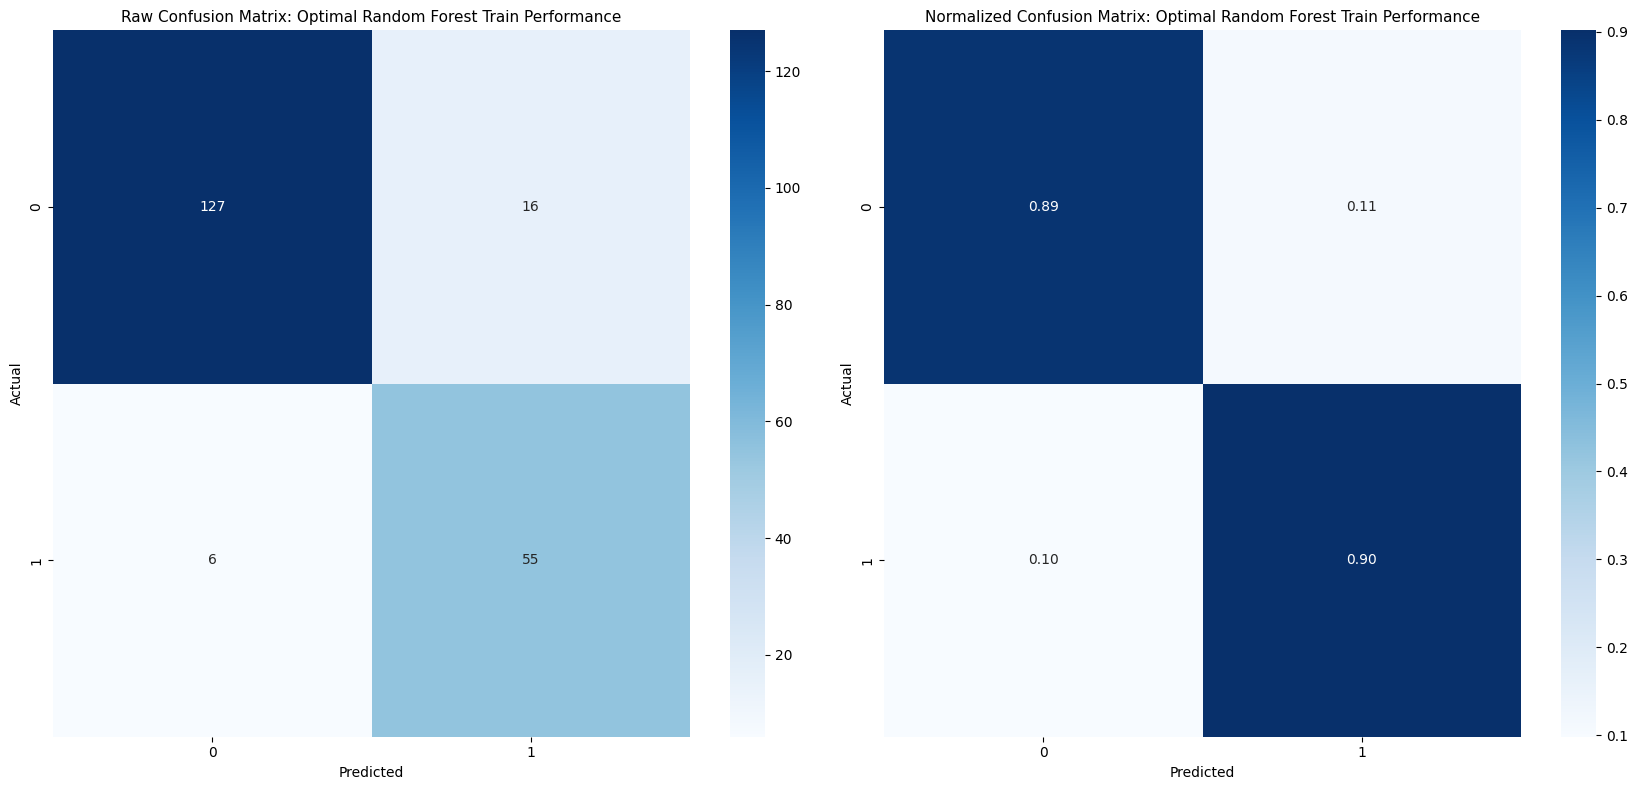

In [134]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, bagged_rf_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, bagged_rf_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Random Forest Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Random Forest Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [135]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {bagged_rf_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, bagged_rf_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8372

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        49
         1.0       0.78      0.90      0.84        20

    accuracy                           0.90        69
   macro avg       0.87      0.90      0.88        69
weighted avg       0.91      0.90      0.90        69



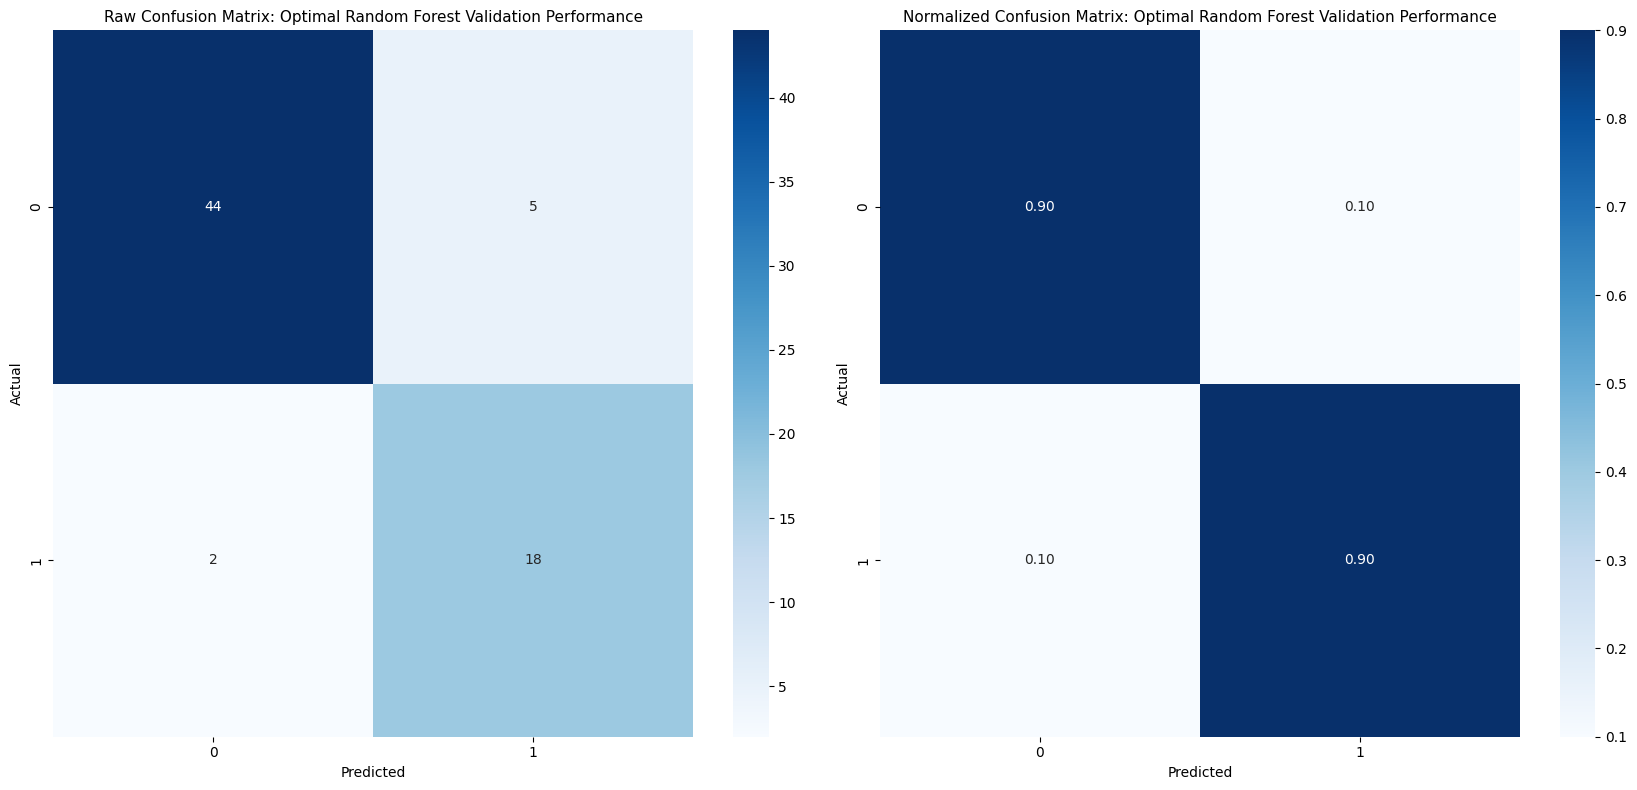

In [136]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, bagged_rf_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, bagged_rf_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Random Forest Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Random Forest Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [137]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
bagged_rf_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, bagged_rf_optimal.predict(X_preprocessed_train))
bagged_rf_optimal_train['model'] = ['bagged_rf_optimal'] * 5
bagged_rf_optimal_train['set'] = ['train'] * 5
print('Optimal Random Forest Train Performance Metrics: ')
display(bagged_rf_optimal_train)


Optimal Random Forest Train Performance Metrics: 


metric_name  metric_value              model    set
0    Accuracy      0.892157  bagged_rf_optimal  train
1   Precision      0.774648  bagged_rf_optimal  train
2      Recall      0.901639  bagged_rf_optimal  train
3          F1      0.833333  bagged_rf_optimal  train
4       AUROC      0.894876  bagged_rf_optimal  train

In [138]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
bagged_rf_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, bagged_rf_optimal.predict(X_preprocessed_validation))
bagged_rf_optimal_validation['model'] = ['bagged_rf_optimal'] * 5
bagged_rf_optimal_validation['set'] = ['validation'] * 5
print('Optimal Random Forest Validation Performance Metrics: ')
display(bagged_rf_optimal_validation)


Optimal Random Forest Validation Performance Metrics: 


metric_name  metric_value              model         set
0    Accuracy      0.898551  bagged_rf_optimal  validation
1   Precision      0.782609  bagged_rf_optimal  validation
2      Recall      0.900000  bagged_rf_optimal  validation
3          F1      0.837209  bagged_rf_optimal  validation
4       AUROC      0.898980  bagged_rf_optimal  validation

In [139]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(bagged_rf_optimal, 
            os.path.join("..", MODELS_PATH, "bagged_model_random_forest_optimal.pkl"))


['..\\models\\bagged_model_random_forest_optimal.pkl']

### 1.7.2 Extra Trees <a class="anchor" id="1.7.2"></a>

[Extra Trees (Extremely Randomized Trees)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) is a variation of Random Forest that introduces more randomness into tree construction to improve generalization. Similar to Random Forest, it builds multiple decision trees on bootstrapped datasets, but it differs in how it determines splits—rather than selecting the best split based on information gain or Gini impurity, Extra Trees splits randomly at each node from a subset of features. This extra randomness can prevent overfitting and make the model more robust to small variations in data. The key advantages of Extra Trees include its speed, as it does not need to search for the best split at each node, and its ability to handle large datasets efficiently. However, since it relies on random splits, it may not perform as well as Random Forest on some datasets, especially when strong feature interactions exist. Additionally, its randomness can make the model harder to interpret and tune effectively.

1. The [extra trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between gini and entropy
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of base estimators in the ensemble made to vary between 100 and 200
3. A special hyperparameter (<span style="color: #FF0000">class_weight</span> = balanced) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = entropy
    * <span style="color: #FF0000">max_depth</span> = 6
    * <span style="color: #FF0000">min_samples_leaf</span> = 10
    * <span style="color: #FF0000">n_estimators</span> = 200
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8921
    * **Precision** = 0.7746
    * **Recall** = 0.9016
    * **F1 Score** = 0.8333
    * **AUROC** = 0.8948
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8985
    * **Precision** = 0.7826
    * **Recall** = 0.9000
    * **F1 Score** = 0.8372
    * **AUROC** = 0.8989
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [140]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [141]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
bagged_et_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('bagged_et_model', ExtraTreesClassifier(class_weight='balanced', 
                                               random_state=987654321))
])


In [142]:
##################################
# Defining hyperparameter grid
##################################
bagged_et_hyperparameter_grid = {
    'bagged_et_model__criterion': ['gini', 'entropy'],
    'bagged_et_model__max_depth': [3, 6],
    'bagged_et_model__min_samples_leaf': [5, 10],
    'bagged_et_model__n_estimators': [100, 200]
}


In [143]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [144]:
##################################
# Performing Grid Search with cross-validation
##################################
bagged_et_grid_search = GridSearchCV(
    estimator=bagged_et_pipeline,
    param_grid=bagged_et_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [145]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [146]:
##################################
# Fitting GridSearchCV
##################################
bagged_et_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('bagged_et_model',
                                        ExtraTreesClassifier(class_weight='balanced',
                                                             random_state=987654321))]),
             n_jobs=-1,
             param_grid={'bagged_et_model__criterion': ['gini', 'entropy'],
                         'bagged_et_model__max_depth': [3, 6],
                         'bagged_et_model__min_samples_leaf': [5, 10],
                         'bagged_et_model__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [147]:
##################################
# Identifying the best model
##################################
bagged_et_optimal = bagged_et_grid_search.best_estimator_


In [148]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
bagged_et_optimal_f1_cv = bagged_et_grid_search.best_score_
bagged_et_optimal_f1_train = f1_score(y_preprocessed_train_encoded, bagged_et_optimal.predict(X_preprocessed_train))
bagged_et_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, bagged_et_optimal.predict(X_preprocessed_validation))


In [149]:
##################################
# Identifying the optimal model
##################################
print('Best Bagged Model – Extra Trees: ')
print(f"Best Extra Trees Hyperparameters: {bagged_et_grid_search.best_params_}")


Best Bagged Model – Extra Trees: 
Best Extra Trees Hyperparameters: {'bagged_et_model__criterion': 'entropy', 'bagged_et_model__max_depth': 6, 'bagged_et_model__min_samples_leaf': 10, 'bagged_et_model__n_estimators': 200}


In [150]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {bagged_et_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {bagged_et_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, bagged_et_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8101
F1 Score on Training Data: 0.8333

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       143
         1.0       0.77      0.90      0.83        61

    accuracy                           0.89       204
   macro avg       0.86      0.89      0.88       204
weighted avg       0.90      0.89      0.89       204



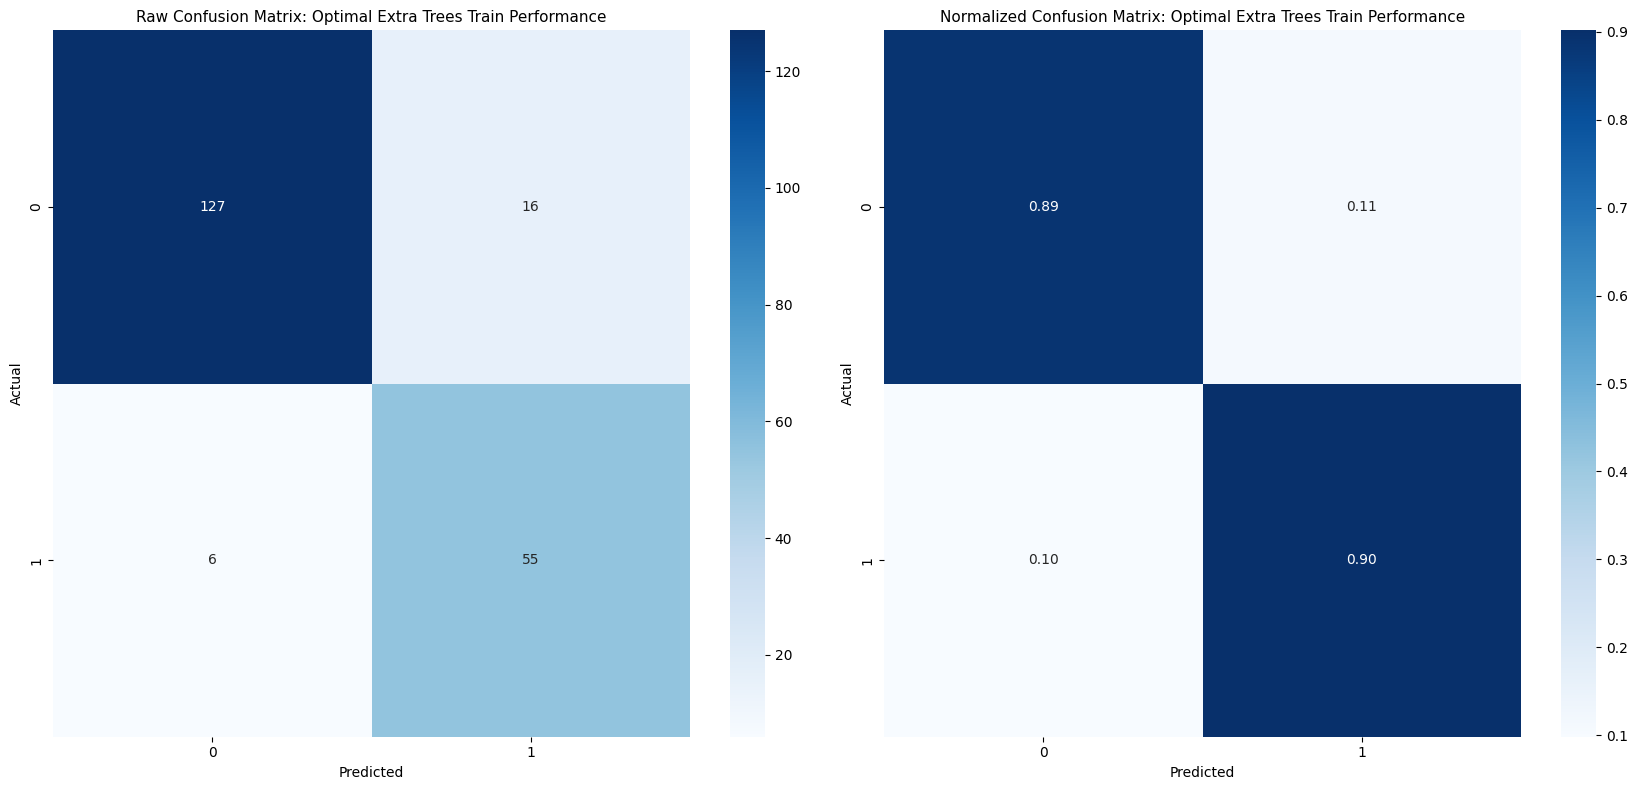

In [151]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, bagged_et_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, bagged_et_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Extra Trees Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Extra Trees Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [152]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {bagged_et_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, bagged_et_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8372

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        49
         1.0       0.78      0.90      0.84        20

    accuracy                           0.90        69
   macro avg       0.87      0.90      0.88        69
weighted avg       0.91      0.90      0.90        69



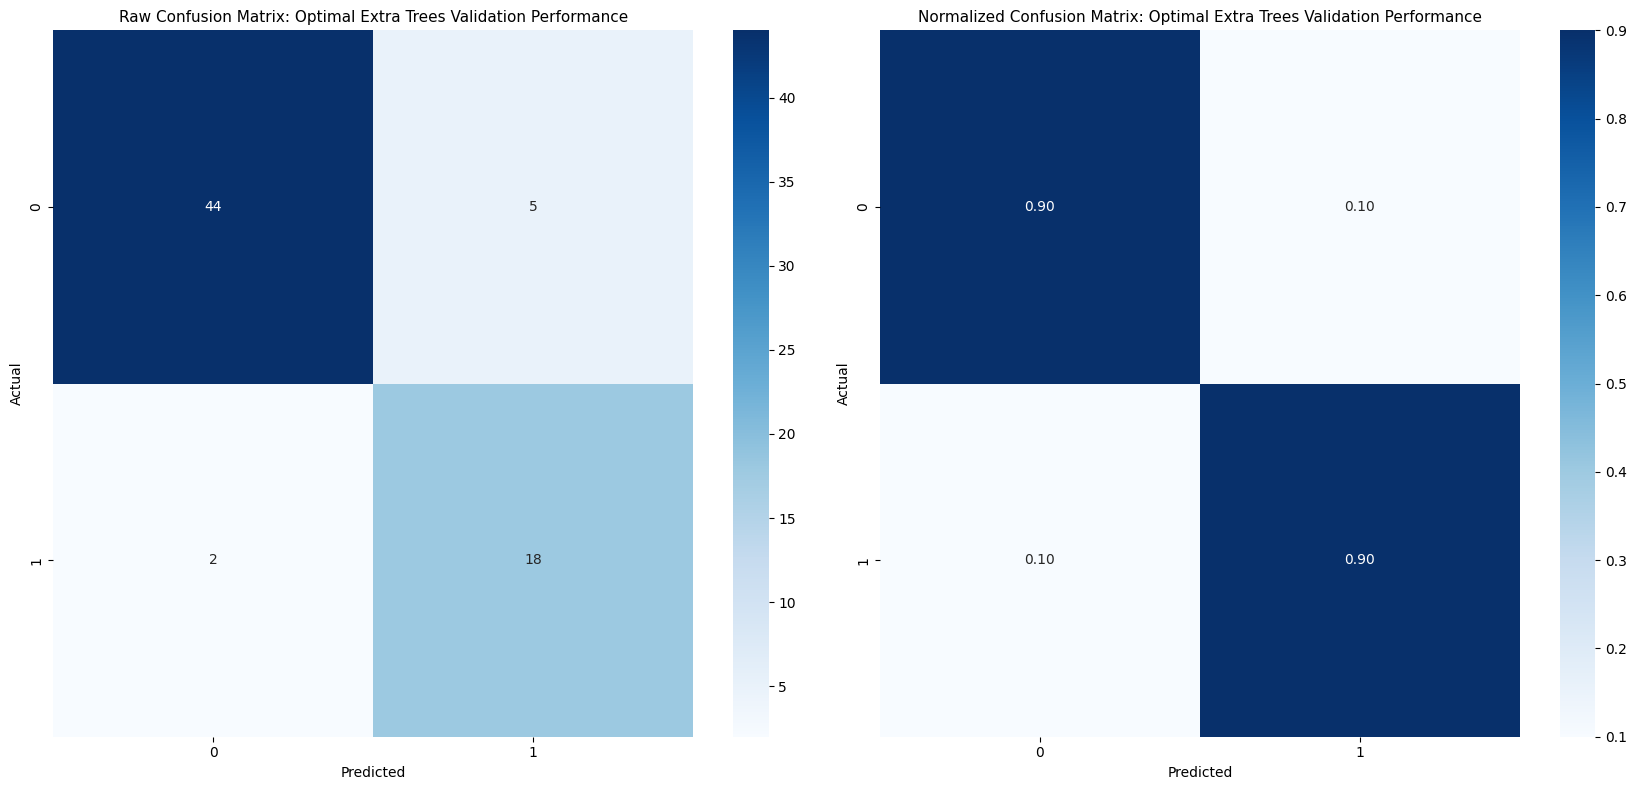

In [153]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, bagged_et_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, bagged_et_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Extra Trees Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Extra Trees Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [154]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
bagged_et_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, bagged_et_optimal.predict(X_preprocessed_train))
bagged_et_optimal_train['model'] = ['bagged_et_optimal'] * 5
bagged_et_optimal_train['set'] = ['train'] * 5
print('Optimal Extra Trees Train Performance Metrics: ')
display(bagged_et_optimal_train)


Optimal Extra Trees Train Performance Metrics: 


metric_name  metric_value              model    set
0    Accuracy      0.892157  bagged_et_optimal  train
1   Precision      0.774648  bagged_et_optimal  train
2      Recall      0.901639  bagged_et_optimal  train
3          F1      0.833333  bagged_et_optimal  train
4       AUROC      0.894876  bagged_et_optimal  train

In [155]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
bagged_et_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, bagged_et_optimal.predict(X_preprocessed_validation))
bagged_et_optimal_validation['model'] = ['bagged_et_optimal'] * 5
bagged_et_optimal_validation['set'] = ['validation'] * 5
print('Optimal Extra Trees Validation Performance Metrics: ')
display(bagged_et_optimal_validation)


Optimal Extra Trees Validation Performance Metrics: 


metric_name  metric_value              model         set
0    Accuracy      0.898551  bagged_et_optimal  validation
1   Precision      0.782609  bagged_et_optimal  validation
2      Recall      0.900000  bagged_et_optimal  validation
3          F1      0.837209  bagged_et_optimal  validation
4       AUROC      0.898980  bagged_et_optimal  validation

In [156]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(bagged_et_optimal, 
            os.path.join("..", MODELS_PATH, "bagged_model_extra_trees_optimal.pkl"))


['..\\models\\bagged_model_extra_trees_optimal.pkl']

### 1.7.3 Bagged Decision Trees <a class="anchor" id="1.7.3"></a>

[Bagged](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) is an ensemble method that reduces overfitting by training multiple decision trees on different bootstrap samples and aggregating their predictions. Unlike Random Forest, all features are considered when finding the best split at each node, making it less random but still improving stability compared to a single decision tree. The process involves drawing multiple random subsets of the training data (with replacement), training a decision tree on each subset, and combining the predictions using majority voting for classification. This technique helps to reduce variance and prevent overfitting, leading to more stable and accurate predictions. The main advantage of Bagged Decision Trees is that they perform well on complex datasets without requiring deep tuning. However, the downside is that they require significant computational power and memory, as multiple trees must be trained and stored. Additionally, unlike boosting methods, bagging does not inherently improve bias, meaning the performance is still dependent on the base decision tree's predictive power.

1. The [bagging classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) models from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> and <mark style="background-color: #CCECFF"><b>sklearn.tree</b></mark> Python library APIs were implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">criterion</span> = function to measure the quality of a split made to vary between gini and entropy
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of base estimators in the ensemble made to vary between 100 and 200
3. A special hyperparameter (<span style="color: #FF0000">class_weight</span> = balanced) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">criterion</span> = gini
    * <span style="color: #FF0000">max_depth</span> = 6
    * <span style="color: #FF0000">min_samples_leaf</span> = 5
    * <span style="color: #FF0000">n_estimators</span> = 200
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9019
    * **Precision** = 0.7971
    * **Recall** = 0.9016
    * **F1 Score** = 0.8461
    * **AUROC** = 0.9018
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9130
    * **Precision** = 0.8181
    * **Recall** = 0.9000
    * **F1 Score** = 0.8571
    * **AUROC** = 0.9091
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [157]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [158]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
bagged_bdt_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('bagged_bdt_model', BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced', 
                                                                            random_state=987654321),
                                           random_state=987654321))
])


In [159]:
##################################
# Defining hyperparameter grid
##################################
bagged_bdt_hyperparameter_grid = {
    'bagged_bdt_model__estimator__criterion': ['gini', 'entropy'],
    'bagged_bdt_model__estimator__max_depth': [3, 6],
    'bagged_bdt_model__estimator__min_samples_leaf': [5, 10],
    'bagged_bdt_model__n_estimators': [100, 200]
}


In [160]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [161]:
##################################
# Performing Grid Search with cross-validation
##################################
bagged_bdt_grid_search = GridSearchCV(
    estimator=bagged_bdt_pipeline,
    param_grid=bagged_bdt_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [162]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [163]:
##################################
# Fitting GridSearchCV
##################################
bagged_bdt_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])...
                                        BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                           random_state=987654321),
                                                          random_state=987654321))]),
             n_jobs=-1,
             param_grid={'bagged_bdt_model__estimator__criterion': ['gini',
                                                                    'entropy'],
                         'bagged_bdt_model__estimator__max_depth': [3, 6],
                         'bagged_bdt_model__estimator__min_samples_leaf': [5,
                                                                           10],
                         'bagged_bdt_model__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [164]:
##################################
# Identifying the best model
##################################
bagged_bdt_optimal = bagged_bdt_grid_search.best_estimator_


In [165]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
bagged_bdt_optimal_f1_cv = bagged_bdt_grid_search.best_score_
bagged_bdt_optimal_f1_train = f1_score(y_preprocessed_train_encoded, bagged_bdt_optimal.predict(X_preprocessed_train))
bagged_bdt_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, bagged_bdt_optimal.predict(X_preprocessed_validation))


In [166]:
##################################
# Identifying the optimal model
##################################
print('Best Bagged Model – Bagged Decision Trees: ')
print(f"Best Bagged Decision Trees Hyperparameters: {bagged_bdt_grid_search.best_params_}")


Best Bagged Model – Bagged Decision Trees: 
Best Bagged Decision Trees Hyperparameters: {'bagged_bdt_model__estimator__criterion': 'gini', 'bagged_bdt_model__estimator__max_depth': 6, 'bagged_bdt_model__estimator__min_samples_leaf': 5, 'bagged_bdt_model__n_estimators': 200}


In [167]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {bagged_bdt_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {bagged_bdt_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, bagged_bdt_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8287
F1 Score on Training Data: 0.8462

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       143
         1.0       0.80      0.90      0.85        61

    accuracy                           0.90       204
   macro avg       0.88      0.90      0.89       204
weighted avg       0.91      0.90      0.90       204



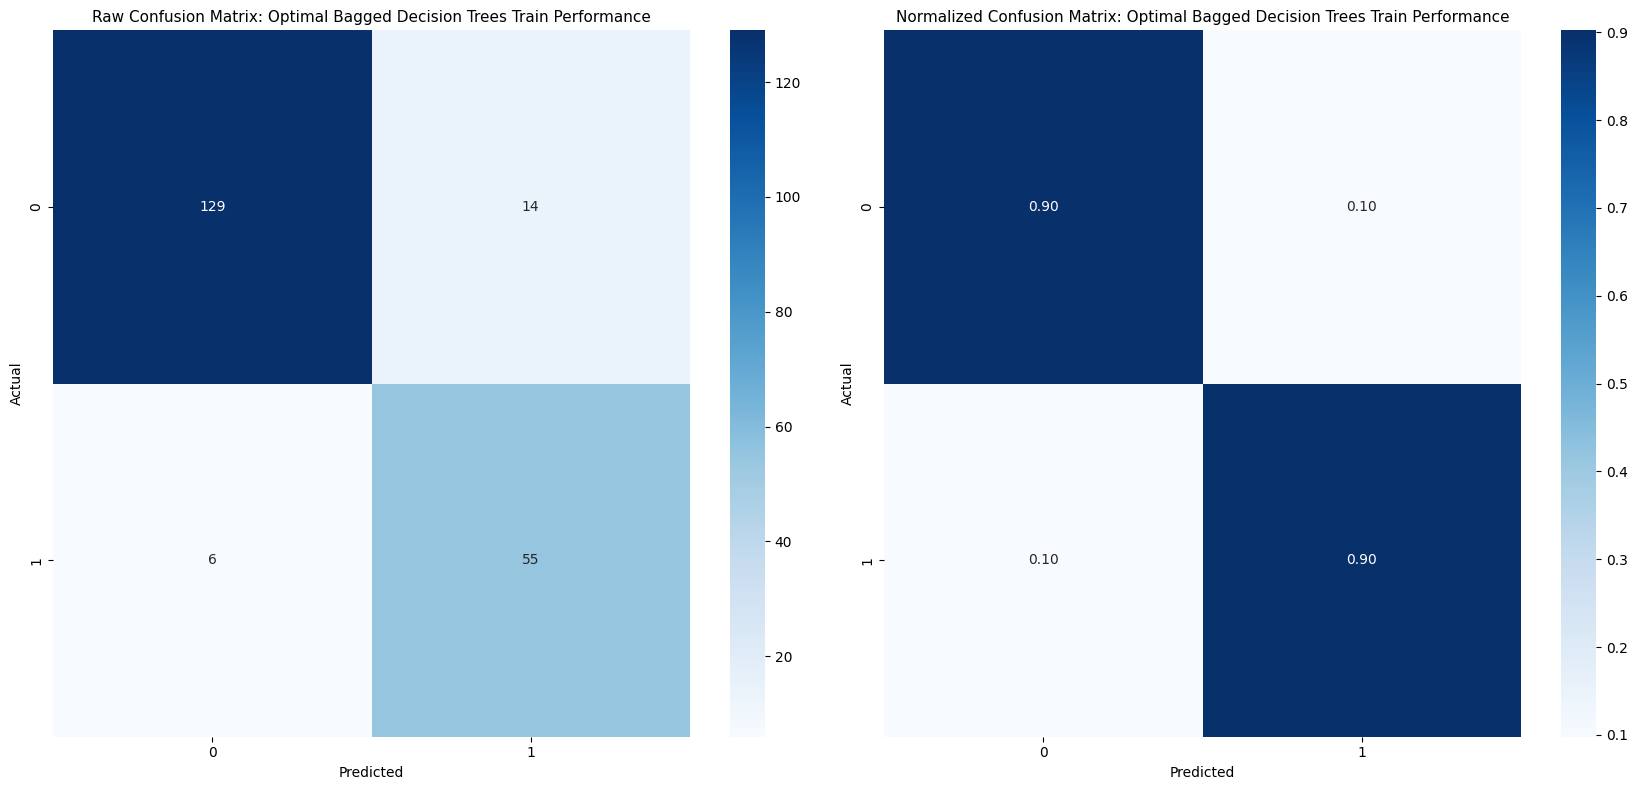

In [168]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, bagged_bdt_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, bagged_bdt_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Bagged Decision Trees Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Bagged Decision Trees Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [169]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {bagged_bdt_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, bagged_bdt_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



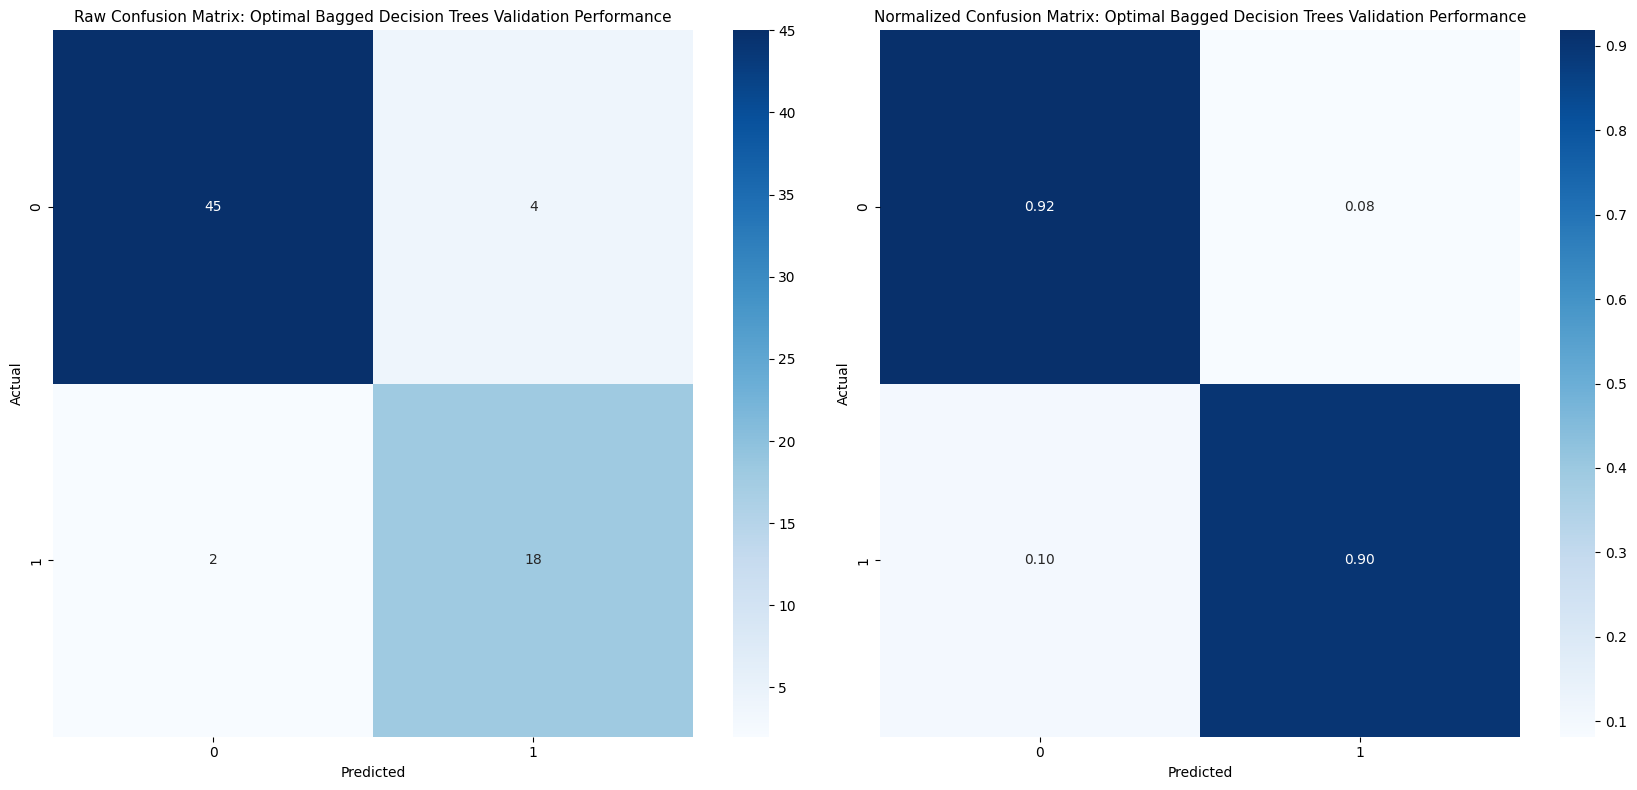

In [170]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, bagged_bdt_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, bagged_bdt_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Bagged Decision Trees Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Bagged Decision Trees Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [171]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
bagged_bdt_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, bagged_bdt_optimal.predict(X_preprocessed_train))
bagged_bdt_optimal_train['model'] = ['bagged_bdt_optimal'] * 5
bagged_bdt_optimal_train['set'] = ['train'] * 5
print('Optimal Bagged Decision Trees Train Performance Metrics: ')
display(bagged_bdt_optimal_train)


Optimal Bagged Decision Trees Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy      0.901961  bagged_bdt_optimal  train
1   Precision      0.797101  bagged_bdt_optimal  train
2      Recall      0.901639  bagged_bdt_optimal  train
3          F1      0.846154  bagged_bdt_optimal  train
4       AUROC      0.901869  bagged_bdt_optimal  train

In [172]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
bagged_bdt_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, bagged_bdt_optimal.predict(X_preprocessed_validation))
bagged_bdt_optimal_validation['model'] = ['bagged_bdt_optimal'] * 5
bagged_bdt_optimal_validation['set'] = ['validation'] * 5
print('Optimal Bagged Decision Trees Validation Performance Metrics: ')
display(bagged_bdt_optimal_validation)


Optimal Bagged Decision Trees Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.913043  bagged_bdt_optimal  validation
1   Precision      0.818182  bagged_bdt_optimal  validation
2      Recall      0.900000  bagged_bdt_optimal  validation
3          F1      0.857143  bagged_bdt_optimal  validation
4       AUROC      0.909184  bagged_bdt_optimal  validation

In [173]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(bagged_bdt_optimal, 
            os.path.join("..", MODELS_PATH, "bagged_model_bagged_decision_trees_optimal.pkl"))


['..\\models\\bagged_model_bagged_decision_trees_optimal.pkl']

### 1.7.4 Bagged Logistic Regression <a class="anchor" id="1.7.4"></a>

[Bagged](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) applies bootstrap aggregation (bagging) to logistic regression, improving its stability and generalization. Logistic regression is inherently a high-bias model, meaning it can underperform on complex, non-linear data. Bagging helps by training multiple logistic regression models on different bootstrap samples and averaging their probability outputs for final classification. This reduces variance and improves robustness, especially when dealing with small datasets prone to fluctuations. The main advantage is that it stabilizes logistic regression by reducing overfitting without adding significant complexity. Additionally, it works well when the relationship between features and the target variable is approximately linear. However, since logistic regression is a weak learner, bagging does not dramatically boost performance on highly non-linear problems. It is also computationally expensive compared to a single logistic regression model, and unlike boosting, it does not correct the inherent bias of logistic regression.

1. The [bagging classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) models from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> and <mark style="background-color: #CCECFF"><b>sklearn.linear_model</b></mark> Python library APIs were implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength made to vary between 0.1 and 1.0
    * <span style="color: #FF0000">penalty</span> = penalty norm made to vary between l1 and l2
    * <span style="color: #FF0000">solver</span> = algorithm used in the optimization problem made to vary between liblinear and saga
    * <span style="color: #FF0000">n_estimators</span> = number of base estimators in the ensemble made to vary between 100 and 200
3. A special hyperparameter (<span style="color: #FF0000">class_weight</span> = balanced) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1.0
    * <span style="color: #FF0000">penalty</span> = l1
    * <span style="color: #FF0000">solver</span> = liblinear
    * <span style="color: #FF0000">n_estimators</span> = 200
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8921
    * **Precision** = 0.7746
    * **Recall** = 0.9016
    * **F1 Score** = 0.8333
    * **AUROC** = 0.8948
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8985
    * **Precision** = 0.7826
    * **Recall** = 0.9000
    * **F1 Score** = 0.8372
    * **AUROC** = 0.8989
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [174]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [175]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
bagged_blr_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('bagged_blr_model', BaggingClassifier(estimator=LogisticRegression(class_weight='balanced', 
                                                                        random_state=987654321),
                                           random_state=987654321))
])


In [176]:
##################################
# Defining hyperparameter grid
##################################
bagged_blr_hyperparameter_grid = {
    'bagged_blr_model__estimator__C': [0.1, 1.0],
    'bagged_blr_model__estimator__penalty': ['l1', 'l2'],
    'bagged_blr_model__estimator__solver': ['liblinear', 'saga'],
    'bagged_blr_model__n_estimators': [100, 200]
}


In [177]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [178]:
##################################
# Performing Grid Search with cross-validation
##################################
bagged_blr_grid_search = GridSearchCV(
    estimator=bagged_blr_pipeline,
    param_grid=bagged_blr_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [179]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [180]:
##################################
# Fitting GridSearchCV
##################################
bagged_blr_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])...
                                        BaggingClassifier(estimator=LogisticRegression(class_weight='balanced',
                                                                                       random_state=987654321),
                                                          random_state=987654321))]),
             n_jobs=-1,
             param_grid={'bagged_blr_model__estimator__C': [0.1, 1.0],
                         'bagged_blr_model__estimator__penalty': ['l1', 'l2'],
                         'bagged_blr_model__estimator__solver': ['liblinear',
                                                                 'saga'],
                         'bagged_blr_model__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [181]:
##################################
# Identifying the best model
##################################
bagged_blr_optimal = bagged_blr_grid_search.best_estimator_


In [182]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
bagged_blr_optimal_f1_cv = bagged_blr_grid_search.best_score_
bagged_blr_optimal_f1_train = f1_score(y_preprocessed_train_encoded, bagged_blr_optimal.predict(X_preprocessed_train))
bagged_blr_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, bagged_blr_optimal.predict(X_preprocessed_validation))


In [183]:
##################################
# Identifying the optimal model
##################################
print('Best Bagged Model – Bagged Logistic Regression: ')
print(f"Best Bagged Logistic Regression Hyperparameters: {bagged_blr_grid_search.best_params_}")


Best Bagged Model – Bagged Logistic Regression: 
Best Bagged Logistic Regression Hyperparameters: {'bagged_blr_model__estimator__C': 1.0, 'bagged_blr_model__estimator__penalty': 'l1', 'bagged_blr_model__estimator__solver': 'liblinear', 'bagged_blr_model__n_estimators': 200}


In [184]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {bagged_blr_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {bagged_blr_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, bagged_blr_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8213
F1 Score on Training Data: 0.8333

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       143
         1.0       0.77      0.90      0.83        61

    accuracy                           0.89       204
   macro avg       0.86      0.89      0.88       204
weighted avg       0.90      0.89      0.89       204



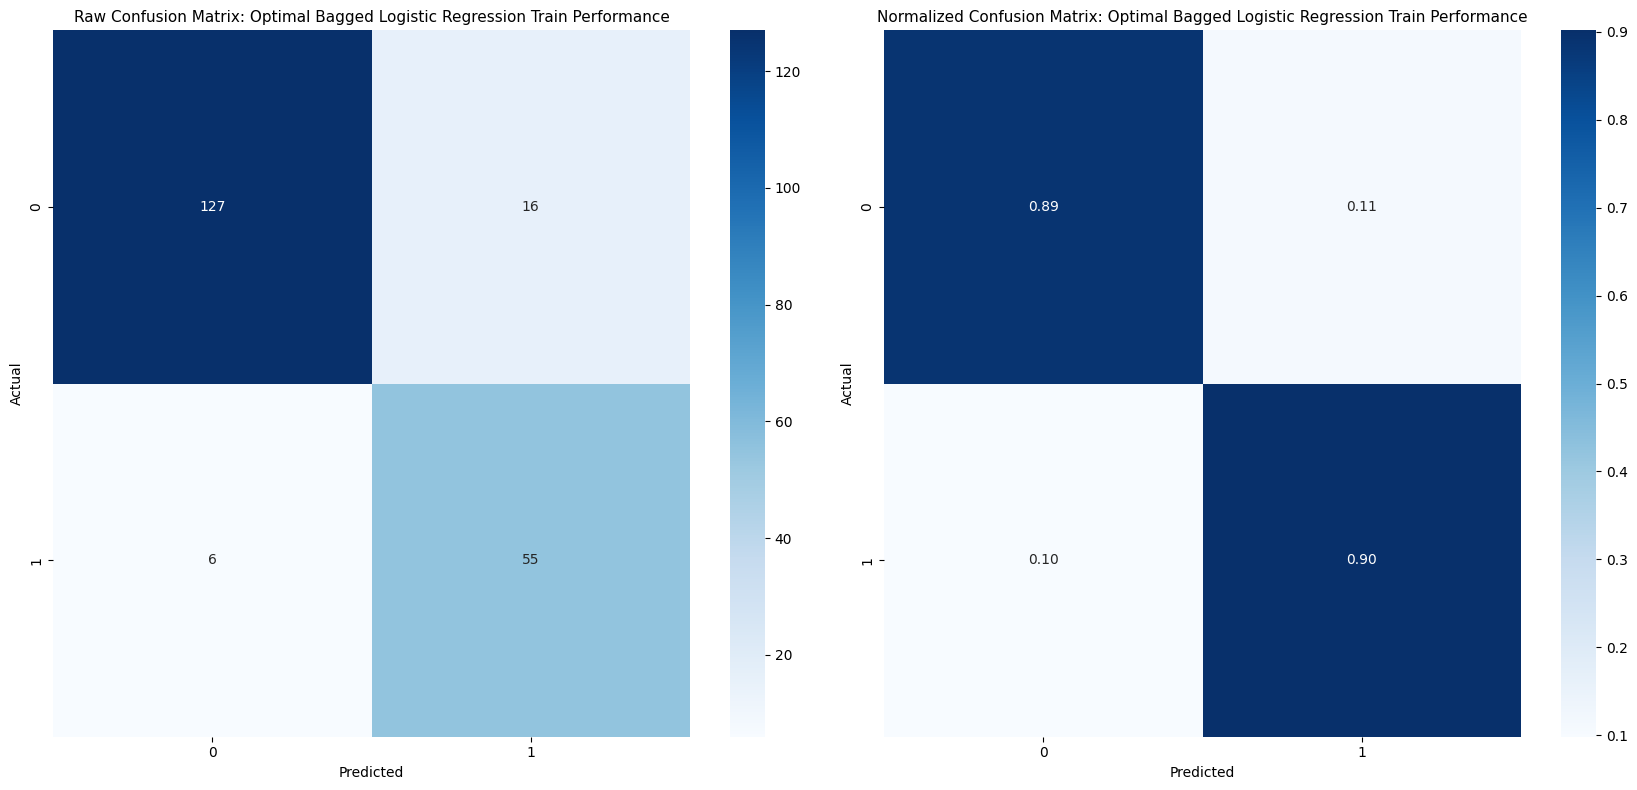

In [185]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, bagged_blr_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, bagged_blr_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Bagged Logistic Regression Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Bagged Logistic Regression Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [186]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {bagged_blr_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, bagged_blr_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8372

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        49
         1.0       0.78      0.90      0.84        20

    accuracy                           0.90        69
   macro avg       0.87      0.90      0.88        69
weighted avg       0.91      0.90      0.90        69



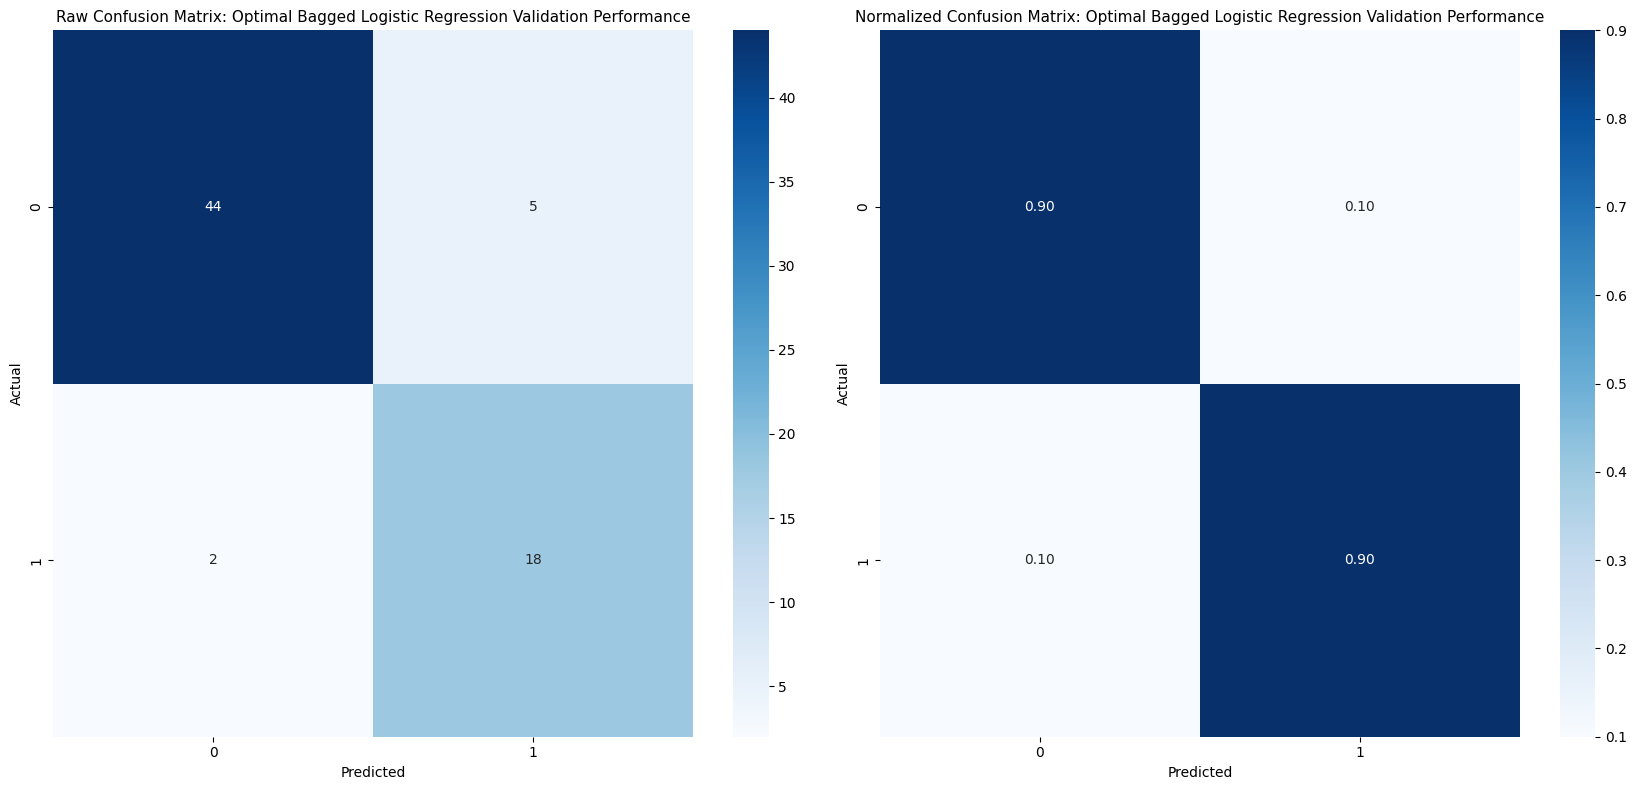

In [187]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, bagged_blr_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, bagged_blr_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Bagged Logistic Regression Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Bagged Logistic Regression Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [188]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
bagged_blr_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, bagged_blr_optimal.predict(X_preprocessed_train))
bagged_blr_optimal_train['model'] = ['bagged_blr_optimal'] * 5
bagged_blr_optimal_train['set'] = ['train'] * 5
print('Optimal Bagged Logistic Regression Train Performance Metrics: ')
display(bagged_blr_optimal_train)


Optimal Bagged Logistic Regression Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy      0.892157  bagged_blr_optimal  train
1   Precision      0.774648  bagged_blr_optimal  train
2      Recall      0.901639  bagged_blr_optimal  train
3          F1      0.833333  bagged_blr_optimal  train
4       AUROC      0.894876  bagged_blr_optimal  train

In [189]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
bagged_blr_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, bagged_blr_optimal.predict(X_preprocessed_validation))
bagged_blr_optimal_validation['model'] = ['bagged_blr_optimal'] * 5
bagged_blr_optimal_validation['set'] = ['validation'] * 5
print('Optimal Bagged Logistic Regression Validation Performance Metrics: ')
display(bagged_blr_optimal_validation)


Optimal Bagged Logistic Regression Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.898551  bagged_blr_optimal  validation
1   Precision      0.782609  bagged_blr_optimal  validation
2      Recall      0.900000  bagged_blr_optimal  validation
3          F1      0.837209  bagged_blr_optimal  validation
4       AUROC      0.898980  bagged_blr_optimal  validation

In [190]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(bagged_blr_optimal, 
            os.path.join("..", MODELS_PATH, "bagged_model_bagged_logistic_regression_optimal.pkl"))


['..\\models\\bagged_model_bagged_logistic_regression_optimal.pkl']

### 1.7.5 Bagged Support Vector Machine <a class="anchor" id="1.7.5"></a>

[Bagged](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) is an ensemble method that applies bagging to multiple SVM classifiers trained on different bootstrap samples, reducing variance while maintaining SVM's strong classification capabilities. SVM works by finding an optimal decision boundary (hyperplane) that maximizes the margin between different classes. However, a single SVM can be sensitive to small changes in data, especially when working with noisy datasets. By training multiple SVM models on different subsets and aggregating their predictions (majority voting), bagging stabilizes the decision boundary and enhances robustness. This approach is particularly useful when dealing with high-dimensional datasets with complex relationships. The key advantages include improved generalization, reduced overfitting, and better handling of noisy data. However, SVM is computationally intensive, and bagging increases the overall training time significantly, especially for large datasets. Additionally, combining multiple SVM models makes interpretation difficult, and performance gains may not always justify the added computational cost.

1. The [bagging classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [support vector machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) models from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> and <mark style="background-color: #CCECFF"><b>sklearn.svm</b></mark> Python library APIs were implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">C</span> = inverse of regularization strength made to vary between 0.1 and 1.0
    * <span style="color: #FF0000">kernel</span> = kernel type to be used in the algorithm made to vary between linear and rbf
    * <span style="color: #FF0000">gamma</span> = kernel coefficient made to vary between scale and auto
    * <span style="color: #FF0000">n_estimators</span> = number of base estimators in the ensemble made to vary between 100 and 200
3. A special hyperparameter (<span style="color: #FF0000">class_weight</span> = balanced) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">C</span> = 1.0
    * <span style="color: #FF0000">kernel</span> = linear
    * <span style="color: #FF0000">gamma</span> = scale
    * <span style="color: #FF0000">n_estimators</span> = 100
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9068
    * **Precision** = 0.8088
    * **Recall** = 0.9016
    * **F1 Score** = 0.8527
    * **AUROC** = 0.9053
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9130
    * **Precision** = 0.8181
    * **Recall** = 0.9000
    * **F1 Score** = 0.8571
    * **AUROC** = 0.9091
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [191]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [192]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
bagged_bsvm_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('bagged_bsvm_model', BaggingClassifier(estimator=SVC(class_weight='balanced', 
                                                          random_state=987654321),
                                            random_state=987654321))
])


In [193]:
##################################
# Defining hyperparameter grid
##################################
bagged_bsvm_hyperparameter_grid = {
    'bagged_bsvm_model__estimator__C': [0.1, 1.0],
    'bagged_bsvm_model__estimator__kernel': ['linear', 'rbf'],
    'bagged_bsvm_model__estimator__gamma': ['scale','auto'],
    'bagged_bsvm_model__n_estimators': [100, 200]
}


In [194]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [195]:
##################################
# Performing Grid Search with cross-validation
##################################
bagged_bsvm_grid_search = GridSearchCV(
    estimator=bagged_bsvm_pipeline,
    param_grid=bagged_bsvm_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [196]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [197]:
##################################
# Fitting GridSearchCV
##################################
bagged_bsvm_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])...
                                        BaggingClassifier(estimator=SVC(class_weight='balanced',
                                                                        random_state=987654321),
                                                          random_state=987654321))]),
             n_jobs=-1,
             param_grid={'bagged_bsvm_model__estimator__C': [0.1, 1.0],
                         'bagged_bsvm_model__estimator__gamma': ['scale',
                                                                 'auto'],
                         'bagged_bsvm_model__estimator__kernel': ['linear',
                                                                  'rbf'],
                         'bagged_bsvm_model__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [198]:
##################################
# Identifying the best model
##################################
bagged_bsvm_optimal = bagged_bsvm_grid_search.best_estimator_


In [199]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
bagged_bsvm_optimal_f1_cv = bagged_bsvm_grid_search.best_score_
bagged_bsvm_optimal_f1_train = f1_score(y_preprocessed_train_encoded, bagged_bsvm_optimal.predict(X_preprocessed_train))
bagged_bsvm_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, bagged_bsvm_optimal.predict(X_preprocessed_validation))


In [200]:
##################################
# Identifying the optimal model
##################################
print('Best Bagged Model – Bagged Support Vector Machine: ')
print(f"Best Bagged Support Vector Machine Hyperparameters: {bagged_bsvm_grid_search.best_params_}")


Best Bagged Model – Bagged Support Vector Machine: 
Best Bagged Support Vector Machine Hyperparameters: {'bagged_bsvm_model__estimator__C': 1.0, 'bagged_bsvm_model__estimator__gamma': 'scale', 'bagged_bsvm_model__estimator__kernel': 'linear', 'bagged_bsvm_model__n_estimators': 100}


In [201]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {bagged_bsvm_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {bagged_bsvm_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, bagged_bsvm_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8209
F1 Score on Training Data: 0.8527

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       143
         1.0       0.81      0.90      0.85        61

    accuracy                           0.91       204
   macro avg       0.88      0.91      0.89       204
weighted avg       0.91      0.91      0.91       204



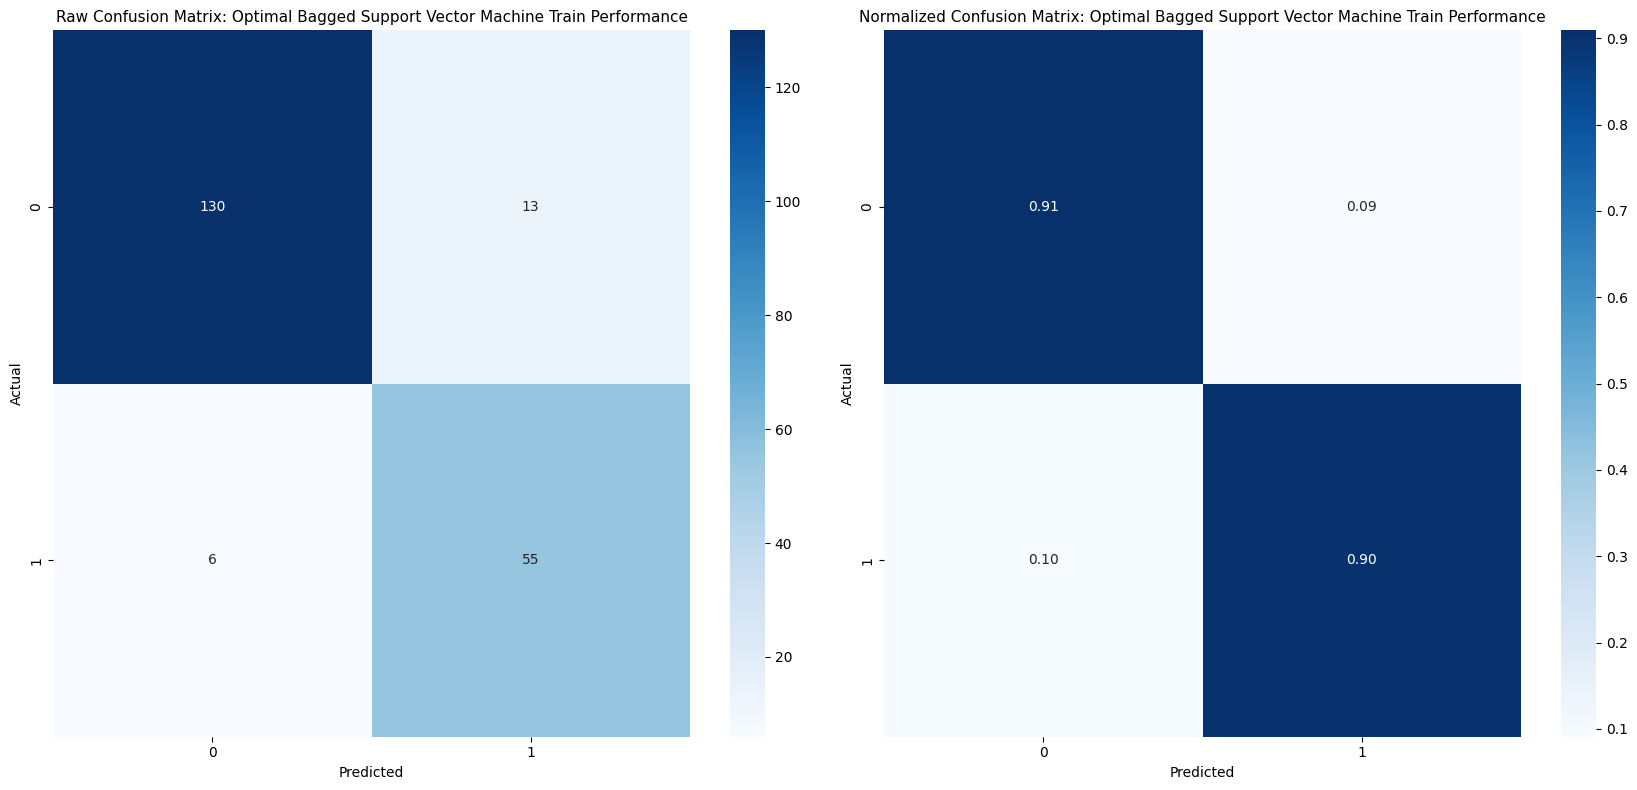

In [202]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, bagged_bsvm_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, bagged_bsvm_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Bagged Support Vector Machine Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Bagged Support Vector Machine Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [203]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {bagged_bsvm_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, bagged_bsvm_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



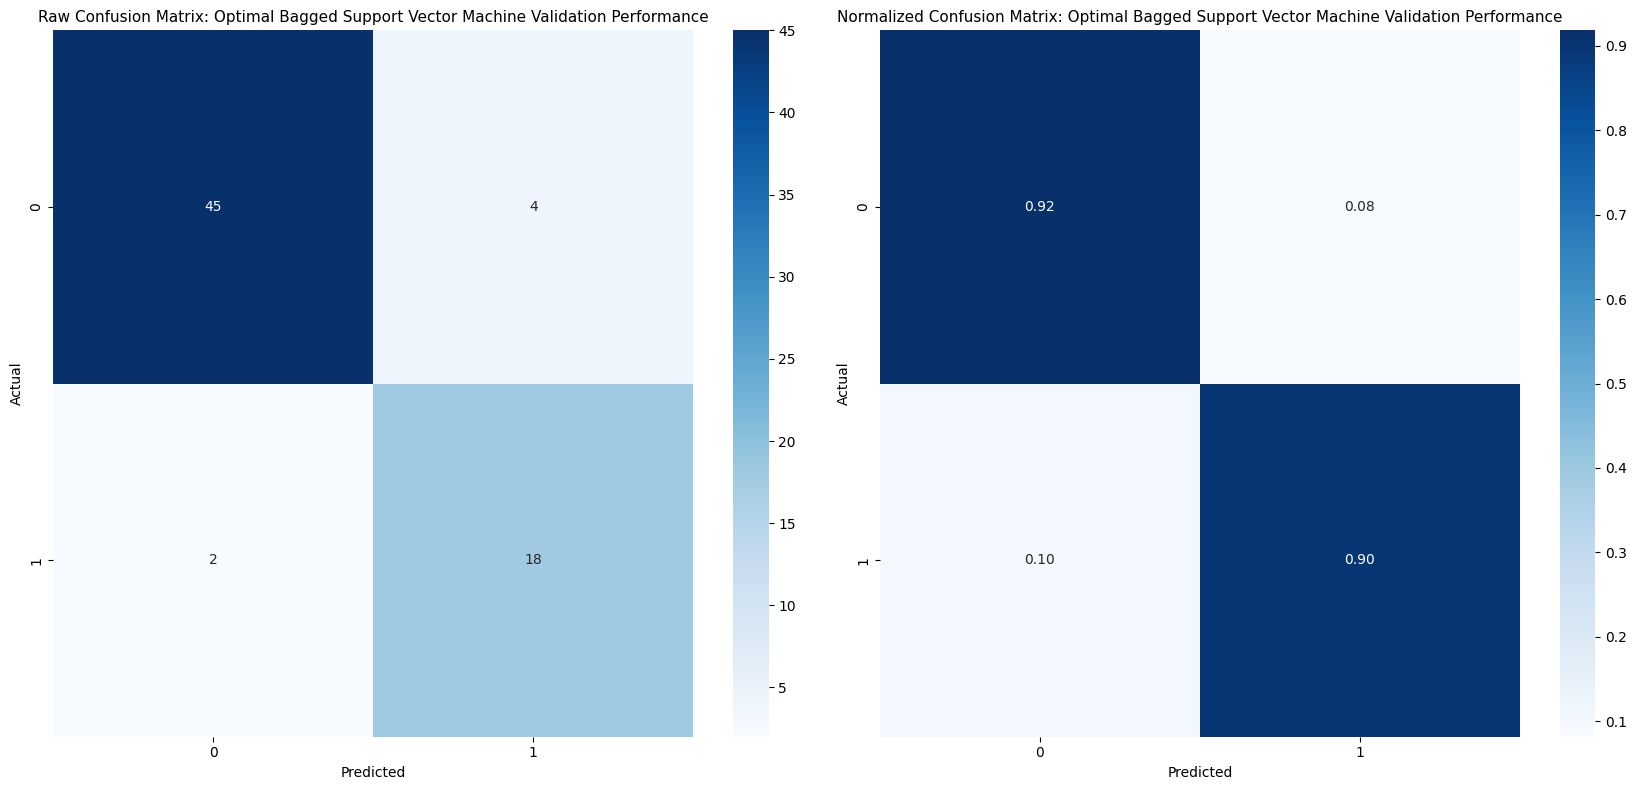

In [204]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, bagged_bsvm_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, bagged_bsvm_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Bagged Support Vector Machine Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Bagged Support Vector Machine Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [205]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
bagged_bsvm_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, bagged_bsvm_optimal.predict(X_preprocessed_train))
bagged_bsvm_optimal_train['model'] = ['bagged_bsvm_optimal'] * 5
bagged_bsvm_optimal_train['set'] = ['train'] * 5
print('Optimal Bagged Support Vector Machine Train Performance Metrics: ')
display(bagged_bsvm_optimal_train)


Optimal Bagged Support Vector Machine Train Performance Metrics: 


metric_name  metric_value                model    set
0    Accuracy      0.906863  bagged_bsvm_optimal  train
1   Precision      0.808824  bagged_bsvm_optimal  train
2      Recall      0.901639  bagged_bsvm_optimal  train
3          F1      0.852713  bagged_bsvm_optimal  train
4       AUROC      0.905365  bagged_bsvm_optimal  train

In [206]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
bagged_bsvm_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, bagged_bsvm_optimal.predict(X_preprocessed_validation))
bagged_bsvm_optimal_validation['model'] = ['bagged_bsvm_optimal'] * 5
bagged_bsvm_optimal_validation['set'] = ['validation'] * 5
print('Optimal Bagged Support Vector Machine Validation Performance Metrics: ')
display(bagged_bsvm_optimal_validation)


Optimal Bagged Support Vector Machine Validation Performance Metrics: 


metric_name  metric_value                model         set
0    Accuracy      0.913043  bagged_bsvm_optimal  validation
1   Precision      0.818182  bagged_bsvm_optimal  validation
2      Recall      0.900000  bagged_bsvm_optimal  validation
3          F1      0.857143  bagged_bsvm_optimal  validation
4       AUROC      0.909184  bagged_bsvm_optimal  validation

In [207]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(bagged_bsvm_optimal, 
            os.path.join("..", MODELS_PATH, "bagged_model_bagged_svm_optimal.pkl"))


['..\\models\\bagged_model_bagged_svm_optimal.pkl']

## 1.8. Boosted Model Development <a class="anchor" id="1.8"></a>

[Boosting](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble learning method that builds a strong classifier by training models sequentially, where each new model focuses on correcting the mistakes of its predecessors. Boosting assigns higher weights to misclassified instances, ensuring that subsequent models pay more attention to these hard-to-classify cases. The motivation behind boosting is to reduce both bias and variance by iteratively refining weak learners — models that perform only slightly better than random guessing — until they collectively form a strong classifier. In classification tasks, predictions are refined by combining weighted outputs of multiple weak models, typically decision stumps or shallow trees. This makes boosting highly effective in uncovering complex patterns in data. However, the sequential nature of boosting makes it computationally expensive compared to bagging, and it is more prone to overfitting if the number of weak learners is too high.


### 1.8.1 AdaBoost <a class="anchor" id="1.8.1"></a>

[AdaBoost (Adaptive Boosting)](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) is a boosting technique that combines multiple weak learners — typically decision stumps (shallow trees) — to form a strong classifier. It works by iteratively training weak models, assigning higher weights to misclassified instances so that subsequent models focus on difficult cases. At each iteration, a new weak model is trained, and its predictions are combined using a weighted voting mechanism. This process continues until a stopping criterion is met, such as a predefined number of iterations or performance threshold. AdaBoost is advantageous because it improves accuracy without overfitting if regularized properly. It performs well with clean data and can transform weak classifiers into strong ones. However, it is sensitive to noisy data and outliers, as misclassified points receive higher importance, leading to potential overfitting. Additionally, training can be slow for large datasets, and performance depends on the choice of base learner, typically decision trees.

1. The [adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 3 hyperparameters for tuning:
    * <span style="color: #FF0000">estimator_max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">learning_rate</span> = weight applied to each classifier at each boosting iteration made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">n_estimators</span> = maximum number of estimators at which boosting is terminated made to vary between 50 and 100
3. No hyperparameter was defined in the model to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for: 
    * <span style="color: #FF0000">estimator_max_depth</span> = 2
    * <span style="color: #FF0000">learning_rate</span> = 0.01
    * <span style="color: #FF0000">n_estimators</span> = 50
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9019
    * **Precision** = 0.8059
    * **Recall** = 0.8852
    * **F1 Score** = 0.8437
    * **AUROC** = 0.8971
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9130
    * **Precision** = 0.8181
    * **Recall** = 0.9000
    * **F1 Score** = 0.8571
    * **AUROC** = 0.9091
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [208]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [209]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_ab_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_ab_model', AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=987654321),
                                            random_state=987654321))
])


In [210]:
##################################
# Defining hyperparameter grid
##################################
boosted_ab_hyperparameter_grid = {
    'boosted_ab_model__learning_rate': [0.01, 0.10],  
    'boosted_ab_model__estimator__max_depth': [1, 2],
    'boosted_ab_model__n_estimators': [50, 100] 
}


In [211]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [212]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_ab_grid_search = GridSearchCV(
    estimator=boosted_ab_pipeline,
    param_grid=boosted_ab_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [213]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [214]:
##################################
# Fitting GridSearchCV
##################################
boosted_ab_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('boosted_ab_model',
                                        AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=987654321),
                                                           random_state=987654321))]),
             n_jobs=-1,
             param_grid={'boosted_ab_model__estimator__max_depth': [1, 2],
                         'boosted_ab_model__learning_rate': [0.01, 0.1],
                         'boosted_ab_model__n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [215]:
##################################
# Identifying the best model
##################################
boosted_ab_optimal = boosted_ab_grid_search.best_estimator_


In [216]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_ab_optimal_f1_cv = boosted_ab_grid_search.best_score_
boosted_ab_optimal_f1_train = f1_score(y_preprocessed_train_encoded, boosted_ab_optimal.predict(X_preprocessed_train))
boosted_ab_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, boosted_ab_optimal.predict(X_preprocessed_validation))


In [217]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - AdaBoost: ')
print(f"Best AdaBoost Hyperparameters: {boosted_ab_grid_search.best_params_}")


Best Boosted Model - AdaBoost: 
Best AdaBoost Hyperparameters: {'boosted_ab_model__estimator__max_depth': 2, 'boosted_ab_model__learning_rate': 0.01, 'boosted_ab_model__n_estimators': 50}


In [218]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_ab_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_ab_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, boosted_ab_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8364
F1 Score on Training Data: 0.8438

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       143
         1.0       0.81      0.89      0.84        61

    accuracy                           0.90       204
   macro avg       0.88      0.90      0.89       204
weighted avg       0.91      0.90      0.90       204



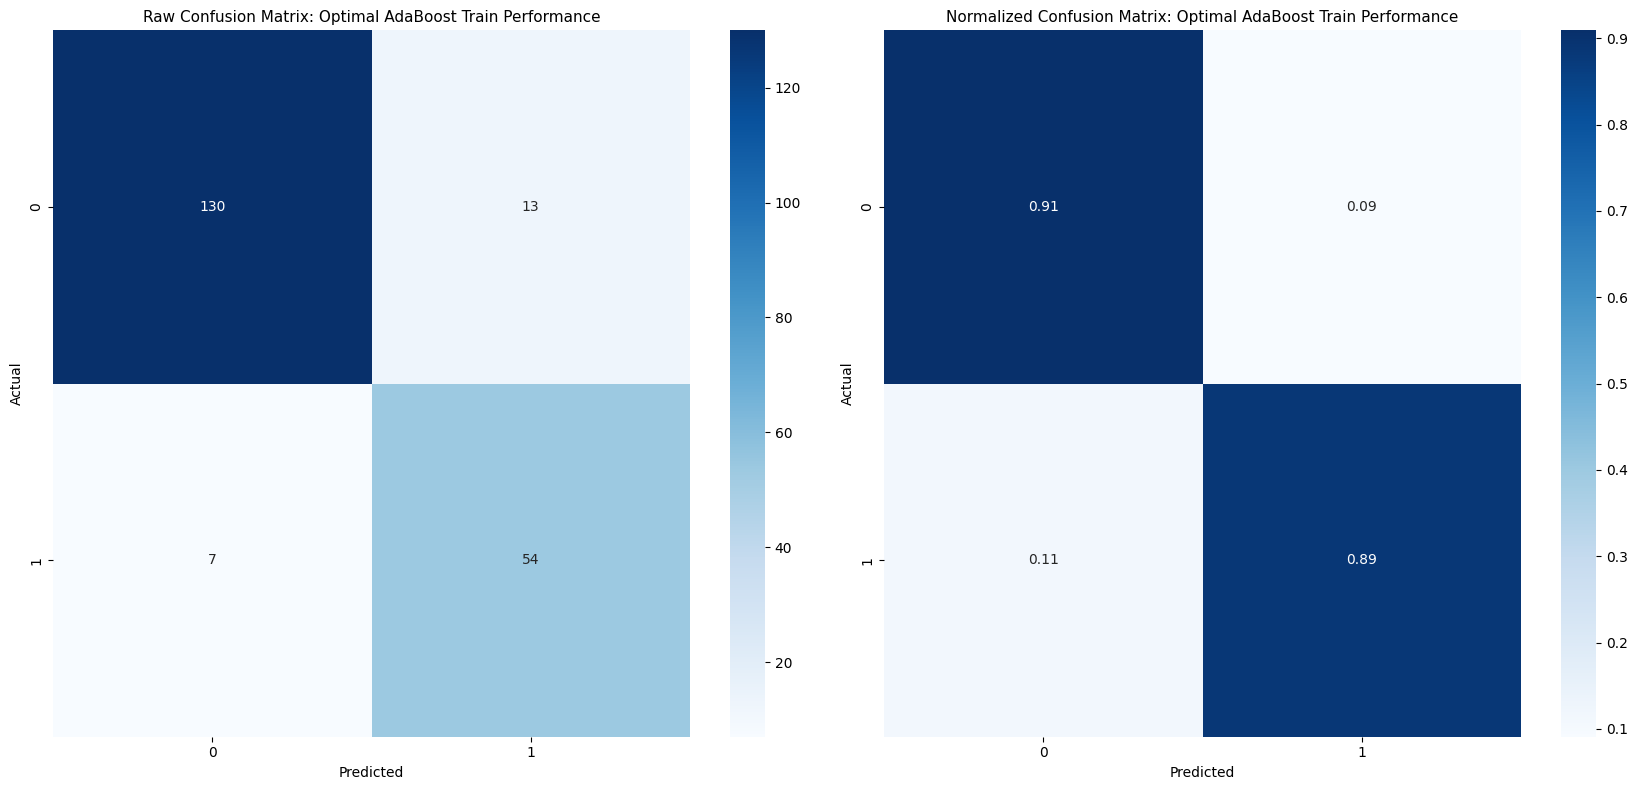

In [219]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, boosted_ab_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, boosted_ab_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal AdaBoost Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal AdaBoost Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [220]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_ab_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, boosted_ab_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



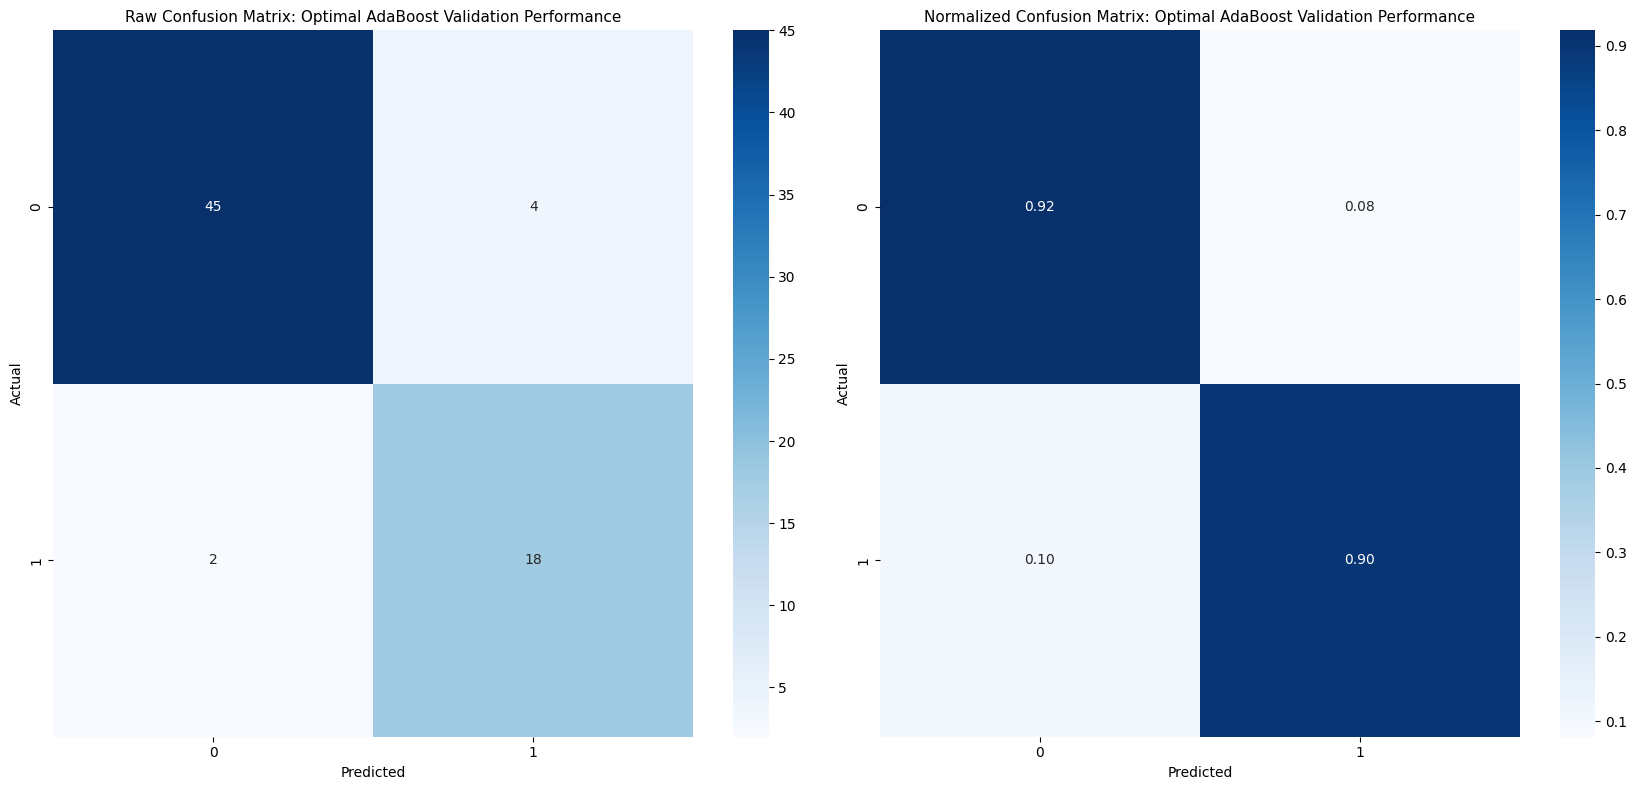

In [221]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, boosted_ab_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, boosted_ab_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal AdaBoost Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal AdaBoost Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [222]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_ab_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, boosted_ab_optimal.predict(X_preprocessed_train))
boosted_ab_optimal_train['model'] = ['boosted_ab_optimal'] * 5
boosted_ab_optimal_train['set'] = ['train'] * 5
print('Optimal AdaBoost Train Performance Metrics: ')
display(boosted_ab_optimal_train)


Optimal AdaBoost Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy      0.901961  boosted_ab_optimal  train
1   Precision      0.805970  boosted_ab_optimal  train
2      Recall      0.885246  boosted_ab_optimal  train
3          F1      0.843750  boosted_ab_optimal  train
4       AUROC      0.897168  boosted_ab_optimal  train

In [223]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_ab_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, boosted_ab_optimal.predict(X_preprocessed_validation))
boosted_ab_optimal_validation['model'] = ['boosted_ab_optimal'] * 5
boosted_ab_optimal_validation['set'] = ['validation'] * 5
print('Optimal AdaBoost Validation Performance Metrics: ')
display(boosted_ab_optimal_validation)


Optimal AdaBoost Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.913043  boosted_ab_optimal  validation
1   Precision      0.818182  boosted_ab_optimal  validation
2      Recall      0.900000  boosted_ab_optimal  validation
3          F1      0.857143  boosted_ab_optimal  validation
4       AUROC      0.909184  boosted_ab_optimal  validation

In [224]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_ab_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_adaboost_optimal.pkl"))


['..\\models\\boosted_model_adaboost_optimal.pkl']

### 1.8.2 Gradient Boosting <a class="anchor" id="1.8.2"></a>

[Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) builds an ensemble of decision trees sequentially, where each new tree corrects the mistakes of the previous ones by optimizing a loss function. Unlike AdaBoost, which reweights misclassified instances, Gradient Boosting fits each new tree to the residual errors of the previous model, gradually improving predictions. This process continues until a stopping criterion, such as a set number of trees, is met. The key advantages of Gradient Boosting include its flexibility to model complex relationships and strong predictive performance, often outperforming bagging methods. It can handle both numeric and categorical data well. However, it is prone to overfitting if not carefully tuned, especially with deep trees and too many iterations. It is also computationally expensive due to sequential training, and hyperparameter tuning (e.g., learning rate, number of trees, tree depth) can be challenging and time-consuming.

1. The [gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) model from the <mark style="background-color: #CCECFF"><b>sklearn.ensemble</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = shrinking proportion of the contribution from each tree made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">min_samples_leaf</span> = minimum number of samples required to be at a leaf node made to vary between 5 and 10
    * <span style="color: #FF0000">n_estimators</span> = number of boosting stages to perform made to vary between 50 and 100
3. No hyperparameter was defined in the model to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.10
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">min_samples_leaf</span> = 10
    * <span style="color: #FF0000">n_estimators</span> = 50
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9460
    * **Precision** = 0.9032
    * **Recall** = 0.9180
    * **F1 Score** = 0.9105
    * **AUROC** = 0.9380
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8985
    * **Precision** = 0.8095
    * **Recall** = 0.8500
    * **F1 Score** = 0.8292
    * **AUROC** = 0.8841
7. Relatively large difference in apparent and independent validation model performance observed that might be indicative of the presence of moderate model overfitting.


In [225]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [226]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_gb_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_gb_model', GradientBoostingClassifier(random_state=987654321))
])


In [227]:
##################################
# Defining hyperparameter grid
##################################
boosted_gb_hyperparameter_grid = {
    'boosted_gb_model__learning_rate': [0.01, 0.10],
    'boosted_gb_model__max_depth': [3, 6], 
    'boosted_gb_model__min_samples_leaf': [5, 10],
    'boosted_gb_model__n_estimators': [50, 100] 
}


In [228]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [229]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_gb_grid_search = GridSearchCV(
    estimator=boosted_gb_pipeline,
    param_grid=boosted_gb_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [230]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [231]:
##################################
# Fitting GridSearchCV
##################################
boosted_gb_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('boosted_gb_model',
                                        GradientBoostingClassifier(random_state=987654321))]),
             n_jobs=-1,
             param_grid={'boosted_gb_model__learning_rate': [0.01, 0.1],
                         'boosted_gb_model__max_depth': [3, 6],
                         'boosted_gb_model__min_samples_leaf': [5, 10],
                         'boosted_gb_model__n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [232]:
##################################
# Identifying the best model
##################################
boosted_gb_optimal = boosted_gb_grid_search.best_estimator_


In [233]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_gb_optimal_f1_cv = boosted_gb_grid_search.best_score_
boosted_gb_optimal_f1_train = f1_score(y_preprocessed_train_encoded, boosted_gb_optimal.predict(X_preprocessed_train))
boosted_gb_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, boosted_gb_optimal.predict(X_preprocessed_validation))


In [234]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - Gradient Boosting: ')
print(f"Best Gradient Boosting Hyperparameters: {boosted_gb_grid_search.best_params_}")


Best Boosted Model - Gradient Boosting: 
Best Gradient Boosting Hyperparameters: {'boosted_gb_model__learning_rate': 0.1, 'boosted_gb_model__max_depth': 3, 'boosted_gb_model__min_samples_leaf': 10, 'boosted_gb_model__n_estimators': 50}


In [235]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_gb_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_gb_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, boosted_gb_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8131
F1 Score on Training Data: 0.9106

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       143
         1.0       0.90      0.92      0.91        61

    accuracy                           0.95       204
   macro avg       0.93      0.94      0.94       204
weighted avg       0.95      0.95      0.95       204



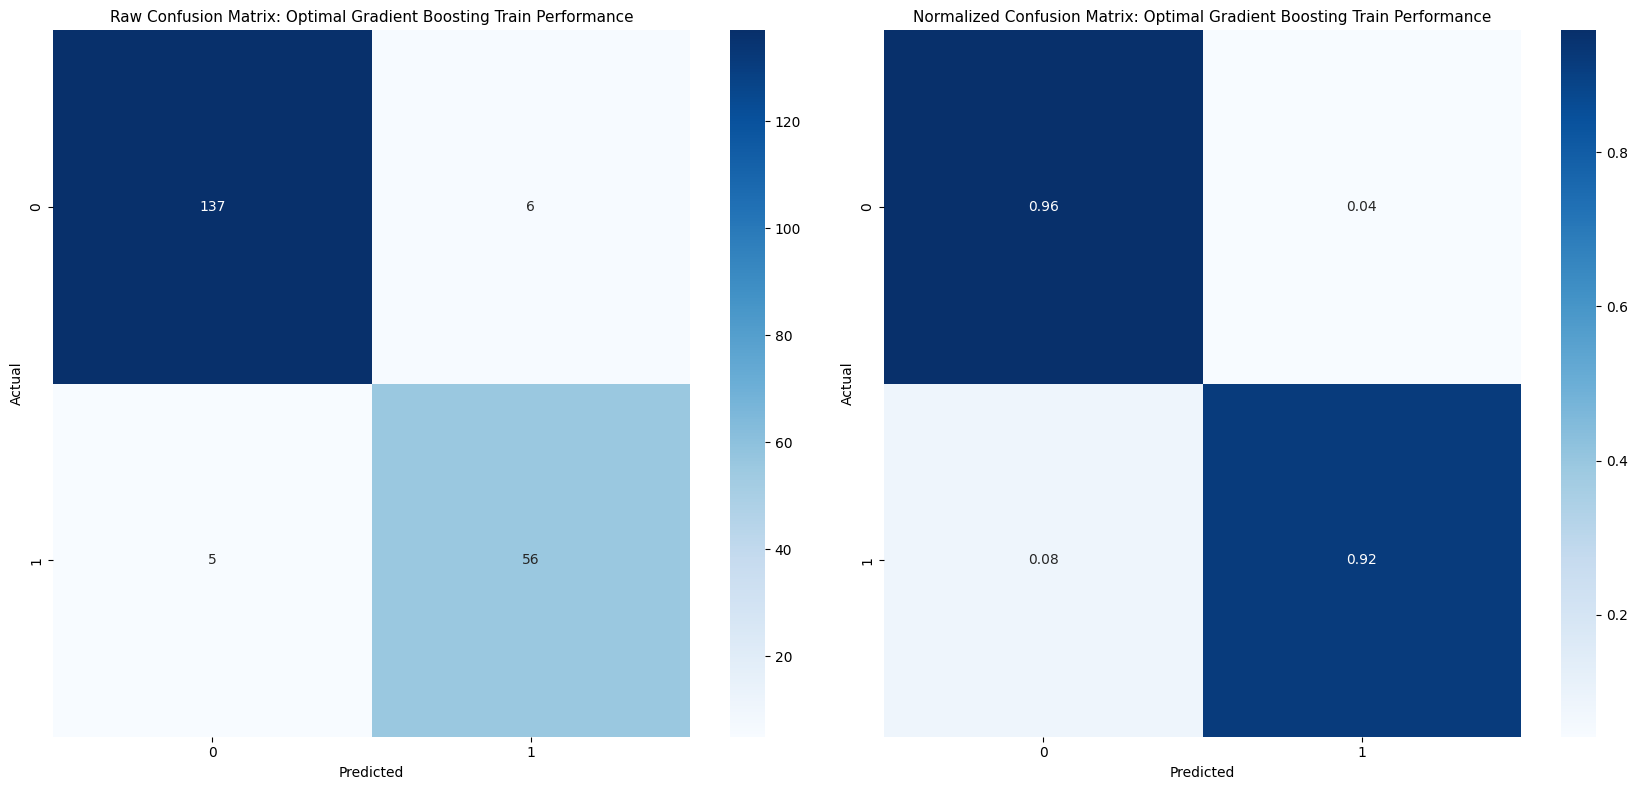

In [236]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, boosted_gb_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, boosted_gb_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Gradient Boosting Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Gradient Boosting Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [237]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_gb_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, boosted_gb_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8293

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        49
         1.0       0.81      0.85      0.83        20

    accuracy                           0.90        69
   macro avg       0.87      0.88      0.88        69
weighted avg       0.90      0.90      0.90        69



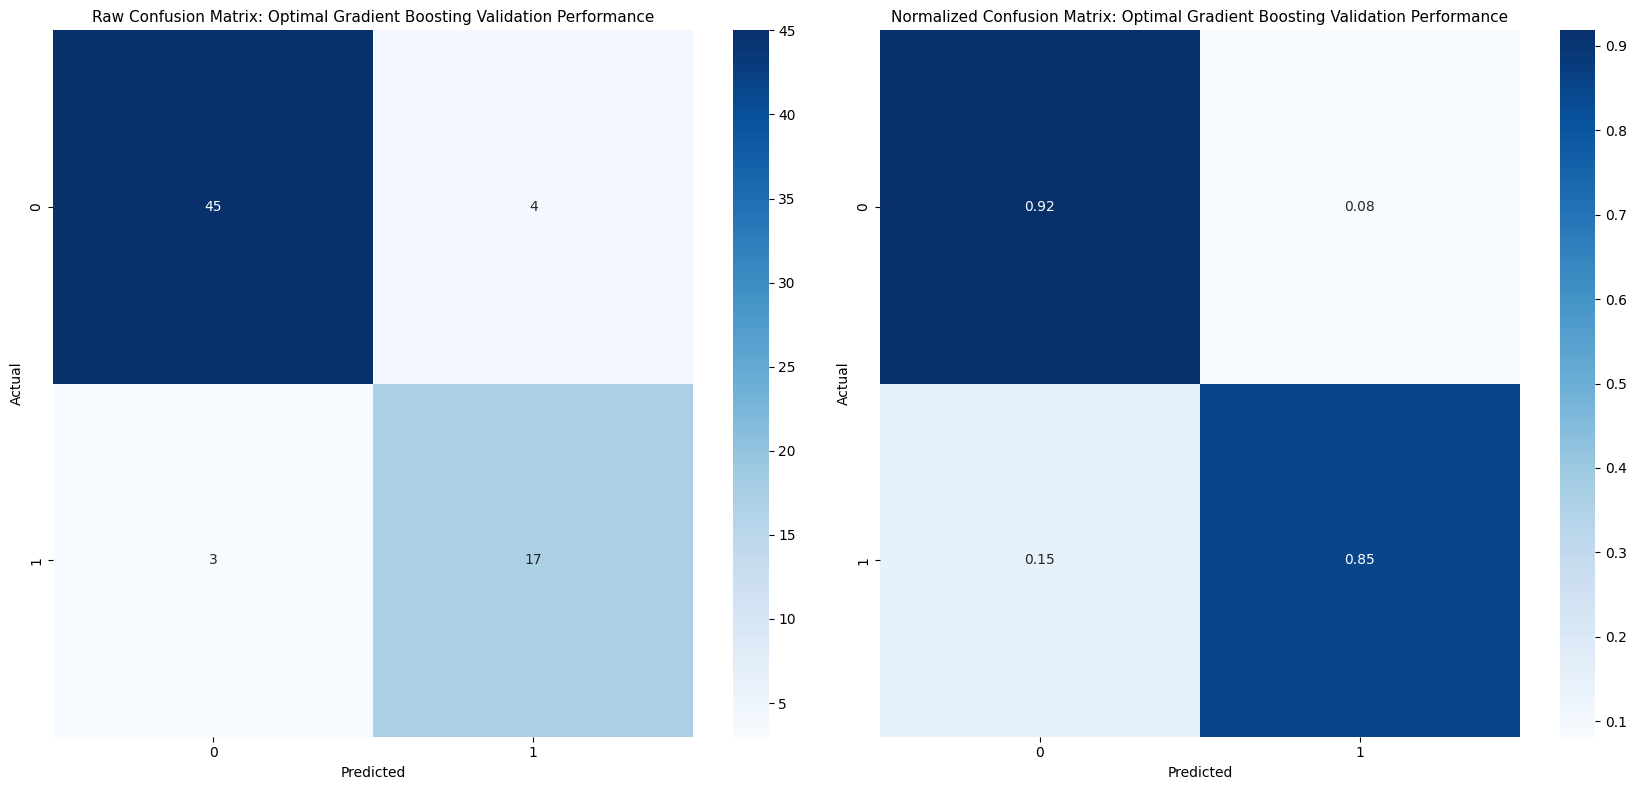

In [238]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, boosted_gb_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, boosted_gb_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Gradient Boosting Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Gradient Boosting Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [239]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_gb_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, boosted_gb_optimal.predict(X_preprocessed_train))
boosted_gb_optimal_train['model'] = ['boosted_gb_optimal'] * 5
boosted_gb_optimal_train['set'] = ['train'] * 5
print('Optimal Gradient Boosting Train Performance Metrics: ')
display(boosted_gb_optimal_train)


Optimal Gradient Boosting Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy      0.946078  boosted_gb_optimal  train
1   Precision      0.903226  boosted_gb_optimal  train
2      Recall      0.918033  boosted_gb_optimal  train
3          F1      0.910569  boosted_gb_optimal  train
4       AUROC      0.938037  boosted_gb_optimal  train

In [240]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_gb_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, boosted_gb_optimal.predict(X_preprocessed_validation))
boosted_gb_optimal_validation['model'] = ['boosted_gb_optimal'] * 5
boosted_gb_optimal_validation['set'] = ['validation'] * 5
print('Optimal Gradient Boosting Validation Performance Metrics: ')
display(boosted_gb_optimal_validation)


Optimal Gradient Boosting Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.898551  boosted_gb_optimal  validation
1   Precision      0.809524  boosted_gb_optimal  validation
2      Recall      0.850000  boosted_gb_optimal  validation
3          F1      0.829268  boosted_gb_optimal  validation
4       AUROC      0.884184  boosted_gb_optimal  validation

In [241]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_gb_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_gradient_boosting_optimal.pkl"))


['..\\models\\boosted_model_gradient_boosting_optimal.pkl']

### 1.8.3 XGBoost <a class="anchor" id="1.8.3"></a>

[XGBoost (Extreme Gradient Boosting)](https://xgboost.readthedocs.io/en/stable/python/index.html) is an optimized version of Gradient Boosting that introduces additional regularization and computational efficiencies. It builds decision trees sequentially, with each new tree correcting the residual errors of the previous ones, but it incorporates advanced techniques such as shrinkage (learning rate), column subsampling, and L1/L2 regularization to prevent overfitting. Additionally, XGBoost employs parallelization, reducing training time significantly compared to standard Gradient Boosting. It is widely used in machine learning competitions due to its superior accuracy and efficiency. The key advantages include its ability to handle missing data, built-in regularization for better generalization, and fast training through parallelization. However, XGBoost requires careful hyperparameter tuning to achieve optimal performance, and the model can become overly complex, making interpretation difficult. It is also memory-intensive, especially for large datasets, and can be challenging to deploy efficiently in real-time applications.

1. The [xgboost](https://xgboost.readthedocs.io/en/stable/python/index.html) model from the <mark style="background-color: #CCECFF"><b>xgboost</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of the tree made to vary between 3 and 6
    * <span style="color: #FF0000">gamma</span> = minimum loss reduction required to make a further split in a tree made to vary between 0.10 and 0.20
    * <span style="color: #FF0000">n_estimators</span> = number of boosting stages to perform made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 2.0) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.01
    * <span style="color: #FF0000">max_depth</span> = 3
    * <span style="color: #FF0000">gamma</span> 0.10
    * <span style="color: #FF0000">n_estimators</span> = 50
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9068
    * **Precision** = 0.8181
    * **Recall** = 0.8852
    * **F1 Score** = 0.8503
    * **AUROC** = 0.9006
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9130
    * **Precision** = 0.8181
    * **Recall** = 0.9000
    * **F1 Score** = 0.8571
    * **AUROC** = 0.9091
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [242]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [243]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_xgb_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_xgb_model', XGBClassifier(scale_pos_weight=2.0, 
                                        random_state=987654321,
                                        subsample=0.7,
                                        colsample_bytree=0.7,
                                        eval_metric='logloss'))
])


In [244]:
##################################
# Defining hyperparameter grid
##################################
boosted_xgb_hyperparameter_grid = {
    'boosted_xgb_model__learning_rate': [0.01, 0.10],
    'boosted_xgb_model__max_depth': [3, 6], 
    'boosted_xgb_model__gamma': [0.1, 0.2],
    'boosted_xgb_model__n_estimators': [50, 100] 
}


In [245]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [246]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_xgb_grid_search = GridSearchCV(
    estimator=boosted_xgb_pipeline,
    param_grid=boosted_xgb_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [247]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [248]:
##################################
# Fitting GridSearchCV
##################################
boosted_xgb_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=987654321, ...))]),
             n_jobs=-1,
             param_grid={'boosted_xgb_model__gamma': [0.1, 0.2],
                         'boosted_xgb_model__learning_rate': [0.01, 0.1],
                         'boosted_xgb_model__max_depth': [3, 6],
                         'boosted_xgb_model__n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [249]:
##################################
# Identifying the best model
##################################
boosted_xgb_optimal = boosted_xgb_grid_search.best_estimator_


In [250]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_xgb_optimal_f1_cv = boosted_xgb_grid_search.best_score_
boosted_xgb_optimal_f1_train = f1_score(y_preprocessed_train_encoded, boosted_xgb_optimal.predict(X_preprocessed_train))
boosted_xgb_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, boosted_xgb_optimal.predict(X_preprocessed_validation))


In [251]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - XGBoost: ')
print(f"Best XGBoost Hyperparameters: {boosted_xgb_grid_search.best_params_}")


Best Boosted Model - XGBoost: 
Best XGBoost Hyperparameters: {'boosted_xgb_model__gamma': 0.1, 'boosted_xgb_model__learning_rate': 0.01, 'boosted_xgb_model__max_depth': 3, 'boosted_xgb_model__n_estimators': 50}


In [252]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_xgb_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_xgb_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, boosted_xgb_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8322
F1 Score on Training Data: 0.8504

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       143
         1.0       0.82      0.89      0.85        61

    accuracy                           0.91       204
   macro avg       0.88      0.90      0.89       204
weighted avg       0.91      0.91      0.91       204



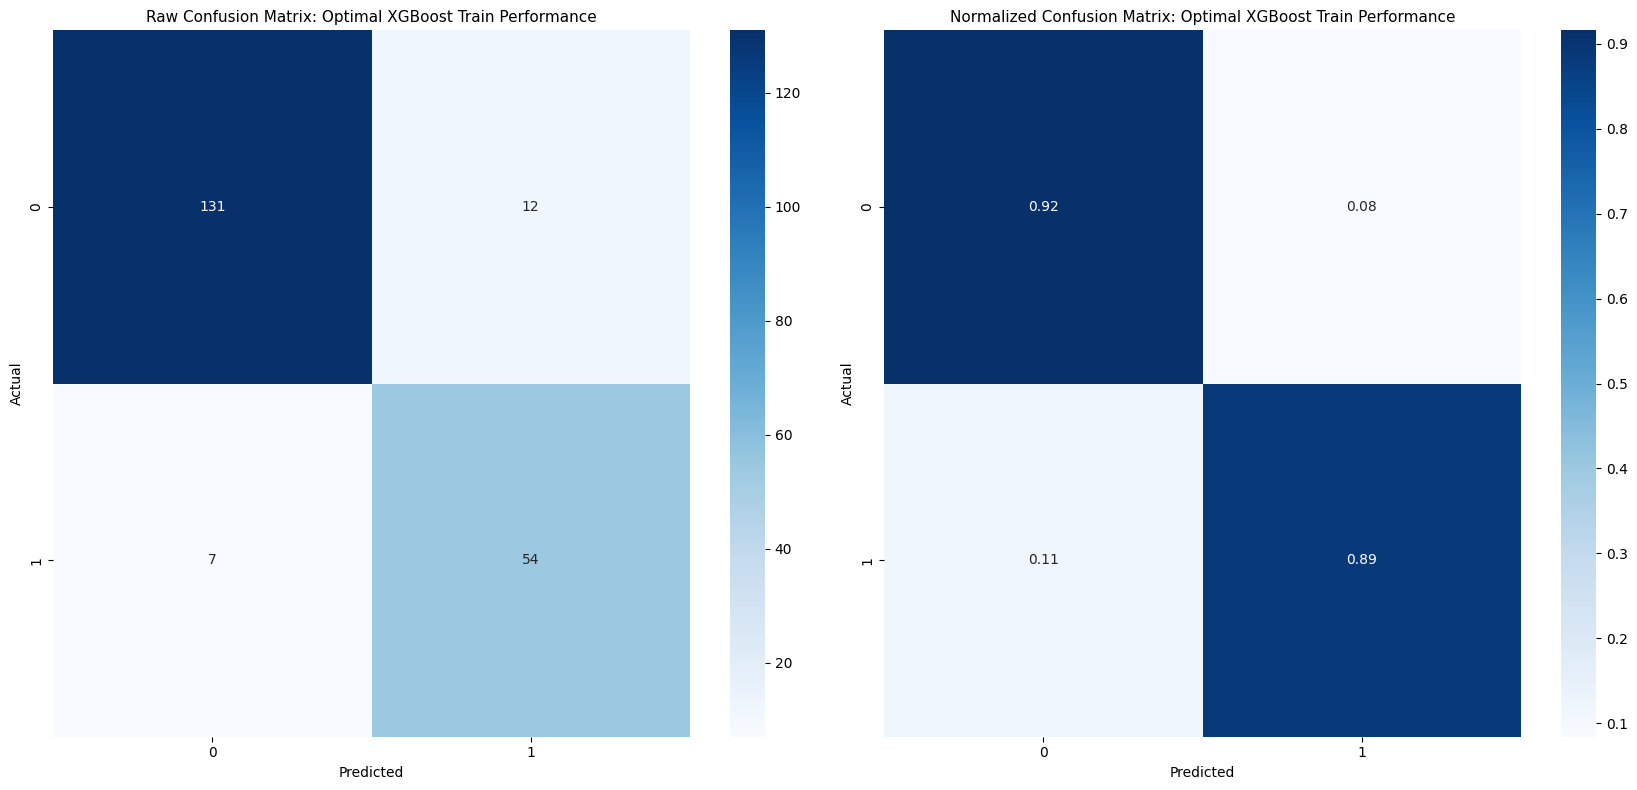

In [253]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, boosted_xgb_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, boosted_xgb_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal XGBoost Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal XGBoost Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [254]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_xgb_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, boosted_xgb_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



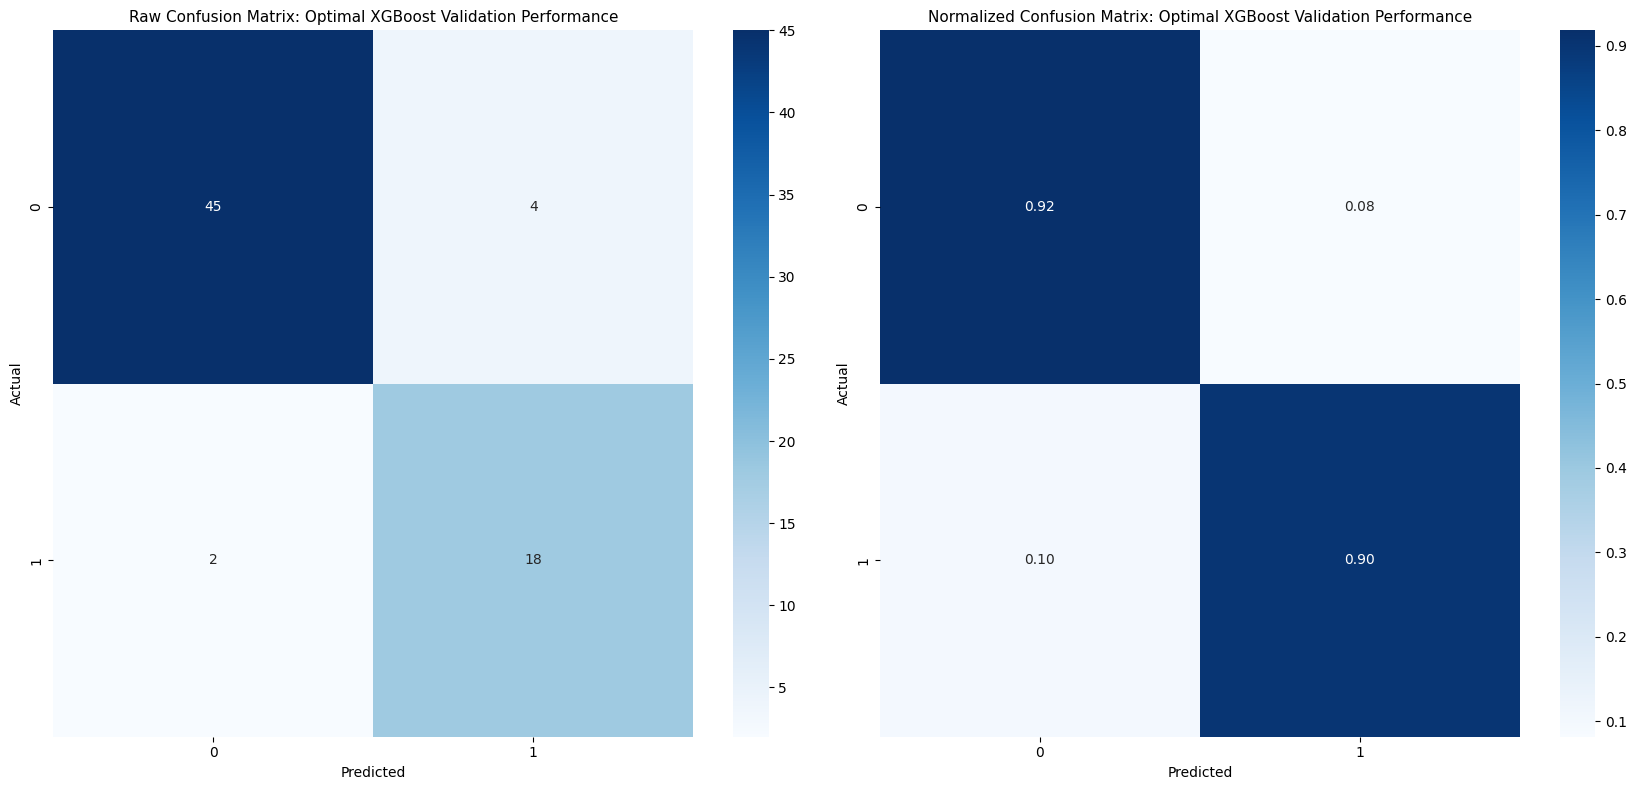

In [255]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, boosted_xgb_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, boosted_xgb_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal XGBoost Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal XGBoost Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [256]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_xgb_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, boosted_xgb_optimal.predict(X_preprocessed_train))
boosted_xgb_optimal_train['model'] = ['boosted_xgb_optimal'] * 5
boosted_xgb_optimal_train['set'] = ['train'] * 5
print('Optimal XGBoost Train Performance Metrics: ')
display(boosted_xgb_optimal_train)


Optimal XGBoost Train Performance Metrics: 


metric_name  metric_value                model    set
0    Accuracy      0.906863  boosted_xgb_optimal  train
1   Precision      0.818182  boosted_xgb_optimal  train
2      Recall      0.885246  boosted_xgb_optimal  train
3          F1      0.850394  boosted_xgb_optimal  train
4       AUROC      0.900665  boosted_xgb_optimal  train

In [257]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_xgb_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, boosted_xgb_optimal.predict(X_preprocessed_validation))
boosted_xgb_optimal_validation['model'] = ['boosted_xgb_optimal'] * 5
boosted_xgb_optimal_validation['set'] = ['validation'] * 5
print('Optimal XGBoost Validation Performance Metrics: ')
display(boosted_xgb_optimal_validation)


Optimal XGBoost Validation Performance Metrics: 


metric_name  metric_value                model         set
0    Accuracy      0.913043  boosted_xgb_optimal  validation
1   Precision      0.818182  boosted_xgb_optimal  validation
2      Recall      0.900000  boosted_xgb_optimal  validation
3          F1      0.857143  boosted_xgb_optimal  validation
4       AUROC      0.909184  boosted_xgb_optimal  validation

In [258]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_xgb_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_xgboost_optimal.pkl"))


['..\\models\\boosted_model_xgboost_optimal.pkl']

### 1.8.4 Light GBM <a class="anchor" id="1.8.4"></a>

[Light GBM (Light Gradient Boosting Machine)](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) is a variation of Gradient Boosting designed for efficiency and scalability. Unlike traditional boosting methods that grow trees level by level, LightGBM grows trees leaf-wise, choosing the most informative splits, leading to faster convergence. It also uses histogram-based binning to speed up computations. These optimizations allow LightGBM to train on large datasets efficiently while maintaining high accuracy. Its advantages include faster training speed, reduced memory usage, and strong predictive performance, particularly for large datasets with many features. However, LightGBM can overfit more easily than XGBoost if not properly tuned, and it may not perform as well on small datasets. Additionally, its handling of categorical variables requires careful preprocessing, and the leaf-wise tree growth can sometimes lead to instability if not controlled properly.

1. The [light gbm](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html) model from the <mark style="background-color: #CCECFF"><b>light</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">min_child_samples</span> = minimum number of data needed in a child 3 and 6
    * <span style="color: #FF0000">num_leaves</span> = maximum tree leaves for base learners made to vary between 8 and 16
    * <span style="color: #FF0000">n_estimators</span> = number of boosted trees to fit made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 2.0) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.01
    * <span style="color: #FF0000">min_child_samples</span> = 6
    * <span style="color: #FF0000">num_leaves</span> 16
    * <span style="color: #FF0000">n_estimators</span> = 100
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9362
    * **Precision** = 0.8870
    * **Recall** = 0.9016
    * **F1 Score** = 0.8943
    * **AUROC** = 0.9263
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.8985
    * **Precision** = 0.8421
    * **Recall** = 0.8000
    * **F1 Score** = 0.8205
    * **AUROC** = 0.8693
7. Relatively large difference in apparent and independent validation model performance observed that might be indicative of the presence of moderate model overfitting.


In [259]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [260]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_lgbm_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_lgbm_model', LGBMClassifier(scale_pos_weight=2.0, 
                                          random_state=987654321,
                                          max_depth=-1,
                                          feature_fraction =0.7,
                                          bagging_fraction=0.7,
                                          verbose=-1))
])


In [261]:
##################################
# Defining hyperparameter grid
##################################
boosted_lgbm_hyperparameter_grid = {
    'boosted_lgbm_model__learning_rate': [0.01, 0.10],
    'boosted_lgbm_model__min_child_samples': [3, 6], 
    'boosted_lgbm_model__num_leaves': [8, 16],
    'boosted_lgbm_model__n_estimators': [50, 100] 
}


In [262]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [263]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_lgbm_grid_search = GridSearchCV(
    estimator=boosted_lgbm_pipeline,
    param_grid=boosted_lgbm_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [264]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [265]:
##################################
# Fitting GridSearchCV
##################################
boosted_lgbm_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])...
                                       ('boosted_lgbm_model',
                                        LGBMClassifier(bagging_fraction=0.7,
                                                       feature_fraction=0.7,
                                                       random_state=987654321,
                                                       scale_pos_weight=2.0,
                                                       verbose=-1))]),
             n_jobs=-1,
             param_grid={'boosted_lgbm_model__learning_rate': [0.01, 0.1],
                         'boosted_lgbm_model__min_child_samples': [3, 6],
                         'boosted_lgbm_model__n_estimators': [50, 100],
                         'boosted_lgbm_model__num_leaves': [8, 16]},
             scoring='f1', verbose=1)

In [266]:
##################################
# Identifying the best model
##################################
boosted_lgbm_optimal = boosted_lgbm_grid_search.best_estimator_


In [267]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn.utils.validation')
boosted_lgbm_optimal_f1_cv = boosted_lgbm_grid_search.best_score_
boosted_lgbm_optimal_f1_train = f1_score(y_preprocessed_train_encoded, boosted_lgbm_optimal.predict(X_preprocessed_train))
boosted_lgbm_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, boosted_lgbm_optimal.predict(X_preprocessed_validation))


In [268]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - Light GBM: ')
print(f"Best Light GBM Hyperparameters: {boosted_lgbm_grid_search.best_params_}")


Best Boosted Model - Light GBM: 
Best Light GBM Hyperparameters: {'boosted_lgbm_model__learning_rate': 0.01, 'boosted_lgbm_model__min_child_samples': 6, 'boosted_lgbm_model__n_estimators': 100, 'boosted_lgbm_model__num_leaves': 16}


In [269]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_lgbm_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_lgbm_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, boosted_lgbm_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8182
F1 Score on Training Data: 0.8943

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.96      0.95      0.95       143
         1.0       0.89      0.90      0.89        61

    accuracy                           0.94       204
   macro avg       0.92      0.93      0.92       204
weighted avg       0.94      0.94      0.94       204



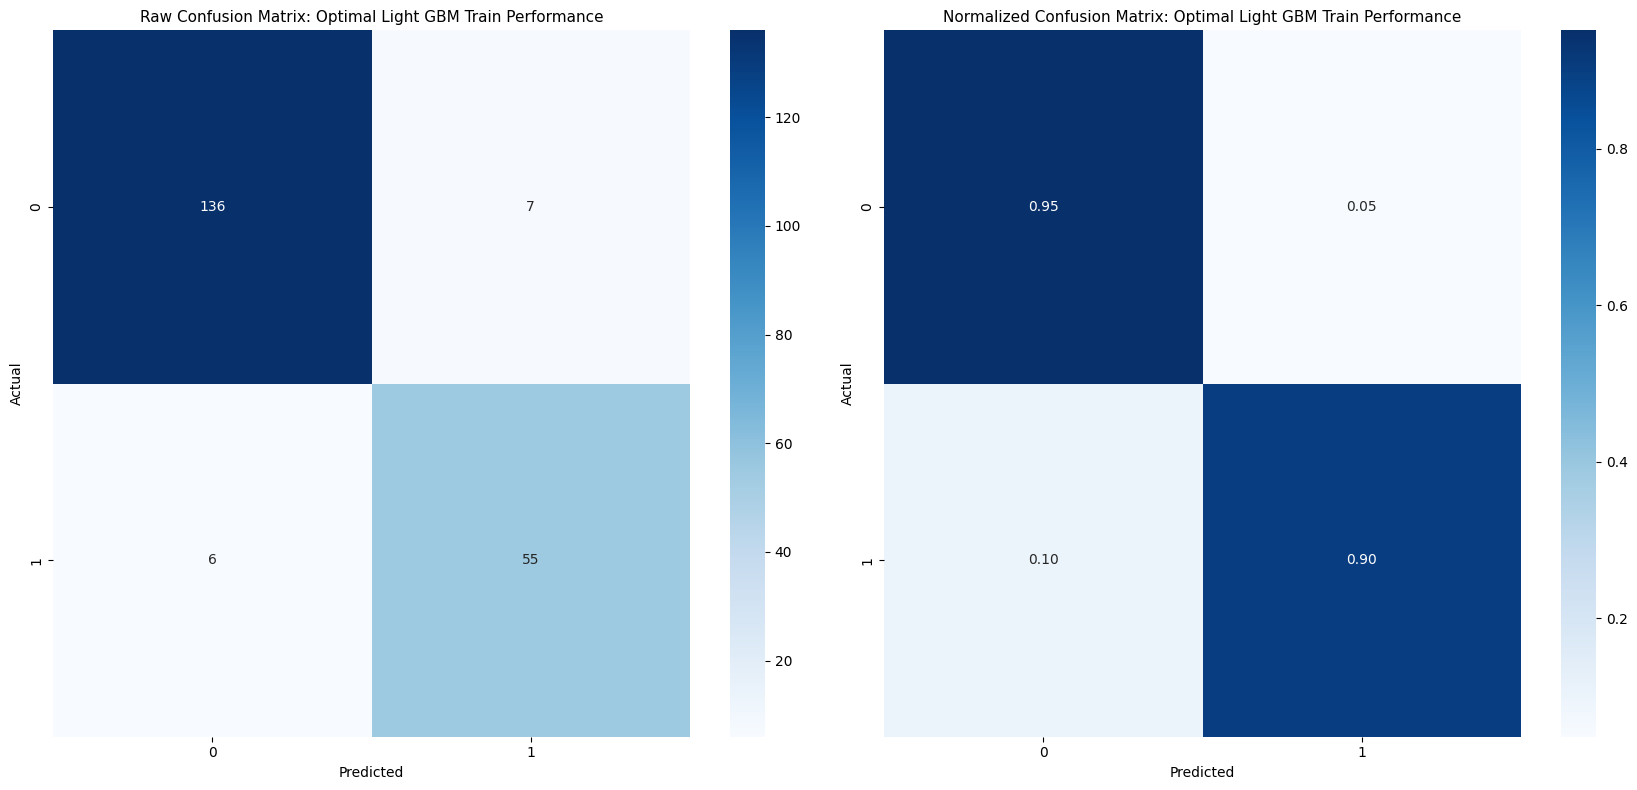

In [270]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, boosted_lgbm_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, boosted_lgbm_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Light GBM Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Light GBM Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [271]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_lgbm_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, boosted_lgbm_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8205

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        49
         1.0       0.84      0.80      0.82        20

    accuracy                           0.90        69
   macro avg       0.88      0.87      0.87        69
weighted avg       0.90      0.90      0.90        69



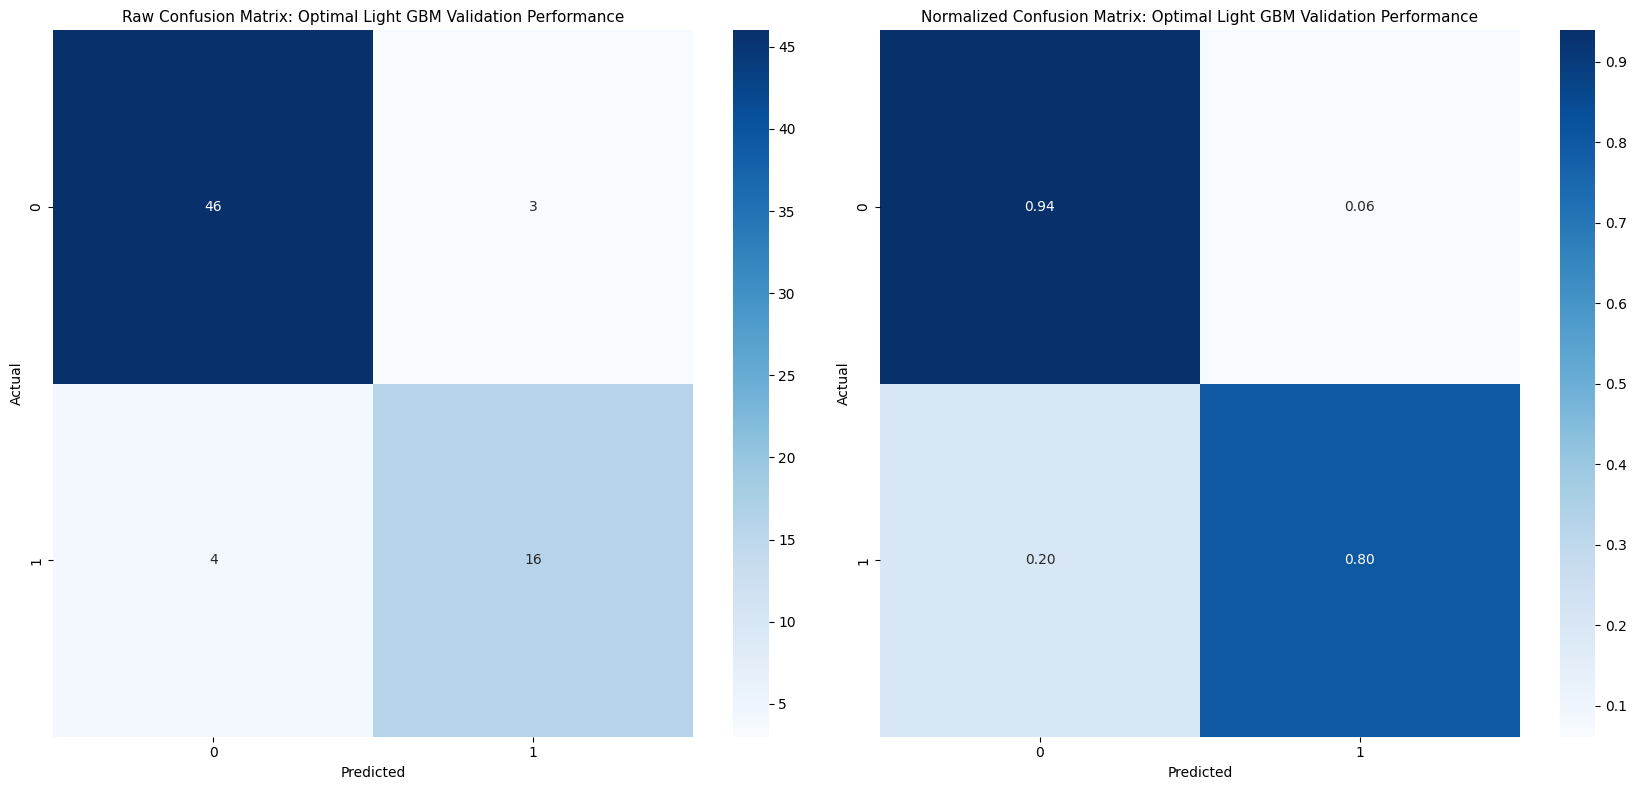

In [272]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, boosted_lgbm_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, boosted_lgbm_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Light GBM Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Light GBM Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [273]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_lgbm_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, boosted_lgbm_optimal.predict(X_preprocessed_train))
boosted_lgbm_optimal_train['model'] = ['boosted_lgbm_optimal'] * 5
boosted_lgbm_optimal_train['set'] = ['train'] * 5
print('Optimal Light GBM Train Performance Metrics: ')
display(boosted_lgbm_optimal_train)


Optimal Light GBM Train Performance Metrics: 


metric_name  metric_value                 model    set
0    Accuracy      0.936275  boosted_lgbm_optimal  train
1   Precision      0.887097  boosted_lgbm_optimal  train
2      Recall      0.901639  boosted_lgbm_optimal  train
3          F1      0.894309  boosted_lgbm_optimal  train
4       AUROC      0.926344  boosted_lgbm_optimal  train

In [274]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_lgbm_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, boosted_lgbm_optimal.predict(X_preprocessed_validation))
boosted_lgbm_optimal_validation['model'] = ['boosted_lgbm_optimal'] * 5
boosted_lgbm_optimal_validation['set'] = ['validation'] * 5
print('Optimal Light GBM Validation Performance Metrics: ')
display(boosted_lgbm_optimal_validation)


Optimal Light GBM Validation Performance Metrics: 


metric_name  metric_value                 model         set
0    Accuracy      0.898551  boosted_lgbm_optimal  validation
1   Precision      0.842105  boosted_lgbm_optimal  validation
2      Recall      0.800000  boosted_lgbm_optimal  validation
3          F1      0.820513  boosted_lgbm_optimal  validation
4       AUROC      0.869388  boosted_lgbm_optimal  validation

In [275]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_lgbm_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_light_gbm_optimal.pkl"))


['..\\models\\boosted_model_light_gbm_optimal.pkl']

### 1.8.5 CatBoost <a class="anchor" id="1.8.5"></a>

[CatBoost (Categorical Boosting)](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) is a boosting algorithm optimized for categorical data. Unlike other gradient boosting methods that require categorical variables to be manually encoded, CatBoost handles them natively, reducing preprocessing effort and improving performance. It builds decision trees iteratively, like other boosting methods, but uses ordered boosting to prevent target leakage and enhance generalization. The main advantages of CatBoost are its ability to handle categorical data without extensive preprocessing, high accuracy with minimal tuning, and robustness against overfitting due to built-in regularization. Additionally, it is relatively fast and memory-efficient. However, CatBoost can still be slower than LightGBM on very large datasets, and while it requires less tuning, improper parameter selection can lead to suboptimal performance. Its internal mechanics, such as ordered boosting, make interpretation more complex compared to simpler models.

1. The [catboost](https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier) model from the <mark style="background-color: #CCECFF"><b>catboost</b></mark> Python library API was implemented. 
2. The model contains 4 hyperparameters for tuning:
    * <span style="color: #FF0000">learning_rate</span> = step size at which weights are updated during training made to vary between 0.01 and 0.10
    * <span style="color: #FF0000">max_depth</span> = maximum depth of each decision tree in the boosting process made to vary between 3 and 6
    * <span style="color: #FF0000">num_leaves</span> = maximum tree leaves for base learners made to vary between 8 and 16
    * <span style="color: #FF0000">iterations</span> = number of boosted trees to fit made to vary between 50 and 100
3.  A special hyperparameter (<span style="color: #FF0000">scale_pos_weight</span> = 2.0) was fixed to address the minimal 2:1 class imbalance observed between the No and Yes <span style="color: #FF0000">Recurred</span> categories.
4. Hyperparameter tuning was conducted using the 5-cycle 5-fold cross-validation method with optimal model performance using the F1 score determined for:
    * <span style="color: #FF0000">learning_rate</span> = 0.01
    * <span style="color: #FF0000">min_child_samples</span> = 3
    * <span style="color: #FF0000">num_leaves</span> 8
    * <span style="color: #FF0000">n_estimators</span> = 50
5. The apparent model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9019
    * **Precision** = 0.8059
    * **Recall** = 0.8852
    * **F1 Score** = 0.8437
    * **AUROC** = 0.8971
6. The independent validation model performance of the optimal model is summarized as follows:
    * **Accuracy** = 0.9130
    * **Precision** = 0.8181
    * **Recall** = 0.9000
    * **F1 Score** = 0.8571
    * **AUROC** = 0.9091
7. Sufficiently comparable apparent and independent validation model performance observed that might be indicative of the absence of excessive model overfitting.


In [276]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [277]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
boosted_cb_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('boosted_cb_model', LGBMClassifier(scale_pos_weight=2.0, 
                                        random_state=987654321,
                                        subsample =0.7,
                                        colsample_bylevel=0.7))
])


In [278]:
##################################
# Defining hyperparameter grid
##################################
boosted_cb_hyperparameter_grid = {
    'boosted_cb_model__learning_rate': [0.01, 0.10],
    'boosted_cb_model__max_depth': [3, 6], 
    'boosted_cb_model__num_leaves': [8, 16],
    'boosted_cb_model__iterations': [50, 100] 
}


In [279]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [280]:
##################################
# Performing Grid Search with cross-validation
##################################
boosted_cb_grid_search = GridSearchCV(
    estimator=boosted_cb_pipeline,
    param_grid=boosted_cb_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [281]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [282]:
##################################
# Fitting GridSearchCV
##################################
boosted_cb_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 16 candidates, totalling 400 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('boosted_cb_model',
                                        LGBMClassifier(colsample_bylevel=0.7,
                                                       random_state=987654321,
                                                       scale_pos_weight=2.0,
                                                       subsample=0.7))]),
             n_jobs=-1,
             param_grid={'boosted_cb_model__iterations': [50, 100],
                         'boosted_cb_model__learning_rate': [0.01, 0.1],
                         'boosted_cb_model__max_depth': [3, 6],
                         'boosted_cb_model__num_leaves': [8, 16]},
             scoring='f1', verbose=1)

In [283]:
##################################
# Identifying the best model
##################################
boosted_cb_optimal = boosted_cb_grid_search.best_estimator_


In [284]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
boosted_cb_optimal_f1_cv = boosted_cb_grid_search.best_score_
boosted_cb_optimal_f1_train = f1_score(y_preprocessed_train_encoded, boosted_cb_optimal.predict(X_preprocessed_train))
boosted_cb_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, boosted_cb_optimal.predict(X_preprocessed_validation))


In [285]:
##################################
# Identifying the optimal model
##################################
print('Best Boosted Model - CatBoost: ')
print(f"Best CatBoost Hyperparameters: {boosted_cb_grid_search.best_params_}")


Best Boosted Model - CatBoost: 
Best CatBoost Hyperparameters: {'boosted_cb_model__iterations': 50, 'boosted_cb_model__learning_rate': 0.01, 'boosted_cb_model__max_depth': 3, 'boosted_cb_model__num_leaves': 8}


In [286]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {boosted_cb_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {boosted_cb_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, boosted_cb_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8277
F1 Score on Training Data: 0.8438

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       143
         1.0       0.81      0.89      0.84        61

    accuracy                           0.90       204
   macro avg       0.88      0.90      0.89       204
weighted avg       0.91      0.90      0.90       204



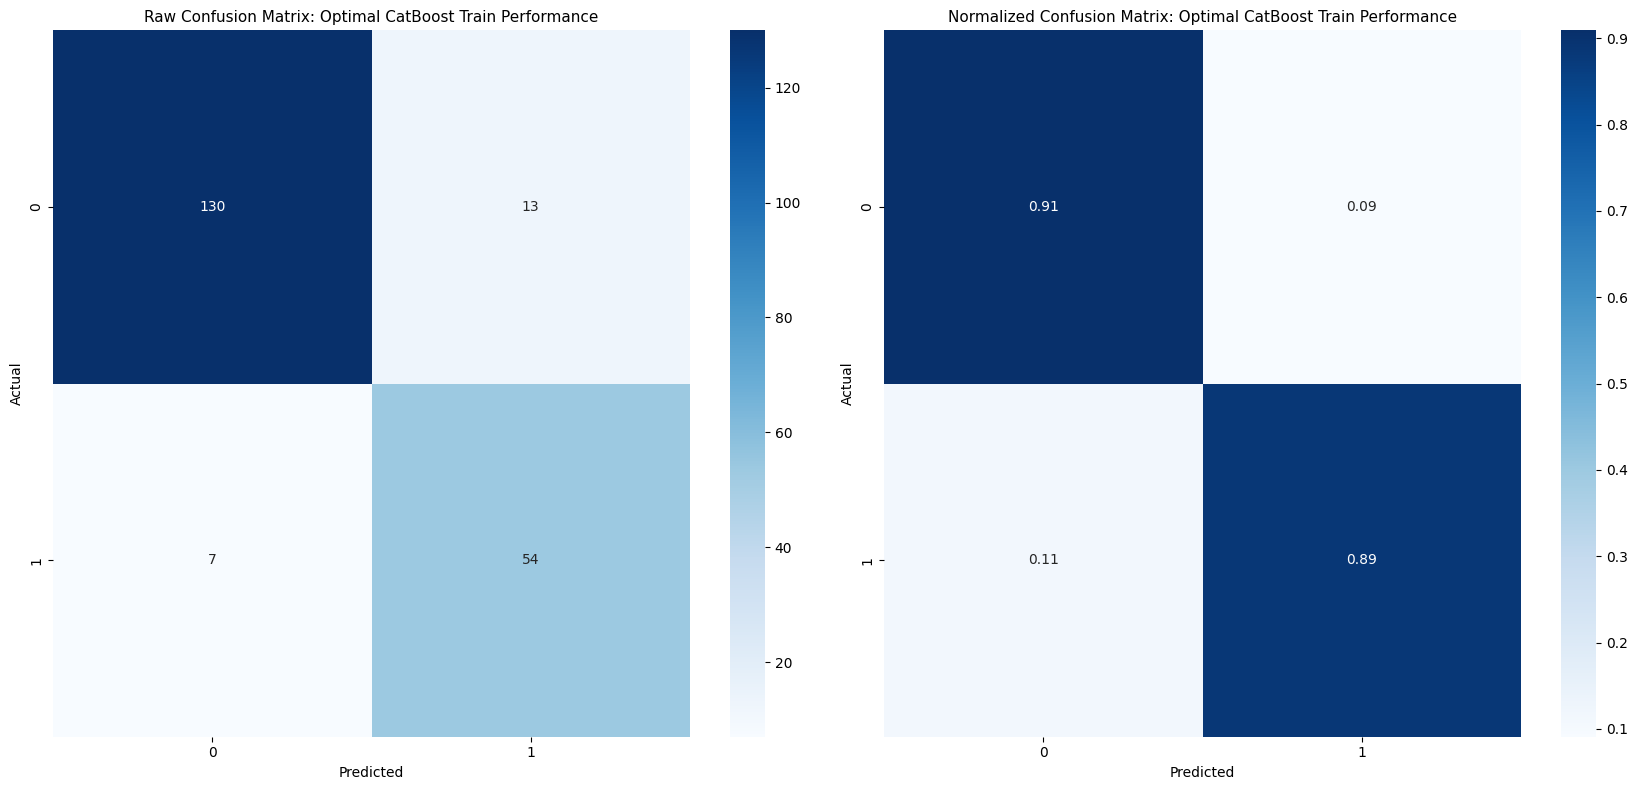

In [287]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, boosted_cb_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, boosted_cb_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal CatBoost Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal CatBoost Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [288]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {boosted_cb_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, boosted_cb_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



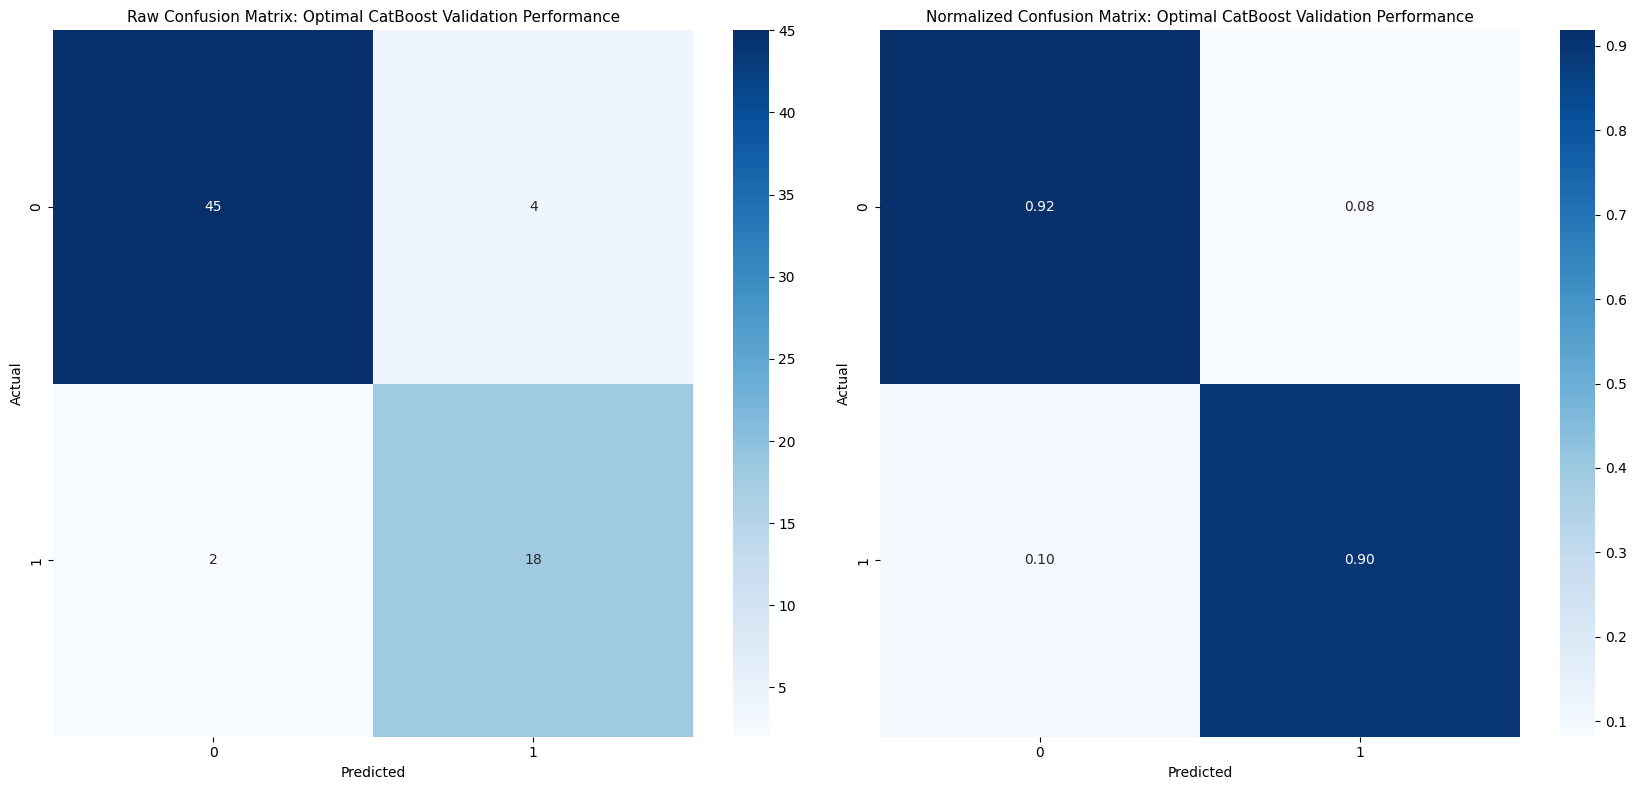

In [289]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, boosted_cb_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, boosted_cb_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal CatBoost Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal CatBoost Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [290]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
boosted_cb_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, boosted_cb_optimal.predict(X_preprocessed_train))
boosted_cb_optimal_train['model'] = ['boosted_cb_optimal'] * 5
boosted_cb_optimal_train['set'] = ['train'] * 5
print('Optimal CatBoost Train Performance Metrics: ')
display(boosted_cb_optimal_train)


Optimal CatBoost Train Performance Metrics: 


metric_name  metric_value               model    set
0    Accuracy      0.901961  boosted_cb_optimal  train
1   Precision      0.805970  boosted_cb_optimal  train
2      Recall      0.885246  boosted_cb_optimal  train
3          F1      0.843750  boosted_cb_optimal  train
4       AUROC      0.897168  boosted_cb_optimal  train

In [291]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
boosted_cb_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, boosted_cb_optimal.predict(X_preprocessed_validation))
boosted_cb_optimal_validation['model'] = ['boosted_cb_optimal'] * 5
boosted_cb_optimal_validation['set'] = ['validation'] * 5
print('Optimal CatBoost Validation Performance Metrics: ')
display(boosted_cb_optimal_validation)


Optimal CatBoost Validation Performance Metrics: 


metric_name  metric_value               model         set
0    Accuracy      0.913043  boosted_cb_optimal  validation
1   Precision      0.818182  boosted_cb_optimal  validation
2      Recall      0.900000  boosted_cb_optimal  validation
3          F1      0.857143  boosted_cb_optimal  validation
4       AUROC      0.909184  boosted_cb_optimal  validation

In [292]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(boosted_cb_optimal, 
            os.path.join("..", MODELS_PATH, "boosted_model_catboost_optimal.pkl"))


['..\\models\\boosted_model_catboost_optimal.pkl']

## 1.9. Stacked Model Development <a class="anchor" id="1.9"></a>

[Stacking](https://www.manning.com/books/ensemble-methods-for-machine-learning), or stacked generalization, is an advanced ensemble method that improves predictive performance by training a meta-model to learn the optimal way to combine multiple base models using their out-of-fold predictions. Unlike traditional ensemble techniques such as bagging and boosting, which aggregate predictions through simple rules like averaging or majority voting, stacking introduces a second-level model that intelligently learns how to integrate diverse base models. The process starts by training multiple classifiers on the training dataset. However, instead of directly using their predictions, stacking employs k-fold cross-validation to generate out-of-fold predictions. Specifically, each base model is trained on a subset of the training data while leaving out a validation fold, and predictions on that unseen fold are recorded. This process is repeated across all folds, ensuring that each instance in the training data receives predictions from models that never saw it during training. These out-of-fold predictions are then used as input features for a meta-model, which learns the best way to combine them into a final decision. The advantage of stacking is that it allows different models to complement each other, capturing diverse aspects of the data that a single model might miss. This often results in superior classification accuracy compared to individual models or simpler ensemble approaches. However, stacking is computationally expensive, requiring multiple training iterations for base models and the additional meta-model. It also demands careful tuning to prevent overfitting, as the meta-model’s complexity can introduce new sources of error. Despite these challenges, stacking remains a powerful technique in applications where maximizing predictive performance is a priority.


### 1.9.1 Base Learner - K-Nearest Neighbors <a class="anchor" id="1.9.1"></a>

[K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is a non-parametric classification algorithm that makes predictions based on the majority class among the k-nearest training samples in feature space. It does not create an explicit model during training; instead, it stores the entire dataset and computes distances between a query point and all training samples during inference. The algorithm follows three key steps: (1) compute the distance between the query point and all training samples (typically using Euclidean distance), (2) identify the k closest points, and (3) assign the most common class among them as the predicted label. KNN is advantageous because it is simple, requires minimal training time, and can model complex decision boundaries when provided with sufficient data. However, it has significant drawbacks: it is computationally expensive for large datasets since distances must be computed for every prediction, it is sensitive to irrelevant or redundant features, and it requires careful selection of k, as a small k can make the model too sensitive to noise while a large k can overly smooth decision boundaries.


In [293]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender', 'Smoking', 'Physical_Examination', 'Adenopathy', 'Focality', 'Risk', 'T', 'Stage', 'Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough',
    force_int_remainder_cols=False)


In [294]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
stacked_baselearner_knn_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('stacked_baselearner_knn_model', KNeighborsClassifier())
])


In [295]:
##################################
# Defining hyperparameter grid
##################################
stacked_baselearner_knn_hyperparameter_grid = {
    'stacked_baselearner_knn_model__n_neighbors': [3, 5],
    'stacked_baselearner_knn_model__weights': ['uniform', 'distance'],
    'stacked_baselearner_knn_model__metric': ['minkowski', 'euclidean']
}


In [296]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [297]:
##################################
# Performing Grid Search with cross-validation
##################################
stacked_baselearner_knn_grid_search = GridSearchCV(
    estimator=stacked_baselearner_knn_pipeline,
    param_grid=stacked_baselearner_knn_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [298]:
##################################
# Encoding the response variables
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [299]:
##################################
# Fitting GridSearchCV
##################################
stacked_baselearner_knn_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('stacked_baselearner_knn_model',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'stacked_baselearner_knn_model__metric': ['minkowski',
                                                                   'euclidean'],
                         'stacked_baselearner_knn_model__n_neighbors': [3, 5],
                         'stacked_baselearner_knn_model__weights': ['uniform',
                                                                    'distance']},
             scoring='f1', verbose=1)

In [300]:
##################################
# Identifying the best model
##################################
stacked_baselearner_knn_optimal = stacked_baselearner_knn_grid_search.best_estimator_


In [301]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_baselearner_knn_optimal_f1_cv = stacked_baselearner_knn_grid_search.best_score_
stacked_baselearner_knn_optimal_f1_train = f1_score(y_preprocessed_train_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_train))
stacked_baselearner_knn_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_validation))


In [302]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Base Learner KNN: ')
print(f"Best Stacked Base Learner KNN Hyperparameters: {stacked_baselearner_knn_grid_search.best_params_}")


Best Stacked Base Learner KNN: 
Best Stacked Base Learner KNN Hyperparameters: {'stacked_baselearner_knn_model__metric': 'minkowski', 'stacked_baselearner_knn_model__n_neighbors': 3, 'stacked_baselearner_knn_model__weights': 'uniform'}


In [303]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_baselearner_knn_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_baselearner_knn_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.6417
F1 Score on Training Data: 0.8621

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       143
         1.0       0.91      0.82      0.86        61

    accuracy                           0.92       204
   macro avg       0.92      0.89      0.90       204
weighted avg       0.92      0.92      0.92       204



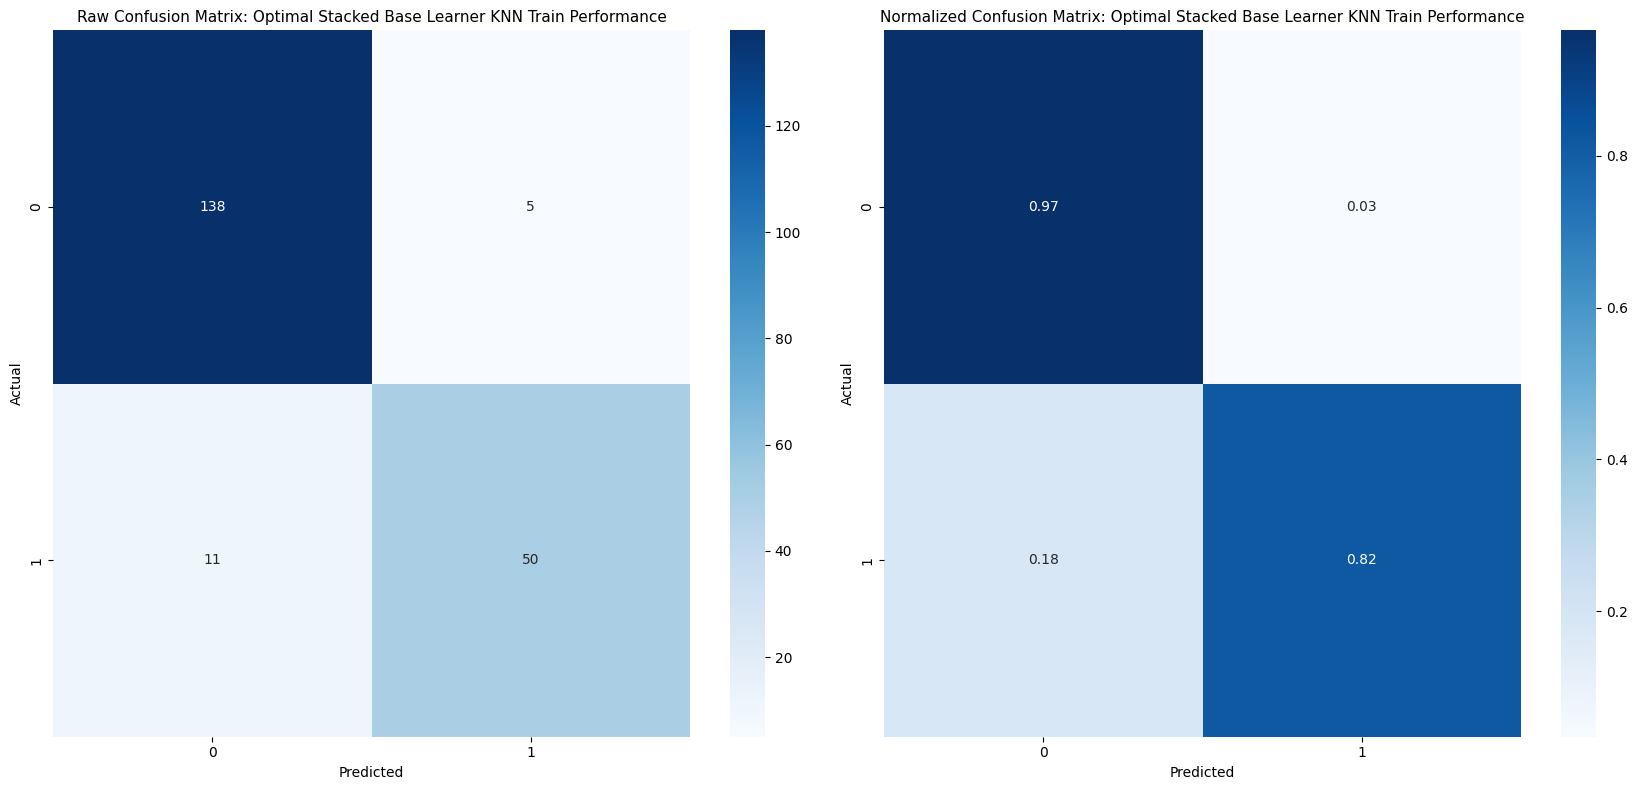

In [304]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner KNN Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner KNN Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [305]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {stacked_baselearner_knn_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.6486

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87        49
         1.0       0.71      0.60      0.65        20

    accuracy                           0.81        69
   macro avg       0.78      0.75      0.76        69
weighted avg       0.81      0.81      0.81        69



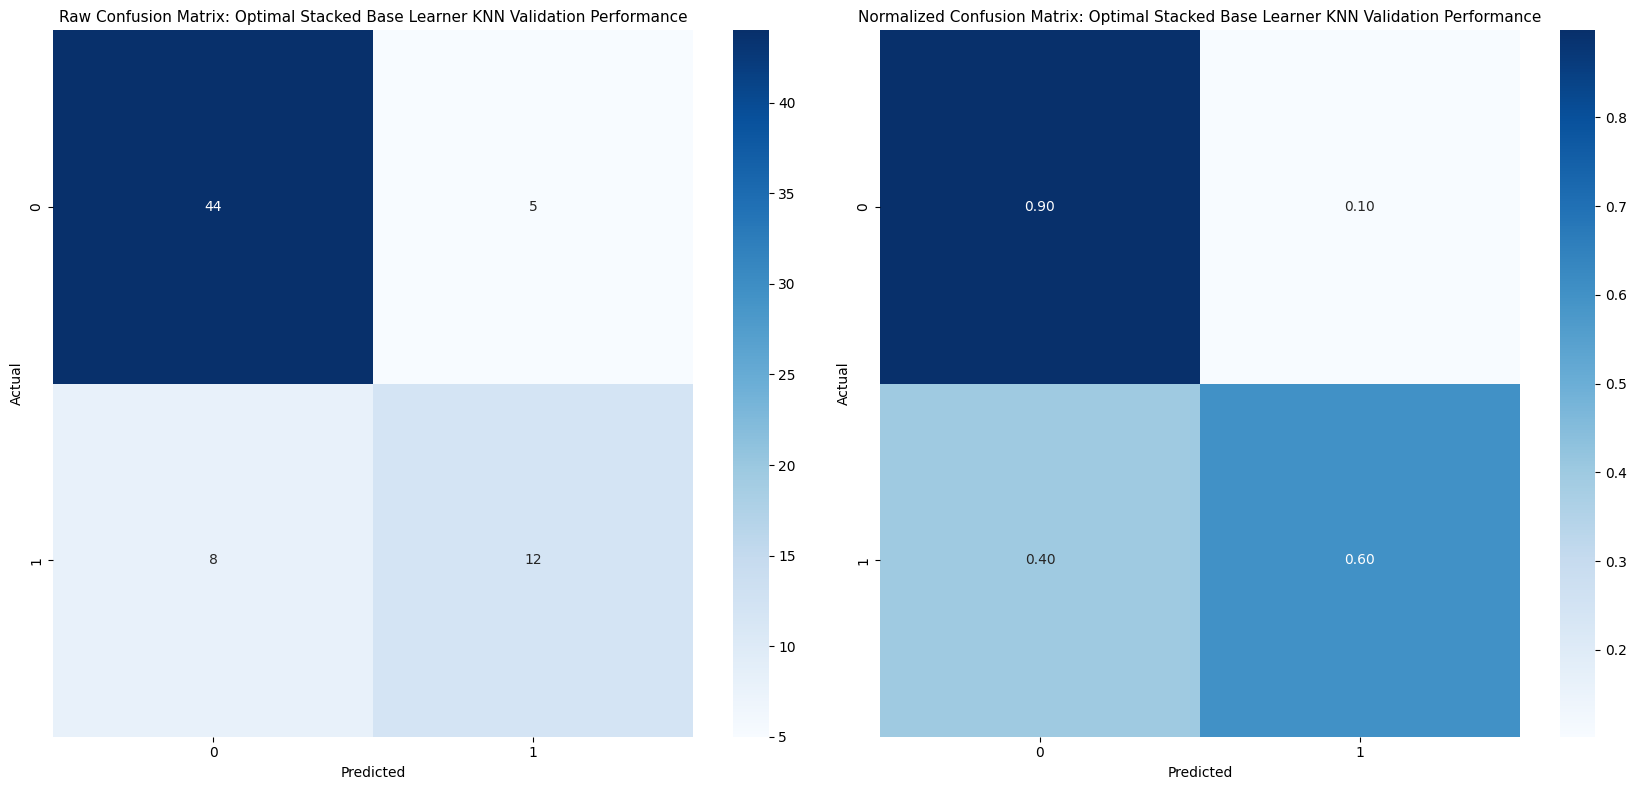

In [306]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner KNN Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner KNN Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [307]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
stacked_baselearner_knn_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_train))
stacked_baselearner_knn_optimal_train['model'] = ['stacked_baselearner_knn_optimal'] * 5
stacked_baselearner_knn_optimal_train['set'] = ['train'] * 5
print('Optimal Stacked Base Learner KNN Train Performance Metrics: ')
display(stacked_baselearner_knn_optimal_train)


Optimal Stacked Base Learner KNN Train Performance Metrics: 


metric_name  metric_value                            model    set
0    Accuracy      0.921569  stacked_baselearner_knn_optimal  train
1   Precision      0.909091  stacked_baselearner_knn_optimal  train
2      Recall      0.819672  stacked_baselearner_knn_optimal  train
3          F1      0.862069  stacked_baselearner_knn_optimal  train
4       AUROC      0.892354  stacked_baselearner_knn_optimal  train

In [308]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
stacked_baselearner_knn_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, stacked_baselearner_knn_optimal.predict(X_preprocessed_validation))
stacked_baselearner_knn_optimal_validation['model'] = ['stacked_baselearner_knn_optimal'] * 5
stacked_baselearner_knn_optimal_validation['set'] = ['validation'] * 5
print('Optimal Stacked Base Learner KNN Validation Performance Metrics: ')
display(stacked_baselearner_knn_optimal_validation)


Optimal Stacked Base Learner KNN Validation Performance Metrics: 


metric_name  metric_value                            model         set
0    Accuracy      0.811594  stacked_baselearner_knn_optimal  validation
1   Precision      0.705882  stacked_baselearner_knn_optimal  validation
2      Recall      0.600000  stacked_baselearner_knn_optimal  validation
3          F1      0.648649  stacked_baselearner_knn_optimal  validation
4       AUROC      0.748980  stacked_baselearner_knn_optimal  validation

In [309]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(stacked_baselearner_knn_optimal, 
            os.path.join("..", MODELS_PATH, "stacked_model_baselearner_knn_optimal.pkl"))


['..\\models\\stacked_model_baselearner_knn_optimal.pkl']

### 1.9.2 Base Learner - Support Vector Machine <a class="anchor" id="1.9.2"></a>

[Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) is a powerful classification algorithm that finds an optimal decision boundary — called a hyperplane — that maximizes the margin between two classes. The algorithm works by identifying the most influential data points, known as support vectors, that define this boundary. If the data is not linearly separable, SVM can use kernel functions to map it into a higher-dimensional space where separation is possible. The main advantages of SVM include strong theoretical guarantees, effectiveness in high-dimensional spaces, and robustness against overfitting when properly regularized. It performs well when the margin between classes is clear and works effectively with small to medium-sized datasets. However, SVM has notable limitations: it is computationally expensive, making it impractical for very large datasets; it requires careful tuning of hyperparameters such as the kernel type and regularization strength; and it is not easily interpretable, as decision boundaries in high-dimensional space can be difficult to visualize.


In [310]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [311]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
stacked_baselearner_svm_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('stacked_baselearner_svm_model', SVC(class_weight='balanced',
                                          random_state=987654321))
])


In [312]:
##################################
# Defining hyperparameter grid
##################################
stacked_baselearner_svm_hyperparameter_grid = {
    'stacked_baselearner_svm_model__C': [0.1, 1.0],
    'stacked_baselearner_svm_model__kernel': ['linear', 'rbf'],
    'stacked_baselearner_svm_model__gamma': ['scale','auto']
}


In [313]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [314]:
##################################
# Performing Grid Search with cross-validation
##################################
stacked_baselearner_svm_grid_search = GridSearchCV(
    estimator=stacked_baselearner_svm_pipeline,
    param_grid=stacked_baselearner_svm_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [315]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [316]:
##################################
# Fitting GridSearchCV
##################################
stacked_baselearner_svm_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('stacked_baselearner_svm_model',
                                        SVC(class_weight='balanced',
                                            random_state=987654321))]),
             n_jobs=-1,
             param_grid={'stacked_baselearner_svm_model__C': [0.1, 1.0],
                         'stacked_baselearner_svm_model__gamma': ['scale',
                                                                  'auto'],
                         'stacked_baselearner_svm_model__kernel': ['linear',
                                                                   'rbf']},
             scoring='f1', verbose=1)

In [317]:
##################################
# Identifying the best model
##################################
stacked_baselearner_svm_optimal = stacked_baselearner_svm_grid_search.best_estimator_


In [318]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_baselearner_svm_optimal_f1_cv = stacked_baselearner_svm_grid_search.best_score_
stacked_baselearner_svm_optimal_f1_train = f1_score(y_preprocessed_train_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_train))
stacked_baselearner_svm_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_validation))


In [319]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Base Learner SVM: ')
print(f"Best Stacked Base Learner SVM Hyperparameters: {stacked_baselearner_svm_grid_search.best_params_}")


Best Stacked Base Learner SVM: 
Best Stacked Base Learner SVM Hyperparameters: {'stacked_baselearner_svm_model__C': 1.0, 'stacked_baselearner_svm_model__gamma': 'scale', 'stacked_baselearner_svm_model__kernel': 'linear'}


In [320]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_baselearner_svm_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_baselearner_svm_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8219
F1 Score on Training Data: 0.8438

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       143
         1.0       0.81      0.89      0.84        61

    accuracy                           0.90       204
   macro avg       0.88      0.90      0.89       204
weighted avg       0.91      0.90      0.90       204



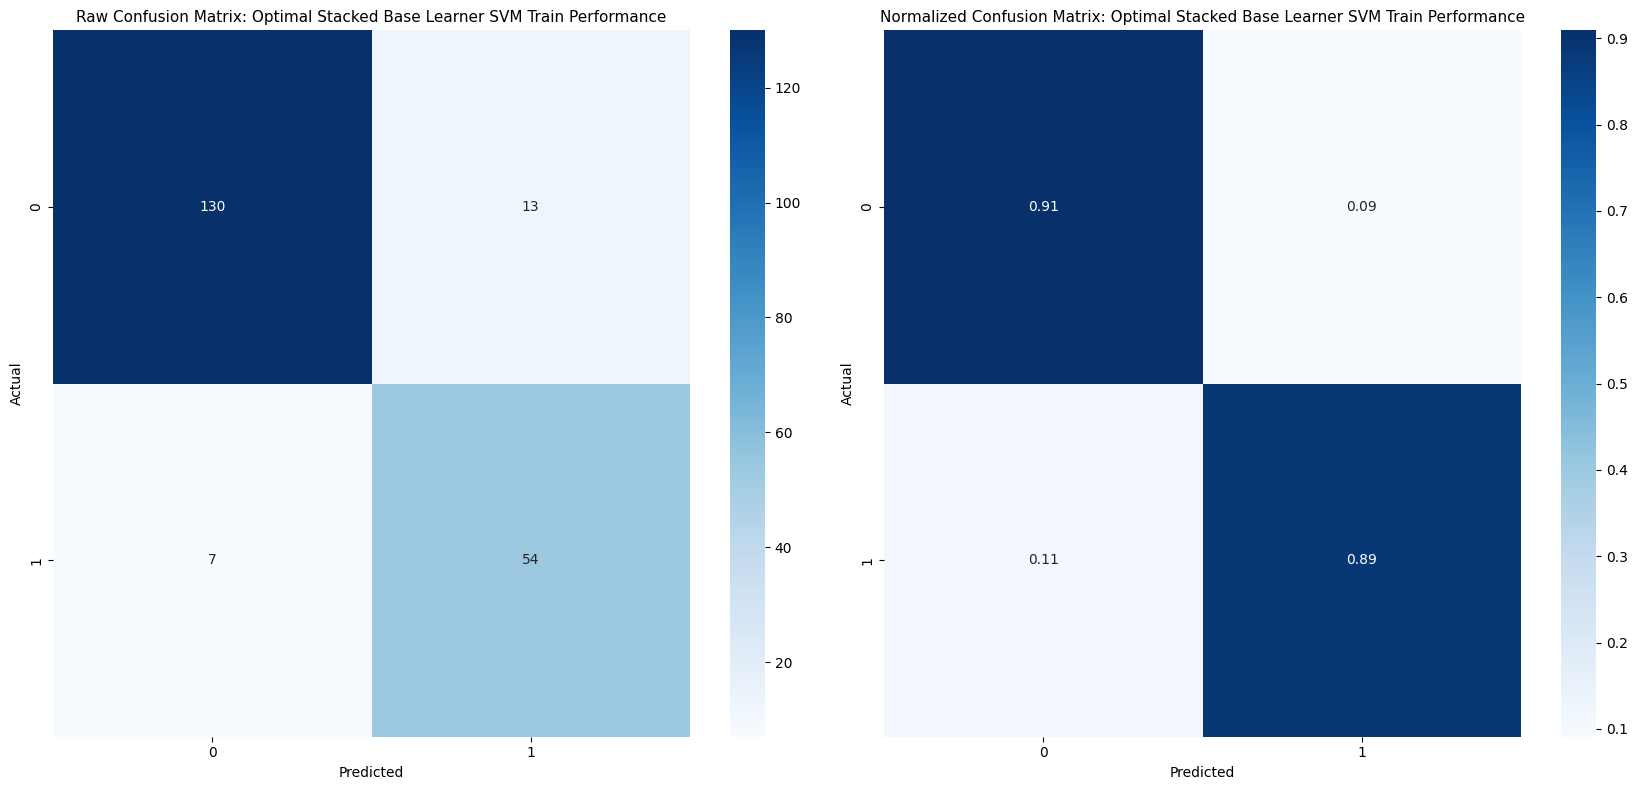

In [321]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner SVM Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner SVM Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [322]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {stacked_baselearner_svm_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



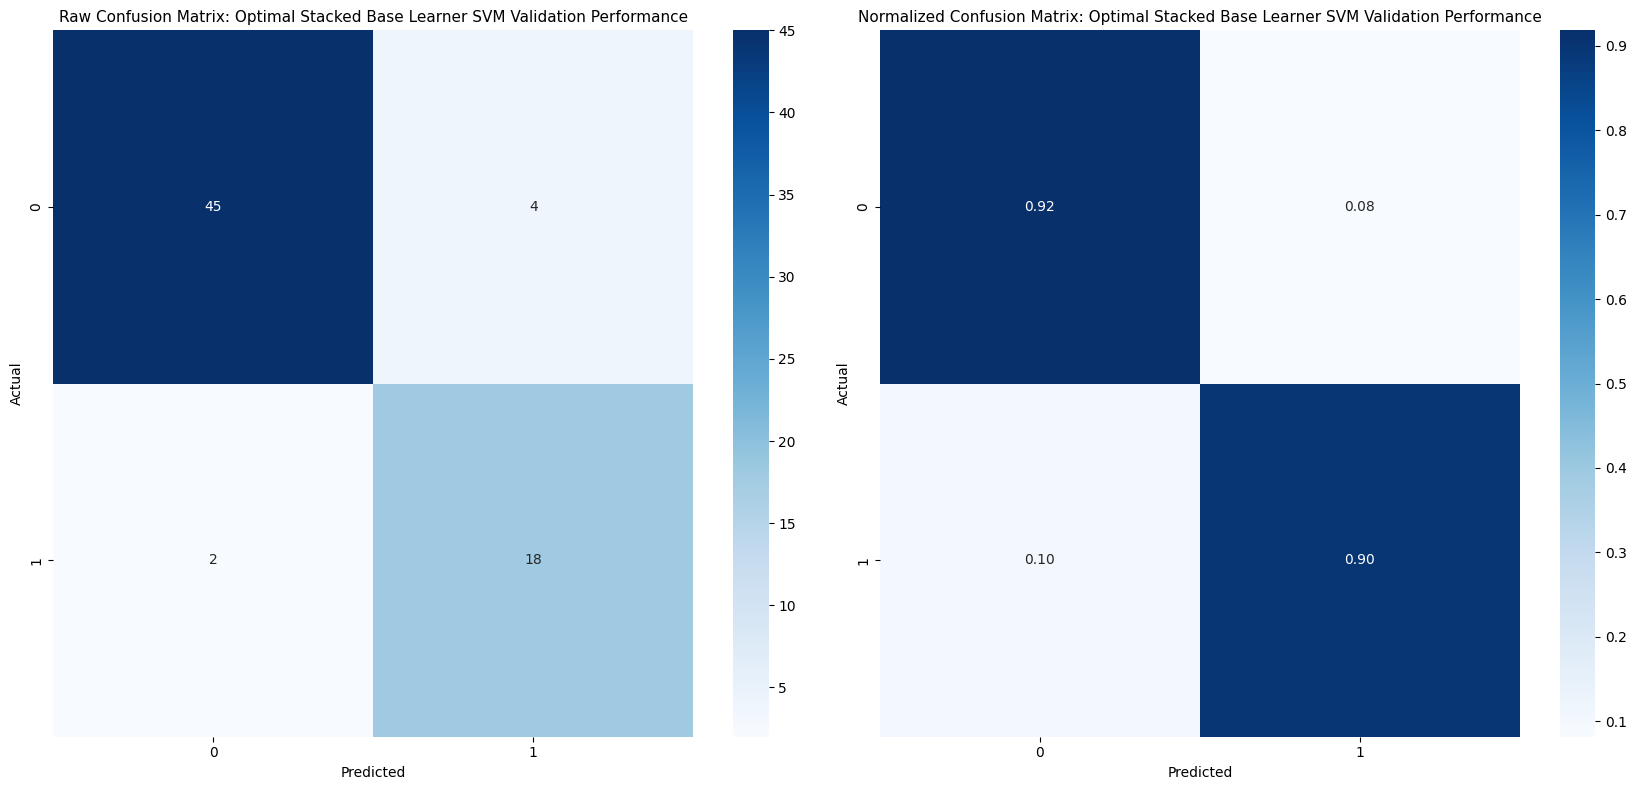

In [323]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner SVM Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner SVM Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [324]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
stacked_baselearner_svm_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_train))
stacked_baselearner_svm_optimal_train['model'] = ['stacked_baselearner_svm_optimal'] * 5
stacked_baselearner_svm_optimal_train['set'] = ['train'] * 5
print('Optimal Stacked Base Learner SVM Train Performance Metrics: ')
display(stacked_baselearner_svm_optimal_train)


Optimal Stacked Base Learner SVM Train Performance Metrics: 


metric_name  metric_value                            model    set
0    Accuracy      0.901961  stacked_baselearner_svm_optimal  train
1   Precision      0.805970  stacked_baselearner_svm_optimal  train
2      Recall      0.885246  stacked_baselearner_svm_optimal  train
3          F1      0.843750  stacked_baselearner_svm_optimal  train
4       AUROC      0.897168  stacked_baselearner_svm_optimal  train

In [325]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
stacked_baselearner_svm_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, stacked_baselearner_svm_optimal.predict(X_preprocessed_validation))
stacked_baselearner_svm_optimal_validation['model'] = ['stacked_baselearner_svm_optimal'] * 5
stacked_baselearner_svm_optimal_validation['set'] = ['validation'] * 5
print('Optimal Stacked Base Learner SVM Validation Performance Metrics: ')
display(stacked_baselearner_svm_optimal_validation)


Optimal Stacked Base Learner SVM Validation Performance Metrics: 


metric_name  metric_value                            model         set
0    Accuracy      0.913043  stacked_baselearner_svm_optimal  validation
1   Precision      0.818182  stacked_baselearner_svm_optimal  validation
2      Recall      0.900000  stacked_baselearner_svm_optimal  validation
3          F1      0.857143  stacked_baselearner_svm_optimal  validation
4       AUROC      0.909184  stacked_baselearner_svm_optimal  validation

In [326]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(stacked_baselearner_svm_optimal, 
            os.path.join("..", MODELS_PATH, "stacked_model_baselearner_svm_optimal.pkl"))


['..\\models\\stacked_model_baselearner_svm_optimal.pkl']

### 1.9.3 Base Learner - Ridge Classifier <a class="anchor" id="1.9.3"></a>

[Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) is a variation of logistic regression that incorporates L2 regularization to prevent overfitting by penalizing large coefficients in the decision boundary equation. It assumes a linear relationship between the predictor variables and the target class, estimating class probabilities using the logistic function. The key steps include fitting a linear model while adding a penalty term to shrink coefficient values, which reduces variance and improves generalization. Ridge Classifier is particularly useful when dealing with collinear features, as it distributes the importance among correlated variables instead of assigning extreme weights to a few. The advantages of Ridge Classifier include its efficiency, interpretability, and ability to handle high-dimensional data with multicollinearity. However, it has limitations: it assumes a linear decision boundary, making it unsuitable for complex, non-linear relationships, and the regularization parameter requires tuning to balance bias and variance effectively. Additionally, it does not perform feature selection, meaning all input features contribute to the decision-making process, which may reduce interpretability in some cases.


In [327]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [328]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
stacked_baselearner_rc_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('stacked_baselearner_rc_model', RidgeClassifier(class_weight='balanced',
                                                     random_state=987654321))
])


In [329]:
##################################
# Defining hyperparameter grid
##################################
stacked_baselearner_rc_hyperparameter_grid = {
    'stacked_baselearner_rc_model__alpha': [1.00, 2.00],
    'stacked_baselearner_rc_model__solver': ['sag', 'saga'],
    'stacked_baselearner_rc_model__tol': [1e-3, 1e-4]
}


In [330]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [331]:
##################################
# Performing Grid Search with cross-validation
##################################
stacked_baselearner_rc_grid_search = GridSearchCV(
    estimator=stacked_baselearner_rc_pipeline,
    param_grid=stacked_baselearner_rc_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [332]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [333]:
##################################
# Fitting GridSearchCV
##################################
stacked_baselearner_rc_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('stacked_baselearner_rc_model',
                                        RidgeClassifier(class_weight='balanced',
                                                        random_state=987654321))]),
             n_jobs=-1,
             param_grid={'stacked_baselearner_rc_model__alpha': [1.0, 2.0],
                         'stacked_baselearner_rc_model__solver': ['sag',
                                                                  'saga'],
                         'stacked_baselearner_rc_model__tol': [0.001, 0.0001]},
             scoring='f1', verbose=1)

In [334]:
##################################
# Identifying the best model
##################################
stacked_baselearner_rc_optimal = stacked_baselearner_rc_grid_search.best_estimator_


In [335]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_baselearner_rc_optimal_f1_cv = stacked_baselearner_rc_grid_search.best_score_
stacked_baselearner_rc_optimal_f1_train = f1_score(y_preprocessed_train_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_train))
stacked_baselearner_rc_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_validation))


In [336]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Base Learner Ridge Classifier: ')
print(f"Best Stacked Base Learner Ridge Classifier Hyperparameters: {stacked_baselearner_rc_grid_search.best_params_}")


Best Stacked Base Learner Ridge Classifier: 
Best Stacked Base Learner Ridge Classifier Hyperparameters: {'stacked_baselearner_rc_model__alpha': 2.0, 'stacked_baselearner_rc_model__solver': 'saga', 'stacked_baselearner_rc_model__tol': 0.0001}


In [337]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_baselearner_rc_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_baselearner_rc_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8097
F1 Score on Training Data: 0.8271

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.92       143
         1.0       0.76      0.90      0.83        61

    accuracy                           0.89       204
   macro avg       0.86      0.89      0.87       204
weighted avg       0.90      0.89      0.89       204



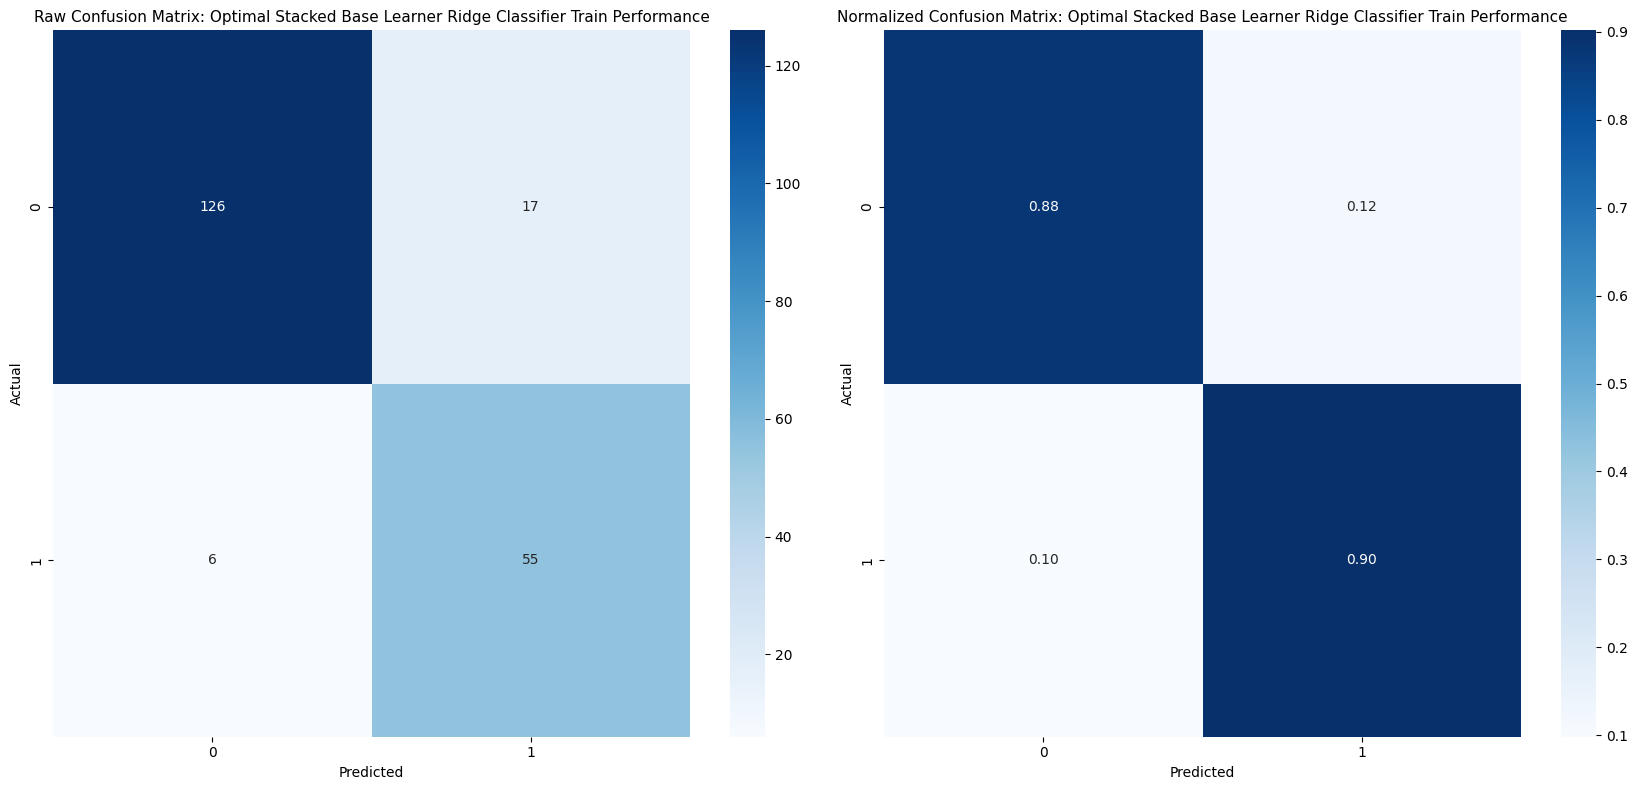

In [338]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner Ridge Classifier Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner Ridge Classifier Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [339]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {stacked_baselearner_rc_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8372

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        49
         1.0       0.78      0.90      0.84        20

    accuracy                           0.90        69
   macro avg       0.87      0.90      0.88        69
weighted avg       0.91      0.90      0.90        69



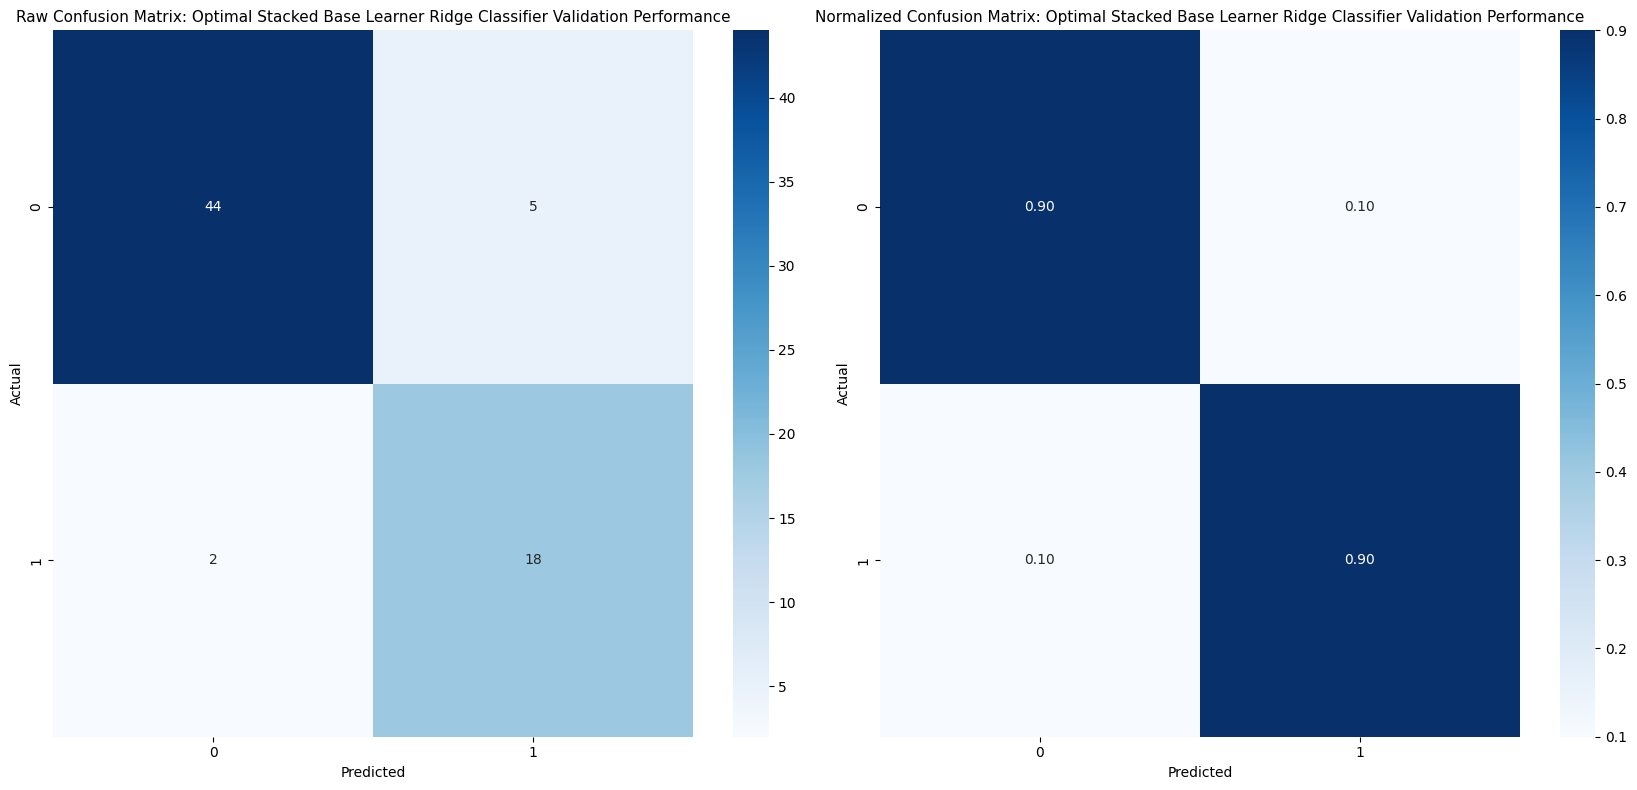

In [340]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner Ridge Classifier Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner Ridge Classifier Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [341]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
stacked_baselearner_rc_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_train))
stacked_baselearner_rc_optimal_train['model'] = ['stacked_baselearner_rc_optimal'] * 5
stacked_baselearner_rc_optimal_train['set'] = ['train'] * 5
print('Optimal Stacked Base Learner Ridge Classifier Train Performance Metrics: ')
display(stacked_baselearner_rc_optimal_train)


Optimal Stacked Base Learner Ridge Classifier Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.887255  stacked_baselearner_rc_optimal  train
1   Precision      0.763889  stacked_baselearner_rc_optimal  train
2      Recall      0.901639  stacked_baselearner_rc_optimal  train
3          F1      0.827068  stacked_baselearner_rc_optimal  train
4       AUROC      0.891379  stacked_baselearner_rc_optimal  train

In [342]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
stacked_baselearner_rc_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, stacked_baselearner_rc_optimal.predict(X_preprocessed_validation))
stacked_baselearner_rc_optimal_validation['model'] = ['stacked_baselearner_rc_optimal'] * 5
stacked_baselearner_rc_optimal_validation['set'] = ['validation'] * 5
print('Optimal Stacked Base Learner Ridge Classifier Validation Performance Metrics: ')
display(stacked_baselearner_rc_optimal_validation)


Optimal Stacked Base Learner Ridge Classifier Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.898551  stacked_baselearner_rc_optimal  validation
1   Precision      0.782609  stacked_baselearner_rc_optimal  validation
2      Recall      0.900000  stacked_baselearner_rc_optimal  validation
3          F1      0.837209  stacked_baselearner_rc_optimal  validation
4       AUROC      0.898980  stacked_baselearner_rc_optimal  validation

In [343]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(stacked_baselearner_rc_optimal, 
            os.path.join("..", MODELS_PATH, "stacked_model_baselearner_ridge_classifier_optimal.pkl"))


['..\\models\\stacked_model_baselearner_ridge_classifier_optimal.pkl']

### 1.9.4 Base Learner - Neural Network <a class="anchor" id="1.9.4"></a>

[Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) is a classification algorithm inspired by the human brain, consisting of layers of interconnected neurons that transform input features through weighted connections and activation functions. It learns patterns in data through backpropagation, where the network adjusts its internal weights to minimize classification error. The process involves an input layer receiving data, multiple hidden layers extracting hierarchical features, and an output layer producing a final prediction. The key advantages of neural networks include their ability to model highly complex, non-linear relationships, making them suitable for image, text, and speech classification tasks. They are also highly scalable, capable of handling massive datasets. However, neural networks have several challenges: they require substantial computational resources, especially for deep architectures; they need large amounts of labeled data for effective training; and they are often difficult to interpret due to their "black box" nature. Additionally, hyperparameter tuning, including choosing the number of layers, neurons, and activation functions, is non-trivial and requires careful optimization to prevent overfitting or underfitting.


In [344]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [345]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
stacked_baselearner_nn_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('stacked_baselearner_nn_model', MLPClassifier(max_iter=500,
                                                   solver='lbfgs',
                                                   early_stopping=False,
                                                   random_state=987654321))
])


In [346]:
##################################
# Defining hyperparameter grid
##################################
stacked_baselearner_nn_hyperparameter_grid = {
    'stacked_baselearner_nn_model__hidden_layer_sizes': [(50,), (100,)],
    'stacked_baselearner_nn_model__activation': ['relu', 'tanh'],
    'stacked_baselearner_nn_model__alpha': [0.0001, 0.001]
}


In [347]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [348]:
##################################
# Performing Grid Search with cross-validation
##################################
stacked_baselearner_nn_grid_search = GridSearchCV(
    estimator=stacked_baselearner_nn_pipeline,
    param_grid=stacked_baselearner_nn_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [349]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [350]:
##################################
# Fitting GridSearchCV
##################################
stacked_baselearner_nn_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('stacked_baselearner_nn_model',
                                        MLPClassifier(max_iter=500,
                                                      random_state=987654321,
                                                      solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'stacked_baselearner_nn_model__activation': ['relu',
                                                                      'tanh'],
                         'stacked_baselearner_nn_model__alpha': [0.0001, 0.001],
                         'stacked_baselearner_nn_model__hidden_layer_sizes': [(50,),
                                                                              (100,)]},
             scoring='f1', verbose=1)

In [351]:
##################################
# Identifying the best model
##################################
stacked_baselearner_nn_optimal = stacked_baselearner_nn_grid_search.best_estimator_


In [352]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_baselearner_nn_optimal_f1_cv = stacked_baselearner_nn_grid_search.best_score_
stacked_baselearner_nn_optimal_f1_train = f1_score(y_preprocessed_train_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_train))
stacked_baselearner_nn_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_validation))


In [353]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Base Learner Neural Network: ')
print(f"Best Stacked Base Learner Neural Network Hyperparameters: {stacked_baselearner_nn_grid_search.best_params_}")


Best Stacked Base Learner Neural Network: 
Best Stacked Base Learner Neural Network Hyperparameters: {'stacked_baselearner_nn_model__activation': 'relu', 'stacked_baselearner_nn_model__alpha': 0.0001, 'stacked_baselearner_nn_model__hidden_layer_sizes': (50,)}


In [354]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_baselearner_nn_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_baselearner_nn_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8063
F1 Score on Training Data: 0.8226

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       143
         1.0       0.81      0.84      0.82        61

    accuracy                           0.89       204
   macro avg       0.87      0.88      0.87       204
weighted avg       0.89      0.89      0.89       204



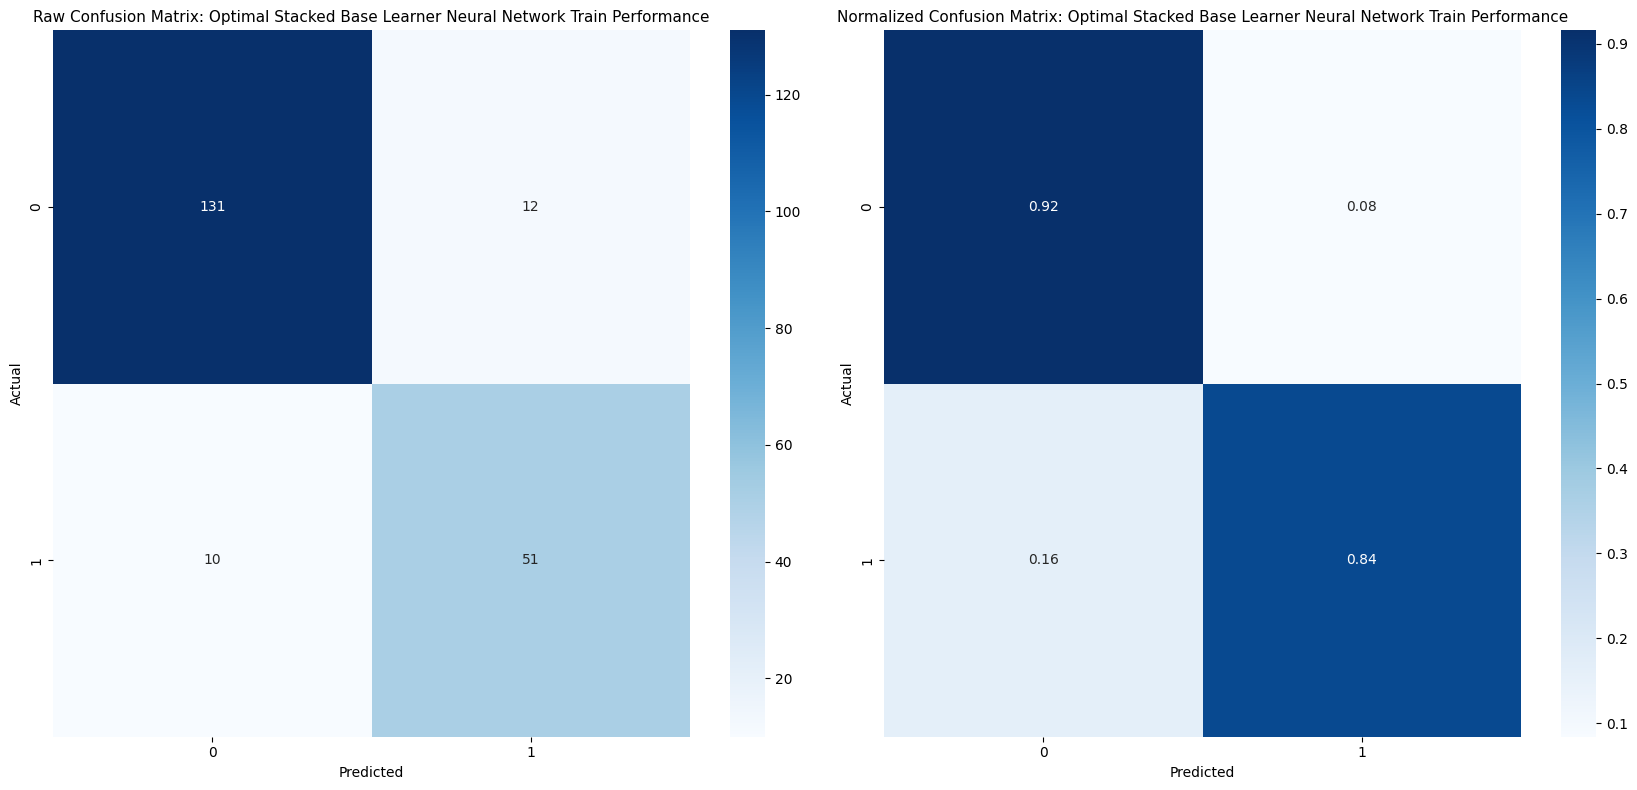

In [355]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner Neural Network Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner Neural Network Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [356]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {stacked_baselearner_nn_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8095

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92        49
         1.0       0.77      0.85      0.81        20

    accuracy                           0.88        69
   macro avg       0.85      0.87      0.86        69
weighted avg       0.89      0.88      0.89        69



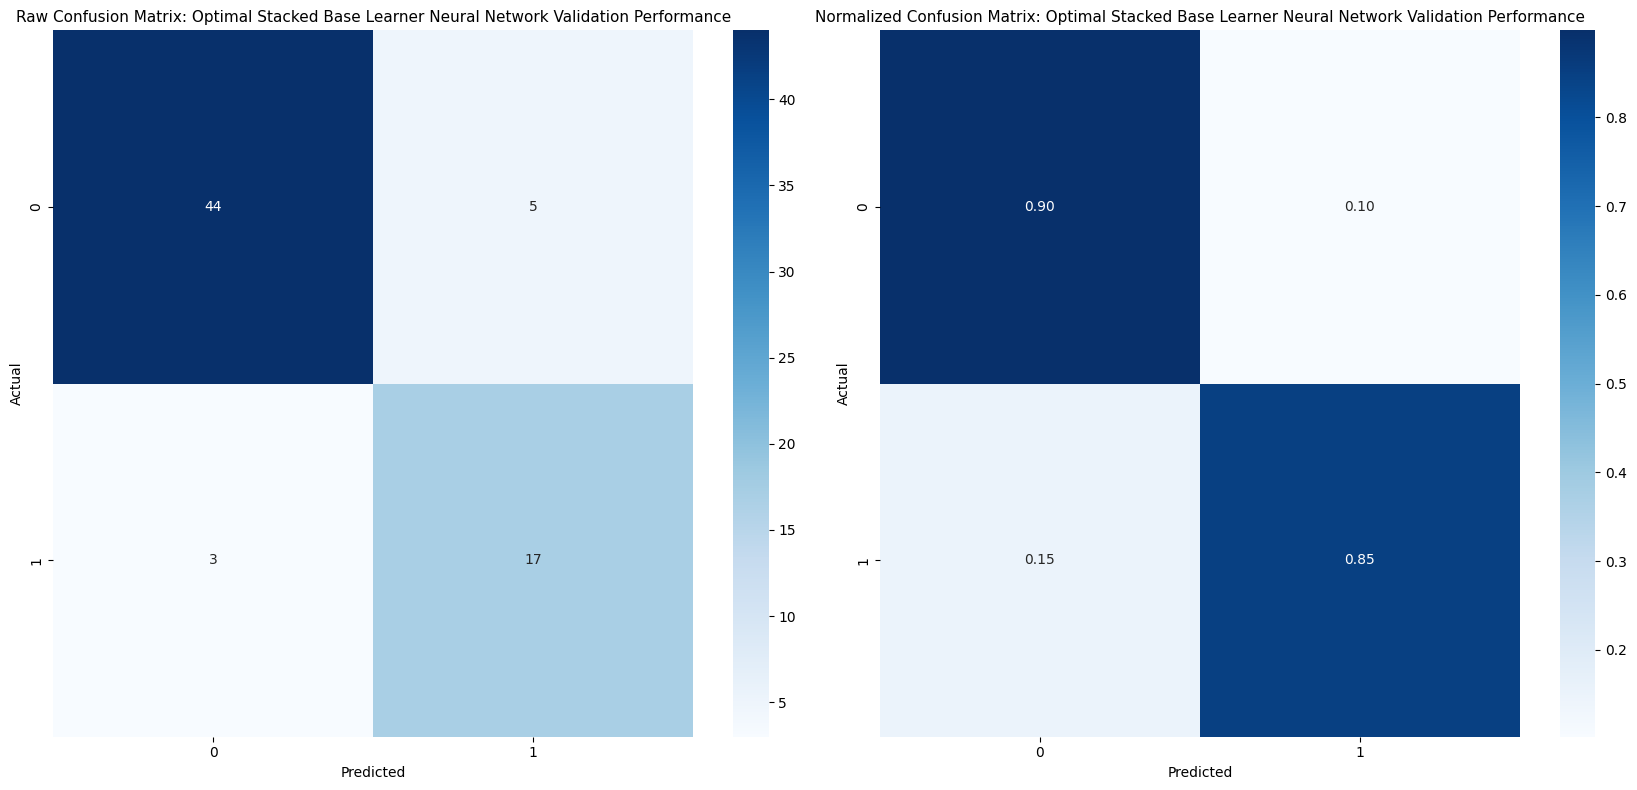

In [357]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner Neural Network Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner Neural Network Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [358]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
stacked_baselearner_nn_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_train))
stacked_baselearner_nn_optimal_train['model'] = ['stacked_baselearner_nn_optimal'] * 5
stacked_baselearner_nn_optimal_train['set'] = ['train'] * 5
print('Optimal Stacked Base Learner Neural Network Train Performance Metrics: ')
display(stacked_baselearner_nn_optimal_train)


Optimal Stacked Base Learner Neural Network Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.892157  stacked_baselearner_nn_optimal  train
1   Precision      0.809524  stacked_baselearner_nn_optimal  train
2      Recall      0.836066  stacked_baselearner_nn_optimal  train
3          F1      0.822581  stacked_baselearner_nn_optimal  train
4       AUROC      0.876075  stacked_baselearner_nn_optimal  train

In [359]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
stacked_baselearner_nn_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, stacked_baselearner_nn_optimal.predict(X_preprocessed_validation))
stacked_baselearner_nn_optimal_validation['model'] = ['stacked_baselearner_nn_optimal'] * 5
stacked_baselearner_nn_optimal_validation['set'] = ['validation'] * 5
print('Optimal Stacked Base Learner Neural Network Validation Performance Metrics: ')
display(stacked_baselearner_nn_optimal_validation)


Optimal Stacked Base Learner Neural Network Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.884058  stacked_baselearner_nn_optimal  validation
1   Precision      0.772727  stacked_baselearner_nn_optimal  validation
2      Recall      0.850000  stacked_baselearner_nn_optimal  validation
3          F1      0.809524  stacked_baselearner_nn_optimal  validation
4       AUROC      0.873980  stacked_baselearner_nn_optimal  validation

In [360]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(stacked_baselearner_nn_optimal, 
            os.path.join("..", MODELS_PATH, "stacked_model_baselearner_neural_network_optimal.pkl"))


['..\\models\\stacked_model_baselearner_neural_network_optimal.pkl']

### 1.9.5 Base Learner - Decision Tree <a class="anchor" id="1.9.5"></a>

[Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) is a hierarchical classification model that recursively splits data based on feature values, forming a tree-like structure where each node represents a decision rule and each leaf represents a class label. The tree is built using a greedy algorithm that selects the best feature at each step based on criteria such as information gain or Gini impurity. The main advantages of decision trees include their interpretability, as the decision-making process can be easily visualized and understood, and their ability to model non-linear relationships without requiring extensive feature engineering. They also handle both numerical and categorical data well. However, decision trees are prone to overfitting, especially when deep trees are grown without pruning. Small changes in the dataset can lead to entirely different structures, making them unstable. Additionally, they tend to perform poorly on highly complex problems where relationships between variables are intricate, making ensemble methods such as Random Forest or Gradient Boosting more effective in practice.


In [361]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [362]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
stacked_baselearner_dt_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('stacked_baselearner_dt_model', DecisionTreeClassifier(class_weight='balanced',
                                                            random_state=987654321))
])


In [363]:
##################################
# Defining hyperparameter grid
##################################
stacked_baselearner_dt_hyperparameter_grid = {
    'stacked_baselearner_dt_model__criterion': ['gini', 'entropy'],
    'stacked_baselearner_dt_model__max_depth': [3, 6],
    'stacked_baselearner_dt_model__min_samples_leaf': [5, 10]
}


In [364]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [365]:
##################################
# Performing Grid Search with cross-validation
##################################
stacked_baselearner_dt_grid_search = GridSearchCV(
    estimator=stacked_baselearner_dt_pipeline,
    param_grid=stacked_baselearner_dt_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [366]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [367]:
##################################
# Fitting GridSearchCV
##################################
stacked_baselearner_dt_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('stacked_baselearner_dt_model',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=987654321))]),
             n_jobs=-1,
             param_grid={'stacked_baselearner_dt_model__criterion': ['gini',
                                                                     'entropy'],
                         'stacked_baselearner_dt_model__max_depth': [3, 6],
                         'stacked_baselearner_dt_model__min_samples_leaf': [5,
                                                                            10]},
             scoring='f1', verbose=1)

In [368]:
##################################
# Identifying the best model
##################################
stacked_baselearner_dt_optimal = stacked_baselearner_dt_grid_search.best_estimator_


In [369]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
stacked_baselearner_dt_optimal_f1_cv = stacked_baselearner_dt_grid_search.best_score_
stacked_baselearner_dt_optimal_f1_train = f1_score(y_preprocessed_train_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_train))
stacked_baselearner_dt_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_validation))


In [370]:
##################################
# Identifying the optimal model
##################################
print('Best Stacked Base Learner Decision Trees: ')
print(f"Best Stacked Base Learner Decision Trees Hyperparameters: {stacked_baselearner_dt_grid_search.best_params_}")


Best Stacked Base Learner Decision Trees: 
Best Stacked Base Learner Decision Trees Hyperparameters: {'stacked_baselearner_dt_model__criterion': 'gini', 'stacked_baselearner_dt_model__max_depth': 6, 'stacked_baselearner_dt_model__min_samples_leaf': 5}


In [371]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {stacked_baselearner_dt_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {stacked_baselearner_dt_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8099
F1 Score on Training Data: 0.8511

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       143
         1.0       0.75      0.98      0.85        61

    accuracy                           0.90       204
   macro avg       0.87      0.92      0.89       204
weighted avg       0.92      0.90      0.90       204



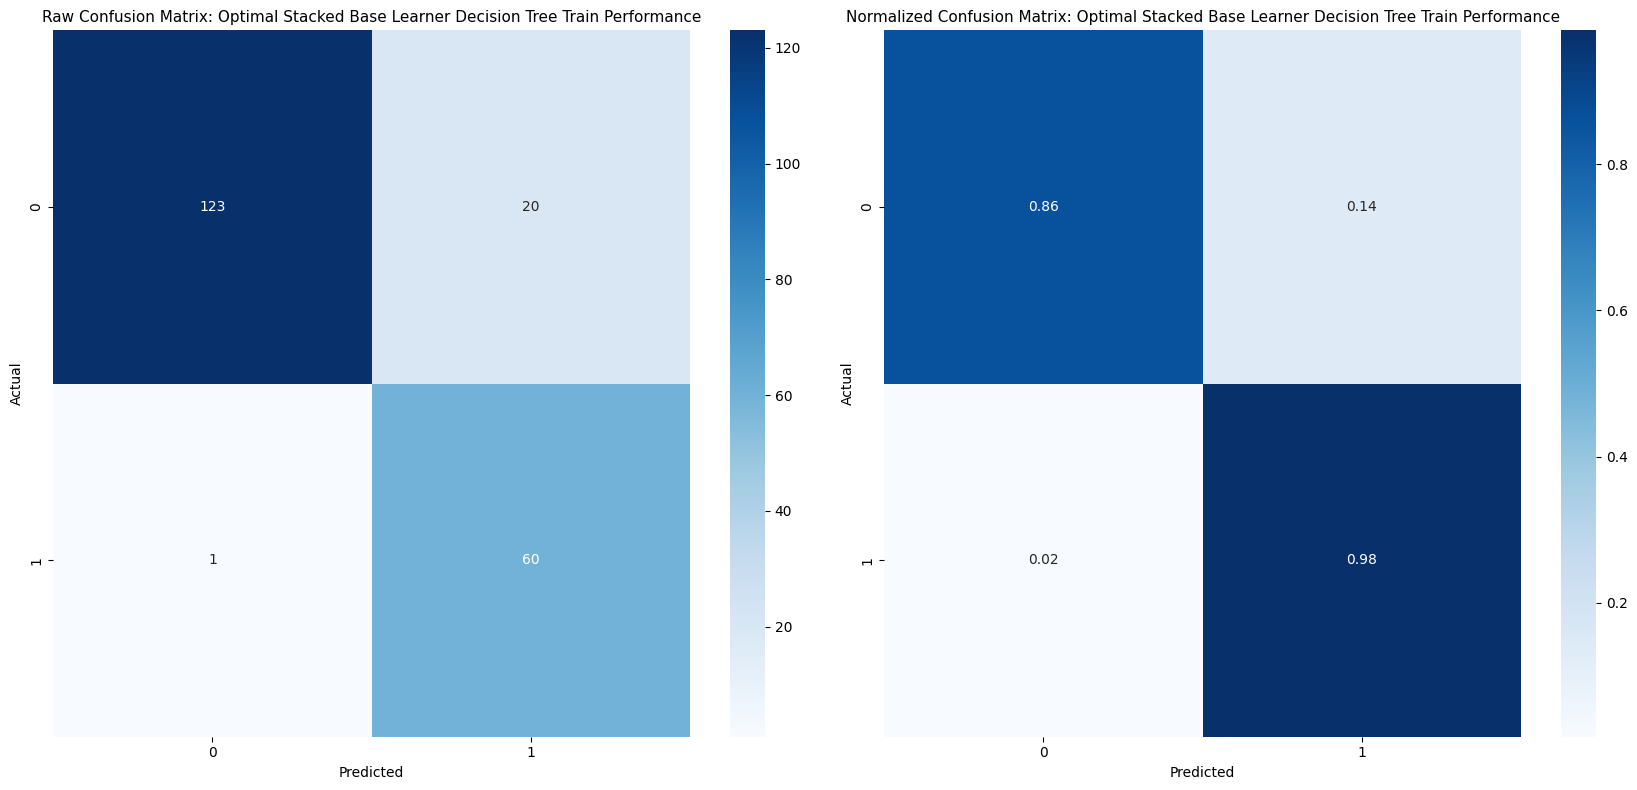

In [372]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner Decision Tree Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner Decision Tree Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [373]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {stacked_baselearner_dt_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8000

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        49
         1.0       0.67      1.00      0.80        20

    accuracy                           0.86        69
   macro avg       0.83      0.90      0.84        69
weighted avg       0.90      0.86      0.86        69



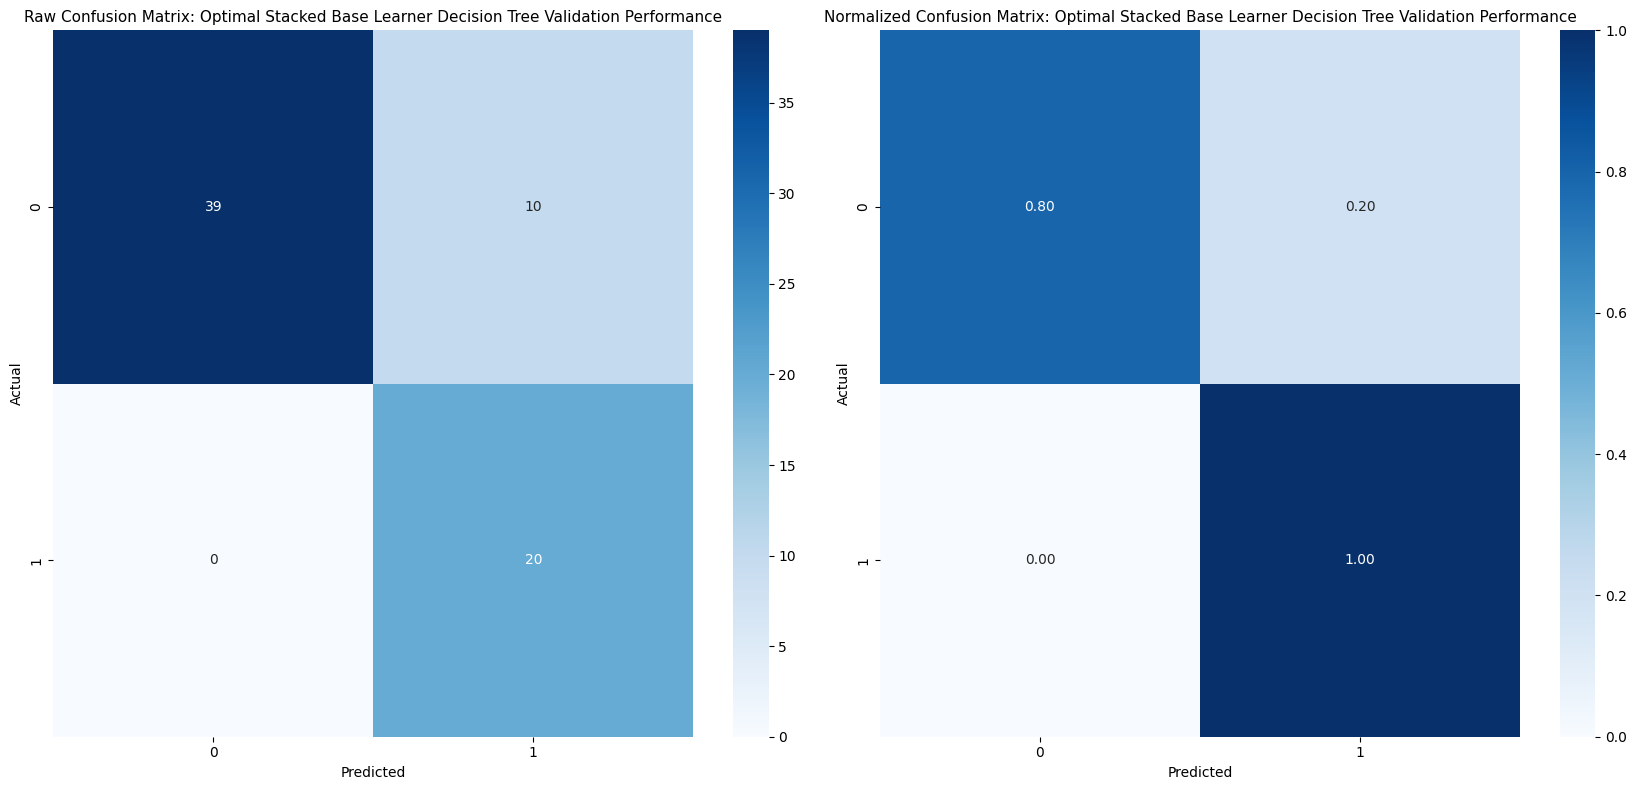

In [374]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Base Learner Decision Tree Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Base Learner Decision Tree Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [375]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
stacked_baselearner_dt_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_train))
stacked_baselearner_dt_optimal_train['model'] = ['stacked_baselearner_dt_optimal'] * 5
stacked_baselearner_dt_optimal_train['set'] = ['train'] * 5
print('Optimal Stacked Base Learner Decision Tree Train Performance Metrics: ')
display(stacked_baselearner_dt_optimal_train)


Optimal Stacked Base Learner Decision Tree Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.897059  stacked_baselearner_dt_optimal  train
1   Precision      0.750000  stacked_baselearner_dt_optimal  train
2      Recall      0.983607  stacked_baselearner_dt_optimal  train
3          F1      0.851064  stacked_baselearner_dt_optimal  train
4       AUROC      0.921873  stacked_baselearner_dt_optimal  train

In [376]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
stacked_baselearner_dt_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, stacked_baselearner_dt_optimal.predict(X_preprocessed_validation))
stacked_baselearner_dt_optimal_validation['model'] = ['stacked_baselearner_dt_optimal'] * 5
stacked_baselearner_dt_optimal_validation['set'] = ['validation'] * 5
print('Optimal Stacked Base Learner Decision Tree Validation Performance Metrics: ')
display(stacked_baselearner_dt_optimal_validation)


Optimal Stacked Base Learner Decision Tree Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.855072  stacked_baselearner_dt_optimal  validation
1   Precision      0.666667  stacked_baselearner_dt_optimal  validation
2      Recall      1.000000  stacked_baselearner_dt_optimal  validation
3          F1      0.800000  stacked_baselearner_dt_optimal  validation
4       AUROC      0.897959  stacked_baselearner_dt_optimal  validation

In [377]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(stacked_baselearner_dt_optimal, 
            os.path.join("..", MODELS_PATH, "stacked_model_baselearner_decision_trees_optimal.pkl"))


['..\\models\\stacked_model_baselearner_decision_trees_optimal.pkl']

### 1.9.6 Meta Learner - Logistic Regression <a class="anchor" id="1.9.6"></a>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) is a linear classification algorithm that estimates the probability of a binary outcome using the logistic (sigmoid) function. It assumes a linear relationship between the predictor variables and the log-odds of the target class. The algorithm involves calculating a weighted sum of input features, applying the sigmoid function to transform the result into a probability, and assigning a class label based on a threshold (typically 0.5). Logistic regression is simple, interpretable, and computationally efficient, making it a popular choice for baseline models and problems where relationships between features and the target variable are approximately linear. It also provides insight into feature importance through its learned coefficients. However, logistic regression has limitations: it struggles with non-linear relationships unless feature engineering or polynomial terms are used, it is sensitive to multicollinearity, and it assumes independence between predictor variables, which may not always hold in real-world data. Additionally, it may perform poorly when classes are highly imbalanced, requiring techniques such as weighting or resampling to improve predictions.


In [378]:
##################################
# Defining the stacking strategy (5-fold CV)
##################################
stacking_strategy = KFold(n_splits=5,
                          shuffle=True,
                          random_state=987654321)


In [379]:
##################################
# Loading the pre-trained base learners
# from the previously saved pickle files
##################################
stacked_baselearners = {}
stacked_baselearner_model = ['knn', 'svm', 'ridge_classifier', 'neural_network', 'decision_trees']
for name in stacked_baselearner_model:
    stacked_baselearner_model_path = (os.path.join("..", MODELS_PATH, f"stacked_model_baselearner_{name}_optimal.pkl"))
    stacked_baselearners[name] = joblib.load(stacked_baselearner_model_path)
        

In [380]:
##################################
# Initializing the meta-feature matrices
##################################
meta_train_stacked = np.zeros((X_preprocessed_train.shape[0], len(stacked_baselearners)))
meta_validation_stacked = np.zeros((X_preprocessed_validation.shape[0], len(stacked_baselearners)))


In [381]:
##################################
# Generating out-of-fold predictions for training the meta learner
##################################
for i, (name, model) in enumerate(stacked_baselearners.items()):
    oof_preds = np.zeros(X_preprocessed_train.shape[0])
    validation_fold_preds = np.zeros((X_preprocessed_validation.shape[0], stacking_strategy.get_n_splits()))

    for j, (train_idx, val_idx) in enumerate(stacking_strategy.split(X_preprocessed_train)):
        model.fit(X_preprocessed_train.iloc[train_idx], y_preprocessed_train_encoded[train_idx])
        oof_preds[val_idx] = model.predict_proba(X_preprocessed_train.iloc[val_idx])[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_train.iloc[val_idx])
        validation_fold_preds[:, j] = model.predict_proba(X_preprocessed_validation)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_validation)
        
    # Extracting the meta-feature matrix for the train data
    meta_train_stacked[:, i] = oof_preds
    # Extracting the meta-feature matrix for the validation data
    # Averaging the validation predictions across folds
    meta_validation_stacked[:, i] = validation_fold_preds.mean(axis=1)  


In [382]:
##################################
# Training the meta learner on the stacked features
##################################
stacked_metalearner_lr_optimal = LogisticRegression(class_weight='balanced', 
                                            penalty='l2',
                                            C=1.0,
                                            solver='lbfgs',
                                            random_state=987654321)
stacked_metalearner_lr_optimal.fit(meta_train_stacked, y_preprocessed_train_encoded)


LogisticRegression(class_weight='balanced', random_state=987654321)

In [383]:
##################################
# Saving the meta learner model
# developed from the meta-train data
################################## 
joblib.dump(stacked_metalearner_lr_optimal, 
            os.path.join("..", MODELS_PATH, "stacked_model_metalearner_logistic_regression_optimal.pkl"))


['..\\models\\stacked_model_metalearner_logistic_regression_optimal.pkl']

In [384]:
##################################
# Creating a function to extract the 
# meta-feature matrices for new data
################################## 
def extract_stacked_metafeature_matrix(X_preprocessed_new):
    ##################################
    # Loading the pre-trained base learners
    # from the previously saved pickle files
    ##################################
    stacked_baselearners = {}
    stacked_baselearner_model = ['knn', 'svm', 'ridge_classifier', 'neural_network', 'decision_trees']
    for name in stacked_baselearner_model:
        stacked_baselearner_model_path = (os.path.join("..", MODELS_PATH, f"stacked_model_baselearner_{name}_optimal.pkl"))
        stacked_baselearners[name] = joblib.load(stacked_baselearner_model_path)

    ##################################
    # Generating meta-features for new data
    ##################################
    meta_train_stacked = np.zeros((X_preprocessed_train.shape[0], len(stacked_baselearners)))
    meta_new_stacked = np.zeros((X_preprocessed_new.shape[0], len(stacked_baselearners)))

    ##################################
    # Generating out-of-fold predictions for training the meta learner
    ##################################
    for i, (name, model) in enumerate(stacked_baselearners.items()):
        oof_preds = np.zeros(X_preprocessed_train.shape[0])
        new_fold_preds = np.zeros((X_preprocessed_new.shape[0], stacking_strategy.get_n_splits()))

        for j, (train_idx, val_idx) in enumerate(stacking_strategy.split(X_preprocessed_train)):
            model.fit(X_preprocessed_train.iloc[train_idx], y_preprocessed_train_encoded[train_idx])
            oof_preds[val_idx] = model.predict_proba(X_preprocessed_train.iloc[val_idx])[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_train.iloc[val_idx])
            new_fold_preds[:, j] = model.predict_proba(X_preprocessed_new)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_new)
        
        # Extracting the meta-feature matrix for the train data
        meta_train_stacked[:, i] = oof_preds
        # Extracting the meta-feature matrix for the new data
        # Averaging the new predictions across folds
        meta_new_stacked[:, i] = new_fold_preds.mean(axis=1)

    return meta_new_stacked
    

In [385]:
##################################
# Evaluating the F1 scores
# on the training and validation data
##################################
stacked_metalearner_lr_optimal_f1_train = f1_score(y_preprocessed_train_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_train)))
stacked_metalearner_lr_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_validation)))


In [386]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training data
# to assess overfitting optimism
##################################
print(f"F1 Score on Training Data: {stacked_metalearner_lr_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_train))))


F1 Score on Training Data: 0.8527

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.96      0.91      0.93       143
         1.0       0.81      0.90      0.85        61

    accuracy                           0.91       204
   macro avg       0.88      0.91      0.89       204
weighted avg       0.91      0.91      0.91       204



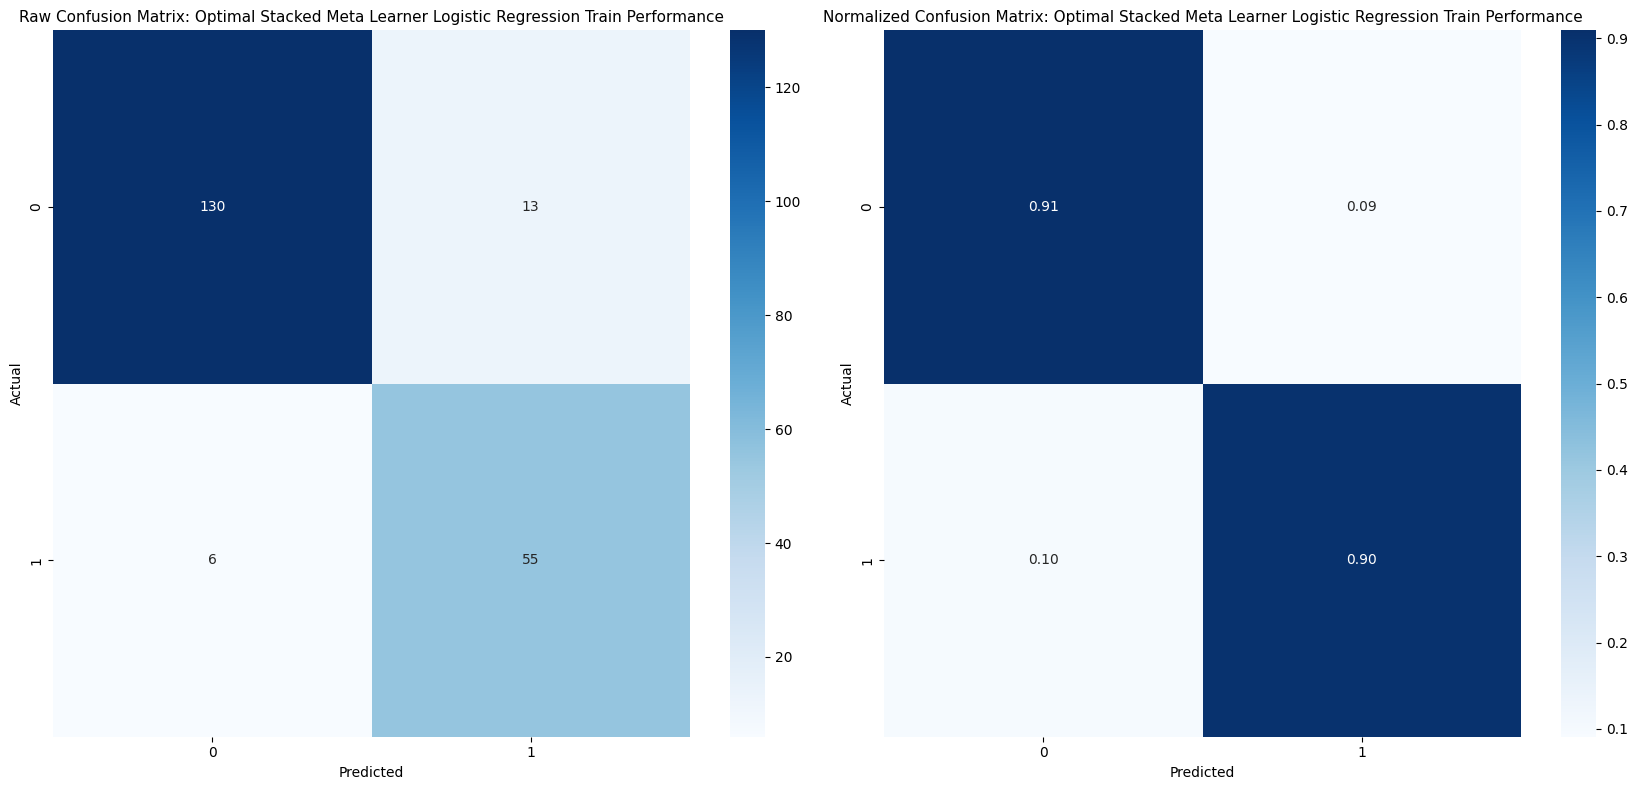

In [387]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_train)))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_train)), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Meta Learner Logistic Regression Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Meta Learner Logistic Regression Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [388]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validationing Data: {stacked_metalearner_lr_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_validation))))


F1 Score on Validationing Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



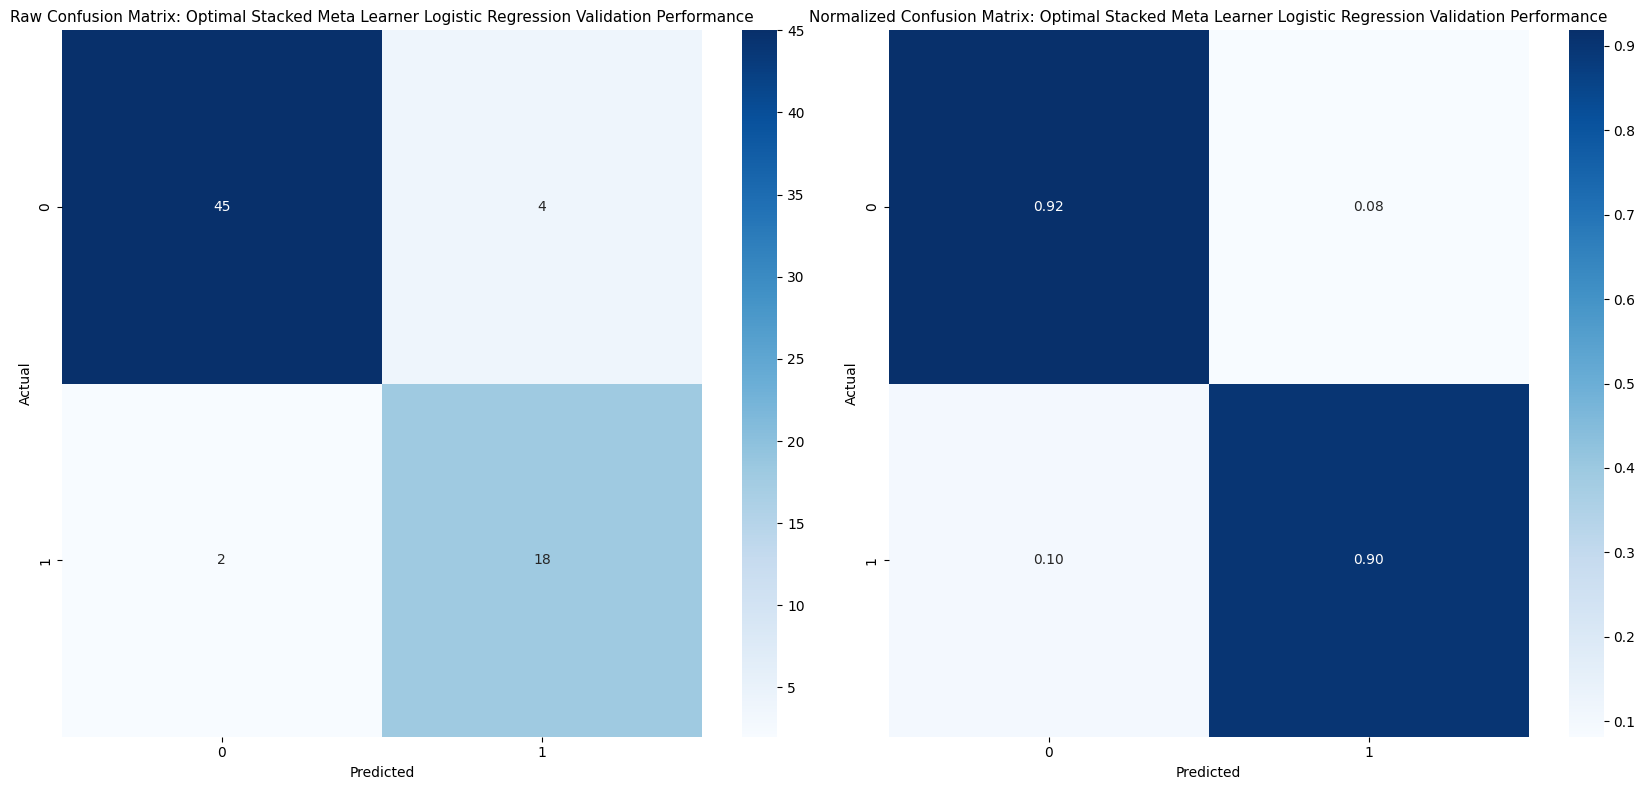

In [389]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_validation)))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_validation)), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Stacked Meta Learner Logistic Regression Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Stacked Meta Learner Logistic Regression Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [390]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
stacked_metalearner_lr_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_train)))
stacked_metalearner_lr_optimal_train['model'] = ['stacked_metalearner_lr_optimal'] * 5
stacked_metalearner_lr_optimal_train['set'] = ['train'] * 5
print('Optimal Stacked Meta Learner Logistic Regression Train Performance Metrics: ')
display(stacked_metalearner_lr_optimal_train)


Optimal Stacked Meta Learner Logistic Regression Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.906863  stacked_metalearner_lr_optimal  train
1   Precision      0.808824  stacked_metalearner_lr_optimal  train
2      Recall      0.901639  stacked_metalearner_lr_optimal  train
3          F1      0.852713  stacked_metalearner_lr_optimal  train
4       AUROC      0.905365  stacked_metalearner_lr_optimal  train

In [391]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
stacked_metalearner_lr_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, stacked_metalearner_lr_optimal.predict(extract_stacked_metafeature_matrix(X_preprocessed_validation)))
stacked_metalearner_lr_optimal_validation['model'] = ['stacked_metalearner_lr_optimal'] * 5
stacked_metalearner_lr_optimal_validation['set'] = ['validation'] * 5
print('Optimal Stacked Meta Learner Logistic Regression Validation Performance Metrics: ')
display(stacked_metalearner_lr_optimal_validation)


Optimal Stacked Meta Learner Logistic Regression Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.913043  stacked_metalearner_lr_optimal  validation
1   Precision      0.818182  stacked_metalearner_lr_optimal  validation
2      Recall      0.900000  stacked_metalearner_lr_optimal  validation
3          F1      0.857143  stacked_metalearner_lr_optimal  validation
4       AUROC      0.909184  stacked_metalearner_lr_optimal  validation

## 1.10. Blended Model Development <a class="anchor" id="1.10"></a>

[Blending](https://www.manning.com/books/ensemble-methods-for-machine-learning) is an ensemble technique that enhances classification accuracy by training a meta-model on a holdout validation set, rather than using out-of-fold predictions like stacking. This simplifies implementation while maintaining the benefits of combining multiple base models. The process of blending starts by training base models on the full training dataset. Instead of applying cross-validation to obtain out-of-fold predictions, blending reserves a small portion of the training data as a holdout set. The base models make predictions on this unseen holdout set, and these predictions are then used as input features for a meta-model, which learns how to optimally combine them into a final classification decision. Since the meta-model is trained on predictions from unseen data, it avoids the risk of overfitting that can sometimes occur when base models are evaluated on the same data they were trained on. Blending is motivated by its simplicity and ease of implementation compared to stacking, as it eliminates the need for repeated k-fold cross-validation to generate training data for the meta-model. However, one drawback is that the meta-model has access to fewer training examples, as a portion of the data is withheld for validation rather than being used for training. This can limit the generalization ability of the final model, especially if the holdout set is too small. Despite this limitation, blending remains a useful approach in applications where a quick and effective ensemble method is needed without the computational overhead of stacking.


### 1.10.1 Base Learner - K-Nearest Neighbors <a class="anchor" id="1.10.1"></a>

[K-Nearest Neighbors (KNN)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) is a non-parametric classification algorithm that makes predictions based on the majority class among the k-nearest training samples in feature space. It does not create an explicit model during training; instead, it stores the entire dataset and computes distances between a query point and all training samples during inference. The algorithm follows three key steps: (1) compute the distance between the query point and all training samples (typically using Euclidean distance), (2) identify the k closest points, and (3) assign the most common class among them as the predicted label. KNN is advantageous because it is simple, requires minimal training time, and can model complex decision boundaries when provided with sufficient data. However, it has significant drawbacks: it is computationally expensive for large datasets since distances must be computed for every prediction, it is sensitive to irrelevant or redundant features, and it requires careful selection of k, as a small k can make the model too sensitive to noise while a large k can overly smooth decision boundaries.


In [392]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender', 'Smoking', 'Physical_Examination', 'Adenopathy', 'Focality', 'Risk', 'T', 'Stage', 'Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
    remainder='passthrough',
    force_int_remainder_cols=False)


In [393]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
blended_baselearner_knn_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('blended_baselearner_knn_model', KNeighborsClassifier())
])


In [394]:
##################################
# Defining hyperparameter grid
##################################
blended_baselearner_knn_hyperparameter_grid = {
    'blended_baselearner_knn_model__n_neighbors': [3, 5],
    'blended_baselearner_knn_model__weights': ['uniform', 'distance'],
    'blended_baselearner_knn_model__metric': ['minkowski', 'euclidean']
}


In [395]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [396]:
##################################
# Performing Grid Search with cross-validation
##################################
blended_baselearner_knn_grid_search = GridSearchCV(
    estimator=blended_baselearner_knn_pipeline,
    param_grid=blended_baselearner_knn_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [397]:
##################################
# Encoding the response variables
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [398]:
##################################
# Fitting GridSearchCV
##################################
blended_baselearner_knn_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('blended_baselearner_knn_model',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'blended_baselearner_knn_model__metric': ['minkowski',
                                                                   'euclidean'],
                         'blended_baselearner_knn_model__n_neighbors': [3, 5],
                         'blended_baselearner_knn_model__weights': ['uniform',
                                                                    'distance']},
             scoring='f1', verbose=1)

In [399]:
##################################
# Identifying the best model
##################################
blended_baselearner_knn_optimal = blended_baselearner_knn_grid_search.best_estimator_


In [400]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
blended_baselearner_knn_optimal_f1_cv = blended_baselearner_knn_grid_search.best_score_
blended_baselearner_knn_optimal_f1_train = f1_score(y_preprocessed_train_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_train))
blended_baselearner_knn_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_validation))


In [401]:
##################################
# Identifying the optimal model
##################################
print('Best Blended Base Learner KNN: ')
print(f"Best Blended Base Learner KNN Hyperparameters: {blended_baselearner_knn_grid_search.best_params_}")


Best Blended Base Learner KNN: 
Best Blended Base Learner KNN Hyperparameters: {'blended_baselearner_knn_model__metric': 'minkowski', 'blended_baselearner_knn_model__n_neighbors': 3, 'blended_baselearner_knn_model__weights': 'uniform'}


In [402]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {blended_baselearner_knn_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {blended_baselearner_knn_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.6417
F1 Score on Training Data: 0.8621

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       143
         1.0       0.91      0.82      0.86        61

    accuracy                           0.92       204
   macro avg       0.92      0.89      0.90       204
weighted avg       0.92      0.92      0.92       204



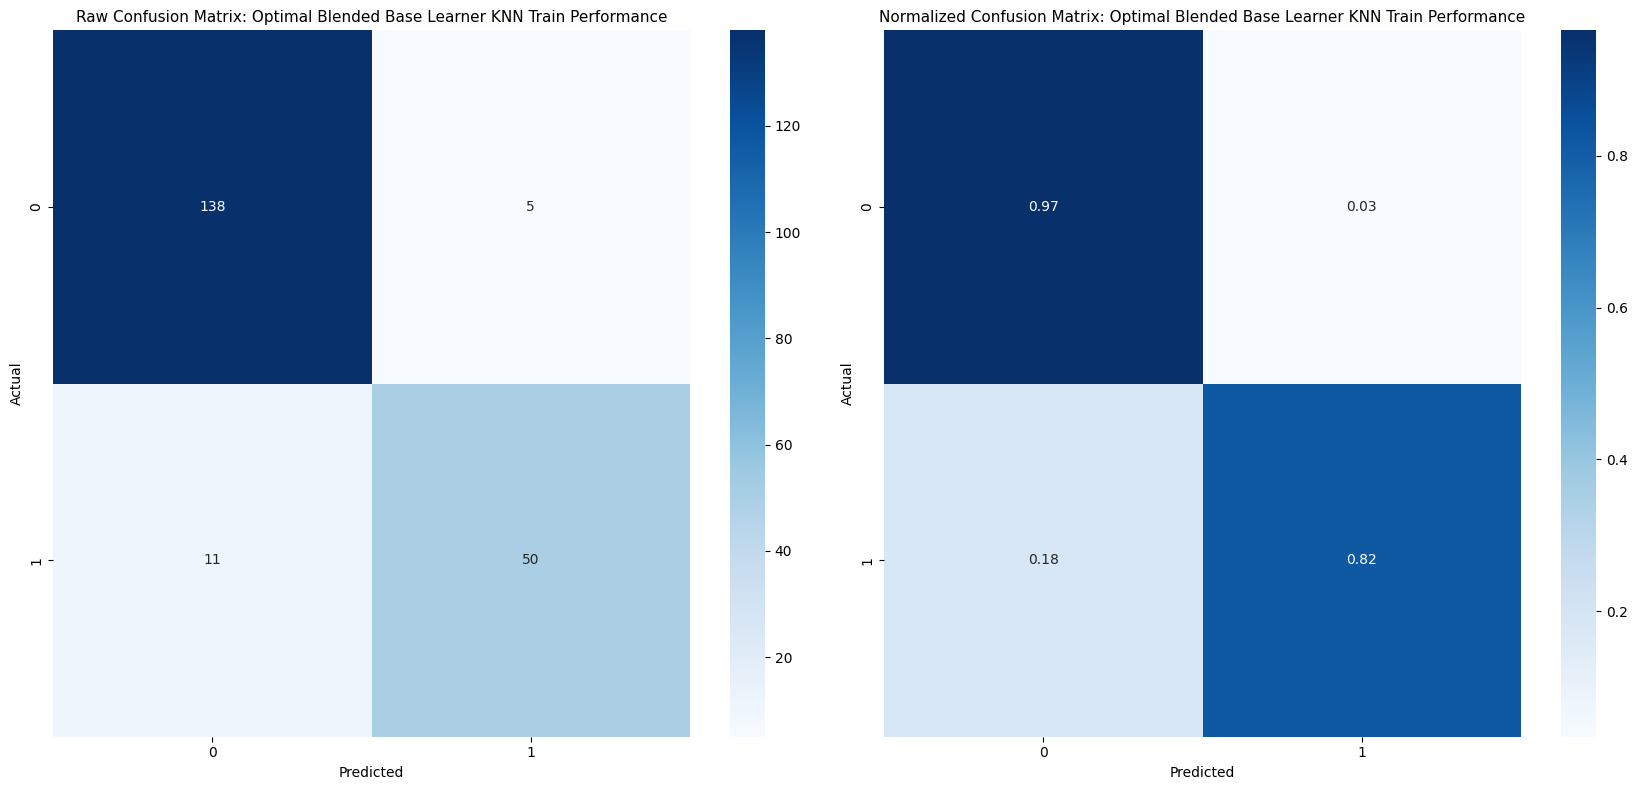

In [403]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner KNN Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner KNN Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [404]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {blended_baselearner_knn_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.6486

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87        49
         1.0       0.71      0.60      0.65        20

    accuracy                           0.81        69
   macro avg       0.78      0.75      0.76        69
weighted avg       0.81      0.81      0.81        69



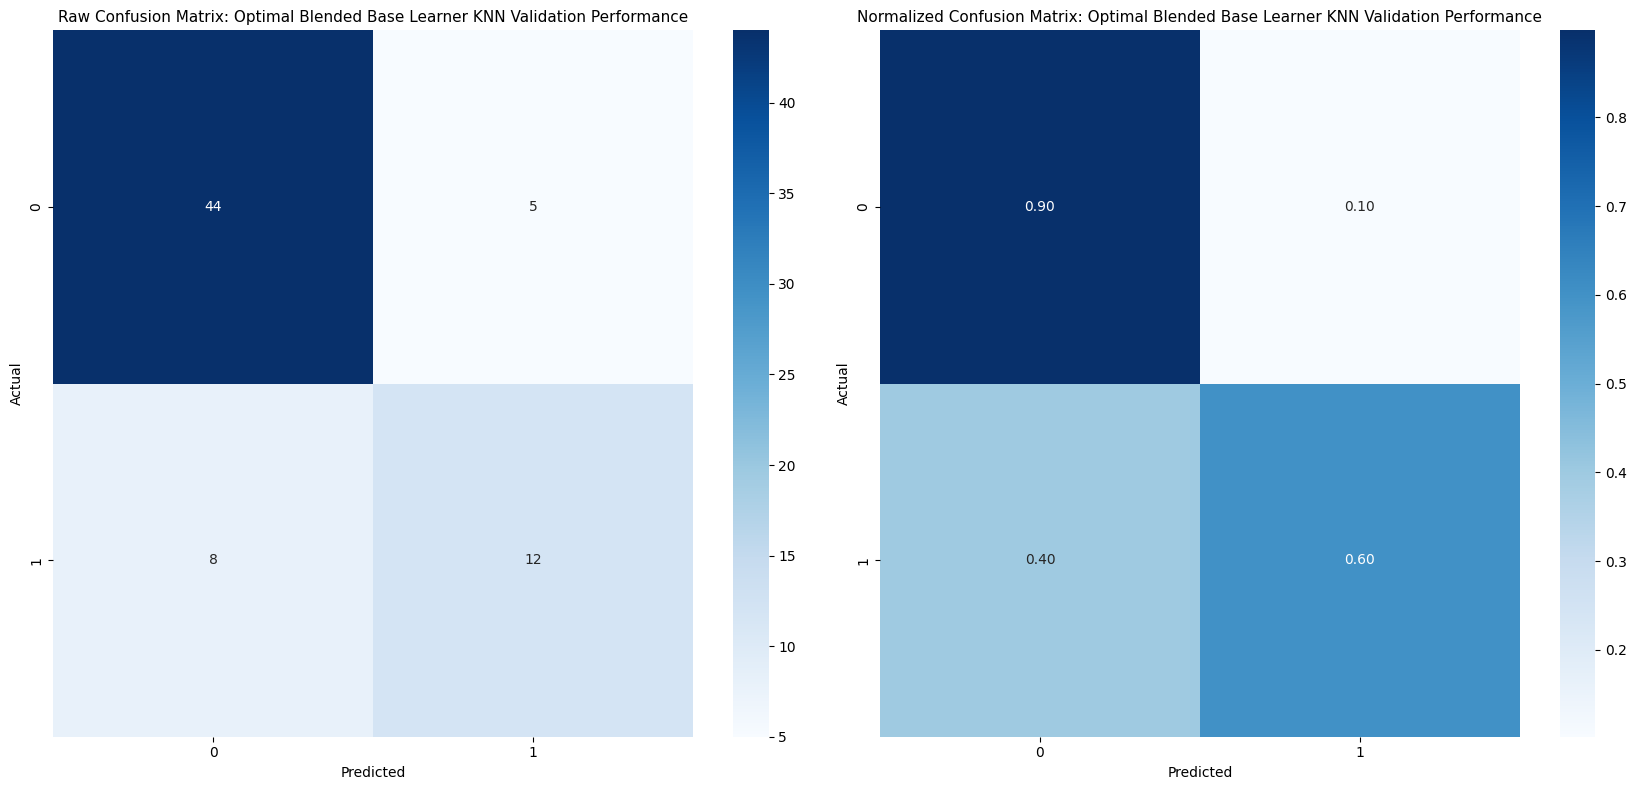

In [405]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner KNN Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner KNN Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [406]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
blended_baselearner_knn_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_train))
blended_baselearner_knn_optimal_train['model'] = ['blended_baselearner_knn_optimal'] * 5
blended_baselearner_knn_optimal_train['set'] = ['train'] * 5
print('Optimal Blended Base Learner KNN Train Performance Metrics: ')
display(blended_baselearner_knn_optimal_train)


Optimal Blended Base Learner KNN Train Performance Metrics: 


metric_name  metric_value                            model    set
0    Accuracy      0.921569  blended_baselearner_knn_optimal  train
1   Precision      0.909091  blended_baselearner_knn_optimal  train
2      Recall      0.819672  blended_baselearner_knn_optimal  train
3          F1      0.862069  blended_baselearner_knn_optimal  train
4       AUROC      0.892354  blended_baselearner_knn_optimal  train

In [407]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
blended_baselearner_knn_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, blended_baselearner_knn_optimal.predict(X_preprocessed_validation))
blended_baselearner_knn_optimal_validation['model'] = ['blended_baselearner_knn_optimal'] * 5
blended_baselearner_knn_optimal_validation['set'] = ['validation'] * 5
print('Optimal Blended Base Learner KNN Validation Performance Metrics: ')
display(blended_baselearner_knn_optimal_validation)


Optimal Blended Base Learner KNN Validation Performance Metrics: 


metric_name  metric_value                            model         set
0    Accuracy      0.811594  blended_baselearner_knn_optimal  validation
1   Precision      0.705882  blended_baselearner_knn_optimal  validation
2      Recall      0.600000  blended_baselearner_knn_optimal  validation
3          F1      0.648649  blended_baselearner_knn_optimal  validation
4       AUROC      0.748980  blended_baselearner_knn_optimal  validation

In [408]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(blended_baselearner_knn_optimal, 
            os.path.join("..", MODELS_PATH, "blended_model_baselearner_knn_optimal.pkl"))


['..\\models\\blended_model_baselearner_knn_optimal.pkl']

### 1.10.2 Base Learner - Support Vector Machine <a class="anchor" id="1.10.2"></a>

[Support Vector Machine (SVM)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) is a powerful classification algorithm that finds an optimal decision boundary — called a hyperplane — that maximizes the margin between two classes. The algorithm works by identifying the most influential data points, known as support vectors, that define this boundary. If the data is not linearly separable, SVM can use kernel functions to map it into a higher-dimensional space where separation is possible. The main advantages of SVM include strong theoretical guarantees, effectiveness in high-dimensional spaces, and robustness against overfitting when properly regularized. It performs well when the margin between classes is clear and works effectively with small to medium-sized datasets. However, SVM has notable limitations: it is computationally expensive, making it impractical for very large datasets; it requires careful tuning of hyperparameters such as the kernel type and regularization strength; and it is not easily interpretable, as decision boundaries in high-dimensional space can be difficult to visualize.


In [409]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [410]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
blended_baselearner_svm_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('blended_baselearner_svm_model', SVC(class_weight='balanced',
                                          random_state=987654321))
])


In [411]:
##################################
# Defining hyperparameter grid
##################################
blended_baselearner_svm_hyperparameter_grid = {
    'blended_baselearner_svm_model__C': [0.1, 1.0],
    'blended_baselearner_svm_model__kernel': ['linear', 'rbf'],
    'blended_baselearner_svm_model__gamma': ['scale','auto']
}


In [412]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [413]:
##################################
# Performing Grid Search with cross-validation
##################################
blended_baselearner_svm_grid_search = GridSearchCV(
    estimator=blended_baselearner_svm_pipeline,
    param_grid=blended_baselearner_svm_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [414]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [415]:
##################################
# Fitting GridSearchCV
##################################
blended_baselearner_svm_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('blended_baselearner_svm_model',
                                        SVC(class_weight='balanced',
                                            random_state=987654321))]),
             n_jobs=-1,
             param_grid={'blended_baselearner_svm_model__C': [0.1, 1.0],
                         'blended_baselearner_svm_model__gamma': ['scale',
                                                                  'auto'],
                         'blended_baselearner_svm_model__kernel': ['linear',
                                                                   'rbf']},
             scoring='f1', verbose=1)

In [416]:
##################################
# Identifying the best model
##################################
blended_baselearner_svm_optimal = blended_baselearner_svm_grid_search.best_estimator_


In [417]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
blended_baselearner_svm_optimal_f1_cv = blended_baselearner_svm_grid_search.best_score_
blended_baselearner_svm_optimal_f1_train = f1_score(y_preprocessed_train_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_train))
blended_baselearner_svm_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_validation))


In [418]:
##################################
# Identifying the optimal model
##################################
print('Best Blended Base Learner SVM: ')
print(f"Best Blended Base Learner SVM Hyperparameters: {blended_baselearner_svm_grid_search.best_params_}")


Best Blended Base Learner SVM: 
Best Blended Base Learner SVM Hyperparameters: {'blended_baselearner_svm_model__C': 1.0, 'blended_baselearner_svm_model__gamma': 'scale', 'blended_baselearner_svm_model__kernel': 'linear'}


In [419]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {blended_baselearner_svm_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {blended_baselearner_svm_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8219
F1 Score on Training Data: 0.8438

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       143
         1.0       0.81      0.89      0.84        61

    accuracy                           0.90       204
   macro avg       0.88      0.90      0.89       204
weighted avg       0.91      0.90      0.90       204



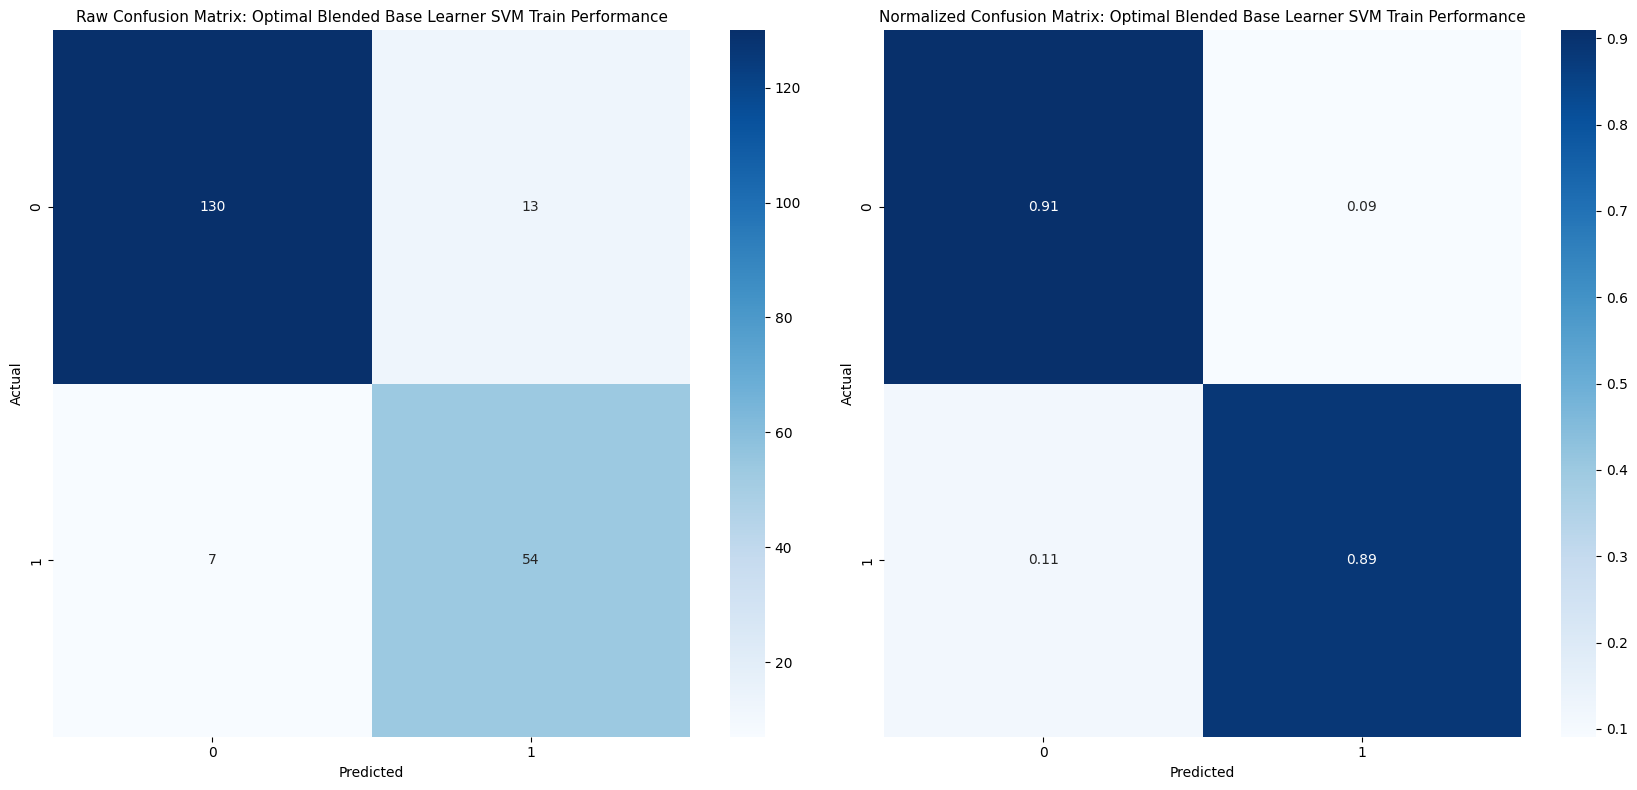

In [420]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner SVM Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner SVM Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [421]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {blended_baselearner_svm_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8571

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        49
         1.0       0.82      0.90      0.86        20

    accuracy                           0.91        69
   macro avg       0.89      0.91      0.90        69
weighted avg       0.92      0.91      0.91        69



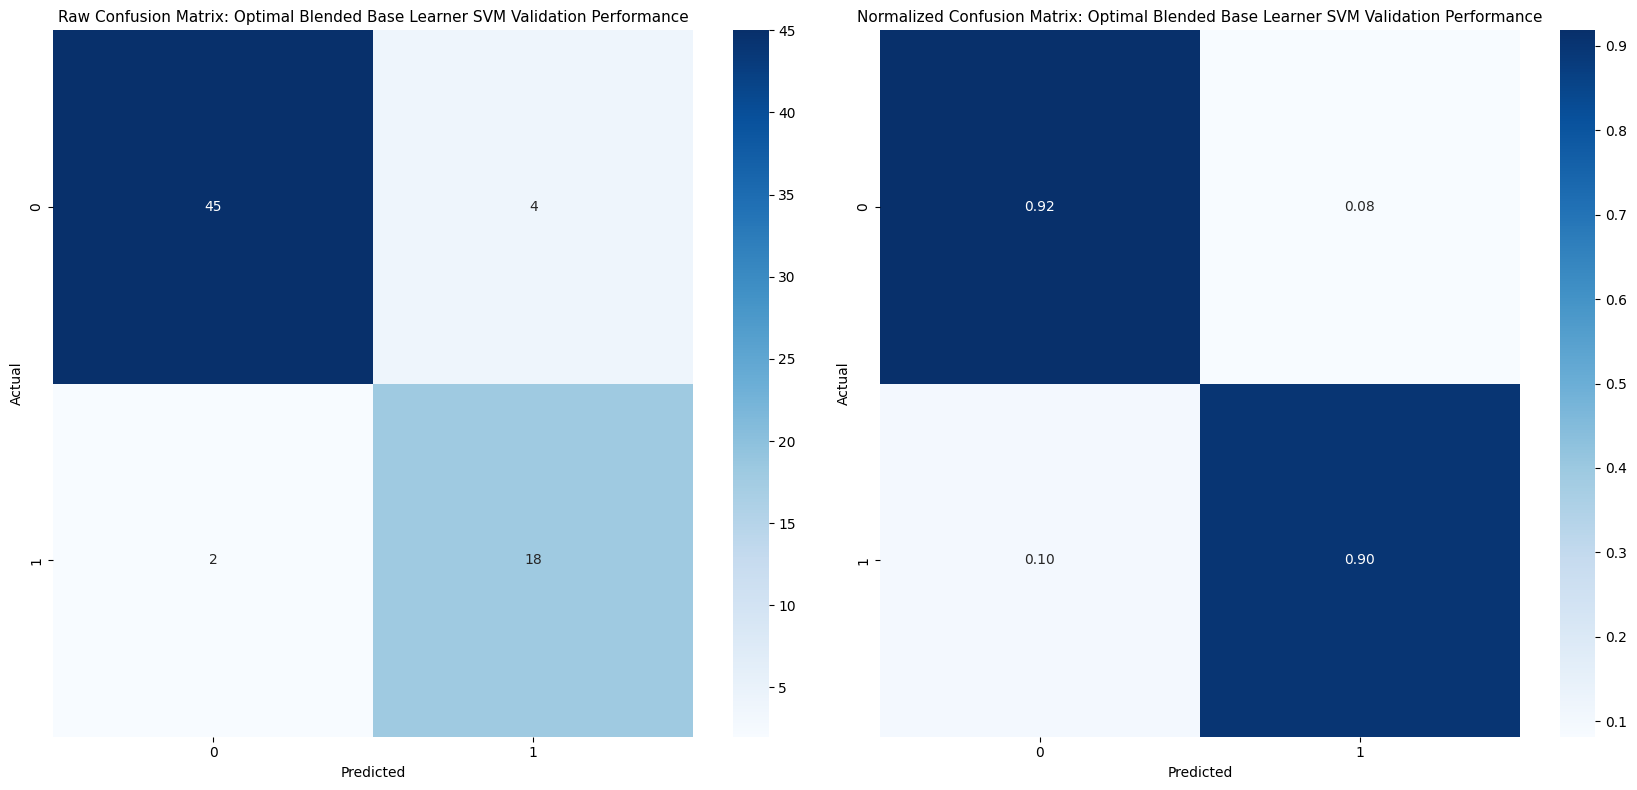

In [422]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner SVM Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner SVM Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [423]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
blended_baselearner_svm_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_train))
blended_baselearner_svm_optimal_train['model'] = ['blended_baselearner_svm_optimal'] * 5
blended_baselearner_svm_optimal_train['set'] = ['train'] * 5
print('Optimal Blended Base Learner SVM Train Performance Metrics: ')
display(blended_baselearner_svm_optimal_train)


Optimal Blended Base Learner SVM Train Performance Metrics: 


metric_name  metric_value                            model    set
0    Accuracy      0.901961  blended_baselearner_svm_optimal  train
1   Precision      0.805970  blended_baselearner_svm_optimal  train
2      Recall      0.885246  blended_baselearner_svm_optimal  train
3          F1      0.843750  blended_baselearner_svm_optimal  train
4       AUROC      0.897168  blended_baselearner_svm_optimal  train

In [424]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
blended_baselearner_svm_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, blended_baselearner_svm_optimal.predict(X_preprocessed_validation))
blended_baselearner_svm_optimal_validation['model'] = ['blended_baselearner_svm_optimal'] * 5
blended_baselearner_svm_optimal_validation['set'] = ['validation'] * 5
print('Optimal Blended Base Learner SVM Validation Performance Metrics: ')
display(blended_baselearner_svm_optimal_validation)


Optimal Blended Base Learner SVM Validation Performance Metrics: 


metric_name  metric_value                            model         set
0    Accuracy      0.913043  blended_baselearner_svm_optimal  validation
1   Precision      0.818182  blended_baselearner_svm_optimal  validation
2      Recall      0.900000  blended_baselearner_svm_optimal  validation
3          F1      0.857143  blended_baselearner_svm_optimal  validation
4       AUROC      0.909184  blended_baselearner_svm_optimal  validation

In [425]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(blended_baselearner_svm_optimal, 
            os.path.join("..", MODELS_PATH, "blended_model_baselearner_svm_optimal.pkl"))


['..\\models\\blended_model_baselearner_svm_optimal.pkl']

### 1.10.3 Base Learner - Ridge Classifier <a class="anchor" id="1.10.3"></a>

[Ridge Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) is a variation of logistic regression that incorporates L2 regularization to prevent overfitting by penalizing large coefficients in the decision boundary equation. It assumes a linear relationship between the predictor variables and the target class, estimating class probabilities using the logistic function. The key steps include fitting a linear model while adding a penalty term to shrink coefficient values, which reduces variance and improves generalization. Ridge Classifier is particularly useful when dealing with collinear features, as it distributes the importance among correlated variables instead of assigning extreme weights to a few. The advantages of Ridge Classifier include its efficiency, interpretability, and ability to handle high-dimensional data with multicollinearity. However, it has limitations: it assumes a linear decision boundary, making it unsuitable for complex, non-linear relationships, and the regularization parameter requires tuning to balance bias and variance effectively. Additionally, it does not perform feature selection, meaning all input features contribute to the decision-making process, which may reduce interpretability in some cases.


In [426]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [427]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
blended_baselearner_rc_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('blended_baselearner_rc_model', RidgeClassifier(class_weight='balanced',
                                                     random_state=987654321))
])


In [428]:
##################################
# Defining hyperparameter grid
##################################
blended_baselearner_rc_hyperparameter_grid = {
    'blended_baselearner_rc_model__alpha': [1.00, 2.00],
    'blended_baselearner_rc_model__solver': ['sag', 'saga'],
    'blended_baselearner_rc_model__tol': [1e-3, 1e-4]
}


In [429]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [430]:
##################################
# Performing Grid Search with cross-validation
##################################
blended_baselearner_rc_grid_search = GridSearchCV(
    estimator=blended_baselearner_rc_pipeline,
    param_grid=blended_baselearner_rc_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [431]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [432]:
##################################
# Fitting GridSearchCV
##################################
blended_baselearner_rc_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('blended_baselearner_rc_model',
                                        RidgeClassifier(class_weight='balanced',
                                                        random_state=987654321))]),
             n_jobs=-1,
             param_grid={'blended_baselearner_rc_model__alpha': [1.0, 2.0],
                         'blended_baselearner_rc_model__solver': ['sag',
                                                                  'saga'],
                         'blended_baselearner_rc_model__tol': [0.001, 0.0001]},
             scoring='f1', verbose=1)

In [433]:
##################################
# Identifying the best model
##################################
blended_baselearner_rc_optimal = blended_baselearner_rc_grid_search.best_estimator_


In [434]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
blended_baselearner_rc_optimal_f1_cv = blended_baselearner_rc_grid_search.best_score_
blended_baselearner_rc_optimal_f1_train = f1_score(y_preprocessed_train_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_train))
blended_baselearner_rc_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_validation))


In [435]:
##################################
# Identifying the optimal model
##################################
print('Best Blended Base Learner Ridge Classifier: ')
print(f"Best Blended Base Learner Ridge Classifier Hyperparameters: {blended_baselearner_rc_grid_search.best_params_}")


Best Blended Base Learner Ridge Classifier: 
Best Blended Base Learner Ridge Classifier Hyperparameters: {'blended_baselearner_rc_model__alpha': 2.0, 'blended_baselearner_rc_model__solver': 'saga', 'blended_baselearner_rc_model__tol': 0.0001}


In [436]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {blended_baselearner_rc_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {blended_baselearner_rc_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8097
F1 Score on Training Data: 0.8271

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.92       143
         1.0       0.76      0.90      0.83        61

    accuracy                           0.89       204
   macro avg       0.86      0.89      0.87       204
weighted avg       0.90      0.89      0.89       204



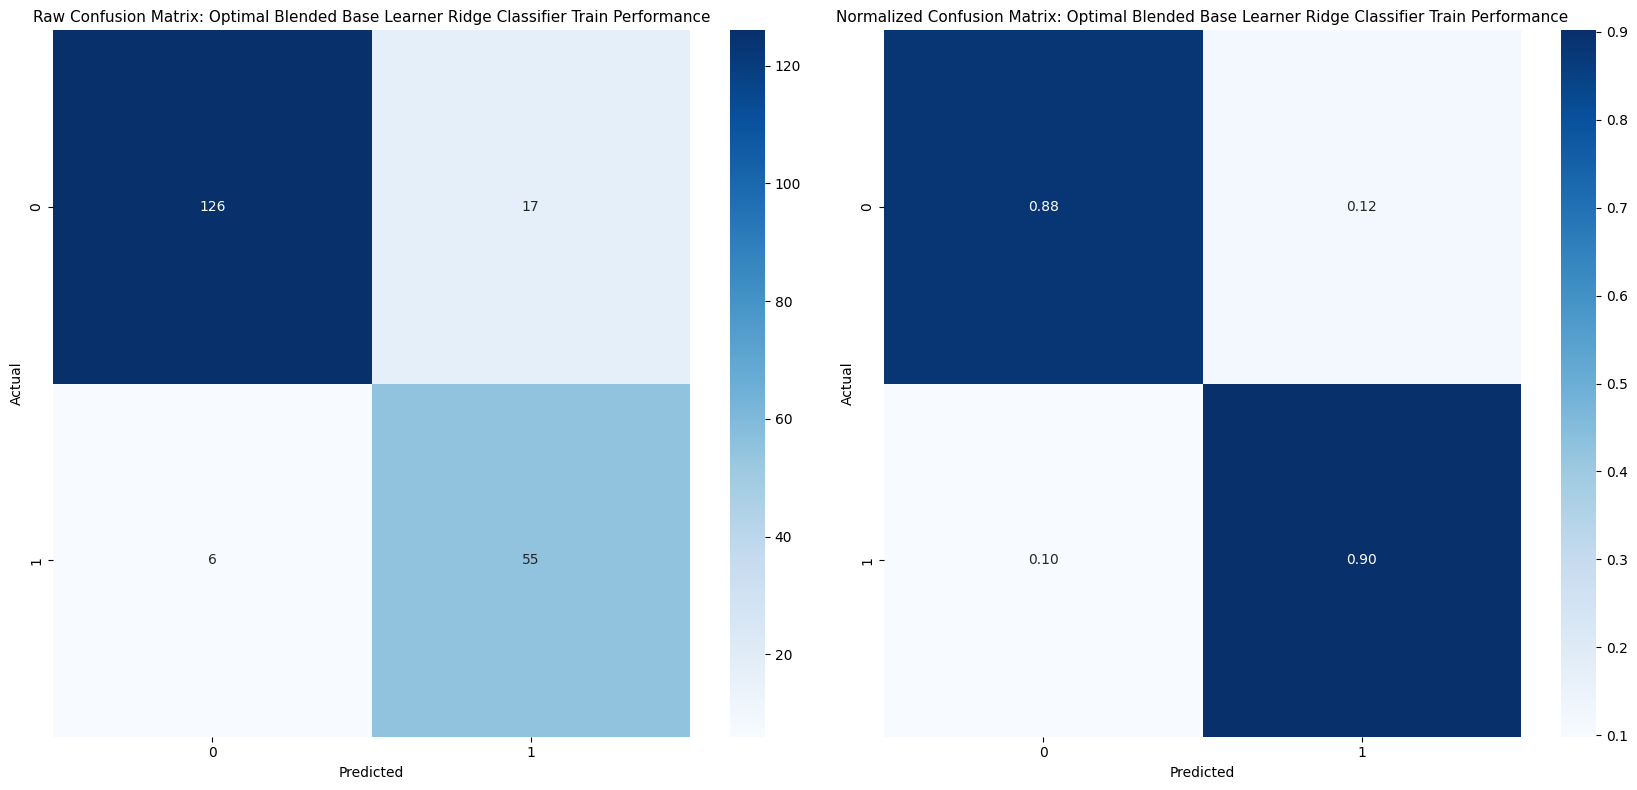

In [437]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner Ridge Classifier Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner Ridge Classifier Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [438]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {blended_baselearner_rc_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8372

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93        49
         1.0       0.78      0.90      0.84        20

    accuracy                           0.90        69
   macro avg       0.87      0.90      0.88        69
weighted avg       0.91      0.90      0.90        69



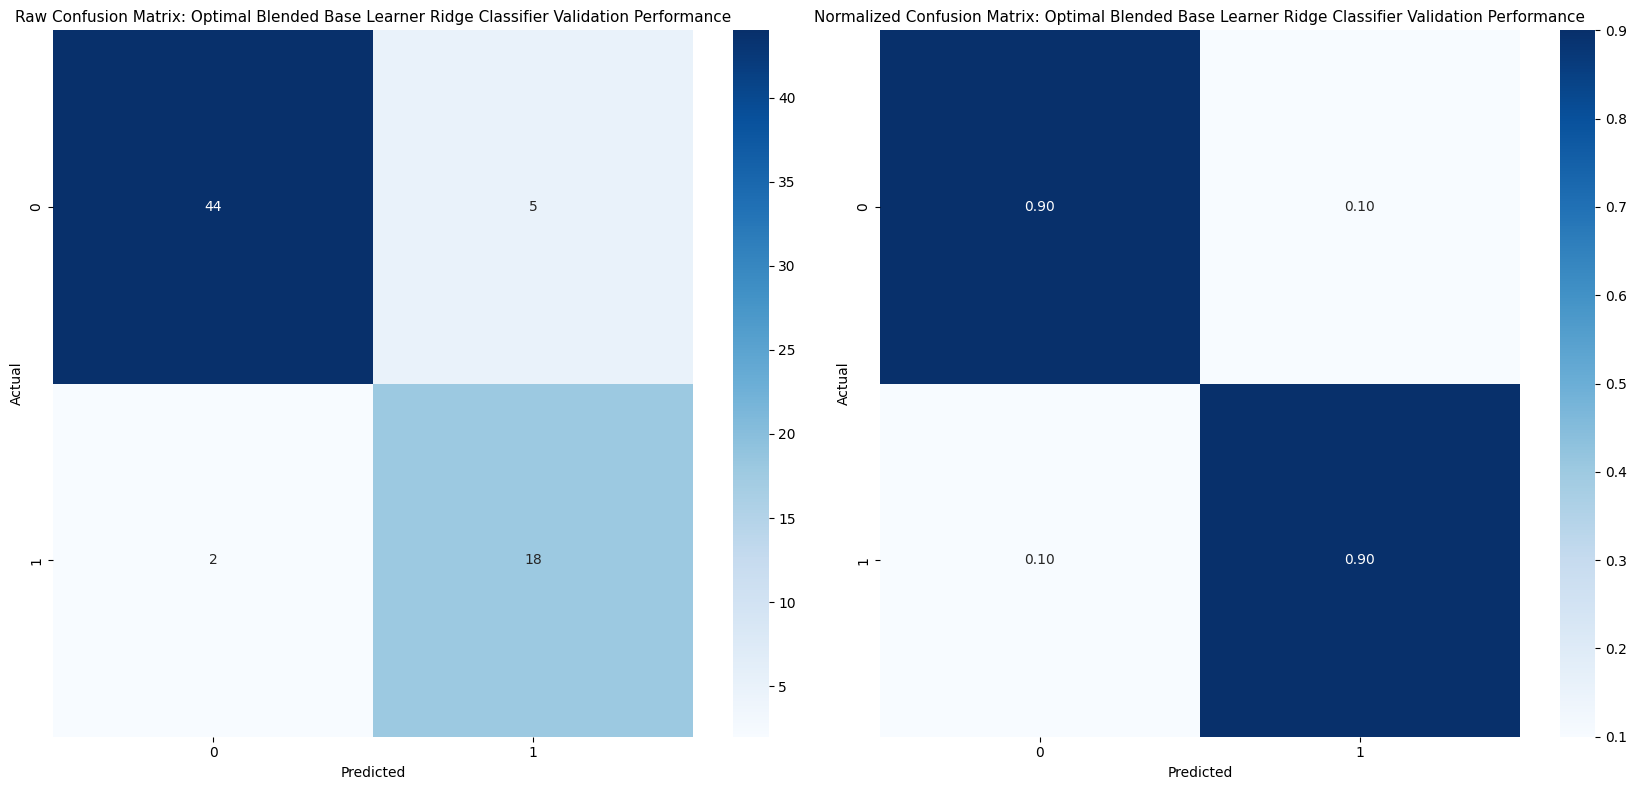

In [439]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner Ridge Classifier Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner Ridge Classifier Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [440]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
blended_baselearner_rc_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_train))
blended_baselearner_rc_optimal_train['model'] = ['blended_baselearner_rc_optimal'] * 5
blended_baselearner_rc_optimal_train['set'] = ['train'] * 5
print('Optimal Blended Base Learner Ridge Classifier Train Performance Metrics: ')
display(blended_baselearner_rc_optimal_train)


Optimal Blended Base Learner Ridge Classifier Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.887255  blended_baselearner_rc_optimal  train
1   Precision      0.763889  blended_baselearner_rc_optimal  train
2      Recall      0.901639  blended_baselearner_rc_optimal  train
3          F1      0.827068  blended_baselearner_rc_optimal  train
4       AUROC      0.891379  blended_baselearner_rc_optimal  train

In [441]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
blended_baselearner_rc_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, blended_baselearner_rc_optimal.predict(X_preprocessed_validation))
blended_baselearner_rc_optimal_validation['model'] = ['blended_baselearner_rc_optimal'] * 5
blended_baselearner_rc_optimal_validation['set'] = ['validation'] * 5
print('Optimal Blended Base Learner Ridge Classifier Validation Performance Metrics: ')
display(blended_baselearner_rc_optimal_validation)


Optimal Blended Base Learner Ridge Classifier Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.898551  blended_baselearner_rc_optimal  validation
1   Precision      0.782609  blended_baselearner_rc_optimal  validation
2      Recall      0.900000  blended_baselearner_rc_optimal  validation
3          F1      0.837209  blended_baselearner_rc_optimal  validation
4       AUROC      0.898980  blended_baselearner_rc_optimal  validation

In [442]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(blended_baselearner_rc_optimal, 
            os.path.join("..", MODELS_PATH, "blended_model_baselearner_ridge_classifier_optimal.pkl"))


['..\\models\\blended_model_baselearner_ridge_classifier_optimal.pkl']

### 1.10.4 Base Learner - Neural Network <a class="anchor" id="1.10.4"></a>

[Neural Network](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) is a classification algorithm inspired by the human brain, consisting of layers of interconnected neurons that transform input features through weighted connections and activation functions. It learns patterns in data through backpropagation, where the network adjusts its internal weights to minimize classification error. The process involves an input layer receiving data, multiple hidden layers extracting hierarchical features, and an output layer producing a final prediction. The key advantages of neural networks include their ability to model highly complex, non-linear relationships, making them suitable for image, text, and speech classification tasks. They are also highly scalable, capable of handling massive datasets. However, neural networks have several challenges: they require substantial computational resources, especially for deep architectures; they need large amounts of labeled data for effective training; and they are often difficult to interpret due to their "black box" nature. Additionally, hyperparameter tuning, including choosing the number of layers, neurons, and activation functions, is non-trivial and requires careful optimization to prevent overfitting or underfitting.


In [443]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [444]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
blended_baselearner_nn_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('blended_baselearner_nn_model', MLPClassifier(max_iter=500,
                                                   solver='lbfgs',
                                                   early_stopping=False,
                                                   random_state=987654321))
])


In [445]:
##################################
# Defining hyperparameter grid
##################################
blended_baselearner_nn_hyperparameter_grid = {
    'blended_baselearner_nn_model__hidden_layer_sizes': [(50,), (100,)],
    'blended_baselearner_nn_model__activation': ['relu', 'tanh'],
    'blended_baselearner_nn_model__alpha': [0.0001, 0.001]
}


In [446]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [447]:
##################################
# Performing Grid Search with cross-validation
##################################
blended_baselearner_nn_grid_search = GridSearchCV(
    estimator=blended_baselearner_nn_pipeline,
    param_grid=blended_baselearner_nn_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [448]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [449]:
##################################
# Fitting GridSearchCV
##################################
blended_baselearner_nn_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('blended_baselearner_nn_model',
                                        MLPClassifier(max_iter=500,
                                                      random_state=987654321,
                                                      solver='lbfgs'))]),
             n_jobs=-1,
             param_grid={'blended_baselearner_nn_model__activation': ['relu',
                                                                      'tanh'],
                         'blended_baselearner_nn_model__alpha': [0.0001, 0.001],
                         'blended_baselearner_nn_model__hidden_layer_sizes': [(50,),
                                                                              (100,)]},
             scoring='f1', verbose=1)

In [450]:
##################################
# Identifying the best model
##################################
blended_baselearner_nn_optimal = blended_baselearner_nn_grid_search.best_estimator_


In [451]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
blended_baselearner_nn_optimal_f1_cv = blended_baselearner_nn_grid_search.best_score_
blended_baselearner_nn_optimal_f1_train = f1_score(y_preprocessed_train_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_train))
blended_baselearner_nn_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_validation))


In [452]:
##################################
# Identifying the optimal model
##################################
print('Best Blended Base Learner Neural Network: ')
print(f"Best Blended Base Learner Neural Network Hyperparameters: {blended_baselearner_nn_grid_search.best_params_}")


Best Blended Base Learner Neural Network: 
Best Blended Base Learner Neural Network Hyperparameters: {'blended_baselearner_nn_model__activation': 'relu', 'blended_baselearner_nn_model__alpha': 0.0001, 'blended_baselearner_nn_model__hidden_layer_sizes': (50,)}


In [453]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {blended_baselearner_nn_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {blended_baselearner_nn_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8063
F1 Score on Training Data: 0.8226

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.92       143
         1.0       0.81      0.84      0.82        61

    accuracy                           0.89       204
   macro avg       0.87      0.88      0.87       204
weighted avg       0.89      0.89      0.89       204



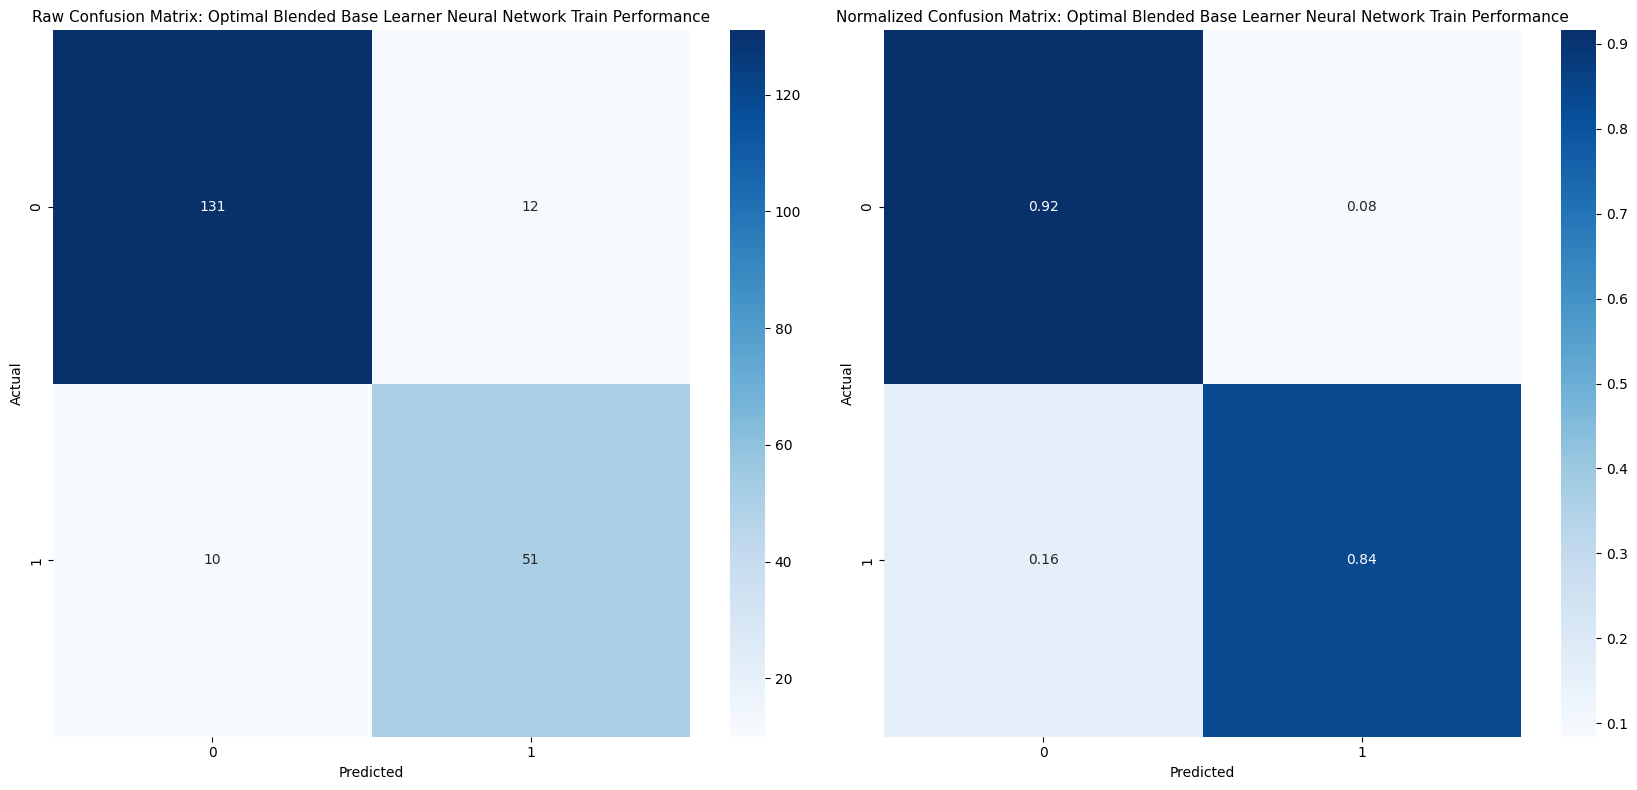

In [454]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner Neural Network Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner Neural Network Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [455]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {blended_baselearner_nn_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8095

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92        49
         1.0       0.77      0.85      0.81        20

    accuracy                           0.88        69
   macro avg       0.85      0.87      0.86        69
weighted avg       0.89      0.88      0.89        69



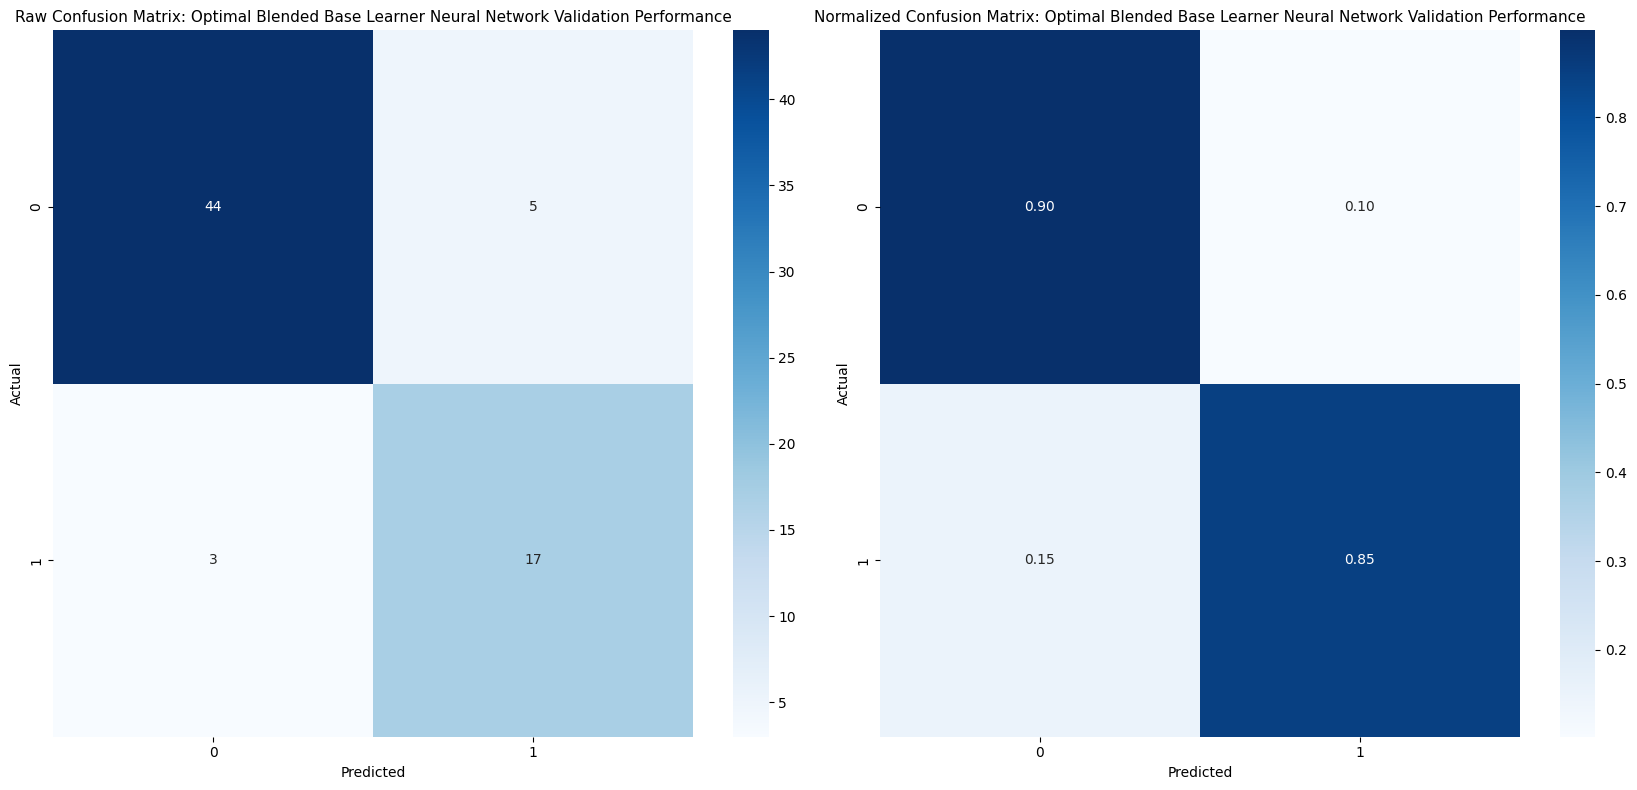

In [456]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner Neural Network Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner Neural Network Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [457]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
blended_baselearner_nn_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_train))
blended_baselearner_nn_optimal_train['model'] = ['blended_baselearner_nn_optimal'] * 5
blended_baselearner_nn_optimal_train['set'] = ['train'] * 5
print('Optimal Blended Base Learner Neural Network Train Performance Metrics: ')
display(blended_baselearner_nn_optimal_train)


Optimal Blended Base Learner Neural Network Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.892157  blended_baselearner_nn_optimal  train
1   Precision      0.809524  blended_baselearner_nn_optimal  train
2      Recall      0.836066  blended_baselearner_nn_optimal  train
3          F1      0.822581  blended_baselearner_nn_optimal  train
4       AUROC      0.876075  blended_baselearner_nn_optimal  train

In [458]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
blended_baselearner_nn_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, blended_baselearner_nn_optimal.predict(X_preprocessed_validation))
blended_baselearner_nn_optimal_validation['model'] = ['blended_baselearner_nn_optimal'] * 5
blended_baselearner_nn_optimal_validation['set'] = ['validation'] * 5
print('Optimal Blended Base Learner Neural Network Validation Performance Metrics: ')
display(blended_baselearner_nn_optimal_validation)


Optimal Blended Base Learner Neural Network Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.884058  blended_baselearner_nn_optimal  validation
1   Precision      0.772727  blended_baselearner_nn_optimal  validation
2      Recall      0.850000  blended_baselearner_nn_optimal  validation
3          F1      0.809524  blended_baselearner_nn_optimal  validation
4       AUROC      0.873980  blended_baselearner_nn_optimal  validation

In [459]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(blended_baselearner_nn_optimal, 
            os.path.join("..", MODELS_PATH, "blended_model_baselearner_neural_network_optimal.pkl"))


['..\\models\\blended_model_baselearner_neural_network_optimal.pkl']

### 1.10.5 Base Learner - Decision Tree <a class="anchor" id="1.10.5"></a>

[Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) is a hierarchical classification model that recursively splits data based on feature values, forming a tree-like structure where each node represents a decision rule and each leaf represents a class label. The tree is built using a greedy algorithm that selects the best feature at each step based on criteria such as information gain or Gini impurity. The main advantages of decision trees include their interpretability, as the decision-making process can be easily visualized and understood, and their ability to model non-linear relationships without requiring extensive feature engineering. They also handle both numerical and categorical data well. However, decision trees are prone to overfitting, especially when deep trees are grown without pruning. Small changes in the dataset can lead to entirely different structures, making them unstable. Additionally, they tend to perform poorly on highly complex problems where relationships between variables are intricate, making ensemble methods such as Random Forest or Gradient Boosting more effective in practice.


In [460]:
##################################
# Defining the categorical preprocessing parameters
##################################
categorical_features = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response']
categorical_transformer = OrdinalEncoder()
categorical_preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features)],
                                             remainder='passthrough',
                                             force_int_remainder_cols=False)


In [461]:
##################################
# Defining the preprocessing and modeling pipeline parameters
##################################
blended_baselearner_dt_pipeline = Pipeline([
    ('categorical_preprocessor', categorical_preprocessor),
    ('blended_baselearner_dt_model', DecisionTreeClassifier(class_weight='balanced',
                                                            random_state=987654321))
])


In [462]:
##################################
# Defining hyperparameter grid
##################################
blended_baselearner_dt_hyperparameter_grid = {
    'blended_baselearner_dt_model__criterion': ['gini', 'entropy'],
    'blended_baselearner_dt_model__max_depth': [3, 6],
    'blended_baselearner_dt_model__min_samples_leaf': [5, 10]
}


In [463]:
##################################
# Defining the cross-validation strategy (5-cycle 5-fold CV)
##################################
cv_strategy = RepeatedStratifiedKFold(n_splits=5, 
                                      n_repeats=5, 
                                      random_state=987654321)


In [464]:
##################################
# Performing Grid Search with cross-validation
##################################
blended_baselearner_dt_grid_search = GridSearchCV(
    estimator=blended_baselearner_dt_pipeline,
    param_grid=blended_baselearner_dt_hyperparameter_grid,
    scoring='f1',
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)


In [465]:
##################################
# Encoding the response variables
# for model evaluation
##################################
y_encoder = OrdinalEncoder()
y_encoder.fit(y_preprocessed_train.values.reshape(-1, 1))
y_preprocessed_train_encoded = y_encoder.transform(y_preprocessed_train.values.reshape(-1, 1)).ravel()
y_preprocessed_validation_encoded = y_encoder.transform(y_preprocessed_validation.values.reshape(-1, 1)).ravel()


In [466]:
##################################
# Fitting GridSearchCV
##################################
blended_baselearner_dt_grid_search.fit(X_preprocessed_train, y_preprocessed_train_encoded)


Fitting 25 folds for each of 8 candidates, totalling 200 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=987654321),
             estimator=Pipeline(steps=[('categorical_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OrdinalEncoder(),
                                                                         ['Gender',
                                                                          'Smoking',
                                                                          'Physical_Examination',
                                                                          'Adenopathy',
                                                                          'Focality',
                                                                          'Risk',
                                                                          'T',
                                                                          'Stage',
                                                                          'Response'])])),
                                       ('blended_baselearner_dt_model',
                                        DecisionTreeClassifier(class_weight='balanced',
                                                               random_state=987654321))]),
             n_jobs=-1,
             param_grid={'blended_baselearner_dt_model__criterion': ['gini',
                                                                     'entropy'],
                         'blended_baselearner_dt_model__max_depth': [3, 6],
                         'blended_baselearner_dt_model__min_samples_leaf': [5,
                                                                            10]},
             scoring='f1', verbose=1)

In [467]:
##################################
# Identifying the best model
##################################
blended_baselearner_dt_optimal = blended_baselearner_dt_grid_search.best_estimator_


In [468]:
##################################
# Evaluating the F1 scores
# on the training, cross-validation, and validation data
##################################
blended_baselearner_dt_optimal_f1_cv = blended_baselearner_dt_grid_search.best_score_
blended_baselearner_dt_optimal_f1_train = f1_score(y_preprocessed_train_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_train))
blended_baselearner_dt_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_validation))


In [469]:
##################################
# Identifying the optimal model
##################################
print('Best Blended Base Learner Decision Trees: ')
print(f"Best Blended Base Learner Decision Trees Hyperparameters: {blended_baselearner_dt_grid_search.best_params_}")


Best Blended Base Learner Decision Trees: 
Best Blended Base Learner Decision Trees Hyperparameters: {'blended_baselearner_dt_model__criterion': 'gini', 'blended_baselearner_dt_model__max_depth': 6, 'blended_baselearner_dt_model__min_samples_leaf': 5}


In [470]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training and cross-validated data
# to assess overfitting optimism
##################################
print(f"F1 Score on Cross-Validated Data: {blended_baselearner_dt_optimal_f1_cv:.4f}")
print(f"F1 Score on Training Data: {blended_baselearner_dt_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_train)))


F1 Score on Cross-Validated Data: 0.8099
F1 Score on Training Data: 0.8511

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.99      0.86      0.92       143
         1.0       0.75      0.98      0.85        61

    accuracy                           0.90       204
   macro avg       0.87      0.92      0.89       204
weighted avg       0.92      0.90      0.90       204



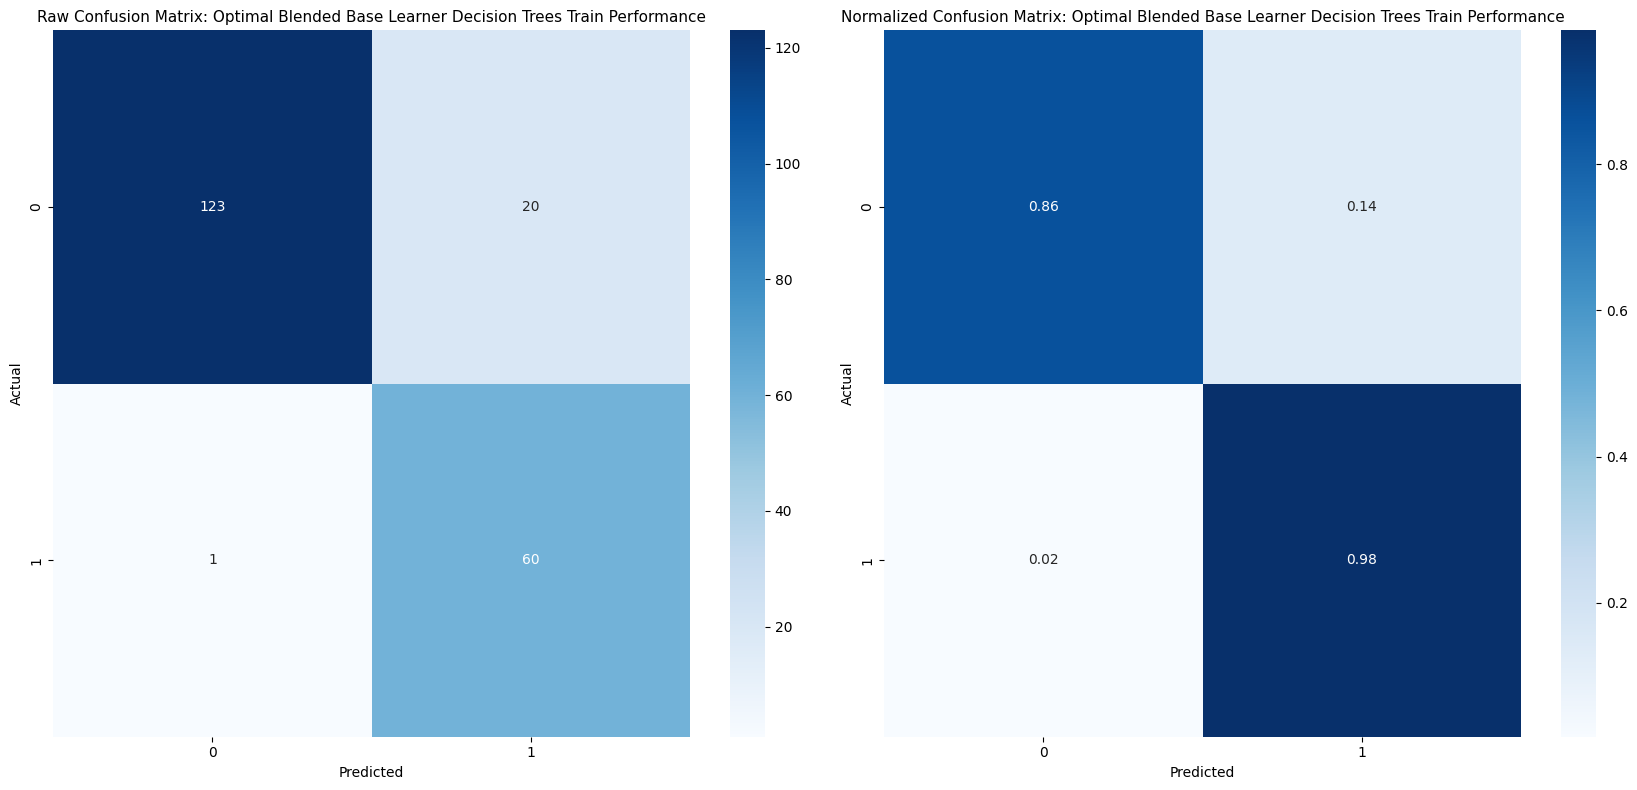

In [471]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_train))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_train), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner Decision Trees Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner Decision Trees Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [472]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validation Data: {blended_baselearner_dt_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_validation)))


F1 Score on Validation Data: 0.8000

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        49
         1.0       0.67      1.00      0.80        20

    accuracy                           0.86        69
   macro avg       0.83      0.90      0.84        69
weighted avg       0.90      0.86      0.86        69



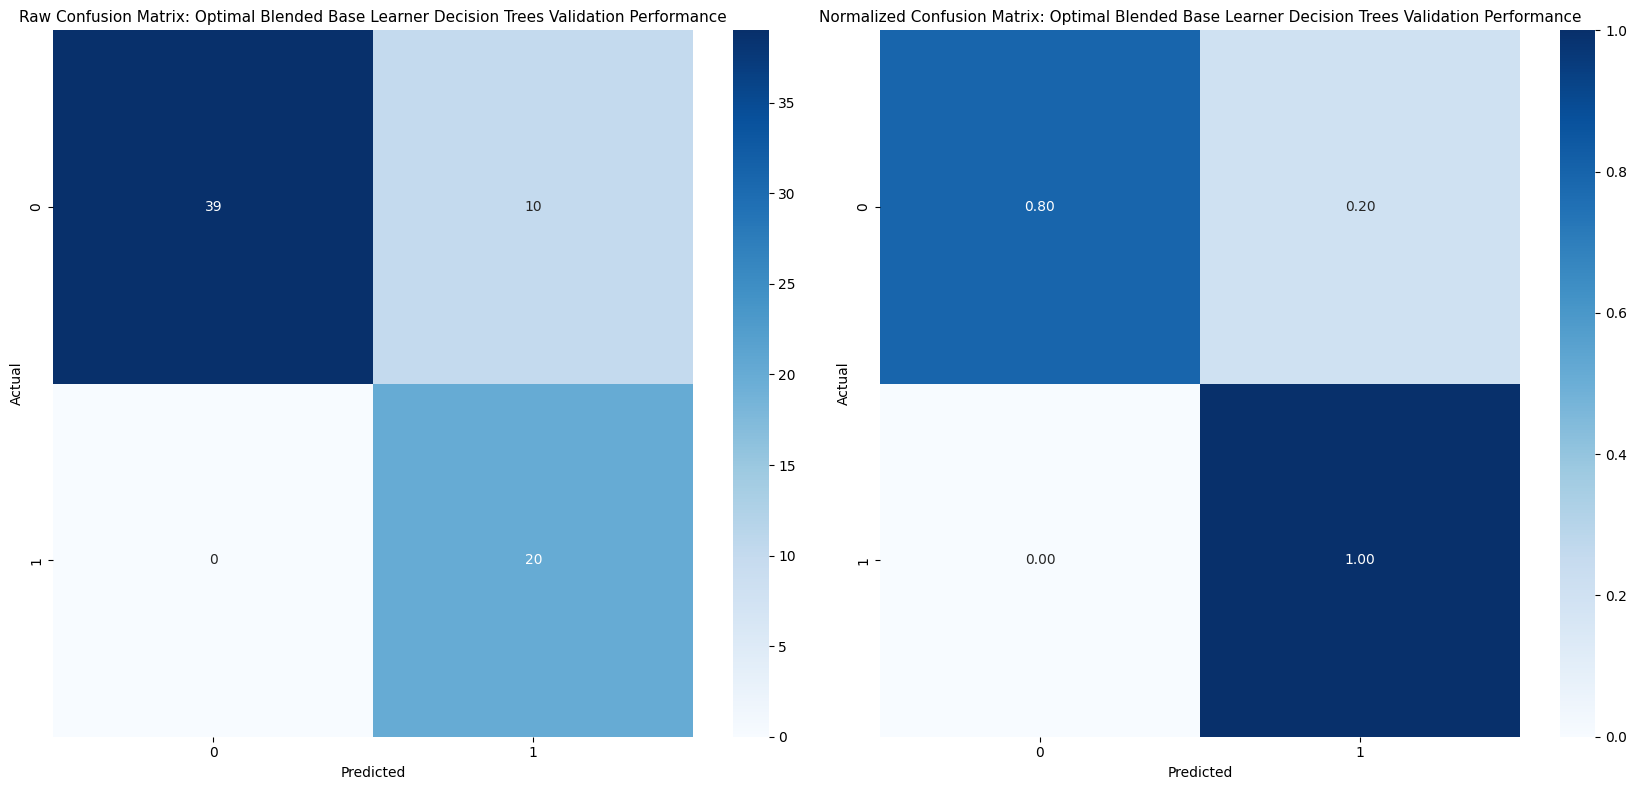

In [473]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_validation))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_validation), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Base Learner Decision Trees Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Base Learner Decision Trees Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [474]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
blended_baselearner_dt_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_train))
blended_baselearner_dt_optimal_train['model'] = ['blended_baselearner_dt_optimal'] * 5
blended_baselearner_dt_optimal_train['set'] = ['train'] * 5
print('Optimal Blended Base Learner Decision Tree Train Performance Metrics: ')
display(blended_baselearner_dt_optimal_train)


Optimal Blended Base Learner Decision Tree Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.897059  blended_baselearner_dt_optimal  train
1   Precision      0.750000  blended_baselearner_dt_optimal  train
2      Recall      0.983607  blended_baselearner_dt_optimal  train
3          F1      0.851064  blended_baselearner_dt_optimal  train
4       AUROC      0.921873  blended_baselearner_dt_optimal  train

In [475]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
blended_baselearner_dt_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, blended_baselearner_dt_optimal.predict(X_preprocessed_validation))
blended_baselearner_dt_optimal_validation['model'] = ['blended_baselearner_dt_optimal'] * 5
blended_baselearner_dt_optimal_validation['set'] = ['validation'] * 5
print('Optimal Blended Base Learner Decision Tree Validation Performance Metrics: ')
display(blended_baselearner_dt_optimal_validation)


Optimal Blended Base Learner Decision Tree Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.855072  blended_baselearner_dt_optimal  validation
1   Precision      0.666667  blended_baselearner_dt_optimal  validation
2      Recall      1.000000  blended_baselearner_dt_optimal  validation
3          F1      0.800000  blended_baselearner_dt_optimal  validation
4       AUROC      0.897959  blended_baselearner_dt_optimal  validation

In [476]:
##################################
# Saving the best individual model
# developed from the train data
################################## 
joblib.dump(blended_baselearner_dt_optimal, 
            os.path.join("..", MODELS_PATH, "blended_model_baselearner_decision_trees_optimal.pkl"))


['..\\models\\blended_model_baselearner_decision_trees_optimal.pkl']

### 1.10.6 Meta Learner - Logistic Regression <a class="anchor" id="1.10.6"></a>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) is a linear classification algorithm that estimates the probability of a binary outcome using the logistic (sigmoid) function. It assumes a linear relationship between the predictor variables and the log-odds of the target class. The algorithm involves calculating a weighted sum of input features, applying the sigmoid function to transform the result into a probability, and assigning a class label based on a threshold (typically 0.5). Logistic regression is simple, interpretable, and computationally efficient, making it a popular choice for baseline models and problems where relationships between features and the target variable are approximately linear. It also provides insight into feature importance through its learned coefficients. However, logistic regression has limitations: it struggles with non-linear relationships unless feature engineering or polynomial terms are used, it is sensitive to multicollinearity, and it assumes independence between predictor variables, which may not always hold in real-world data. Additionally, it may perform poorly when classes are highly imbalanced, requiring techniques such as weighting or resampling to improve predictions.


In [477]:
##################################
# Defining the blending strategy (75-25 development-holdout split)
##################################
X_preprocessed_train_development, X_preprocessed_holdout, y_preprocessed_train_development, y_preprocessed_holdout = train_test_split(
    X_preprocessed_train, y_preprocessed_train_encoded, 
    test_size=0.25, 
    random_state=987654321
)


In [478]:
##################################
# Loading the pre-trained base learners
# from the previously saved pickle files
##################################
blended_baselearners = {}
blended_baselearner_model = ['knn', 'svm', 'ridge_classifier', 'neural_network', 'decision_trees']
for name in blended_baselearner_model:
    blended_baselearner_model_path = os.path.join("..", MODELS_PATH, f"blended_model_baselearner_{name}_optimal.pkl")
    blended_baselearners[name] = joblib.load(blended_baselearner_model_path)
    

In [479]:
##################################
# Initializing the meta-feature matrices
##################################
meta_train_blended = np.zeros((X_preprocessed_holdout.shape[0], len(blended_baselearners)))
meta_validation_blended = np.zeros((X_preprocessed_validation.shape[0], len(blended_baselearners)))


In [480]:
##################################
# Generating hold-out predictions for training the meta learner
##################################
for i, (name, model) in enumerate(blended_baselearners.items()):
    model.fit(X_preprocessed_train_development, y_preprocessed_train_development)  
    meta_train_blended[:, i] = model.predict_proba(X_preprocessed_holdout)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_holdout)
    meta_validation_blended[:, i] = model.predict_proba(X_preprocessed_validation)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_validation)


In [481]:
##################################
# Training the meta learner on the stacked features
##################################
blended_metalearner_lr_optimal = LogisticRegression(class_weight='balanced', 
                                                    penalty='l2', 
                                                    C=1.0, 
                                                    solver='lbfgs', 
                                                    random_state=987654321)
blended_metalearner_lr_optimal.fit(meta_train_blended, y_preprocessed_holdout)


LogisticRegression(class_weight='balanced', random_state=987654321)

In [482]:
##################################
# Saving the meta learner model
# developed from the meta-train data
################################## 
joblib.dump(blended_metalearner_lr_optimal, 
            os.path.join("..", MODELS_PATH, "blended_model_metalearner_logistic_regression_optimal.pkl"))

['..\\models\\blended_model_metalearner_logistic_regression_optimal.pkl']

In [483]:
##################################
# Creating a function to extract the 
# meta-feature matrices for new data
################################## 
def extract_blended_metafeature_matrix(X_preprocessed_new):
    ##################################
    # Loading the pre-trained base learners
    # from the previously saved pickle files
    ##################################
    blended_baselearners = {}
    blended_baselearner_model = ['knn', 'svm', 'ridge_classifier', 'neural_network', 'decision_trees']
    for name in blended_baselearner_model:
        blended_baselearner_model_path = (os.path.join("..", MODELS_PATH, f"blended_model_baselearner_{name}_optimal.pkl"))
        blended_baselearners[name] = joblib.load(blended_baselearner_model_path)

    ##################################
    # Generating meta-features for new data
    ##################################
    meta_train_blended = np.zeros((X_preprocessed_holdout.shape[0], len(blended_baselearners)))
    meta_new_blended = np.zeros((X_preprocessed_new.shape[0], len(blended_baselearners)))

    ##################################
    # Generating holdout predictions
    # from the base learners
    ##################################
    for i, (name, model) in enumerate(blended_baselearners.items()):
        model.fit(X_preprocessed_train_development, y_preprocessed_train_development) 
        meta_train_blended[:, i] = model.predict_proba(X_preprocessed_holdout)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_holdout)
        meta_new_blended[:, i] = model.predict_proba(X_preprocessed_new)[:, 1] if hasattr(model, "predict_proba") else model.predict(X_preprocessed_new)

    return meta_new_blended


In [484]:
##################################
# Evaluating the F1 scores
# on the training and validation data
##################################
blended_metalearner_lr_optimal_f1_train = f1_score(y_preprocessed_train_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_train)))
blended_metalearner_lr_optimal_f1_validation = f1_score(y_preprocessed_validation_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_validation)))


In [485]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the training data
# to assess overfitting optimism
##################################
print(f"F1 Score on Training Data: {blended_metalearner_lr_optimal_f1_train:.4f}")
print("\nClassification Report on Train Data:\n", classification_report(y_preprocessed_train_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_train))))


F1 Score on Training Data: 0.8550

Classification Report on Train Data:
               precision    recall  f1-score   support

         0.0       0.96      0.90      0.93       143
         1.0       0.80      0.92      0.85        61

    accuracy                           0.91       204
   macro avg       0.88      0.91      0.89       204
weighted avg       0.91      0.91      0.91       204



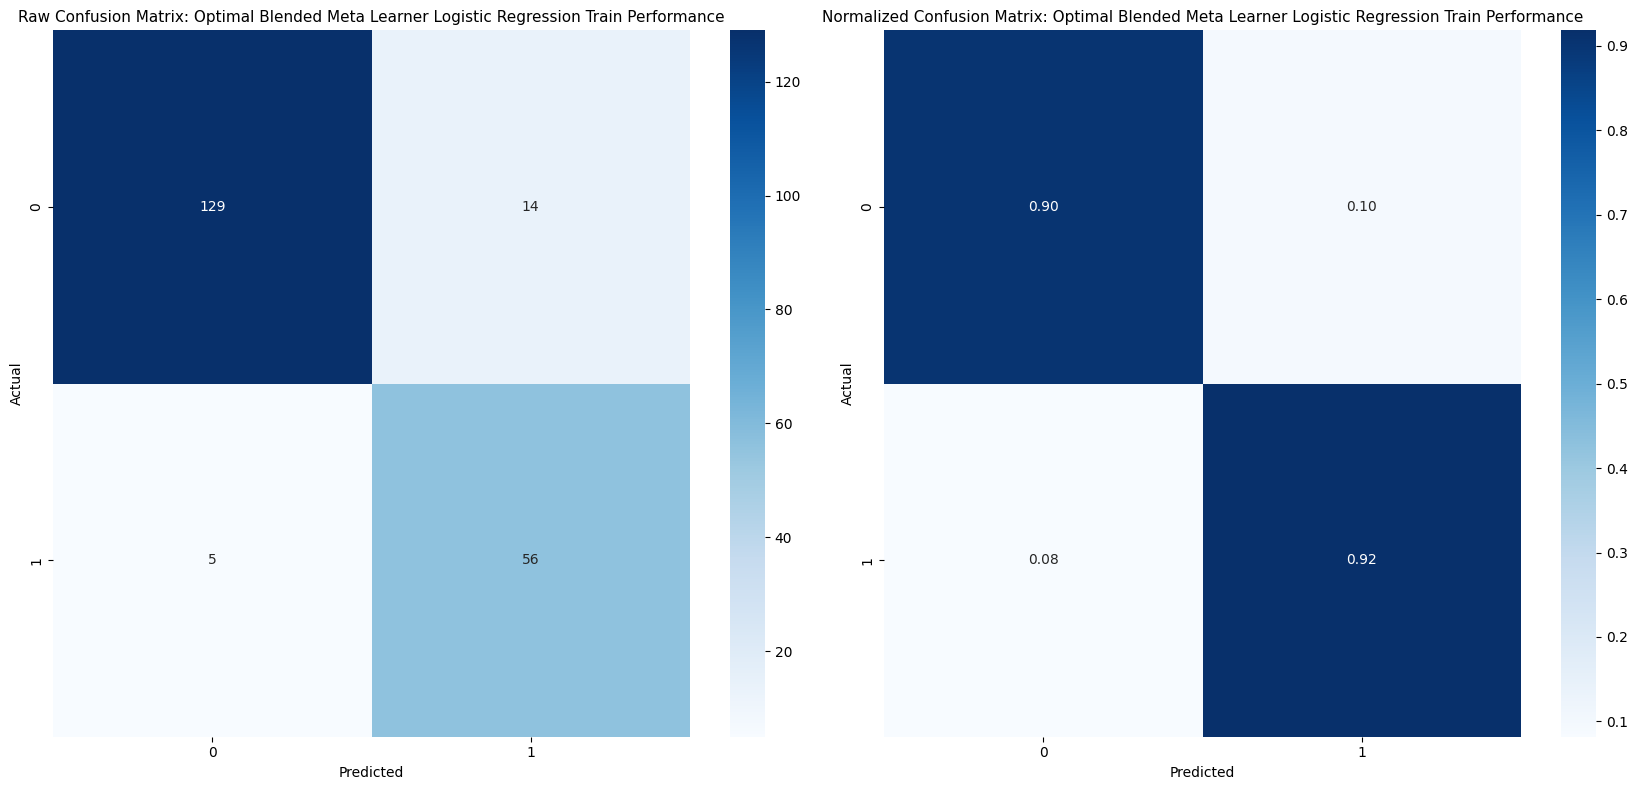

In [486]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the train data
##################################
cm_raw = confusion_matrix(y_preprocessed_train_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_train)))
cm_normalized = confusion_matrix(y_preprocessed_train_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_train)), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Meta Learner Logistic Regression Train Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Meta Learner Logistic Regression Train Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [487]:
##################################
# Summarizing the F1 score results
# and classification metrics
# on the validation data
# to assess overfitting optimism
##################################
print(f"F1 Score on Validationing Data: {blended_metalearner_lr_optimal_f1_validation:.4f}")
print("\nClassification Report on Validation Data:\n", classification_report(y_preprocessed_validation_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_validation))))


F1 Score on Validationing Data: 0.8837

Classification Report on Validation Data:
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        49
         1.0       0.83      0.95      0.88        20

    accuracy                           0.93        69
   macro avg       0.90      0.93      0.92        69
weighted avg       0.93      0.93      0.93        69



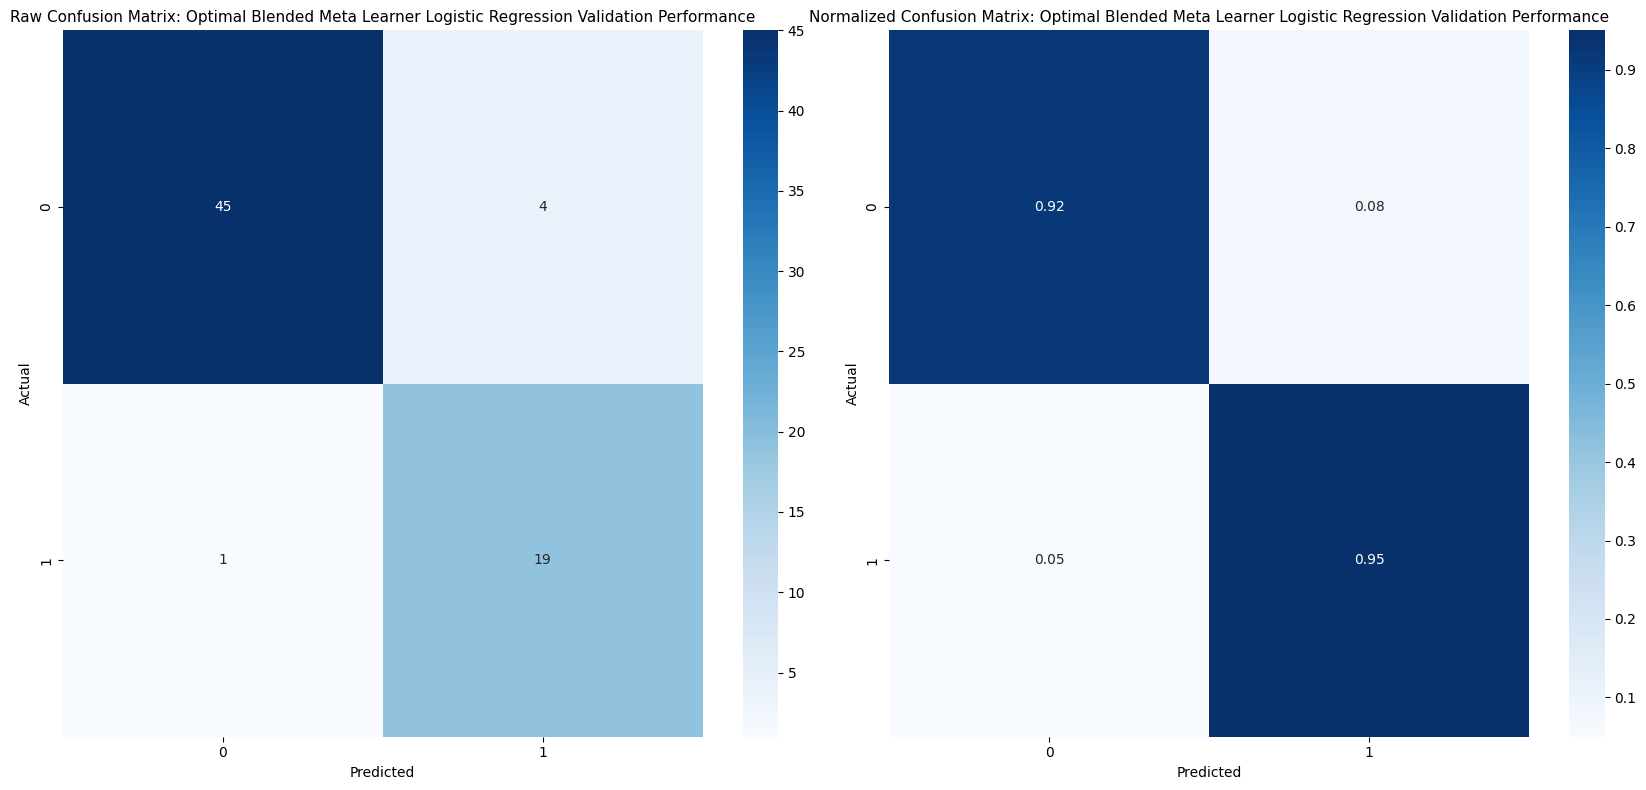

In [488]:
##################################
# Formulating the raw and normalized
# confusion matrices
# from the validation data
##################################
cm_raw = confusion_matrix(y_preprocessed_validation_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_validation)))
cm_normalized = confusion_matrix(y_preprocessed_validation_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_validation)), normalize='true')
fig, ax = plt.subplots(1, 2, figsize=(17, 8))
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Raw Confusion Matrix: Optimal Blended Meta Learner Logistic Regression Validation Performance', fontsize=11)
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', ax=ax[1])
ax[1].set_title('Normalized Confusion Matrix: Optimal Blended Meta Learner Logistic Regression Validation Performance', fontsize=11)
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.tight_layout()
plt.show()


In [489]:
##################################
# Gathering the model evaluation metrics
# for the train data
##################################
blended_metalearner_lr_optimal_train = model_performance_evaluation(y_preprocessed_train_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_train)))
blended_metalearner_lr_optimal_train['model'] = ['blended_metalearner_lr_optimal'] * 5
blended_metalearner_lr_optimal_train['set'] = ['train'] * 5
print('Optimal Blended Meta Learner Logistic Regression Train Performance Metrics: ')
display(blended_metalearner_lr_optimal_train)


Optimal Blended Meta Learner Logistic Regression Train Performance Metrics: 


metric_name  metric_value                           model    set
0    Accuracy      0.906863  blended_metalearner_lr_optimal  train
1   Precision      0.800000  blended_metalearner_lr_optimal  train
2      Recall      0.918033  blended_metalearner_lr_optimal  train
3          F1      0.854962  blended_metalearner_lr_optimal  train
4       AUROC      0.910065  blended_metalearner_lr_optimal  train

In [490]:
##################################
# Gathering the model evaluation metrics
# for the validation data
##################################
blended_metalearner_lr_optimal_validation = model_performance_evaluation(y_preprocessed_validation_encoded, blended_metalearner_lr_optimal.predict(extract_blended_metafeature_matrix(X_preprocessed_validation)))
blended_metalearner_lr_optimal_validation['model'] = ['blended_metalearner_lr_optimal'] * 5
blended_metalearner_lr_optimal_validation['set'] = ['validation'] * 5
print('Optimal Blended Meta Learner Logistic Regression Validation Performance Metrics: ')
display(blended_metalearner_lr_optimal_validation)


Optimal Blended Meta Learner Logistic Regression Validation Performance Metrics: 


metric_name  metric_value                           model         set
0    Accuracy      0.927536  blended_metalearner_lr_optimal  validation
1   Precision      0.826087  blended_metalearner_lr_optimal  validation
2      Recall      0.950000  blended_metalearner_lr_optimal  validation
3          F1      0.883721  blended_metalearner_lr_optimal  validation
4       AUROC      0.934184  blended_metalearner_lr_optimal  validation

## 1.11. Consolidated Summary<a class="anchor" id="1.11"></a>

In [491]:
##################################
# Consolidating all the
# bagged, boosted, stacked and blended
# model performance measures
# for the train and validation data
##################################
ensemble_train_validation_all_performance = pd.concat([bagged_rf_optimal_train,
                                             bagged_rf_optimal_validation,
                                             bagged_et_optimal_train,
                                             bagged_et_optimal_validation,
                                             bagged_bdt_optimal_train,
                                             bagged_bdt_optimal_validation,
                                             bagged_blr_optimal_train,
                                             bagged_blr_optimal_validation,
                                             bagged_bsvm_optimal_train,
                                             bagged_bsvm_optimal_validation,
                                             boosted_ab_optimal_train,
                                             boosted_ab_optimal_validation,
                                             boosted_gb_optimal_train,
                                             boosted_gb_optimal_validation,
                                             boosted_xgb_optimal_train,
                                             boosted_xgb_optimal_validation,
                                             boosted_lgbm_optimal_train,
                                             boosted_lgbm_optimal_validation,
                                             boosted_cb_optimal_train,
                                             boosted_cb_optimal_validation,
                                             stacked_baselearner_knn_optimal_train, 
                                             stacked_baselearner_knn_optimal_validation,
                                             stacked_baselearner_svm_optimal_train, 
                                             stacked_baselearner_svm_optimal_validation,
                                             stacked_baselearner_rc_optimal_train, 
                                             stacked_baselearner_rc_optimal_validation,
                                             stacked_baselearner_nn_optimal_train, 
                                             stacked_baselearner_nn_optimal_validation,
                                             stacked_baselearner_dt_optimal_train, 
                                             stacked_baselearner_dt_optimal_validation,
                                             stacked_metalearner_lr_optimal_train, 
                                             stacked_metalearner_lr_optimal_validation,
                                             blended_baselearner_knn_optimal_train, 
                                             blended_baselearner_knn_optimal_validation,
                                             blended_baselearner_svm_optimal_train, 
                                             blended_baselearner_svm_optimal_validation,
                                             blended_baselearner_rc_optimal_train, 
                                             blended_baselearner_rc_optimal_validation,
                                             blended_baselearner_nn_optimal_train, 
                                             blended_baselearner_nn_optimal_validation,
                                             blended_baselearner_dt_optimal_train, 
                                             blended_baselearner_dt_optimal_validation,
                                             blended_metalearner_lr_optimal_train, 
                                             blended_metalearner_lr_optimal_validation], 
                                            ignore_index=True)
print('Consolidated Ensemble Model Performance on Train and Validation Data: ')
display(ensemble_train_validation_all_performance)


Consolidated Ensemble Model Performance on Train and Validation Data: 


metric_name  metric_value                           model         set
0      Accuracy      0.892157               bagged_rf_optimal       train
1     Precision      0.774648               bagged_rf_optimal       train
2        Recall      0.901639               bagged_rf_optimal       train
3            F1      0.833333               bagged_rf_optimal       train
4         AUROC      0.894876               bagged_rf_optimal       train
..          ...           ...                             ...         ...
215    Accuracy      0.927536  blended_metalearner_lr_optimal  validation
216   Precision      0.826087  blended_metalearner_lr_optimal  validation
217      Recall      0.950000  blended_metalearner_lr_optimal  validation
218          F1      0.883721  blended_metalearner_lr_optimal  validation
219       AUROC      0.934184  blended_metalearner_lr_optimal  validation

[220 rows x 4 columns]

In [492]:
##################################
# Consolidating all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_train_validation_all_performance_F1 = ensemble_train_validation_all_performance[ensemble_train_validation_all_performance['metric_name']=='F1']
ensemble_train_validation_all_performance_F1_train = ensemble_train_validation_all_performance_F1[ensemble_train_validation_all_performance_F1['set']=='train'].loc[:,"metric_value"]
ensemble_train_validation_all_performance_F1_validation = ensemble_train_validation_all_performance_F1[ensemble_train_validation_all_performance_F1['set']=='validation'].loc[:,"metric_value"]


In [493]:
##################################
# Combining all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_train_validation_all_performance_F1_plot = pd.DataFrame({'train': ensemble_train_validation_all_performance_F1_train.values,
                                                              'validation': ensemble_train_validation_all_performance_F1_validation.values},
                                                             index=ensemble_train_validation_all_performance_F1['model'].unique())
ensemble_train_validation_all_performance_F1_plot


train  validation
bagged_rf_optimal                0.833333    0.837209
bagged_et_optimal                0.833333    0.837209
bagged_bdt_optimal               0.846154    0.857143
bagged_blr_optimal               0.833333    0.837209
bagged_bsvm_optimal              0.852713    0.857143
boosted_ab_optimal               0.843750    0.857143
boosted_gb_optimal               0.910569    0.829268
boosted_xgb_optimal              0.850394    0.857143
boosted_lgbm_optimal             0.894309    0.820513
boosted_cb_optimal               0.843750    0.857143
stacked_baselearner_knn_optimal  0.862069    0.648649
stacked_baselearner_svm_optimal  0.843750    0.857143
stacked_baselearner_rc_optimal   0.827068    0.837209
stacked_baselearner_nn_optimal   0.822581    0.809524
stacked_baselearner_dt_optimal   0.851064    0.800000
stacked_metalearner_lr_optimal   0.852713    0.857143
blended_baselearner_knn_optimal  0.862069    0.648649
blended_baselearner_svm_optimal  0.843750    0.857143
blended_baselearner_rc_optimal   0.827068    0.837209
blended_baselearner_nn_optimal   0.822581    0.809524
blended_baselearner_dt_optimal   0.851064    0.800000
blended_metalearner_lr_optimal   0.854962    0.883721

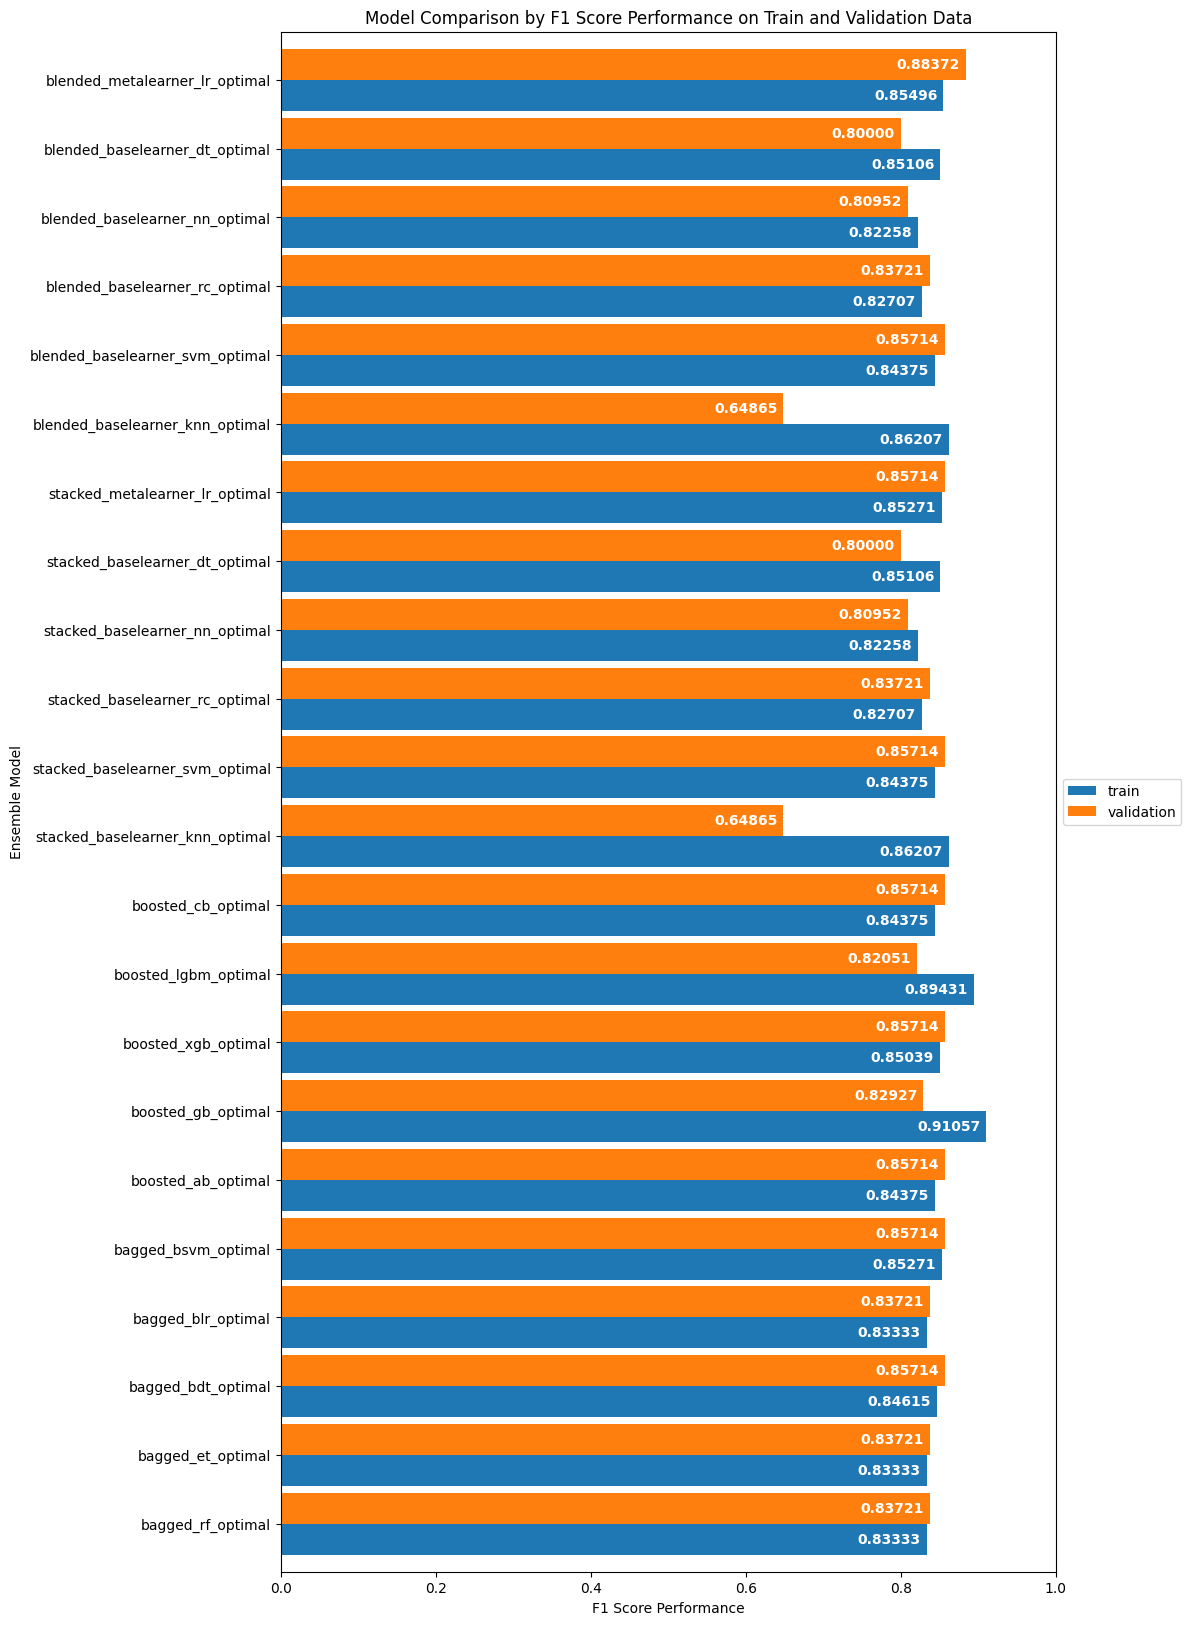

In [494]:
##################################
# Plotting all the F1 score
# model performance measures
# between the train and validation sets
##################################
ensemble_train_validation_all_performance_F1_plot = ensemble_train_validation_all_performance_F1_plot.plot.barh(figsize=(10, 20), width=0.9)
ensemble_train_validation_all_performance_F1_plot.set_xlim(0.00,1.00)
ensemble_train_validation_all_performance_F1_plot.set_title("Model Comparison by F1 Score Performance on Train and Validation Data")
ensemble_train_validation_all_performance_F1_plot.set_xlabel("F1 Score Performance")
ensemble_train_validation_all_performance_F1_plot.set_ylabel("Ensemble Model")
ensemble_train_validation_all_performance_F1_plot.grid(False)
ensemble_train_validation_all_performance_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ensemble_train_validation_all_performance_F1_plot.containers:
    ensemble_train_validation_all_performance_F1_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')


In [495]:
##################################
# Consolidating all the final
# bagged, boosted, stacked and blended
# model performance measures
# for the train and validation data
##################################
ensemble_train_validation_performance = ensemble_train_validation_all_performance[
    ~ensemble_train_validation_all_performance['model'].str.contains('baselearner', case=False, na=False)
]
print('Consolidated Final Ensemble Model Performance on Train and Validation Data: ')
display(ensemble_train_validation_performance)


Consolidated Final Ensemble Model Performance on Train and Validation Data: 


metric_name  metric_value                           model         set
0      Accuracy      0.892157               bagged_rf_optimal       train
1     Precision      0.774648               bagged_rf_optimal       train
2        Recall      0.901639               bagged_rf_optimal       train
3            F1      0.833333               bagged_rf_optimal       train
4         AUROC      0.894876               bagged_rf_optimal       train
..          ...           ...                             ...         ...
215    Accuracy      0.927536  blended_metalearner_lr_optimal  validation
216   Precision      0.826087  blended_metalearner_lr_optimal  validation
217      Recall      0.950000  blended_metalearner_lr_optimal  validation
218          F1      0.883721  blended_metalearner_lr_optimal  validation
219       AUROC      0.934184  blended_metalearner_lr_optimal  validation

[120 rows x 4 columns]

In [496]:
##################################
# Consolidating all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_train_validation_performance_F1 = ensemble_train_validation_performance[ensemble_train_validation_performance['metric_name']=='F1']
ensemble_train_validation_performance_F1_train = ensemble_train_validation_performance_F1[ensemble_train_validation_performance_F1['set']=='train'].loc[:,"metric_value"]
ensemble_train_validation_performance_F1_validation = ensemble_train_validation_performance_F1[ensemble_train_validation_performance_F1['set']=='validation'].loc[:,"metric_value"]


In [497]:
##################################
# Combining all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_train_validation_performance_F1_plot = pd.DataFrame({'train': ensemble_train_validation_performance_F1_train.values,
                                                              'validation': ensemble_train_validation_performance_F1_validation.values},
                                                             index=ensemble_train_validation_performance_F1['model'].unique())
ensemble_train_validation_performance_F1_plot


train  validation
bagged_rf_optimal               0.833333    0.837209
bagged_et_optimal               0.833333    0.837209
bagged_bdt_optimal              0.846154    0.857143
bagged_blr_optimal              0.833333    0.837209
bagged_bsvm_optimal             0.852713    0.857143
boosted_ab_optimal              0.843750    0.857143
boosted_gb_optimal              0.910569    0.829268
boosted_xgb_optimal             0.850394    0.857143
boosted_lgbm_optimal            0.894309    0.820513
boosted_cb_optimal              0.843750    0.857143
stacked_metalearner_lr_optimal  0.852713    0.857143
blended_metalearner_lr_optimal  0.854962    0.883721

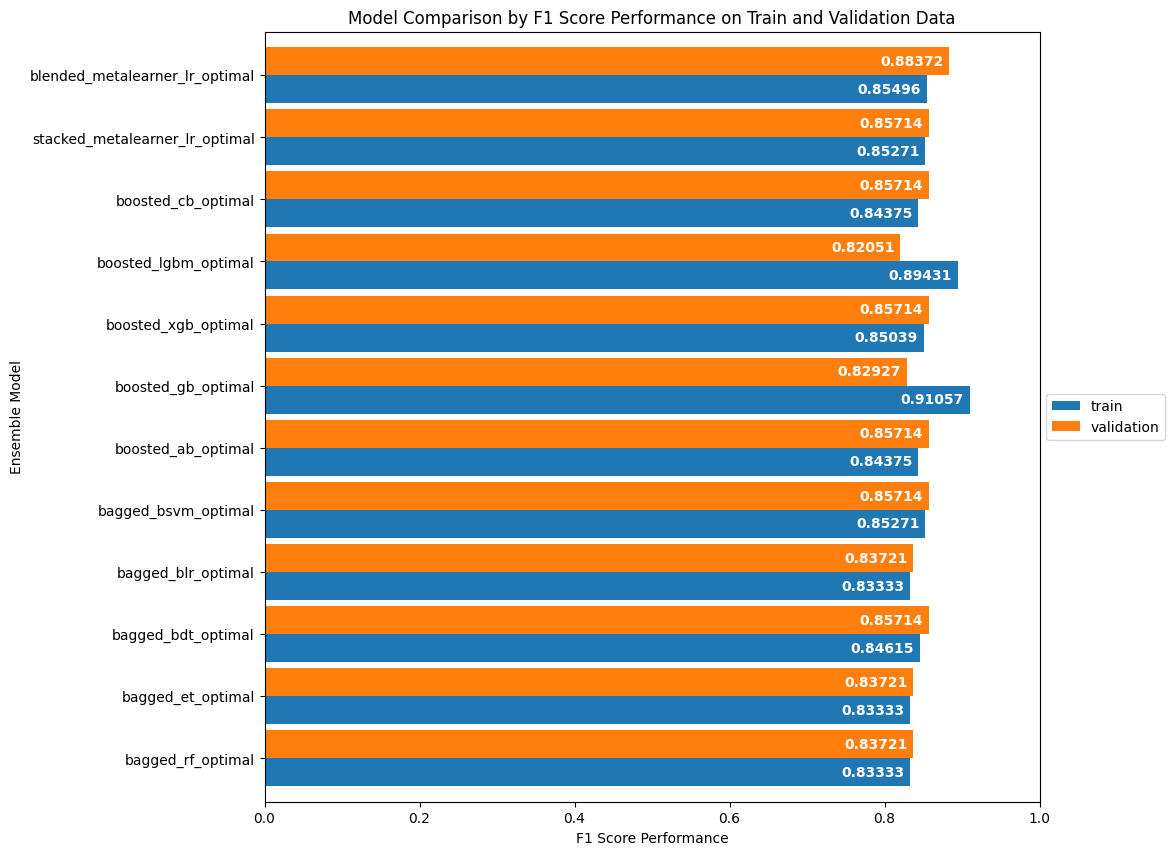

In [498]:
##################################
# Plotting all the F1 score
# model performance measures
# between the train and validation sets
##################################
ensemble_train_validation_performance_F1_plot = ensemble_train_validation_performance_F1_plot.plot.barh(figsize=(10, 10), width=0.9)
ensemble_train_validation_performance_F1_plot.set_xlim(0.00,1.00)
ensemble_train_validation_performance_F1_plot.set_title("Model Comparison by F1 Score Performance on Train and Validation Data")
ensemble_train_validation_performance_F1_plot.set_xlabel("F1 Score Performance")
ensemble_train_validation_performance_F1_plot.set_ylabel("Ensemble Model")
ensemble_train_validation_performance_F1_plot.grid(False)
ensemble_train_validation_performance_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ensemble_train_validation_performance_F1_plot.containers:
    ensemble_train_validation_performance_F1_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')


In [499]:
##################################
# Gathering all model performance measures
# for the validation data
##################################
ensemble_train_validation_performance_Accuracy_validation = ensemble_train_validation_performance[(ensemble_train_validation_performance['set']=='validation') & (ensemble_train_validation_performance['metric_name']=='Accuracy')].loc[:,"metric_value"]
ensemble_train_validation_performance_Precision_validation = ensemble_train_validation_performance[(ensemble_train_validation_performance['set']=='validation') & (ensemble_train_validation_performance['metric_name']=='Precision')].loc[:,"metric_value"]
ensemble_train_validation_performance_Recall_validation = ensemble_train_validation_performance[(ensemble_train_validation_performance['set']=='validation') & (ensemble_train_validation_performance['metric_name']=='Recall')].loc[:,"metric_value"]
ensemble_train_validation_performance_F1_validation = ensemble_train_validation_performance[(ensemble_train_validation_performance['set']=='validation') & (ensemble_train_validation_performance['metric_name']=='F1')].loc[:,"metric_value"]
ensemble_train_validation_performance_AUROC_validation = ensemble_train_validation_performance[(ensemble_train_validation_performance['set']=='validation') & (ensemble_train_validation_performance['metric_name']=='AUROC')].loc[:,"metric_value"]


In [500]:
##################################
# Combining all the model performance measures
# for the validation data
##################################
ensemble_train_validation_performance_all_plot_validation = pd.DataFrame({'accuracy': ensemble_train_validation_performance_Accuracy_validation.values,
                                                                    'precision': ensemble_train_validation_performance_Precision_validation.values,
                                                                    'recall': ensemble_train_validation_performance_Recall_validation.values,
                                                                    'f1': ensemble_train_validation_performance_F1_validation.values,
                                                                    'auroc': ensemble_train_validation_performance_AUROC_validation.values},
                                                                   index=ensemble_train_validation_performance['model'].unique())
ensemble_train_validation_performance_all_plot_validation


accuracy  precision  recall        f1  \
bagged_rf_optimal               0.898551   0.782609    0.90  0.837209   
bagged_et_optimal               0.898551   0.782609    0.90  0.837209   
bagged_bdt_optimal              0.913043   0.818182    0.90  0.857143   
bagged_blr_optimal              0.898551   0.782609    0.90  0.837209   
bagged_bsvm_optimal             0.913043   0.818182    0.90  0.857143   
boosted_ab_optimal              0.913043   0.818182    0.90  0.857143   
boosted_gb_optimal              0.898551   0.809524    0.85  0.829268   
boosted_xgb_optimal             0.913043   0.818182    0.90  0.857143   
boosted_lgbm_optimal            0.898551   0.842105    0.80  0.820513   
boosted_cb_optimal              0.913043   0.818182    0.90  0.857143   
stacked_metalearner_lr_optimal  0.913043   0.818182    0.90  0.857143   
blended_metalearner_lr_optimal  0.927536   0.826087    0.95  0.883721   

                                   auroc  
bagged_rf_optimal               0.898980  
bagged_et_optimal               0.898980  
bagged_bdt_optimal              0.909184  
bagged_blr_optimal              0.898980  
bagged_bsvm_optimal             0.909184  
boosted_ab_optimal              0.909184  
boosted_gb_optimal              0.884184  
boosted_xgb_optimal             0.909184  
boosted_lgbm_optimal            0.869388  
boosted_cb_optimal              0.909184  
stacked_metalearner_lr_optimal  0.909184  
blended_metalearner_lr_optimal  0.934184

In [501]:
##################################
# Gathering the model evaluation metrics
# for the test data
##################################
##################################
# Defining a dictionary of models and 
# their corresponding feature extraction functions
##################################
models = {
    'bagged_rf_optimal': bagged_rf_optimal,
    'bagged_et_optimal': bagged_et_optimal,
    'bagged_bdt_optimal': bagged_bdt_optimal,
    'bagged_blr_optimal': bagged_blr_optimal,
    'bagged_bsvm_optimal': bagged_bsvm_optimal,
    'boosted_ab_optimal': boosted_ab_optimal,
    'boosted_gb_optimal': boosted_gb_optimal,
    'boosted_xgb_optimal': boosted_xgb_optimal,
    'boosted_lgbm_optimal': boosted_lgbm_optimal,
    'boosted_cb_optimal': boosted_cb_optimal,
    'stacked_baselearner_knn_optimal': stacked_baselearner_knn_optimal,
    'stacked_baselearner_svm_optimal': stacked_baselearner_svm_optimal,
    'stacked_baselearner_rc_optimal': stacked_baselearner_rc_optimal,
    'stacked_baselearner_nn_optimal': stacked_baselearner_nn_optimal,
    'stacked_baselearner_dt_optimal': stacked_baselearner_dt_optimal,
    'stacked_metalearner_lr_optimal': stacked_metalearner_lr_optimal,
    'blended_baselearner_knn_optimal': blended_baselearner_knn_optimal,
    'blended_baselearner_svm_optimal': blended_baselearner_svm_optimal,
    'blended_baselearner_rc_optimal': blended_baselearner_rc_optimal,
    'blended_baselearner_nn_optimal': blended_baselearner_nn_optimal,
    'blended_baselearner_dt_optimal': blended_baselearner_dt_optimal,
    'blended_metalearner_lr_optimal': blended_metalearner_lr_optimal
}

##################################
# Defining transformation functions for meta-learners
##################################
feature_extractors = {
    'stacked_metalearner_lr_optimal': extract_stacked_metafeature_matrix,
    'blended_metalearner_lr_optimal': extract_blended_metafeature_matrix
}


In [502]:
##################################
# Encoding the response variables
# for the test data
##################################
y_preprocessed_test_encoded = y_encoder.transform(y_preprocessed_test.values.reshape(-1, 1)).ravel()


In [503]:
##################################
# Storing the model evaluation metrics
# for the test data
##################################
ensemble_test_all_performance = []

##################################
# Looping through each model 
# and evaluate performance on test data
##################################
for model_name, model in models.items():
    # Applying transformation if needed (for meta-learner)
    X_input = feature_extractors.get(model_name, lambda x: x)(X_preprocessed_test)
    
    # Evaluating performance
    ensemble_test_all_performance_results = model_performance_evaluation(y_preprocessed_test_encoded, model.predict(X_input))
    
    # Adding metadata columns
    ensemble_test_all_performance_results['model'] = model_name
    ensemble_test_all_performance_results['set'] = 'test'
    
    # Storing result
    ensemble_test_all_performance.append(ensemble_test_all_performance_results)


In [504]:
##################################
# Consolidating all model performance measures
# for the test data
##################################
ensemble_test_all_performance = pd.concat(ensemble_test_all_performance, ignore_index=True)
print('Consolidated Ensemble Model Performance on Test Data: ')
display(ensemble_test_all_performance)


Consolidated Ensemble Model Performance on Test Data: 


metric_name  metric_value                           model   set
0      Accuracy      0.901099               bagged_rf_optimal  test
1     Precision      0.821429               bagged_rf_optimal  test
2        Recall      0.851852               bagged_rf_optimal  test
3            F1      0.836364               bagged_rf_optimal  test
4         AUROC      0.886863               bagged_rf_optimal  test
..          ...           ...                             ...   ...
105    Accuracy      0.912088  blended_metalearner_lr_optimal  test
106   Precision      0.827586  blended_metalearner_lr_optimal  test
107      Recall      0.888889  blended_metalearner_lr_optimal  test
108          F1      0.857143  blended_metalearner_lr_optimal  test
109       AUROC      0.905382  blended_metalearner_lr_optimal  test

[110 rows x 4 columns]

In [505]:
##################################
# Consolidating all the final
# bagged, boosted, stacked and blended
# model performance measures
# for the test data
##################################
ensemble_test_performance = ensemble_test_all_performance[
    ~ensemble_test_all_performance['model'].str.contains('baselearner', case=False, na=False)
]
print('Consolidated Final Ensemble Model Performance on Test Data: ')
display(ensemble_test_performance)


Consolidated Final Ensemble Model Performance on Test Data: 


metric_name  metric_value                           model   set
0      Accuracy      0.901099               bagged_rf_optimal  test
1     Precision      0.821429               bagged_rf_optimal  test
2        Recall      0.851852               bagged_rf_optimal  test
3            F1      0.836364               bagged_rf_optimal  test
4         AUROC      0.886863               bagged_rf_optimal  test
5      Accuracy      0.912088               bagged_et_optimal  test
6     Precision      0.851852               bagged_et_optimal  test
7        Recall      0.851852               bagged_et_optimal  test
8            F1      0.851852               bagged_et_optimal  test
9         AUROC      0.894676               bagged_et_optimal  test
10     Accuracy      0.912088              bagged_bdt_optimal  test
11    Precision      0.851852              bagged_bdt_optimal  test
12       Recall      0.851852              bagged_bdt_optimal  test
13           F1      0.851852              bagged_bdt_optimal  test
14        AUROC      0.894676              bagged_bdt_optimal  test
15     Accuracy      0.901099              bagged_blr_optimal  test
16    Precision      0.800000              bagged_blr_optimal  test
17       Recall      0.888889              bagged_blr_optimal  test
18           F1      0.842105              bagged_blr_optimal  test
19        AUROC      0.897569              bagged_blr_optimal  test
20     Accuracy      0.912088             bagged_bsvm_optimal  test
21    Precision      0.827586             bagged_bsvm_optimal  test
22       Recall      0.888889             bagged_bsvm_optimal  test
23           F1      0.857143             bagged_bsvm_optimal  test
24        AUROC      0.905382             bagged_bsvm_optimal  test
25     Accuracy      0.912088              boosted_ab_optimal  test
26    Precision      0.851852              boosted_ab_optimal  test
27       Recall      0.851852              boosted_ab_optimal  test
28           F1      0.851852              boosted_ab_optimal  test
29        AUROC      0.894676              boosted_ab_optimal  test
30     Accuracy      0.923077              boosted_gb_optimal  test
31    Precision      0.884615              boosted_gb_optimal  test
32       Recall      0.851852              boosted_gb_optimal  test
33           F1      0.867925              boosted_gb_optimal  test
34        AUROC      0.902488              boosted_gb_optimal  test
35     Accuracy      0.901099             boosted_xgb_optimal  test
36    Precision      0.846154             boosted_xgb_optimal  test
37       Recall      0.814815             boosted_xgb_optimal  test
38           F1      0.830189             boosted_xgb_optimal  test
39        AUROC      0.876157             boosted_xgb_optimal  test
40     Accuracy      0.912088            boosted_lgbm_optimal  test
41    Precision      0.880000            boosted_lgbm_optimal  test
42       Recall      0.814815            boosted_lgbm_optimal  test
43           F1      0.846154            boosted_lgbm_optimal  test
44        AUROC      0.883970            boosted_lgbm_optimal  test
45     Accuracy      0.912088              boosted_cb_optimal  test
46    Precision      0.851852              boosted_cb_optimal  test
47       Recall      0.851852              boosted_cb_optimal  test
48           F1      0.851852              boosted_cb_optimal  test
49        AUROC      0.894676              boosted_cb_optimal  test
75     Accuracy      0.923077  stacked_metalearner_lr_optimal  test
76    Precision      0.857143  stacked_metalearner_lr_optimal  test
77       Recall      0.888889  stacked_metalearner_lr_optimal  test
78           F1      0.872727  stacked_metalearner_lr_optimal  test
79        AUROC      0.913194  stacked_metalearner_lr_optimal  test
105    Accuracy      0.912088  blended_metalearner_lr_optimal  test
106   Precision      0.827586  blended_metalearner_lr_optimal  test
107      Recall      0.888889  blended_metalearner_lr_optima

In [506]:
##################################
# Gathering all model performance measures
# for the test data
##################################
ensemble_test_performance_Accuracy_test = ensemble_test_performance[(ensemble_test_performance['set']=='test') & (ensemble_test_performance['metric_name']=='Accuracy')].loc[:,"metric_value"]
ensemble_test_performance_Precision_test = ensemble_test_performance[(ensemble_test_performance['set']=='test') & (ensemble_test_performance['metric_name']=='Precision')].loc[:,"metric_value"]
ensemble_test_performance_Recall_test = ensemble_test_performance[(ensemble_test_performance['set']=='test') & (ensemble_test_performance['metric_name']=='Recall')].loc[:,"metric_value"]
ensemble_test_performance_F1_test = ensemble_test_performance[(ensemble_test_performance['set']=='test') & (ensemble_test_performance['metric_name']=='F1')].loc[:,"metric_value"]
ensemble_test_performance_AUROC_test = ensemble_test_performance[(ensemble_test_performance['set']=='test') & (ensemble_test_performance['metric_name']=='AUROC')].loc[:,"metric_value"]


In [507]:
##################################
# Combining all the model performance measures
# for the test data
##################################
ensemble_test_performance_all_plot_test = pd.DataFrame({'accuracy': ensemble_test_performance_Accuracy_test.values,
                                                                    'precision': ensemble_test_performance_Precision_test.values,
                                                                    'recall': ensemble_test_performance_Recall_test.values,
                                                                    'f1': ensemble_test_performance_F1_test.values,
                                                                    'auroc': ensemble_test_performance_AUROC_test.values},
                                                                   index=ensemble_test_performance['model'].unique())
ensemble_test_performance_all_plot_test


accuracy  precision    recall        f1  \
bagged_rf_optimal               0.901099   0.821429  0.851852  0.836364   
bagged_et_optimal               0.912088   0.851852  0.851852  0.851852   
bagged_bdt_optimal              0.912088   0.851852  0.851852  0.851852   
bagged_blr_optimal              0.901099   0.800000  0.888889  0.842105   
bagged_bsvm_optimal             0.912088   0.827586  0.888889  0.857143   
boosted_ab_optimal              0.912088   0.851852  0.851852  0.851852   
boosted_gb_optimal              0.923077   0.884615  0.851852  0.867925   
boosted_xgb_optimal             0.901099   0.846154  0.814815  0.830189   
boosted_lgbm_optimal            0.912088   0.880000  0.814815  0.846154   
boosted_cb_optimal              0.912088   0.851852  0.851852  0.851852   
stacked_metalearner_lr_optimal  0.923077   0.857143  0.888889  0.872727   
blended_metalearner_lr_optimal  0.912088   0.827586  0.888889  0.857143   

                                   auroc  
bagged_rf_optimal               0.886863  
bagged_et_optimal               0.894676  
bagged_bdt_optimal              0.894676  
bagged_blr_optimal              0.897569  
bagged_bsvm_optimal             0.905382  
boosted_ab_optimal              0.894676  
boosted_gb_optimal              0.902488  
boosted_xgb_optimal             0.876157  
boosted_lgbm_optimal            0.883970  
boosted_cb_optimal              0.894676  
stacked_metalearner_lr_optimal  0.913194  
blended_metalearner_lr_optimal  0.905382

In [508]:
##################################
# Consolidating all the final
# bagged, boosted, stacked and blended
# model performance measures
# for the train, validation and test data
##################################
ensemble_overall_performance = pd.concat([ensemble_train_validation_performance, ensemble_test_performance], axis=0)


In [509]:
##################################
# Consolidating all the F1 score
# model performance measures
# between the train, validation and test data
##################################
ensemble_overall_performance_F1 = ensemble_overall_performance[ensemble_overall_performance['metric_name']=='F1']
ensemble_overall_performance_F1_train = ensemble_overall_performance_F1[ensemble_overall_performance_F1['set']=='train'].loc[:,"metric_value"]
ensemble_overall_performance_F1_validation = ensemble_overall_performance_F1[ensemble_overall_performance_F1['set']=='validation'].loc[:,"metric_value"]
ensemble_overall_performance_F1_test = ensemble_overall_performance_F1[ensemble_overall_performance_F1['set']=='test'].loc[:,"metric_value"]


In [510]:
##################################
# Combining all the F1 score
# model performance measures
# between the train and validation data
##################################
ensemble_overall_performance_F1_plot = pd.DataFrame({'train': ensemble_overall_performance_F1_train.values,
                                                     'validation': ensemble_overall_performance_F1_validation.values,
                                                     'test': ensemble_overall_performance_F1_test.values},
                                                    index=ensemble_overall_performance_F1['model'].unique())
ensemble_overall_performance_F1_plot


train  validation      test
bagged_rf_optimal               0.833333    0.837209  0.836364
bagged_et_optimal               0.833333    0.837209  0.851852
bagged_bdt_optimal              0.846154    0.857143  0.851852
bagged_blr_optimal              0.833333    0.837209  0.842105
bagged_bsvm_optimal             0.852713    0.857143  0.857143
boosted_ab_optimal              0.843750    0.857143  0.851852
boosted_gb_optimal              0.910569    0.829268  0.867925
boosted_xgb_optimal             0.850394    0.857143  0.830189
boosted_lgbm_optimal            0.894309    0.820513  0.846154
boosted_cb_optimal              0.843750    0.857143  0.851852
stacked_metalearner_lr_optimal  0.852713    0.857143  0.872727
blended_metalearner_lr_optimal  0.854962    0.883721  0.857143

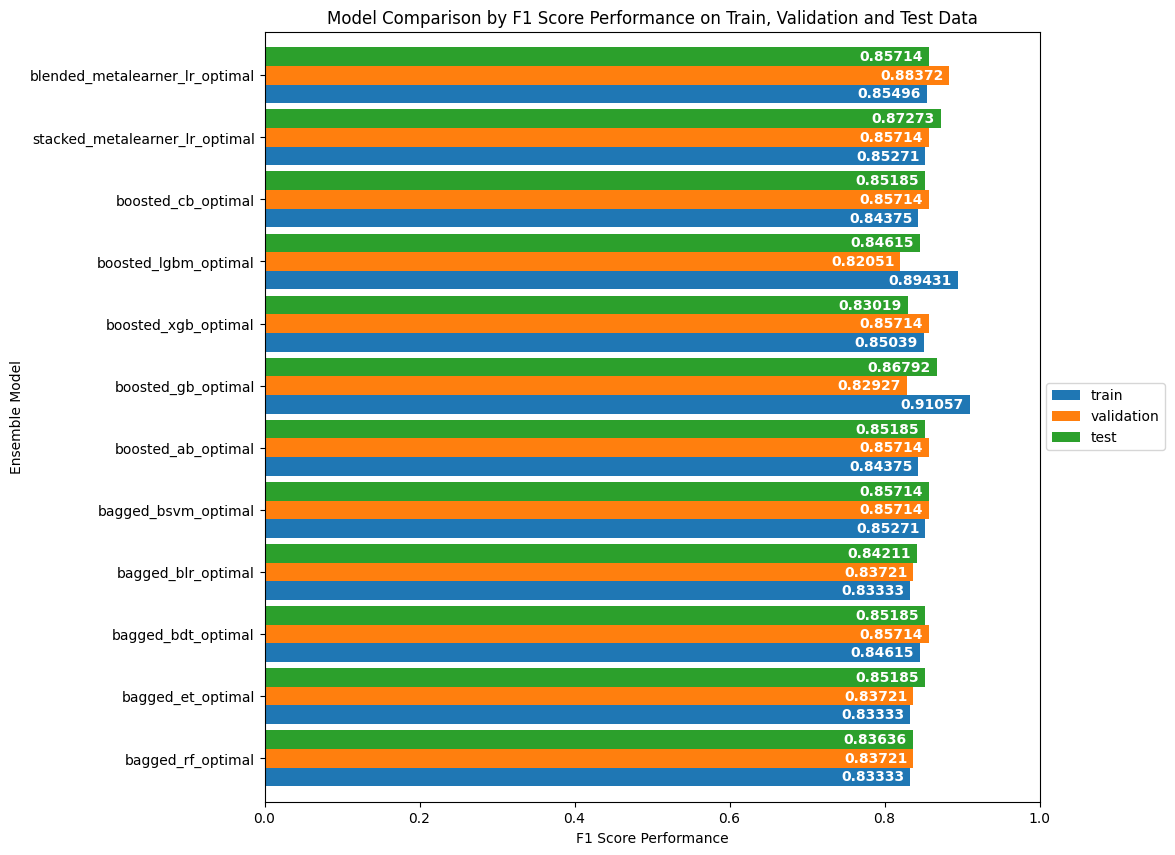

In [511]:
##################################
# Plotting all the F1 score
# model performance measures
# between train, validation and test sets
##################################
ensemble_overall_performance_F1_plot = ensemble_overall_performance_F1_plot.plot.barh(figsize=(10, 10), width=0.9)
ensemble_overall_performance_F1_plot.set_xlim(0.00,1.00)
ensemble_overall_performance_F1_plot.set_title("Model Comparison by F1 Score Performance on Train, Validation and Test Data")
ensemble_overall_performance_F1_plot.set_xlabel("F1 Score Performance")
ensemble_overall_performance_F1_plot.set_ylabel("Ensemble Model")
ensemble_overall_performance_F1_plot.grid(False)
ensemble_overall_performance_F1_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
for container in ensemble_overall_performance_F1_plot.containers:
    ensemble_overall_performance_F1_plot.bar_label(container, fmt='%.5f', padding=-50, color='white', fontweight='bold')


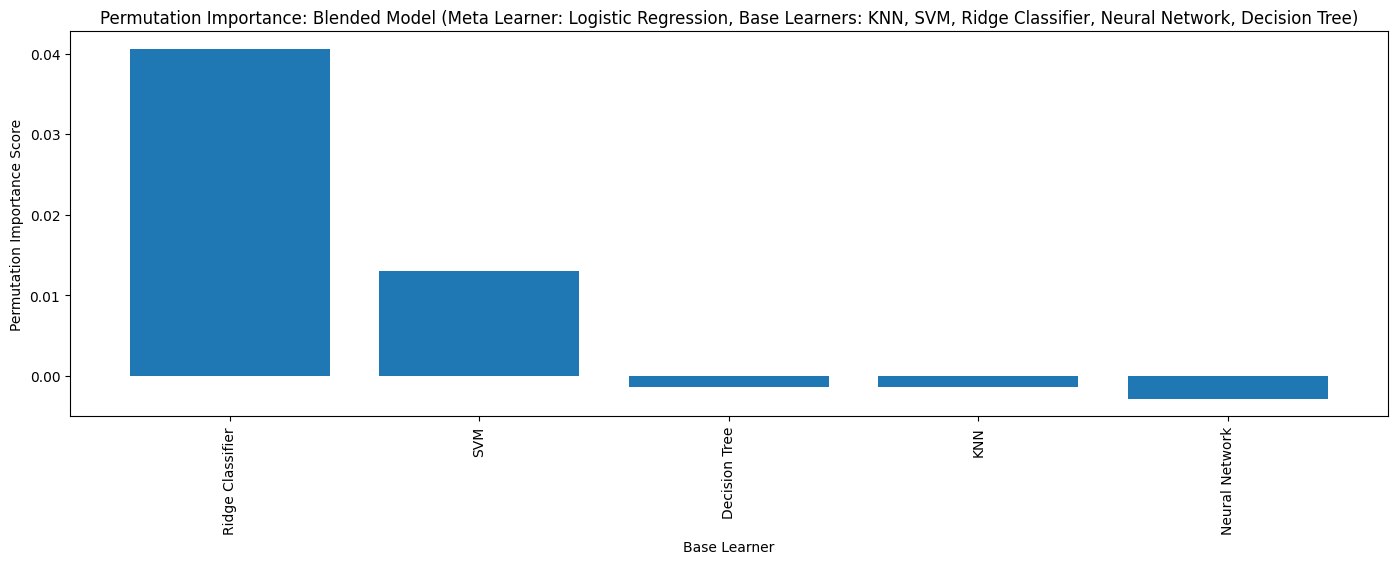

In [512]:
##################################
# Computing the permutation importance
# for the final model determined as the blended model
# with a Logistic Regression meta learner comprised of the 
# KNN, SVM, Ridge Classifier, Neural Network and Decision Tree base learners
##################################
base_learner_names = ['KNN', 'SVM', 'Ridge Classifier', 'Neural Network', 'Decision Tree']
perm_importance = permutation_importance(
    blended_metalearner_lr_optimal,  # Meta Learner
    meta_validation_blended,         # Meta Features (Base Learner Predictions)
    y_preprocessed_validation_encoded,       # True Labels
    n_repeats=10, 
    random_state=42
)

# Obtaining the sorted indices in descending order
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plotting the feature importance
plt.figure(figsize=(17, 5))
plt.bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(len(perm_importance.importances_mean)), np.array(base_learner_names)[sorted_idx], rotation=90)
plt.xlabel("Base Learner")
plt.ylabel("Permutation Importance Score")
plt.title("Permutation Importance: Blended Model (Meta Learner: Logistic Regression, Base Learners: KNN, SVM, Ridge Classifier, Neural Network, Decision Tree)")
plt.show()


In [513]:
##################################
# Creating a function to compute the permutation importance
# for the KNN, SVM, Ridge Classifier, Neural Network and Decision Tree base learners
##################################
feature_names = ['Gender','Smoking','Physical_Examination','Adenopathy','Focality','Risk','T','Stage','Response','Age']
def compute_permutation_importance(model, X_evaluation, y_evaluation, model_name="Model", feature_names=feature_names, n_repeats=10, random_state=42):
    # Computing permutation importance
    perm_importance = permutation_importance(model, X_evaluation, y_evaluation, n_repeats=n_repeats, random_state=random_state)

    # Getting the sorted indices (descending order)
    sorted_idx = perm_importance.importances_mean.argsort()[::-1]

    # Using feature names if provided, else using column indices
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X_evaluation.shape[1])]

    # Plotting feature importance
    plt.figure(figsize=(17, 5))
    plt.bar(range(len(perm_importance.importances_mean)), perm_importance.importances_mean[sorted_idx], align='center')
    plt.xticks(range(len(perm_importance.importances_mean)), np.array(feature_names)[sorted_idx], rotation=90)
    plt.xlabel("Feature")
    plt.ylabel("Permutation Importance Score")
    plt.title(f"Feature Importance (Permutation): {model_name}")
    plt.show()

    return perm_importance


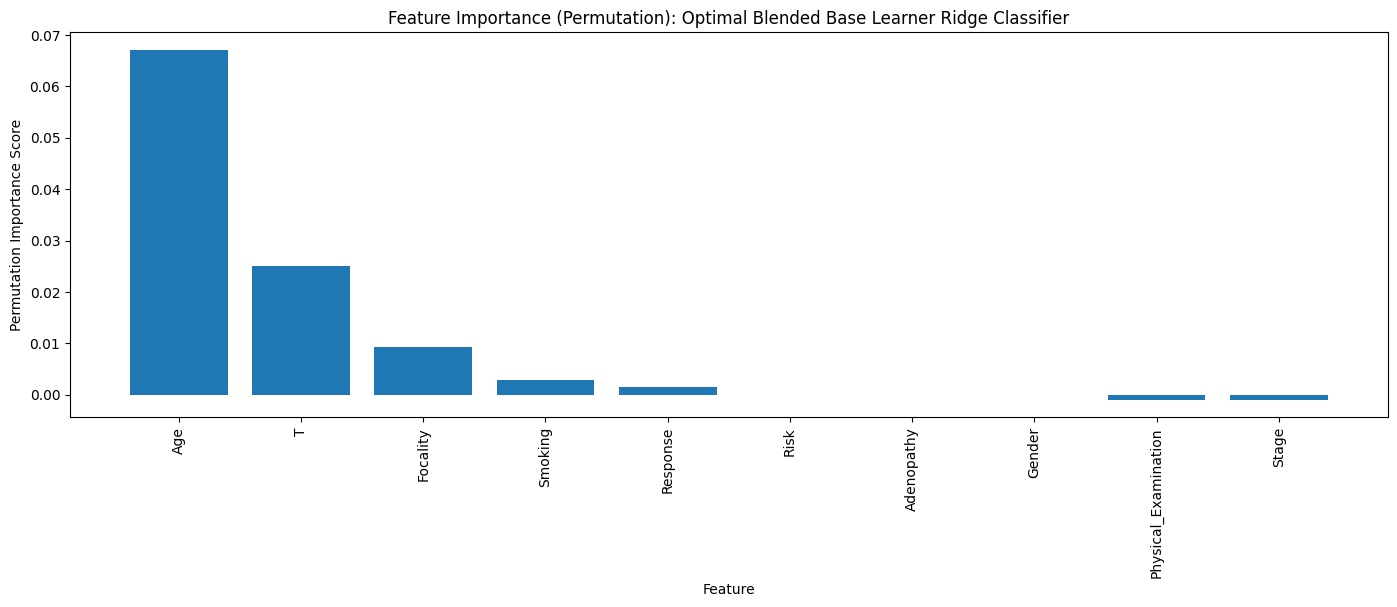

In [514]:
##################################
# Computing the permutation importance
# for the Ridge Classifier base learner
##################################
perm_importance_blended_baselearner_rc_optimal = compute_permutation_importance(blended_baselearner_rc_optimal, 
                                                                                X_preprocessed_train, 
                                                                                y_preprocessed_train_encoded, 
                                                                                "Optimal Blended Base Learner Ridge Classifier",
                                                                                feature_names=feature_names)


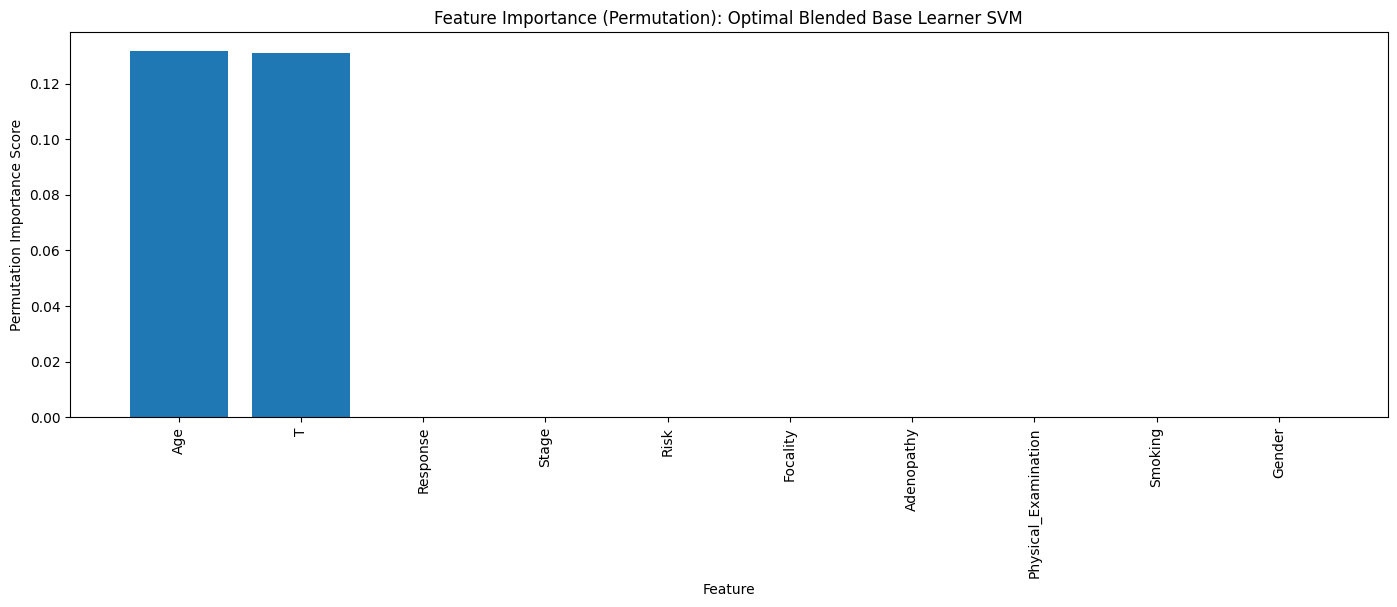

In [515]:
##################################
# Computing the permutation importance
# for the Ridge Classifier base learner
##################################
perm_importance_blended_baselearner_svm_optimal = compute_permutation_importance(blended_baselearner_svm_optimal, 
                                                                                 X_preprocessed_train, 
                                                                                 y_preprocessed_train_encoded, 
                                                                                 "Optimal Blended Base Learner SVM",
                                                                                 feature_names=feature_names)


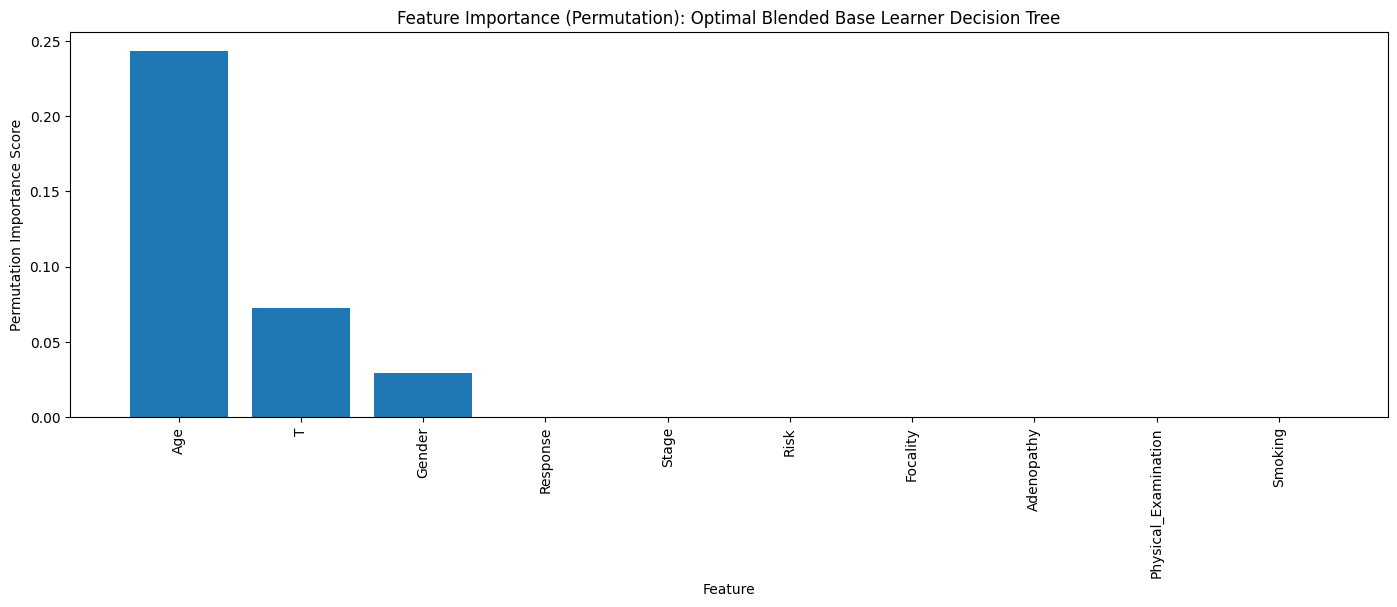

In [516]:
##################################
# Computing the permutation importance
# for the Decision Tree base learner
##################################
perm_importance_blended_baselearner_dt_optimal = compute_permutation_importance(blended_baselearner_dt_optimal, 
                                                                                X_preprocessed_train, 
                                                                                y_preprocessed_train_encoded, 
                                                                                "Optimal Blended Base Learner Decision Tree",
                                                                                feature_names=feature_names)


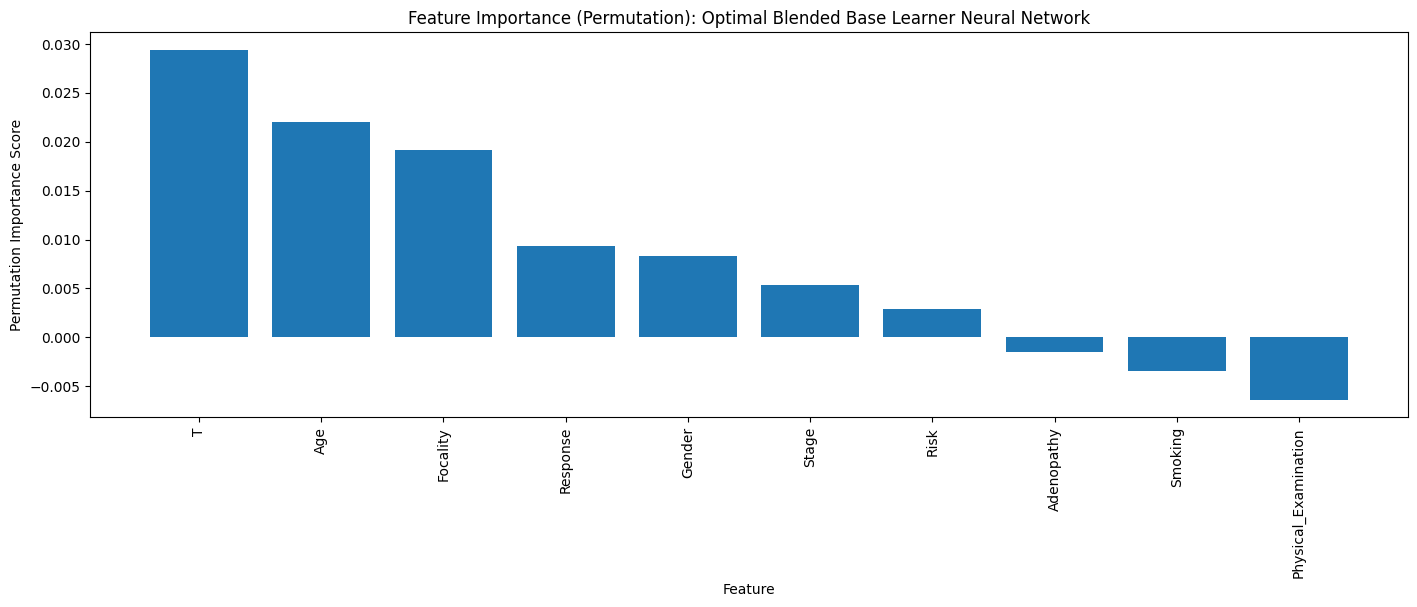

In [517]:
##################################
# Computing the permutation importance
# for the Neural Network base learner
##################################
perm_importance_blended_baselearner_nn_optimal = compute_permutation_importance(blended_baselearner_nn_optimal, 
                                                                                X_preprocessed_train, 
                                                                                y_preprocessed_train_encoded, 
                                                                                "Optimal Blended Base Learner Neural Network",
                                                                                feature_names=feature_names)


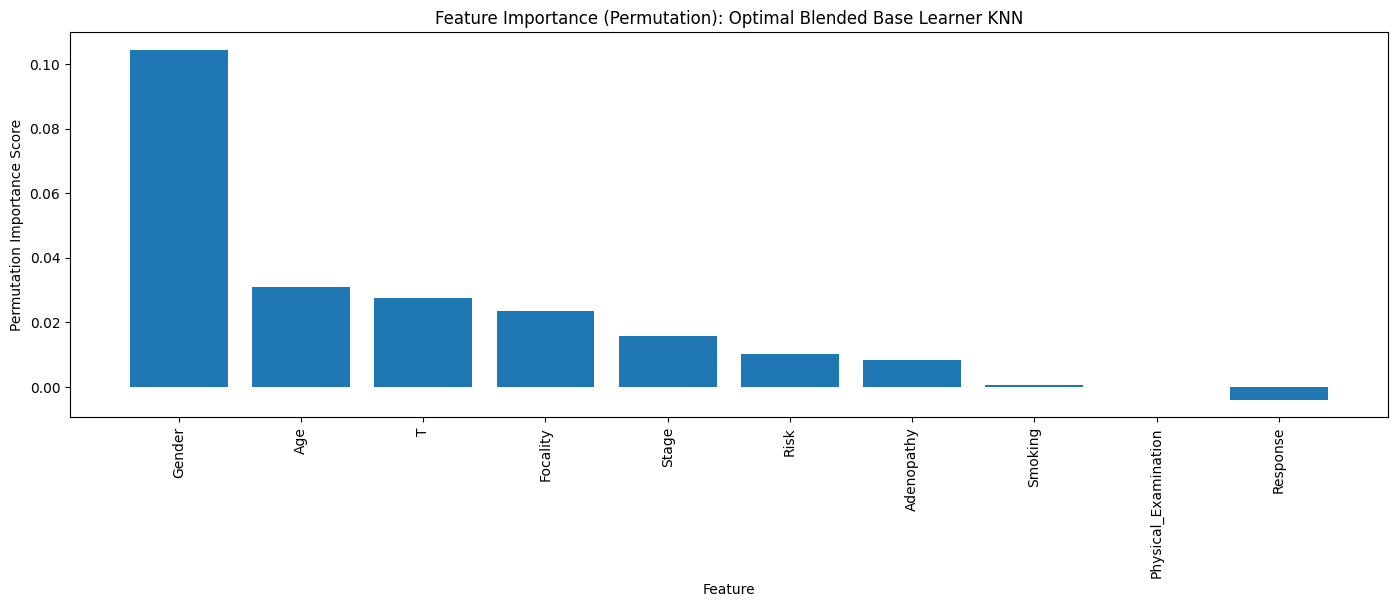

In [518]:
##################################
# Computing the permutation importance
# for the KNN base learner
##################################
perm_importance_blended_baselearner_knn_optimal = compute_permutation_importance(blended_baselearner_knn_optimal, 
                                                                                 X_preprocessed_train, 
                                                                                 y_preprocessed_train_encoded, 
                                                                                 "Optimal Blended Base Learner KNN",
                                                                                 feature_names=feature_names)


# 2. Summary <a class="anchor" id="Summary"></a>

# 3. References <a class="anchor" id="References"></a>
* **[Book]** [Ensemble Methods for Machine Learning](https://www.manning.com/books/ensemble-methods-for-machine-learning) by Gautam Kunapuli
* **[Book]** [Applied Predictive Modeling](http://appliedpredictivemodeling.com/) by Max Kuhn and Kjell Johnson
* **[Book]** [An Introduction to Statistical Learning](https://www.statlearning.com/) by Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
* **[Book]** [Ensemble Methods: Foundations and Algorithms](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Zhi-Hua Zhou
* **[Book]** [Effective XGBoost: Optimizing, Tuning, Understanding, and Deploying Classification Models (Treading on Python)](https://www.taylorfrancis.com/books/mono/10.1201/b12207/ensemble-methods-zhi-hua-zhou) by Matt Harrison, Edward Krueger, Alex Rook, Ronald Legere and Bojan Tunguz
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.image](https://matplotlib.org/stable/api/image_api.html) by MatPlotLib Team
* **[Python Library API]** [matplotlib.offsetbox](https://matplotlib.org/stable/api/offsetbox_api.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Python Library API]** [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.svm](https://scikit-learn.org/stable/modules/svm.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) by Scikit-Learn Team
* **[Python Library API]** [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html) by Scikit-Learn Team
* **[Python Library API]** [imblearn.over_sampling](https://imbalanced-learn.org/stable/over_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [imblearn.under_sampling](https://imbalanced-learn.org/stable/under_sampling.html) by Imbalanced-Learn Team
* **[Python Library API]** [StatsModels](https://www.statsmodels.org/stable/index.html) by StatsModels Team
* **[Python Library API]** [SciPy](https://scipy.org/) by SciPy Team
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Stacking Machine Learning: Everything You Need to Know](https://www.machinelearningpro.org/stacking-machine-learning/) by Ada Parker (MachineLearningPro.Org)
* **[Article]** [Ensemble Learning: Bagging, Boosting and Stacking](https://duchesnay.github.io/pystatsml/machine_learning/ensemble_learning.html) by Edouard Duchesnay, Tommy Lofstedt and Feki Younes (Duchesnay.GitHub.IO)
* **[Article]** [Stack Machine Learning Models: Get Better Results](https://developer.ibm.com/articles/stack-machine-learning-models-get-better-results/) by Casper Hansen (Developer.IBM.Com)
* **[Article]** [GradientBoosting vs AdaBoost vs XGBoost vs CatBoost vs LightGBM](https://www.geeksforgeeks.org/gradientboosting-vs-adaboost-vs-xgboost-vs-catboost-vs-lightgbm/) by Geeks for Geeks Team (GeeksForGeeks.Org)
* **[Article]** [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [The Ultimate Guide to AdaBoost Algorithm | What is AdaBoost Algorithm?](https://www.mygreatlearning.com/blog/adaboost-algorithm/) by Ashish Kumar (MyGreatLearning.Com)
* **[Article]** [A Gentle Introduction to Ensemble Learning Algorithms](https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/) by Jason Brownlee (MachineLearningMastery.Com)
* **[Article]** [Ensemble Methods: Elegant Techniques to Produce Improved Machine Learning Results](https://www.toptal.com/machine-learning/ensemble-methods-machine-learning) by Necati Demir (Toptal.Com)
* **[Article]** [The Essential Guide to Ensemble Learning](https://www.v7labs.com/blog/ensemble-learning-guide) by Rohit Kundu (V7Labs.Com)
* **[Article]** [Develop an Intuition for How Ensemble Learning Works](https://machinelearningmastery.com/how-ensemble-learning-works/) by by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Ensemble Learning: Bagging, Boosting, Stacking](https://ai.plainenglish.io/ml-tutorial-19-ensemble-learning-bagging-boosting-stacking-5a926db20ec5) by Ayşe Kübra Kuyucu (Medium)
* **[Article]** [Ensemble: Boosting, Bagging, and Stacking Machine Learning](https://medium.com/@senozanAleyna/ensemble-boosting-bagging-and-stacking-machine-learning-6a09c31thyroid_cancer778) by Aleyna Şenozan (Medium)
* **[Article]** [Boosting, Stacking, and Bagging for Ensemble Models for Time Series Analysis with Python](https://medium.com/@kylejones_47003/boosting-stacking-and-bagging-for-ensemble-models-for-time-series-analysis-with-python-d74ab9026782) by Kyle Jones (Medium)
* **[Article]** [Different types of Ensemble Techniques — Bagging, Boosting, Stacking, Voting, Blending](https://medium.com/@abhishekjainindore24/different-types-of-ensemble-techniques-bagging-boosting-stacking-voting-blending-b04355a03c93) by Abhishek Jain (Medium)
* **[Article]** [Mastering Ensemble Techniques in Machine Learning: Bagging, Boosting, Bayes Optimal Classifier, and Stacking](https://rahuljain788.medium.com/mastering-ensemble-techniques-in-machine-learning-bagging-boosting-bayes-optimal-classifier-and-c1dd8052f53f) by Rahul Jain (Medium)
* **[Article]** [Understanding Ensemble Methods: Bagging, Boosting, and Stacking](https://divyabhagat.medium.com/understanding-ensemble-methods-bagging-boosting-and-stacking-7683c493ac19) by Divya bhagat (Medium)
* **[Video Tutorial]** [BAGGING vs. BOOSTING vs STACKING in Ensemble Learning | Machine Learning](https://www.youtube.com/watch?v=j9jGLwPa6_E) by Gate Smashers (YouTube)
* **[Video Tutorial]** [What is Ensemble Method in Machine Learning | Bagging | Boosting | Stacking | Voting](https://www.youtube.com/watch?v=obXqwJofQeo) by Data_SPILL (YouTube)
* **[Video Tutorial]** [Ensemble Methods | Bagging | Boosting | Stacking](https://www.youtube.com/watch?v=d7Y8snuu7Rs) by World of Signet (YouTube)
* **[Video Tutorial]** [Ensemble (Boosting, Bagging, and Stacking) in Machine Learning: Easy Explanation for Data Scientists](https://www.youtube.com/watch?v=sN5ZcJLDMaE) by Emma Ding (YouTube)
* **[Video Tutorial]** [Ensemble Learning - Bagging, Boosting, and Stacking explained in 4 minutes!](https://www.youtube.com/watch?v=eLt4a8-316E) by Melissa Van Bussel (YouTube)
* **[Video Tutorial]** [Introduction to Ensemble Learning | Bagging , Boosting & Stacking Techniques](https://www.youtube.com/watch?v=hhRYsyHwn3E) by UncomplicatingTech (YouTube)
* **[Video Tutorial]** [Machine Learning Basics: Ensemble Learning: Bagging, Boosting, Stacking](https://www.youtube.com/watch?v=EbYOnORvrio) by ISSAI_NU (YouTube)
* **[Course]** [DataCamp Python Data Analyst Certificate](https://app.datacamp.com/learn/career-tracks/data-analyst-with-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Associate Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/associate-data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Python Data Scientist Certificate](https://app.datacamp.com/learn/career-tracks/data-scientist-in-python) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Engineer Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-engineer) by DataCamp Team (DataCamp)
* **[Course]** [DataCamp Machine Learning Scientist Certificate](https://app.datacamp.com/learn/career-tracks/machine-learning-scientist-with-python) by DataCamp Team (DataCamp)
* **[Course]** [IBM Data Analyst Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-analyst) by IBM Team (Coursera)
* **[Course]** [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science) by IBM Team (Coursera)
* **[Course]** [IBM Machine Learning Professional Certificate](https://www.coursera.org/professional-certificates/ibm-machine-learning) by IBM Team (Coursera)


In [519]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))